Nama : Naura Jasmine Azzahra
NRP : 5026211005

#POS (part-of-speech)


Part-of-speech (POS) tagging is the process of assigning a part-of-speech tag (Noun, Verb, Adjective...) to each word in an input text.

Reference:
* https://github.com/jalajthanaki/POS-tag-workshop/blob/master/Introduction_to_POS.ipynb
* (ipynb) dari NLP Specialization on Coursera by deeplearning.ai
* More advanced POS tagger with Transformers (BERT) https://github.com/soutsios/pos-tagger-bert/blob/master/pos_tagger_bert.ipynb

# Import Data

In [2]:
import pandas as pd

# Membaca file CSV dengan encoding 'latin1'
df_klikdokter = pd.read_csv("klikdokter_reviews.csv", encoding='latin1', on_bad_lines='skip')

# Menampilkan beberapa baris pertama untuk verifikasi
print(df_klikdokter.head())

                                            reviewId         userName  \
0  0ae499c6-a7a2-4382-aac1-1fc66364849c,Pengguna ...              NaN   
1               0a668bf7-42cd-4a69-8fc3-e20fc9ddb802  Pengguna Google   
2               b471a941-78b9-40ad-94af-a3d6668dbc59  Pengguna Google   
3               af760749-d151-4225-8f4c-46cb32b1fc40  Pengguna Google   
4  ea1494a9-37e5-4265-8248-e3bd7deb84e3,Pengguna ...              NaN   

                                           userImage  \
0                                                NaN   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
3  https://play-lh.googleusercontent.com/EGemoI2N...   
4                                                NaN   

                                             content score thumbsUpCount  \
0                                                NaN   NaN           NaN   
1               terimakasih banyak atas informasinya     5             0

In [3]:
!pip install polyglot
!pip install icu
!pip install pycld2
!pip install pyicu # Install the missing pyicu dependency
!pip install morfessor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52561 sha256=ba5515606ee17fdbc040ef78ff94181e51df578fabd94aad0bc3611e5e2cef2f
  Stored in directory: /root/.cache/pip/wheels/aa/92/4a/b172589446ba537db3bdb9a1f2204f27fe71217981c14ac368
Successfully built polyglot
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 29.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pycld2: filename=pycld2-0.41-cp310-cp310-linux_x86_64.whl size=9904033 sha256=af53b2ed51aedc1481448360432c3bdb7b3eb228c686ef65f3c37f632851b7e6
  Stored in directory: /root/.cache/pip/wheels/be/81/31/240c89c845e008a93d98542325270007de595bfd356eb0b06c
Successfully built pycld2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.4/262.4 kB 15.3 MB/s eta 0:00:00
  In

In [4]:
import polyglot
from polyglot.text import Text, Word

In [5]:
# Importing packages and loading in the data set
import pandas as pd
from collections import defaultdict
import math
import numpy as np
from polyglot.detect import Detector
import unicodedata
import re

In [7]:
# Fungsi untuk membersihkan teks
def clean_text(text):
    if pd.isna(text):  # Menangani nilai NaN
        return ''
    if not isinstance(text, str):  # Menangani nilai non-string
        return str(text)
    # Hapus karakter non-printable
    text = ''.join(char for char in text if unicodedata.category(char)[0] != 'C')
    # Hapus karakter non-ASCII
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    return text

# Fungsi untuk mendeteksi bahasa dengan penanganan error
def detect_language(text):
    try:
        detector = Detector(text, quiet=True)
        return detector.language.code, detector.language.name
    except Exception as e:
        return "unknown", str(e)

# Iterasi melalui baris dan deteksi bahasa
for index, row in df_klikdokter.iterrows():
    cleaned_text = clean_text(row['content'])
    lang_code, lang_name = detect_language(cleaned_text)
    print(f"Row {index + 1}: Language Detected: Code={lang_code}, Name={lang_name}")

    # Hentikan setelah 10 baris untuk demonstrasi
    if index == 9:
        break


Row 1: Language Detected: Code=un, Name=un
Row 2: Language Detected: Code=id, Name=Indonesian
Row 3: Language Detected: Code=id, Name=Indonesian
Row 4: Language Detected: Code=id, Name=Indonesian
Row 5: Language Detected: Code=un, Name=un
Row 6: Language Detected: Code=id, Name=Indonesian
Row 7: Language Detected: Code=un, Name=un
Row 8: Language Detected: Code=un, Name=un
Row 9: Language Detected: Code=un, Name=un
Row 10: Language Detected: Code=un, Name=un


## POS tag contoh 1st row data
Diambil dari df dari kolom [content] baris ke [1]

In [8]:
df_klikdokter_1 = df_klikdokter['content'][1]
df_klikdokter_1

'terimakasih banyak atas informasinya'

In [9]:
df_klikdokter_pos1 = Text(df_klikdokter_1)
df_klikdokter_pos1.words

WordList(['terimakasih', 'banyak', 'atas', 'informasinya'])

In [10]:
!pip install polyglot
!polyglot download embeddings2.id
!polyglot download pos2.id

[polyglot_data] Downloading package embeddings2.id to
[polyglot_data]     /root/polyglot_data...
[polyglot_data] Downloading package pos2.id to /root/polyglot_data...


In [11]:
df_klikdokter_1 = Text(df_klikdokter_1)

print("{:<16}{}".format("Word", "POS Tag")+"\n"+"-"*30)
for word, tag in df_klikdokter_pos1.pos_tags:
    print(u"{:<16}{:>2}".format(word, tag))

Word            POS Tag
------------------------------
terimakasih     ADV
banyak          ADV
atas            ADP
informasinya    NOUN


## Latihan 1
Kerjakan POS tag untuk baris ke-2

In [12]:
import numpy as np
import pandas as pd

In [13]:
df_klikdokter_2 = df_klikdokter['content'][2]
df_klikdokter_2

'Menyesal aku konsultasi diaplikasi ini Udah bayar tapi gagal menghubungkan Udah gitu uang tidak kembali keshopeepay malah jd voucher mana vouchernya gak bisa dipakai selain kedokter spesialis KALIAN JANGAN COBA COBA DEH INSTAL APLIKASI INI MENDING ALODOKTER'

In [14]:
df_klikdokter_pos2 = Text(df_klikdokter_2)
df_klikdokter_pos2.words

WordList(['Menyesal', 'aku', 'konsultasi', 'diaplikasi', 'ini', 'Udah', 'bayar', 'tapi', 'gagal', 'menghubungkan', 'Udah', 'gitu', 'uang', 'tidak', 'kembali', 'keshopeepay', 'malah', 'jd', 'voucher', 'mana', 'vouchernya', 'gak', 'bisa', 'dipakai', 'selain', 'kedokter', 'spesialis', 'KALIAN', 'JANGAN', 'COBA', 'COBA', 'DEH', 'INSTAL', 'APLIKASI', 'INI', 'MENDING', 'ALODOKTER'])

In [15]:
df_klikdokter_2 = Text(df_klikdokter_2)

print("{:<16}{}".format("Word", "POS Tag")+"\n"+"-"*30)
for word, tag in df_klikdokter_pos2.pos_tags:
    print(u"{:<16}{:>2}".format(word, tag))

Word            POS Tag
------------------------------
Menyesal        NOUN
aku             PRON
konsultasi      VERB
diaplikasi      NUM
ini             DET
Udah            NOUN
bayar           NOUN
tapi            CONJ
gagal           VERB
menghubungkan   VERB
Udah            NOUN
gitu            NOUN
uang            NOUN
tidak            X
kembali         VERB
keshopeepay     VERB
malah           ADV
jd              VERB
voucher         NOUN
mana            ADP
vouchernya      NOUN
gak              X
bisa            ADV
dipakai         VERB
selain          ADP
kedokter        NOUN
spesialis       VERB
KALIAN          NOUN
JANGAN           X
COBA            VERB
COBA            NOUN
DEH             NOUN
INSTAL          NOUN
APLIKASI        NOUN
INI             PROPN
MENDING         VERB
ALODOKTER       PROPN


In [16]:
import pandas as pd

# Assuming df_content1_pos is the object containing the tagged words and POS tags.
# Example structure:
# df_content1_pos.pos_tags should return a list of (word, pos_tag) tuples.

# Create a list of dictionaries to store each word and its POS tag
word_pos_list = [{"Word": word, "POS Tag": tag} for word, tag in df_klikdokter_2.pos_tags]

# Convert the list of dictionaries to a pandas DataFrame
df_word_pos = pd.DataFrame(word_pos_list)

# Display the DataFrame
print(df_word_pos)

# Optionally, save the DataFrame to a CSV file
df_word_pos.to_csv("word_pos_tags_row_2.csv", index=False)

             Word POS Tag
0        Menyesal    NOUN
1             aku    PRON
2      konsultasi    VERB
3      diaplikasi     NUM
4             ini     DET
5            Udah    NOUN
6           bayar    NOUN
7            tapi    CONJ
8           gagal    VERB
9   menghubungkan    VERB
10           Udah    NOUN
11           gitu    NOUN
12           uang    NOUN
13          tidak       X
14        kembali    VERB
15    keshopeepay    VERB
16          malah     ADV
17             jd    VERB
18        voucher    NOUN
19           mana     ADP
20     vouchernya    NOUN
21            gak       X
22           bisa     ADV
23        dipakai    VERB
24         selain     ADP
25       kedokter    NOUN
26      spesialis    VERB
27         KALIAN    NOUN
28         JANGAN       X
29           COBA    VERB
30           COBA    NOUN
31            DEH    NOUN
32         INSTAL    NOUN
33       APLIKASI    NOUN
34            INI   PROPN
35        MENDING    VERB
36      ALODOKTER   PROPN


In [17]:
import pandas as pd
from collections import Counter

# Assuming df_content1_pos is the object containing the tagged words and POS tags.
# Example structure: df_content1_pos.pos_tags should return a list of (word, pos_tag) tuples.

# Create a list of dictionaries to store each word and its POS tag
word_pos_list = [{"Word": word, "POS Tag": tag} for word, tag in df_klikdokter_pos2.pos_tags]

# Convert the list of dictionaries to a pandas DataFrame
df_word_pos = pd.DataFrame(word_pos_list)

# Count the occurrences of each POS tag
tag_counts = df_word_pos['POS Tag'].value_counts()

# Get the number of unique words for each POS tag
unique_tokens_per_tag = df_word_pos.groupby('POS Tag')['Word'].nunique()

# Combine the counts and unique tokens into a summary DataFrame
summary_df = pd.DataFrame({
    'Tag': tag_counts.index,
    'Count': tag_counts.values,
    'Unique Tokens': unique_tokens_per_tag
}).reset_index(drop=True)

# Sort by count in descending order
summary_df = summary_df.sort_values(by='Count', ascending=False)

# Display the summary DataFrame
print(summary_df)

# Optionally, save the summary DataFrame to a CSV file
summary_df.to_csv("pos_tags_summary_2.csv", index=False)

     Tag  Count  Unique Tokens
0   NOUN     14              2
1   VERB     10              2
2      X      3              1
3    ADV      2              1
4    ADP      2             13
5  PROPN      2              1
6   PRON      1              1
7    NUM      1              2
8    DET      1             10
9   CONJ      1              3


In [18]:
# Calculate the sum of the 'Count' column
total_count = summary_df['Count'].sum()

# Display the result
print("Total Count:", total_count)

Total Count: 37


# POS Tag Semua Review All


In [19]:
df_klikdokter['content']

,content
0,NaN
1,terimakasih banyak atas informasinya
2,Menyesal aku konsultasi diaplikasi ini Udah ba...
3,Aplikasi dalam pembayaran ngebug saya udah bay...
4,NaN
...,...
5816,Mempermudah mngetahui tntng kshatan gaya hdup ...
5817,Semua ulasan
5818,NaN
5819,Mempermudah kita jika mau berkonsultasi dengan...


In [20]:
import unicodedata
import re
import pandas as pd

def clean_text(text):
    if pd.isna(text):  # Menangani nilai NaN
        return text
    if not isinstance(text, str):  # Menangani nilai non-string
        return str(text)
    # Hapus karakter non-printable
    text = ''.join(char for char in text if unicodedata.category(char)[0] != 'C')
    # Hapus karakter non-ASCII
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    return text

# Terapkan fungsi clean_text ke kolom 'content'
df_klikdokter['content'] = df_klikdokter['content'].apply(clean_text)

In [21]:
print(df_klikdokter['content'].dtype)
print(df_klikdokter['content'].unique())

object
[nan 'terimakasih banyak atas informasinya'
 'Menyesal aku konsultasi diaplikasi ini Udah bayar tapi gagal menghubungkan Udah gitu uang tidak kembali keshopeepay malah jd voucher mana vouchernya gak bisa dipakai selain kedokter spesialis KALIAN JANGAN COBA COBA DEH INSTAL APLIKASI INI MENDING ALODOKTER'
 'Aplikasi dalam pembayaran ngebug saya udah bayar tapi malah ngebug trus proses pengembalian dana butuh waktu lama 5 menit aja nggak ada butuh waktu beberapa jam'
 'Blm dibuka'
 'sehaaat selalu buat dokter-dokter yang udah ngebantu dan fast rep aku selama konsul di klikdokter'
 '2.0.29'
 'Bintang 5 deh buat dokter-dokternya yang selalu ngasih kesan positif'
 'Pesenya dokter apa masuk sesi chat dokter apa eror'
 'Gimana sihhh ini apk payah bangat beda dgn dideskripsi'
 'Jelk amat gak bisa membantu degn apa aku rasakan keluahn aku ini'
 'kemana semua dokter ya katanya 24 jam padahal masih tidur nya dokter 2 adduh g jls aplikasi nya'
 'udah bayar gabisa digunain malahan bayar 2X'
 

In [22]:
df_content_all = df_klikdokter['content']
df_content_all

,content
0,NaN
1,terimakasih banyak atas informasinya
2,Menyesal aku konsultasi diaplikasi ini Udah ba...
3,Aplikasi dalam pembayaran ngebug saya udah bay...
4,NaN
...,...
5816,Mempermudah mngetahui tntng kshatan gaya hdup ...
5817,Semua ulasan
5818,NaN
5819,Mempermudah kita jika mau berkonsultasi dengan...


In [23]:
!polyglot download embeddings2.id
!polyglot download embeddings2.en
!polyglot download embeddings2.ms

[polyglot_data] Downloading package embeddings2.id to
[polyglot_data]     /root/polyglot_data...
[polyglot_data]   Package embeddings2.id is already up-to-date!
[polyglot_data] Downloading package embeddings2.en to
[polyglot_data]     /root/polyglot_data...
[polyglot_data] Downloading package embeddings2.ms to
[polyglot_data]     /root/polyglot_data...


In [24]:
# Pastikan df_content_all berisi string
df_content_all = df_content_all.fillna('').astype(str)  # Mengganti NaN dengan string kosong dan mengubah tipe data

from polyglot.text import Text
import pandas as pd
import re

# Inisialisasi list untuk menyimpan POS tags
all_pos_tags = []

# Iterasi melalui setiap teks dalam DataFrame
for text in df_content_all:
    cleaned_text = clean_text(text)
    if cleaned_text:  # Hanya proses jika teks tidak kosong
        try:
            # Buat objek Text untuk setiap teks individual, tentukan bahasa Indonesia
            text_obj = Text(cleaned_text, hint_language_code='id')

            # Dapatkan POS tags untuk teks saat ini
            pos_tags = [(word, tag) for word, tag in text_obj.pos_tags]

            # Tambahkan POS tags untuk teks ini ke list
            all_pos_tags.append(pos_tags)
        except Exception as e:
            print(f"Error memproses teks: {str(e)}")
            all_pos_tags.append([])  # Tambahkan list kosong untuk teks yang error
    else:
        print("Teks kosong setelah dibersihkan")
        all_pos_tags.append([])  # Tambahkan list kosong untuk teks kosong

# Contoh: Cetak POS tags untuk 5 teks pertama
for i, pos_tags in enumerate(all_pos_tags[:5]):
    print(f"POS tags untuk teks {i + 1}:")
    print(pos_tags)
    print()


Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kos

In [25]:
from polyglot.text import Text
import pandas as pd

# Assuming df_content_all is your Pandas Series containing the text data
# If it's not, replace df_content_all with the correct variable name

print("{:<16}{}".format("Word", "POS Tag")+"\n"+"-"*30)

# Iterate through each row in the Series
for index, content in df_content_all.items():
    try:
        # Convert the content to string and create a Text object
        text = Text(str(content))

        # Process POS tags for the current text
        for word, tag in text.pos_tags:
            print(u"{:<16}{:>2}".format(word, tag))

        # Add a separator between different texts
        print("-"*30)

    except Exception as e:
        print(f"Error processing row {index}: {str(e)}")
        continue

Word            POS Tag
------------------------------
Error processing row 0: Package 'embeddings2.un' not found in index
terimakasih     ADV
banyak          ADV
atas            ADP
informasinya    NOUN
------------------------------
Menyesal        NOUN
aku             PRON
konsultasi      VERB
diaplikasi      NUM
ini             DET
Udah            NOUN
bayar           NOUN
tapi            CONJ
gagal           VERB
menghubungkan   VERB
Udah            NOUN
gitu            NOUN
uang            NOUN
tidak            X
kembali         VERB
keshopeepay     VERB
malah           ADV
jd              VERB
voucher         NOUN
mana            ADP
vouchernya      NOUN
gak              X
bisa            ADV
dipakai         VERB
selain          ADP
kedokter        NOUN
spesialis       VERB
KALIAN          NOUN
JANGAN           X
COBA            VERB
COBA            NOUN
DEH             NOUN
INSTAL          NOUN
APLIKASI        NOUN
INI             PROPN
MENDING         VERB
ALODOKTER       PROP

Error processing row 4: Package 'embeddings2.un' not found in index
Blm             PROPN
dibuka          VERB
------------------------------
Error processing row 6: Package 'embeddings2.un' not found in index


Error processing row 7: Package 'embeddings2.un' not found in index
Error processing row 8: Package 'embeddings2.un' not found in index


Error processing row 9: Package 'embeddings2.un' not found in index
Error processing row 10: Package 'embeddings2.un' not found in index


Error processing row 11: Package 'embeddings2.un' not found in index


Error processing row 12: Package 'embeddings2.un' not found in index
Error processing row 13: Package 'embeddings2.un' not found in index


Error processing row 14: Package 'embeddings2.un' not found in index
Error processing row 15: Package 'embeddings2.un' not found in index


Error processing row 16: Package 'embeddings2.un' not found in index
Error processing row 17: Package 'embeddings2.un' not found in index


Error processing row 18: Package 'embeddings2.un' not found in index
Error processing row 19: Package 'embeddings2.un' not found in index


Error processing row 20: Package 'embeddings2.un' not found in index
Error processing row 21: Package 'embeddings2.un' not found in index


Error processing row 22: Package 'embeddings2.un' not found in index
Error processing row 23: Package 'embeddings2.un' not found in index


Error processing row 24: Package 'embeddings2.un' not found in index
Error processing row 25: Package 'embeddings2.un' not found in index


Error processing row 26: Package 'embeddings2.un' not found in index
Error processing row 27: Package 'embeddings2.un' not found in index


Error processing row 28: Package 'embeddings2.un' not found in index
Error processing row 29: Package 'embeddings2.un' not found in index


Error processing row 30: Package 'embeddings2.un' not found in index
Error processing row 31: Package 'embeddings2.un' not found in index


Error processing row 32: Package 'embeddings2.un' not found in index
Error processing row 33: Package 'embeddings2.un' not found in index


Error processing row 34: Package 'embeddings2.un' not found in index
Error processing row 35: Package 'embeddings2.un' not found in index


Error processing row 36: Package 'embeddings2.un' not found in index
Error processing row 37: Package 'embeddings2.un' not found in index


Error processing row 38: Package 'embeddings2.un' not found in index
Error processing row 39: Package 'embeddings2.un' not found in index


Error processing row 40: Package 'embeddings2.un' not found in index
Error processing row 41: Package 'embeddings2.un' not found in index


Error processing row 42: Package 'embeddings2.un' not found in index
Error processing row 43: Package 'embeddings2.un' not found in index


Error processing row 44: Package 'embeddings2.un' not found in index
Error processing row 45: Package 'embeddings2.un' not found in index


Error processing row 46: Package 'embeddings2.un' not found in index
Error processing row 47: Package 'embeddings2.un' not found in index


Error processing row 48: Package 'embeddings2.un' not found in index
Error processing row 49: Package 'embeddings2.un' not found in index


Error processing row 50: Package 'embeddings2.un' not found in index
Error processing row 51: Package 'embeddings2.un' not found in index


Error processing row 52: Package 'embeddings2.un' not found in index
Error processing row 53: Package 'embeddings2.un' not found in index


Error processing row 54: Package 'embeddings2.un' not found in index
Error processing row 55: Package 'embeddings2.un' not found in index


Error processing row 56: Package 'embeddings2.un' not found in index
Error processing row 57: Package 'embeddings2.un' not found in index


Error processing row 58: Package 'embeddings2.un' not found in index
Error processing row 59: Package 'embeddings2.un' not found in index


Error processing row 60: Package 'embeddings2.un' not found in index
Error processing row 61: Package 'embeddings2.un' not found in index


Error processing row 62: Package 'embeddings2.un' not found in index
Error processing row 63: Package 'embeddings2.un' not found in index


Error processing row 64: Package 'embeddings2.un' not found in index
Error processing row 65: Package 'embeddings2.un' not found in index


Error processing row 66: Package 'embeddings2.un' not found in index
Error processing row 67: Package 'embeddings2.un' not found in index


Error processing row 68: Package 'embeddings2.un' not found in index
Error processing row 69: Package 'embeddings2.un' not found in index


Error processing row 70: Package 'embeddings2.un' not found in index
Error processing row 71: Package 'embeddings2.un' not found in index


Error processing row 72: Package 'embeddings2.un' not found in index
Error processing row 73: Package 'embeddings2.un' not found in index


Error processing row 74: Package 'embeddings2.un' not found in index
Error processing row 75: Package 'embeddings2.un' not found in index


Error processing row 76: Package 'embeddings2.un' not found in index


Error processing row 77: Package 'embeddings2.un' not found in index
Error processing row 78: Package 'embeddings2.un' not found in index


Error processing row 79: Package 'embeddings2.un' not found in index
Error processing row 80: Package 'embeddings2.un' not found in index


Error processing row 81: Package 'embeddings2.un' not found in index
Error processing row 82: Package 'embeddings2.un' not found in index


Error processing row 83: Package 'embeddings2.un' not found in index
Error processing row 84: Package 'embeddings2.un' not found in index


Error processing row 85: Package 'embeddings2.un' not found in index
Error processing row 86: Package 'embeddings2.un' not found in index


Error processing row 87: Package 'embeddings2.un' not found in index
Error processing row 88: Package 'embeddings2.un' not found in index


Error processing row 89: Package 'embeddings2.un' not found in index
Error processing row 90: Package 'embeddings2.un' not found in index


Error processing row 91: Package 'embeddings2.un' not found in index
Error processing row 92: Package 'embeddings2.un' not found in index


Error processing row 93: Package 'embeddings2.un' not found in index
Error processing row 94: Package 'embeddings2.un' not found in index


Error processing row 95: Package 'embeddings2.un' not found in index
Error processing row 96: Package 'embeddings2.un' not found in index


Error processing row 97: Package 'embeddings2.un' not found in index
Error processing row 98: Package 'embeddings2.un' not found in index


Error processing row 99: Package 'embeddings2.un' not found in index
Error processing row 100: Package 'embeddings2.un' not found in index


Error processing row 101: Package 'embeddings2.un' not found in index
Error processing row 102: Package 'embeddings2.un' not found in index


Error processing row 103: Package 'embeddings2.un' not found in index
Error processing row 104: Package 'embeddings2.un' not found in index


Error processing row 105: Package 'embeddings2.un' not found in index
Error processing row 106: Package 'embeddings2.un' not found in index


Error processing row 107: Package 'embeddings2.un' not found in index
Error processing row 108: Package 'embeddings2.un' not found in index


Error processing row 109: Package 'embeddings2.un' not found in index
Error processing row 110: Package 'embeddings2.un' not found in index


Error processing row 111: Package 'embeddings2.un' not found in index
Error processing row 112: Package 'embeddings2.un' not found in index


Error processing row 113: Package 'embeddings2.un' not found in index
Error processing row 114: Package 'embeddings2.un' not found in index


Error processing row 115: Package 'embeddings2.un' not found in index
Error processing row 116: Package 'embeddings2.un' not found in index


Error processing row 117: Package 'embeddings2.un' not found in index
Error processing row 118: Package 'embeddings2.un' not found in index


Error processing row 119: Package 'embeddings2.un' not found in index


Error processing row 120: Package 'embeddings2.un' not found in index
Error processing row 121: Package 'embeddings2.un' not found in index


Error processing row 122: Package 'embeddings2.un' not found in index
Error processing row 123: Package 'embeddings2.un' not found in index


Error processing row 124: Package 'embeddings2.un' not found in index
Error processing row 125: Package 'embeddings2.un' not found in index


Error processing row 126: Package 'embeddings2.un' not found in index
Error processing row 127: Package 'embeddings2.un' not found in index


Error processing row 128: Package 'embeddings2.un' not found in index
Error processing row 129: Package 'embeddings2.un' not found in index


Error processing row 130: Package 'embeddings2.un' not found in index
Error processing row 131: Package 'embeddings2.un' not found in index


Error processing row 132: Package 'embeddings2.un' not found in index
Error processing row 133: Package 'embeddings2.un' not found in index


Error processing row 134: Package 'embeddings2.un' not found in index
Error processing row 135: Package 'embeddings2.un' not found in index


Error processing row 136: Package 'embeddings2.un' not found in index
Error processing row 137: Package 'embeddings2.un' not found in index


Error processing row 138: Package 'embeddings2.un' not found in index
Error processing row 139: Package 'embeddings2.un' not found in index
sehaaat         PROPN
selalu          ADV
buat            VERB
dokter          NOUN
-               PUNCT
dokter          NOUN
yang            PRON
udah            VERB
ngebantu        NUM
dan             CONJ
fast            NOUN
rep             PROPN
aku             PRON
selama          ADP
konsul          NOUN
di              ADP
klikdokter      PROPN
------------------------------


Error processing row 141: Package 'embeddings2.un' not found in index
Error processing row 142: Package 'embeddings2.un' not found in index


Error processing row 143: Package 'embeddings2.un' not found in index
Error processing row 144: Package 'embeddings2.un' not found in index


Error processing row 145: Package 'embeddings2.un' not found in index
Error processing row 146: Package 'embeddings2.un' not found in index


Error processing row 147: Package 'embeddings2.un' not found in index
Error processing row 148: Package 'embeddings2.un' not found in index


Error processing row 149: Package 'embeddings2.un' not found in index
Error processing row 150: Package 'embeddings2.un' not found in index


Error processing row 151: Package 'embeddings2.un' not found in index
Error processing row 152: Package 'embeddings2.un' not found in index


Error processing row 153: Package 'embeddings2.un' not found in index
Error processing row 154: Package 'embeddings2.un' not found in index


Error processing row 155: Package 'embeddings2.un' not found in index
Error processing row 156: Package 'embeddings2.un' not found in index


Error processing row 157: Package 'embeddings2.un' not found in index
Error processing row 158: Package 'embeddings2.un' not found in index


Error processing row 159: Package 'embeddings2.un' not found in index
Error processing row 160: Package 'embeddings2.un' not found in index


Error processing row 161: Package 'embeddings2.un' not found in index
Error processing row 162: Package 'embeddings2.un' not found in index


Error processing row 163: Package 'embeddings2.un' not found in index


Error processing row 164: Package 'embeddings2.un' not found in index
Error processing row 165: Package 'embeddings2.un' not found in index


Error processing row 166: Package 'embeddings2.un' not found in index
Error processing row 167: Package 'embeddings2.un' not found in index


Error processing row 168: Package 'embeddings2.un' not found in index
Error processing row 169: Package 'embeddings2.un' not found in index


Error processing row 170: Package 'embeddings2.un' not found in index
Error processing row 171: Package 'embeddings2.un' not found in index


Error processing row 172: Package 'embeddings2.un' not found in index
Error processing row 173: Package 'embeddings2.un' not found in index


Error processing row 174: Package 'embeddings2.un' not found in index
Error processing row 175: Package 'embeddings2.un' not found in index


Error processing row 176: Package 'embeddings2.un' not found in index
Error processing row 177: Package 'embeddings2.un' not found in index


Error processing row 178: Package 'embeddings2.un' not found in index
Error processing row 179: Package 'embeddings2.un' not found in index


Error processing row 180: Package 'embeddings2.un' not found in index
Error processing row 181: Package 'embeddings2.un' not found in index


Error processing row 182: Package 'embeddings2.un' not found in index
Error processing row 183: Package 'embeddings2.un' not found in index


Error processing row 184: Package 'embeddings2.un' not found in index


Error processing row 185: Package 'embeddings2.un' not found in index
Error processing row 186: Package 'embeddings2.un' not found in index


Error processing row 187: Package 'embeddings2.un' not found in index
Error processing row 188: Package 'embeddings2.un' not found in index


Error processing row 189: Package 'embeddings2.un' not found in index
Error processing row 190: Package 'embeddings2.un' not found in index


Error processing row 191: Package 'embeddings2.un' not found in index
Error processing row 192: Package 'embeddings2.un' not found in index


Error processing row 193: Package 'embeddings2.un' not found in index
Error processing row 194: Package 'embeddings2.un' not found in index


Error processing row 195: Package 'embeddings2.un' not found in index
Error processing row 196: Package 'embeddings2.un' not found in index


Error processing row 197: Package 'embeddings2.un' not found in index
Error processing row 198: Package 'embeddings2.un' not found in index


Error processing row 199: Package 'embeddings2.un' not found in index
Error processing row 200: Package 'embeddings2.un' not found in index


Error processing row 201: Package 'embeddings2.un' not found in index
Error processing row 202: Package 'embeddings2.un' not found in index


Error processing row 203: Package 'embeddings2.un' not found in index
Error processing row 204: Package 'embeddings2.un' not found in index


Error processing row 205: Package 'embeddings2.un' not found in index
Error processing row 206: Package 'embeddings2.un' not found in index


Error processing row 207: Package 'embeddings2.un' not found in index
Error processing row 208: Package 'embeddings2.un' not found in index


Error processing row 209: Package 'embeddings2.un' not found in index
Error processing row 210: Package 'embeddings2.un' not found in index


Error processing row 211: Package 'embeddings2.un' not found in index
Error processing row 212: Package 'embeddings2.un' not found in index


Error processing row 213: Package 'embeddings2.un' not found in index
Error processing row 214: Package 'embeddings2.un' not found in index

Error processing row 215: Package 'embeddings2.un' not found in index
Error processing row 216: Package 'embeddings2.un' not found in index


Error processing row 217: Package 'embeddings2.un' not found in index
Error processing row 218: Package 'embeddings2.un' not found in index


Error processing row 219: Package 'embeddings2.un' not found in index
Error processing row 220: Package 'embeddings2.un' not found in index


Error processing row 221: Package 'embeddings2.un' not found in index


Error processing row 222: Package 'embeddings2.un' not found in index
Error processing row 223: Package 'embeddings2.un' not found in index


Error processing row 224: Package 'embeddings2.un' not found in index
Error processing row 225: Package 'embeddings2.un' not found in index


Error processing row 226: Package 'embeddings2.un' not found in index


Error processing row 227: Package 'embeddings2.un' not found in index


Error processing row 228: Package 'embeddings2.un' not found in index


Error processing row 229: Package 'embeddings2.un' not found in index
Error processing row 230: Package 'embeddings2.un' not found in index


Error processing row 231: Package 'embeddings2.un' not found in index
Error processing row 232: Package 'embeddings2.un' not found in index


Error processing row 233: Package 'embeddings2.un' not found in index
Error processing row 234: Package 'embeddings2.un' not found in index


Error processing row 235: Package 'embeddings2.un' not found in index
Error processing row 236: Package 'embeddings2.un' not found in index


Error processing row 237: Package 'embeddings2.un' not found in index
Error processing row 238: Package 'embeddings2.un' not found in index


Error processing row 239: Package 'embeddings2.un' not found in index
Error processing row 240: Package 'embeddings2.un' not found in index


Error processing row 241: Package 'embeddings2.un' not found in index
Error processing row 242: Package 'embeddings2.un' not found in index


Error processing row 243: Package 'embeddings2.un' not found in index
Error processing row 244: Package 'embeddings2.un' not found in index


Error processing row 245: Package 'embeddings2.un' not found in index
Error processing row 246: Package 'embeddings2.un' not found in index


Error processing row 247: Package 'embeddings2.un' not found in index
Error processing row 248: Package 'embeddings2.un' not found in index


Error processing row 249: Package 'embeddings2.un' not found in index


Error processing row 250: Package 'embeddings2.un' not found in index
Error processing row 251: Package 'embeddings2.un' not found in index


Error processing row 252: Package 'embeddings2.un' not found in index
Error processing row 253: Package 'embeddings2.un' not found in index


Error processing row 254: Package 'embeddings2.un' not found in index
Error processing row 255: Package 'embeddings2.un' not found in index


Error processing row 256: Package 'embeddings2.un' not found in index
Error processing row 257: Package 'embeddings2.un' not found in index


Error processing row 258: Package 'embeddings2.un' not found in index
Error processing row 259: Package 'embeddings2.un' not found in index


Error processing row 260: Package 'embeddings2.un' not found in index
Error processing row 261: Package 'embeddings2.un' not found in index


Error processing row 262: Package 'embeddings2.un' not found in index
Error processing row 263: Package 'embeddings2.un' not found in index


Error processing row 264: Package 'embeddings2.un' not found in index
Error processing row 265: Package 'embeddings2.un' not found in index


Error processing row 266: Package 'embeddings2.un' not found in index
Error processing row 267: Package 'embeddings2.un' not found in index


Error processing row 268: Package 'embeddings2.un' not found in index
Error processing row 269: Package 'embeddings2.un' not found in index


Error processing row 270: Package 'embeddings2.un' not found in index


Error processing row 271: Package 'embeddings2.un' not found in index


Error processing row 272: Package 'embeddings2.un' not found in index


Error processing row 273: Package 'embeddings2.un' not found in index


Error processing row 274: Package 'embeddings2.un' not found in index
Error processing row 275: Package 'embeddings2.un' not found in index


Error processing row 276: Package 'embeddings2.un' not found in index
Error processing row 277: Package 'embeddings2.un' not found in index


Error processing row 278: Package 'embeddings2.un' not found in index
Error processing row 279: Package 'embeddings2.un' not found in index


Error processing row 280: Package 'embeddings2.un' not found in index
Error processing row 281: Package 'embeddings2.un' not found in index


Error processing row 282: Package 'embeddings2.un' not found in index
Error processing row 283: Package 'embeddings2.un' not found in index


Error processing row 284: Package 'embeddings2.un' not found in index
Error processing row 285: Package 'embeddings2.un' not found in index


Error processing row 286: Package 'embeddings2.un' not found in index
Error processing row 287: Package 'embeddings2.un' not found in index


Error processing row 288: Package 'embeddings2.un' not found in index
Error processing row 289: Package 'embeddings2.un' not found in index


Error processing row 290: Package 'embeddings2.un' not found in index
Error processing row 291: Package 'embeddings2.un' not found in index


Error processing row 292: Package 'embeddings2.un' not found in index


Error processing row 293: Package 'embeddings2.un' not found in index
Error processing row 294: Package 'embeddings2.un' not found in index


Error processing row 295: Package 'embeddings2.un' not found in index
Error processing row 296: Package 'embeddings2.un' not found in index


Error processing row 297: Package 'embeddings2.un' not found in index
Error processing row 298: Package 'embeddings2.un' not found in index


Error processing row 299: Package 'embeddings2.un' not found in index
Error processing row 300: Package 'embeddings2.un' not found in index


Error processing row 301: Package 'embeddings2.un' not found in index
Error processing row 302: Package 'embeddings2.un' not found in index


Error processing row 303: Package 'embeddings2.un' not found in index
Error processing row 304: Package 'embeddings2.un' not found in index


Error processing row 305: Package 'embeddings2.un' not found in index
Error processing row 306: Package 'embeddings2.un' not found in index


Error processing row 307: Package 'embeddings2.un' not found in index
Error processing row 308: Package 'embeddings2.un' not found in index


Error processing row 309: Package 'embeddings2.un' not found in index
Error processing row 310: Package 'embeddings2.un' not found in index


Error processing row 311: Package 'embeddings2.un' not found in index
Error processing row 312: Package 'embeddings2.un' not found in index


Error processing row 313: Package 'embeddings2.un' not found in index


Error processing row 314: Package 'embeddings2.un' not found in index
Error processing row 315: Package 'embeddings2.un' not found in index


Error processing row 316: Package 'embeddings2.un' not found in index
Error processing row 317: Package 'embeddings2.un' not found in index


Error processing row 318: Package 'embeddings2.un' not found in index
Error processing row 319: Package 'embeddings2.un' not found in index


Error processing row 320: Package 'embeddings2.un' not found in index
Error processing row 321: Package 'embeddings2.un' not found in index


Error processing row 322: Package 'embeddings2.un' not found in index
Error processing row 323: Package 'embeddings2.un' not found in index


Error processing row 324: Package 'embeddings2.un' not found in index
Error processing row 325: Package 'embeddings2.un' not found in index


Error processing row 326: Package 'embeddings2.un' not found in index
Error processing row 327: Package 'embeddings2.un' not found in index


Error processing row 328: Package 'embeddings2.un' not found in index
Error processing row 329: Package 'embeddings2.un' not found in index


Error processing row 330: Package 'embeddings2.un' not found in index
Error processing row 331: Package 'embeddings2.un' not found in index


Error processing row 332: Package 'embeddings2.un' not found in index
Error processing row 333: Package 'embeddings2.un' not found in index


Error processing row 334: Package 'embeddings2.un' not found in index
Error processing row 335: Package 'embeddings2.un' not found in index


Error processing row 336: Package 'embeddings2.un' not found in index
Error processing row 337: Package 'embeddings2.un' not found in index


Error processing row 338: Package 'embeddings2.un' not found in index
Error processing row 339: Package 'embeddings2.un' not found in index


Error processing row 340: Package 'embeddings2.un' not found in index
Error processing row 341: Package 'embeddings2.un' not found in index


Error processing row 342: Package 'embeddings2.un' not found in index
Error processing row 343: Package 'embeddings2.un' not found in index


Error processing row 344: Package 'embeddings2.un' not found in index
Error processing row 345: Package 'embeddings2.un' not found in index


Error processing row 346: Package 'embeddings2.un' not found in index
Error processing row 347: Package 'embeddings2.un' not found in index


Error processing row 348: Package 'embeddings2.un' not found in index
Error processing row 349: Package 'embeddings2.un' not found in index


Error processing row 350: Package 'embeddings2.un' not found in index
Error processing row 351: Package 'embeddings2.un' not found in index


Error processing row 352: Package 'embeddings2.un' not found in index
Error processing row 353: Package 'embeddings2.un' not found in index


Error processing row 354: Package 'embeddings2.un' not found in index
Error processing row 355: Package 'embeddings2.un' not found in index


Error processing row 356: Package 'embeddings2.un' not found in index


Error processing row 357: Package 'embeddings2.un' not found in index
Error processing row 358: Package 'embeddings2.un' not found in index


Error processing row 359: Package 'embeddings2.un' not found in index
Error processing row 360: Package 'embeddings2.un' not found in index


Error processing row 361: Package 'embeddings2.un' not found in index
Error processing row 362: Package 'embeddings2.un' not found in index


Error processing row 363: Package 'embeddings2.un' not found in index
Error processing row 364: Package 'embeddings2.un' not found in index


Error processing row 365: Package 'embeddings2.un' not found in index
Error processing row 366: Package 'embeddings2.un' not found in index


Error processing row 367: Package 'embeddings2.un' not found in index
Error processing row 368: Package 'embeddings2.un' not found in index


Error processing row 369: Package 'embeddings2.un' not found in index
Error processing row 370: Package 'embeddings2.un' not found in index


Error processing row 371: Package 'embeddings2.un' not found in index
Error processing row 372: Package 'embeddings2.un' not found in index


Error processing row 373: Package 'embeddings2.un' not found in index
Error processing row 374: Package 'embeddings2.un' not found in index


Error processing row 375: Package 'embeddings2.un' not found in index
Error processing row 376: Package 'embeddings2.un' not found in index


Error processing row 377: Package 'embeddings2.un' not found in index


Error processing row 378: Package 'embeddings2.un' not found in index
Error processing row 379: Package 'embeddings2.un' not found in index


Error processing row 380: Package 'embeddings2.un' not found in index
Error processing row 381: Package 'embeddings2.un' not found in index


Error processing row 382: Package 'embeddings2.un' not found in index
Error processing row 383: Package 'embeddings2.un' not found in index


Error processing row 384: Package 'embeddings2.un' not found in index
Error processing row 385: Package 'embeddings2.un' not found in index


Error processing row 386: Package 'embeddings2.un' not found in index
Error processing row 387: Package 'embeddings2.un' not found in index


Error processing row 388: Package 'embeddings2.un' not found in index
Error processing row 389: Package 'embeddings2.un' not found in index


Error processing row 390: Package 'embeddings2.un' not found in index
Error processing row 391: Package 'embeddings2.un' not found in index


Error processing row 392: Package 'embeddings2.un' not found in index
Error processing row 393: Package 'embeddings2.un' not found in index


Error processing row 394: Package 'embeddings2.un' not found in index
Error processing row 395: Package 'embeddings2.un' not found in index


Error processing row 396: Package 'embeddings2.un' not found in index
Error processing row 397: Package 'embeddings2.un' not found in index


Error processing row 398: Package 'embeddings2.un' not found in index
Error processing row 399: Package 'embeddings2.un' not found in index


Error processing row 400: Package 'embeddings2.un' not found in index
Error processing row 401: Package 'embeddings2.un' not found in index


Error processing row 402: Package 'embeddings2.un' not found in index
Error processing row 403: Package 'embeddings2.un' not found in index


Error processing row 404: Package 'embeddings2.un' not found in index
Error processing row 405: Package 'embeddings2.un' not found in index


Error processing row 406: Package 'embeddings2.un' not found in index
Error processing row 407: Package 'embeddings2.un' not found in index


Error processing row 408: Package 'embeddings2.un' not found in index
Error processing row 409: Package 'embeddings2.un' not found in index


Error processing row 410: Package 'embeddings2.un' not found in index
Error processing row 411: Package 'embeddings2.un' not found in index


Error processing row 412: Package 'embeddings2.un' not found in index
Error processing row 413: Package 'embeddings2.un' not found in index


Error processing row 414: Package 'embeddings2.un' not found in index
Error processing row 415: Package 'embeddings2.un' not found in index


Error processing row 416: Package 'embeddings2.un' not found in index
Error processing row 417: Package 'embeddings2.un' not found in index


Error processing row 418: Package 'embeddings2.un' not found in index
Error processing row 419: Package 'embeddings2.un' not found in index


Error processing row 420: Package 'embeddings2.un' not found in index


Error processing row 421: Package 'embeddings2.un' not found in index
Error processing row 422: Package 'embeddings2.un' not found in index


Error processing row 423: Package 'embeddings2.un' not found in index
Error processing row 424: Package 'embeddings2.un' not found in index


Error processing row 425: Package 'embeddings2.un' not found in index
Error processing row 426: Package 'embeddings2.un' not found in index


Error processing row 427: Package 'embeddings2.un' not found in index
Error processing row 428: Package 'embeddings2.un' not found in index


Error processing row 429: Package 'embeddings2.un' not found in index
Error processing row 430: Package 'embeddings2.un' not found in index


Error processing row 431: Package 'embeddings2.un' not found in index
Error processing row 432: Package 'embeddings2.un' not found in index


Error processing row 433: Package 'embeddings2.un' not found in index
Error processing row 434: Package 'embeddings2.un' not found in index


Error processing row 435: Package 'embeddings2.un' not found in index
Error processing row 436: Package 'embeddings2.un' not found in index


Error processing row 437: Package 'embeddings2.un' not found in index
Error processing row 438: Package 'embeddings2.un' not found in index


Error processing row 439: Package 'embeddings2.un' not found in index
Error processing row 440: Package 'embeddings2.un' not found in index


Error processing row 441: Package 'embeddings2.un' not found in index
Error processing row 442: Package 'embeddings2.un' not found in index


Error processing row 443: Package 'embeddings2.un' not found in index
Error processing row 444: Package 'embeddings2.un' not found in index


Error processing row 445: Package 'embeddings2.un' not found in index
Error processing row 446: Package 'embeddings2.un' not found in index


Error processing row 447: Package 'embeddings2.un' not found in index
Error processing row 448: Package 'embeddings2.un' not found in index


Error processing row 449: Package 'embeddings2.un' not found in index
Error processing row 450: Package 'embeddings2.un' not found in index


Error processing row 451: Package 'embeddings2.un' not found in index
Error processing row 452: Package 'embeddings2.un' not found in index


Error processing row 453: Package 'embeddings2.un' not found in index
Error processing row 454: Package 'embeddings2.un' not found in index


Error processing row 455: Package 'embeddings2.un' not found in index
Error processing row 456: Package 'embeddings2.un' not found in index


Error processing row 457: Package 'embeddings2.un' not found in index
Error processing row 458: Package 'embeddings2.un' not found in index


Error processing row 459: Package 'embeddings2.un' not found in index
Error processing row 460: Package 'embeddings2.un' not found in index


Error processing row 461: Package 'embeddings2.un' not found in index
Error processing row 462: Package 'embeddings2.un' not found in index


Error processing row 463: Package 'embeddings2.un' not found in index


Error processing row 464: Package 'embeddings2.un' not found in index
Error processing row 465: Package 'embeddings2.un' not found in index


Error processing row 466: Package 'embeddings2.un' not found in index
Error processing row 467: Package 'embeddings2.un' not found in index


Error processing row 468: Package 'embeddings2.un' not found in index
Error processing row 469: Package 'embeddings2.un' not found in index


Error processing row 470: Package 'embeddings2.un' not found in index
Error processing row 471: Package 'embeddings2.un' not found in index


Error processing row 472: Package 'embeddings2.un' not found in index
Error processing row 473: Package 'embeddings2.un' not found in index


Error processing row 474: Package 'embeddings2.un' not found in index
Error processing row 475: Package 'embeddings2.un' not found in index


Error processing row 476: Package 'embeddings2.un' not found in index
Error processing row 477: Package 'embeddings2.un' not found in index


Error processing row 478: Package 'embeddings2.un' not found in index
Error processing row 479: Package 'embeddings2.un' not found in index


Error processing row 480: Package 'embeddings2.un' not found in index
Error processing row 481: Package 'embeddings2.un' not found in index


Error processing row 482: Package 'embeddings2.un' not found in index
Error processing row 483: Package 'embeddings2.un' not found in index


Error processing row 484: Package 'embeddings2.un' not found in index
Error processing row 485: Package 'embeddings2.un' not found in index


Error processing row 486: Package 'embeddings2.un' not found in index
Error processing row 487: Package 'embeddings2.un' not found in index


Error processing row 488: Package 'embeddings2.un' not found in index
Error processing row 489: Package 'embeddings2.un' not found in index


Error processing row 490: Package 'embeddings2.un' not found in index
Error processing row 491: Package 'embeddings2.un' not found in index


Error processing row 492: Package 'embeddings2.un' not found in index
Error processing row 493: Package 'embeddings2.un' not found in index


Error processing row 494: Package 'embeddings2.un' not found in index
Error processing row 495: Package 'embeddings2.un' not found in index


Error processing row 496: Package 'embeddings2.un' not found in index
Error processing row 497: Package 'embeddings2.un' not found in index


Error processing row 498: Package 'embeddings2.un' not found in index
Error processing row 499: Package 'embeddings2.un' not found in index


Error processing row 500: Package 'embeddings2.un' not found in index
Error processing row 501: Package 'embeddings2.un' not found in index


Error processing row 502: Package 'embeddings2.un' not found in index
Error processing row 503: Package 'embeddings2.un' not found in index


Error processing row 504: Package 'embeddings2.un' not found in index
Error processing row 505: Package 'embeddings2.un' not found in index


Error processing row 506: Package 'embeddings2.un' not found in index


Error processing row 507: Package 'embeddings2.un' not found in index
Error processing row 508: Package 'embeddings2.un' not found in index


Error processing row 509: Package 'embeddings2.un' not found in index
Error processing row 510: Package 'embeddings2.un' not found in index


Error processing row 511: Package 'embeddings2.un' not found in index
Error processing row 512: Package 'embeddings2.un' not found in index


Error processing row 513: Package 'embeddings2.un' not found in index
Error processing row 514: Package 'embeddings2.un' not found in index


Error processing row 515: Package 'embeddings2.un' not found in index
Error processing row 516: Package 'embeddings2.un' not found in index


Error processing row 517: Package 'embeddings2.un' not found in index
Error processing row 518: Package 'embeddings2.un' not found in index


Error processing row 519: Package 'embeddings2.un' not found in index
Error processing row 520: Package 'embeddings2.un' not found in index


Error processing row 521: Package 'embeddings2.un' not found in index
Error processing row 522: Package 'embeddings2.un' not found in index


Error processing row 523: Package 'embeddings2.un' not found in index
Error processing row 524: Package 'embeddings2.un' not found in index


Error processing row 525: Package 'embeddings2.un' not found in index
Error processing row 526: Package 'embeddings2.un' not found in index


Error processing row 527: Package 'embeddings2.un' not found in index


Error processing row 528: Package 'embeddings2.un' not found in index
Error processing row 529: Package 'embeddings2.un' not found in index


Error processing row 530: Package 'embeddings2.un' not found in index
Error processing row 531: Package 'embeddings2.un' not found in index


Error processing row 532: Package 'embeddings2.un' not found in index
Error processing row 533: Package 'embeddings2.un' not found in index


Error processing row 534: Package 'embeddings2.un' not found in index
Error processing row 535: Package 'embeddings2.un' not found in index


Error processing row 536: Package 'embeddings2.un' not found in index
Error processing row 537: Package 'embeddings2.un' not found in index


Error processing row 538: Package 'embeddings2.un' not found in index
Error processing row 539: Package 'embeddings2.un' not found in index


Error processing row 540: Package 'embeddings2.un' not found in index
Error processing row 541: Package 'embeddings2.un' not found in index


Error processing row 542: Package 'embeddings2.un' not found in index
Error processing row 543: Package 'embeddings2.un' not found in index


Error processing row 544: Package 'embeddings2.un' not found in index
Error processing row 545: Package 'embeddings2.un' not found in index


Error processing row 546: Package 'embeddings2.un' not found in index
Error processing row 547: Package 'embeddings2.un' not found in index


Error processing row 548: Package 'embeddings2.un' not found in index


Error processing row 549: Package 'embeddings2.un' not found in index
Error processing row 550: Package 'embeddings2.un' not found in index


Error processing row 551: Package 'embeddings2.un' not found in index
Error processing row 552: Package 'embeddings2.un' not found in index


Error processing row 553: Package 'embeddings2.un' not found in index
Error processing row 554: Package 'embeddings2.un' not found in index


Error processing row 555: Package 'embeddings2.un' not found in index
Error processing row 556: Package 'embeddings2.un' not found in index


Error processing row 557: Package 'embeddings2.un' not found in index
Error processing row 558: Package 'embeddings2.un' not found in index


Error processing row 559: Package 'embeddings2.un' not found in index
Error processing row 560: Package 'embeddings2.un' not found in index


Error processing row 561: Package 'embeddings2.un' not found in index
Error processing row 562: Package 'embeddings2.un' not found in index


Error processing row 563: Package 'embeddings2.un' not found in index
Error processing row 564: Package 'embeddings2.un' not found in index


Error processing row 565: Package 'embeddings2.un' not found in index
Error processing row 566: Package 'embeddings2.un' not found in index


Error processing row 567: Package 'embeddings2.un' not found in index
Error processing row 568: Package 'embeddings2.un' not found in index


Error processing row 569: Package 'embeddings2.un' not found in index
Error processing row 570: Package 'embeddings2.un' not found in index


Error processing row 571: Package 'embeddings2.un' not found in index
Error processing row 572: Package 'embeddings2.un' not found in index


Error processing row 573: Package 'embeddings2.un' not found in index
Error processing row 574: Package 'embeddings2.un' not found in index


Error processing row 575: Package 'embeddings2.un' not found in index
Error processing row 576: Package 'embeddings2.un' not found in index


Error processing row 577: Package 'embeddings2.un' not found in index
Error processing row 578: Package 'embeddings2.un' not found in index


Error processing row 579: Package 'embeddings2.un' not found in index
Error processing row 580: Package 'embeddings2.un' not found in index


Error processing row 581: Package 'embeddings2.un' not found in index
Error processing row 582: Package 'embeddings2.un' not found in index


Error processing row 583: Package 'embeddings2.un' not found in index
Error processing row 584: Package 'embeddings2.un' not found in index


Error processing row 585: Package 'embeddings2.un' not found in index
Error processing row 586: Package 'embeddings2.un' not found in index


Error processing row 587: Package 'embeddings2.un' not found in index
Error processing row 588: Package 'embeddings2.un' not found in index


Error processing row 589: Package 'embeddings2.un' not found in index
Error processing row 590: Package 'embeddings2.un' not found in index


Error processing row 591: Package 'embeddings2.un' not found in index
Error processing row 592: Package 'embeddings2.un' not found in index


Error processing row 593: Package 'embeddings2.un' not found in index
Error processing row 594: Package 'embeddings2.un' not found in index


Error processing row 595: Package 'embeddings2.un' not found in index
Bintang         NOUN
5               NUM
deh             NOUN
buat            ADP
dokter          NOUN
-               PUNCT
dokternya       NOUN
yang            PRON
selalu          ADV
ngasih          VERB
kesan           NOUN
positif         ADJ
------------------------------
Error processing row 597: Package 'embeddings2.un' not found in index


Error processing row 598: Package 'embeddings2.un' not found in index
Error processing row 599: Package 'embeddings2.un' not found in index


Error processing row 600: Package 'embeddings2.un' not found in index
Error processing row 601: Package 'embeddings2.un' not found in index


Error processing row 602: Package 'embeddings2.un' not found in index
Error processing row 603: Package 'embeddings2.un' not found in index


Error processing row 604: Package 'embeddings2.un' not found in index
Error processing row 605: Package 'embeddings2.un' not found in index


Error processing row 606: Package 'embeddings2.un' not found in index
Error processing row 607: Package 'embeddings2.un' not found in index


Error processing row 608: Package 'embeddings2.un' not found in index
Error processing row 609: Package 'embeddings2.un' not found in index


Error processing row 610: Package 'embeddings2.un' not found in index
Error processing row 611: Package 'embeddings2.un' not found in index


Error processing row 612: Package 'embeddings2.un' not found in index
Error processing row 613: Package 'embeddings2.un' not found in index


Error processing row 614: Package 'embeddings2.un' not found in index


Error processing row 615: Package 'embeddings2.un' not found in index
Error processing row 616: Package 'embeddings2.un' not found in index


Error processing row 617: Package 'embeddings2.un' not found in index
Error processing row 618: Package 'embeddings2.un' not found in index


Error processing row 619: Package 'embeddings2.un' not found in index
Error processing row 620: Package 'embeddings2.un' not found in index


Error processing row 621: Package 'embeddings2.un' not found in index
Error processing row 622: Package 'embeddings2.un' not found in index


Error processing row 623: Package 'embeddings2.un' not found in index
Error processing row 624: Package 'embeddings2.un' not found in index


Error processing row 625: Package 'embeddings2.un' not found in index
Error processing row 626: Package 'embeddings2.un' not found in index


Error processing row 627: Package 'embeddings2.un' not found in index
Error processing row 628: Package 'embeddings2.un' not found in index


Error processing row 629: Package 'embeddings2.un' not found in index
Error processing row 630: Package 'embeddings2.un' not found in index


Error processing row 631: Package 'embeddings2.un' not found in index
Error processing row 632: Package 'embeddings2.un' not found in index


Error processing row 633: Package 'embeddings2.un' not found in index
Error processing row 634: Package 'embeddings2.un' not found in index


Error processing row 635: Package 'embeddings2.un' not found in index


Error processing row 636: Package 'embeddings2.un' not found in index
Error processing row 637: Package 'embeddings2.un' not found in index


Error processing row 638: Package 'embeddings2.un' not found in index
Error processing row 639: Package 'embeddings2.un' not found in index


Error processing row 640: Package 'embeddings2.un' not found in index
Error processing row 641: Package 'embeddings2.un' not found in index


Error processing row 642: Package 'embeddings2.un' not found in index
Error processing row 643: Package 'embeddings2.un' not found in index


Error processing row 644: Package 'embeddings2.un' not found in index
Error processing row 645: Package 'embeddings2.un' not found in index


Error processing row 646: Package 'embeddings2.un' not found in index
Error processing row 647: Package 'embeddings2.un' not found in index


Error processing row 648: Package 'embeddings2.un' not found in index
Error processing row 649: Package 'embeddings2.un' not found in index


Error processing row 650: Package 'embeddings2.un' not found in index
Error processing row 651: Package 'embeddings2.un' not found in index


Error processing row 652: Package 'embeddings2.un' not found in index
Error processing row 653: Package 'embeddings2.un' not found in index


Error processing row 654: Package 'embeddings2.un' not found in index
Error processing row 655: Package 'embeddings2.un' not found in index


Error processing row 656: Package 'embeddings2.un' not found in index
Error processing row 657: Package 'embeddings2.un' not found in index


Error processing row 658: Package 'embeddings2.un' not found in index
Error processing row 659: Package 'embeddings2.un' not found in index


Error processing row 660: Package 'embeddings2.un' not found in index
Error processing row 661: Package 'embeddings2.un' not found in index


Error processing row 662: Package 'embeddings2.un' not found in index
Error processing row 663: Package 'embeddings2.un' not found in index


Error processing row 664: Package 'embeddings2.un' not found in index
Error processing row 665: Package 'embeddings2.un' not found in index


Error processing row 666: Package 'embeddings2.un' not found in index
Error processing row 667: Package 'embeddings2.un' not found in index


Error processing row 668: Package 'embeddings2.un' not found in index
Error processing row 669: Package 'embeddings2.un' not found in index


Error processing row 670: Package 'embeddings2.un' not found in index
Error processing row 671: Package 'embeddings2.un' not found in index


Error processing row 672: Package 'embeddings2.un' not found in index
Error processing row 673: Package 'embeddings2.un' not found in index


Error processing row 674: Package 'embeddings2.un' not found in index
Error processing row 675: Package 'embeddings2.un' not found in index


Error processing row 676: Package 'embeddings2.un' not found in index
Error processing row 677: Package 'embeddings2.un' not found in index


Error processing row 678: Package 'embeddings2.un' not found in index


Error processing row 679: Package 'embeddings2.un' not found in index
Error processing row 680: Package 'embeddings2.un' not found in index


Error processing row 681: Package 'embeddings2.un' not found in index
Error processing row 682: Package 'embeddings2.un' not found in index


Error processing row 683: Package 'embeddings2.un' not found in index
Error processing row 684: Package 'embeddings2.un' not found in index


Error processing row 685: Package 'embeddings2.un' not found in index
Error processing row 686: Package 'embeddings2.un' not found in index


Error processing row 687: Package 'embeddings2.un' not found in index
Error processing row 688: Package 'embeddings2.un' not found in index


Error processing row 689: Package 'embeddings2.un' not found in index
Error processing row 690: Package 'embeddings2.un' not found in index


Error processing row 691: Package 'embeddings2.un' not found in index
Error processing row 692: Package 'embeddings2.un' not found in index


Error processing row 693: Package 'embeddings2.un' not found in index
Error processing row 694: Package 'embeddings2.un' not found in index


Error processing row 695: Package 'embeddings2.un' not found in index
Error processing row 696: Package 'embeddings2.un' not found in index


Error processing row 697: Package 'embeddings2.un' not found in index
Error processing row 698: Package 'embeddings2.un' not found in index


Error processing row 699: Package 'embeddings2.un' not found in index
Error processing row 700: Package 'embeddings2.un' not found in index


Error processing row 701: Package 'embeddings2.un' not found in index
Error processing row 702: Package 'embeddings2.un' not found in index


Error processing row 703: Package 'embeddings2.un' not found in index


Error processing row 704: Package 'embeddings2.un' not found in index
Error processing row 705: Package 'embeddings2.un' not found in index


Error processing row 706: Package 'embeddings2.un' not found in index
Error processing row 707: Package 'embeddings2.un' not found in index


Error processing row 708: Package 'embeddings2.un' not found in index
Error processing row 709: Package 'embeddings2.un' not found in index


Error processing row 710: Package 'embeddings2.un' not found in index
Error processing row 711: Package 'embeddings2.un' not found in index


Error processing row 712: Package 'embeddings2.un' not found in index
Error processing row 713: Package 'embeddings2.un' not found in index


Error processing row 714: Package 'embeddings2.un' not found in index
Error processing row 715: Package 'embeddings2.un' not found in index


Error processing row 716: Package 'embeddings2.un' not found in index
Error processing row 717: Package 'embeddings2.un' not found in index


Error processing row 718: Package 'embeddings2.un' not found in index
Error processing row 719: Package 'embeddings2.un' not found in index


Error processing row 720: Package 'embeddings2.un' not found in index
Error processing row 721: Package 'embeddings2.un' not found in index


Error processing row 722: Package 'embeddings2.un' not found in index


Error processing row 723: Package 'embeddings2.un' not found in index
Error processing row 724: Package 'embeddings2.un' not found in index


Error processing row 725: Package 'embeddings2.un' not found in index
Error processing row 726: Package 'embeddings2.un' not found in index


Error processing row 727: Package 'embeddings2.un' not found in index
Error processing row 728: Package 'embeddings2.un' not found in index


Error processing row 729: Package 'embeddings2.un' not found in index
Error processing row 730: Package 'embeddings2.un' not found in index


Error processing row 731: Package 'embeddings2.un' not found in index
Error processing row 732: Package 'embeddings2.un' not found in index


Error processing row 733: Package 'embeddings2.un' not found in index
Error processing row 734: Package 'embeddings2.un' not found in index


Error processing row 735: Package 'embeddings2.un' not found in index
Error processing row 736: Package 'embeddings2.un' not found in index


Error processing row 737: Package 'embeddings2.un' not found in index
Error processing row 738: Package 'embeddings2.un' not found in index


Error processing row 739: Package 'embeddings2.un' not found in index
Error processing row 740: Package 'embeddings2.un' not found in index


Error processing row 741: Package 'embeddings2.un' not found in index
Error processing row 742: Package 'embeddings2.un' not found in index


Error processing row 743: Package 'embeddings2.un' not found in index


Error processing row 744: Package 'embeddings2.un' not found in index
Error processing row 745: Package 'embeddings2.un' not found in index


Error processing row 746: Package 'embeddings2.un' not found in index
Error processing row 747: Package 'embeddings2.un' not found in index


Error processing row 748: Package 'embeddings2.un' not found in index
Error processing row 749: Package 'embeddings2.un' not found in index


Error processing row 750: Package 'embeddings2.un' not found in index
Error processing row 751: Package 'embeddings2.un' not found in index


Error processing row 752: Package 'embeddings2.un' not found in index
Error processing row 753: Package 'embeddings2.un' not found in index


Error processing row 754: Package 'embeddings2.un' not found in index
Error processing row 755: Package 'embeddings2.un' not found in index


Error processing row 756: Package 'embeddings2.un' not found in index
Error processing row 757: Package 'embeddings2.un' not found in index


Error processing row 758: Package 'embeddings2.un' not found in index
Error processing row 759: Package 'embeddings2.un' not found in index


Error processing row 760: Package 'embeddings2.un' not found in index
Error processing row 761: Package 'embeddings2.un' not found in index


Error processing row 762: Package 'embeddings2.un' not found in index
Error processing row 763: Package 'embeddings2.un' not found in index


Error processing row 764: Package 'embeddings2.un' not found in index


Error processing row 765: Package 'embeddings2.un' not found in index
Error processing row 766: Package 'embeddings2.un' not found in index


Error processing row 767: Package 'embeddings2.un' not found in index
Error processing row 768: Package 'embeddings2.un' not found in index


Error processing row 769: Package 'embeddings2.un' not found in index
Error processing row 770: Package 'embeddings2.un' not found in index


Error processing row 771: Package 'embeddings2.un' not found in index
Error processing row 772: Package 'embeddings2.un' not found in index


Error processing row 773: Package 'embeddings2.un' not found in index
Error processing row 774: Package 'embeddings2.un' not found in index


Error processing row 775: Package 'embeddings2.un' not found in index
Error processing row 776: Package 'embeddings2.un' not found in index


Error processing row 777: Package 'embeddings2.un' not found in index
Error processing row 778: Package 'embeddings2.un' not found in index


Error processing row 779: Package 'embeddings2.un' not found in index
Error processing row 780: Package 'embeddings2.un' not found in index


Error processing row 781: Package 'embeddings2.un' not found in index
Error processing row 782: Package 'embeddings2.un' not found in index


Error processing row 783: Package 'embeddings2.un' not found in index
Error processing row 784: Package 'embeddings2.un' not found in index


Error processing row 785: Package 'embeddings2.un' not found in index
Error processing row 786: Package 'embeddings2.un' not found in index


Error processing row 787: Package 'embeddings2.un' not found in index
Error processing row 788: Package 'embeddings2.un' not found in index


Error processing row 789: Package 'embeddings2.un' not found in index
Error processing row 790: Package 'embeddings2.un' not found in index


Error processing row 791: Package 'embeddings2.un' not found in index
Error processing row 792: Package 'embeddings2.un' not found in index


Error processing row 793: Package 'embeddings2.un' not found in index
Error processing row 794: Package 'embeddings2.un' not found in index


Error processing row 795: Package 'embeddings2.un' not found in index
Error processing row 796: Package 'embeddings2.un' not found in index


Error processing row 797: Package 'embeddings2.un' not found in index
Error processing row 798: Package 'embeddings2.un' not found in index


Error processing row 799: Package 'embeddings2.un' not found in index
Error processing row 800: Package 'embeddings2.un' not found in index


Error processing row 801: Package 'embeddings2.un' not found in index
Error processing row 802: Package 'embeddings2.un' not found in index


Error processing row 803: Package 'embeddings2.un' not found in index
Error processing row 804: Package 'embeddings2.un' not found in index


Error processing row 805: Package 'embeddings2.un' not found in index
Error processing row 806: Package 'embeddings2.un' not found in index


Error processing row 807: Package 'embeddings2.un' not found in index


Error processing row 808: Package 'embeddings2.un' not found in index
Error processing row 809: Package 'embeddings2.un' not found in index


Error processing row 810: Package 'embeddings2.un' not found in index
Error processing row 811: Package 'embeddings2.un' not found in index


Error processing row 812: Package 'embeddings2.un' not found in index
Error processing row 813: Package 'embeddings2.un' not found in index


Error processing row 814: Package 'embeddings2.un' not found in index
Error processing row 815: Package 'embeddings2.un' not found in index


Error processing row 816: Package 'embeddings2.un' not found in index
Error processing row 817: Package 'embeddings2.un' not found in index


Error processing row 818: Package 'embeddings2.un' not found in index
Error processing row 819: Package 'embeddings2.un' not found in index


Error processing row 820: Package 'embeddings2.un' not found in index
Error processing row 821: Package 'embeddings2.un' not found in index


Error processing row 822: Package 'embeddings2.un' not found in index
Error processing row 823: Package 'embeddings2.un' not found in index


Error processing row 824: Package 'embeddings2.un' not found in index
Error processing row 825: Package 'embeddings2.un' not found in index


Error processing row 826: Package 'embeddings2.un' not found in index
Error processing row 827: Package 'embeddings2.un' not found in index


Error processing row 828: Package 'embeddings2.un' not found in index
Error processing row 829: Package 'embeddings2.un' not found in index


Error processing row 830: Package 'embeddings2.un' not found in index
Error processing row 831: Package 'embeddings2.un' not found in index


Error processing row 832: Package 'embeddings2.un' not found in index
Error processing row 833: Package 'embeddings2.un' not found in index


Error processing row 834: Package 'embeddings2.un' not found in index
Error processing row 835: Package 'embeddings2.un' not found in index


Error processing row 836: Package 'embeddings2.un' not found in index
Error processing row 837: Package 'embeddings2.un' not found in index


Error processing row 838: Package 'embeddings2.un' not found in index
Error processing row 839: Package 'embeddings2.un' not found in index


Error processing row 840: Package 'embeddings2.un' not found in index
Error processing row 841: Package 'embeddings2.un' not found in index


Error processing row 842: Package 'embeddings2.un' not found in index
Error processing row 843: Package 'embeddings2.un' not found in index


Error processing row 844: Package 'embeddings2.un' not found in index
Error processing row 845: Package 'embeddings2.un' not found in index


Error processing row 846: Package 'embeddings2.un' not found in index
Error processing row 847: Package 'embeddings2.un' not found in index


Error processing row 848: Package 'embeddings2.un' not found in index
Error processing row 849: Package 'embeddings2.un' not found in index


Error processing row 850: Package 'embeddings2.un' not found in index
Error processing row 851: Package 'embeddings2.un' not found in index


Error processing row 852: Package 'embeddings2.un' not found in index
Error processing row 853: Package 'embeddings2.un' not found in index


Error processing row 854: Package 'embeddings2.un' not found in index
Error processing row 855: Package 'embeddings2.un' not found in index


Error processing row 856: Package 'embeddings2.un' not found in index
Error processing row 857: Package 'embeddings2.un' not found in index


Error processing row 858: Package 'embeddings2.un' not found in index
Error processing row 859: Package 'embeddings2.un' not found in index


Error processing row 860: Package 'embeddings2.un' not found in index
Error processing row 861: Package 'embeddings2.un' not found in index


Error processing row 862: Package 'embeddings2.un' not found in index
Error processing row 863: Package 'embeddings2.un' not found in index


Error processing row 864: Package 'embeddings2.un' not found in index
Error processing row 865: Package 'embeddings2.un' not found in index


Error processing row 866: Package 'embeddings2.un' not found in index
Error processing row 867: Package 'embeddings2.un' not found in index


Error processing row 868: Package 'embeddings2.un' not found in index
Error processing row 869: Package 'embeddings2.un' not found in index


Error processing row 870: Package 'embeddings2.un' not found in index
Error processing row 871: Package 'embeddings2.un' not found in index


Error processing row 872: Package 'embeddings2.un' not found in index


Error processing row 873: Package 'embeddings2.un' not found in index
Error processing row 874: Package 'embeddings2.un' not found in index


Error processing row 875: Package 'embeddings2.un' not found in index
Error processing row 876: Package 'embeddings2.un' not found in index


Error processing row 877: Package 'embeddings2.un' not found in index
Error processing row 878: Package 'embeddings2.un' not found in index


Error processing row 879: Package 'embeddings2.un' not found in index
Error processing row 880: Package 'embeddings2.un' not found in index


Error processing row 881: Package 'embeddings2.un' not found in index
Error processing row 882: Package 'embeddings2.un' not found in index


Error processing row 883: Package 'embeddings2.un' not found in index
Error processing row 884: Package 'embeddings2.un' not found in index


Error processing row 885: Package 'embeddings2.un' not found in index
Error processing row 886: Package 'embeddings2.un' not found in index


Error processing row 887: Package 'embeddings2.un' not found in index
Error processing row 888: Package 'embeddings2.un' not found in index


Error processing row 889: Package 'embeddings2.un' not found in index
Error processing row 890: Package 'embeddings2.un' not found in index


Error processing row 891: Package 'embeddings2.un' not found in index
Error processing row 892: Package 'embeddings2.un' not found in index


Error processing row 893: Package 'embeddings2.un' not found in index
Error processing row 894: Package 'embeddings2.un' not found in index


Error processing row 895: Package 'embeddings2.un' not found in index
Error processing row 896: Package 'embeddings2.un' not found in index


Error processing row 897: Package 'embeddings2.un' not found in index
Error processing row 898: Package 'embeddings2.un' not found in index


Error processing row 899: Package 'embeddings2.un' not found in index
Error processing row 900: Package 'embeddings2.un' not found in index


Error processing row 901: Package 'embeddings2.un' not found in index
Error processing row 902: Package 'embeddings2.un' not found in index


Error processing row 903: Package 'embeddings2.un' not found in index
Error processing row 904: Package 'embeddings2.un' not found in index


Error processing row 905: Package 'embeddings2.un' not found in index
Error processing row 906: Package 'embeddings2.un' not found in index


Error processing row 907: Package 'embeddings2.un' not found in index
Error processing row 908: Package 'embeddings2.un' not found in index


Error processing row 909: Package 'embeddings2.un' not found in index
Error processing row 910: Package 'embeddings2.un' not found in index


Error processing row 911: Package 'embeddings2.un' not found in index
Error processing row 912: Package 'embeddings2.un' not found in index


Error processing row 913: Package 'embeddings2.un' not found in index
Error processing row 914: Package 'embeddings2.un' not found in index


Error processing row 915: Package 'embeddings2.un' not found in index


Error processing row 916: Package 'embeddings2.un' not found in index
Error processing row 917: Package 'embeddings2.un' not found in index


Error processing row 918: Package 'embeddings2.un' not found in index
Error processing row 919: Package 'embeddings2.un' not found in index


Error processing row 920: Package 'embeddings2.un' not found in index
Error processing row 921: Package 'embeddings2.un' not found in index


Error processing row 922: Package 'embeddings2.un' not found in index
Error processing row 923: Package 'embeddings2.un' not found in index


Error processing row 924: Package 'embeddings2.un' not found in index
Error processing row 925: Package 'embeddings2.un' not found in index


Error processing row 926: Package 'embeddings2.un' not found in index
Error processing row 927: Package 'embeddings2.un' not found in index


Error processing row 928: Package 'embeddings2.un' not found in index
Error processing row 929: Package 'embeddings2.un' not found in index


Error processing row 930: Package 'embeddings2.un' not found in index
Error processing row 931: Package 'embeddings2.un' not found in index


Error processing row 932: Package 'embeddings2.un' not found in index
Error processing row 933: Package 'embeddings2.un' not found in index


Error processing row 934: Package 'embeddings2.un' not found in index
Error processing row 935: Package 'embeddings2.un' not found in index


Error processing row 936: Package 'embeddings2.un' not found in index


Error processing row 937: Package 'embeddings2.un' not found in index
Error processing row 938: Package 'embeddings2.un' not found in index


Error processing row 939: Package 'embeddings2.un' not found in index
Error processing row 940: Package 'embeddings2.un' not found in index


Error processing row 941: Package 'embeddings2.un' not found in index
Error processing row 942: Package 'embeddings2.un' not found in index


Error processing row 943: Package 'embeddings2.un' not found in index
Error processing row 944: Package 'embeddings2.un' not found in index


Error processing row 945: Package 'embeddings2.un' not found in index
Error processing row 946: Package 'embeddings2.un' not found in index


Error processing row 947: Package 'embeddings2.un' not found in index
Error processing row 948: Package 'embeddings2.un' not found in index


Error processing row 949: Package 'embeddings2.un' not found in index
Error processing row 950: Package 'embeddings2.un' not found in index


Error processing row 951: Package 'embeddings2.un' not found in index
Error processing row 952: Package 'embeddings2.un' not found in index


Error processing row 953: Package 'embeddings2.un' not found in index
Error processing row 954: Package 'embeddings2.un' not found in index


Error processing row 955: Package 'embeddings2.un' not found in index
Error processing row 956: Package 'embeddings2.un' not found in index


Error processing row 957: Package 'embeddings2.un' not found in index
Error processing row 958: Package 'embeddings2.un' not found in index


Error processing row 959: Package 'embeddings2.un' not found in index
Error processing row 960: Package 'embeddings2.un' not found in index


Error processing row 961: Package 'embeddings2.un' not found in index
Error processing row 962: Package 'embeddings2.un' not found in index


Error processing row 963: Package 'embeddings2.un' not found in index
Error processing row 964: Package 'embeddings2.un' not found in index


Error processing row 965: Package 'embeddings2.un' not found in index
Error processing row 966: Package 'embeddings2.un' not found in index


Error processing row 967: Package 'embeddings2.un' not found in index
Error processing row 968: Package 'embeddings2.un' not found in index


Error processing row 969: Package 'embeddings2.un' not found in index
Error processing row 970: Package 'embeddings2.un' not found in index


Error processing row 971: Package 'embeddings2.un' not found in index
Error processing row 972: Package 'embeddings2.un' not found in index


Error processing row 973: Package 'embeddings2.un' not found in index
Error processing row 974: Package 'embeddings2.un' not found in index


Error processing row 975: Package 'embeddings2.un' not found in index
Error processing row 976: Package 'embeddings2.un' not found in index


Error processing row 977: Package 'embeddings2.un' not found in index
Error processing row 978: Package 'embeddings2.un' not found in index


Error processing row 979: Package 'embeddings2.un' not found in index


Error processing row 980: Package 'embeddings2.un' not found in index
Error processing row 981: Package 'embeddings2.un' not found in index


Error processing row 982: Package 'embeddings2.un' not found in index
Error processing row 983: Package 'embeddings2.un' not found in index


Error processing row 984: Package 'embeddings2.un' not found in index
Error processing row 985: Package 'embeddings2.un' not found in index


Error processing row 986: Package 'embeddings2.un' not found in index
Error processing row 987: Package 'embeddings2.un' not found in index


Error processing row 988: Package 'embeddings2.un' not found in index
Error processing row 989: Package 'embeddings2.un' not found in index


Error processing row 990: Package 'embeddings2.un' not found in index
Error processing row 991: Package 'embeddings2.un' not found in index


Error processing row 992: Package 'embeddings2.un' not found in index
Error processing row 993: Package 'embeddings2.un' not found in index


Error processing row 994: Package 'embeddings2.un' not found in index
Error processing row 995: Package 'embeddings2.un' not found in index


Error processing row 996: Package 'embeddings2.un' not found in index
Error processing row 997: Package 'embeddings2.un' not found in index


Error processing row 998: Package 'embeddings2.un' not found in index
Error processing row 999: Package 'embeddings2.un' not found in index


Error processing row 1000: Package 'embeddings2.un' not found in index
Error processing row 1001: Package 'embeddings2.un' not found in index


Error processing row 1002: Package 'embeddings2.un' not found in index
Error processing row 1003: Package 'embeddings2.un' not found in index


Error processing row 1004: Package 'embeddings2.un' not found in index
Error processing row 1005: Package 'embeddings2.un' not found in index


Error processing row 1006: Package 'embeddings2.un' not found in index
Error processing row 1007: Package 'embeddings2.un' not found in index


Error processing row 1008: Package 'embeddings2.un' not found in index
Error processing row 1009: Package 'embeddings2.un' not found in index


Error processing row 1010: Package 'embeddings2.un' not found in index
Error processing row 1011: Package 'embeddings2.un' not found in index


Error processing row 1012: Package 'embeddings2.un' not found in index
Error processing row 1013: Package 'embeddings2.un' not found in index


Error processing row 1014: Package 'embeddings2.un' not found in index
Error processing row 1015: Package 'embeddings2.un' not found in index


Error processing row 1016: Package 'embeddings2.un' not found in index
Error processing row 1017: Package 'embeddings2.un' not found in index


Error processing row 1018: Package 'embeddings2.un' not found in index
Error processing row 1019: Package 'embeddings2.un' not found in index


Error processing row 1020: Package 'embeddings2.un' not found in index
Error processing row 1021: Package 'embeddings2.un' not found in index


Error processing row 1022: Package 'embeddings2.un' not found in index


Error processing row 1023: Package 'embeddings2.un' not found in index
Error processing row 1024: Package 'embeddings2.un' not found in index


Error processing row 1025: Package 'embeddings2.un' not found in index
Error processing row 1026: Package 'embeddings2.un' not found in index


Error processing row 1027: Package 'embeddings2.un' not found in index
Error processing row 1028: Package 'embeddings2.un' not found in index


Error processing row 1029: Package 'embeddings2.un' not found in index
Error processing row 1030: Package 'embeddings2.un' not found in index


Error processing row 1031: Package 'embeddings2.un' not found in index
Error processing row 1032: Package 'embeddings2.un' not found in index


Error processing row 1033: Package 'embeddings2.un' not found in index
Error processing row 1034: Package 'embeddings2.un' not found in index


Error processing row 1035: Package 'embeddings2.un' not found in index


Error processing row 1036: Package 'embeddings2.un' not found in index


Error processing row 1037: Package 'embeddings2.un' not found in index
Error processing row 1038: Package 'embeddings2.un' not found in index


Error processing row 1039: Package 'embeddings2.un' not found in index
Error processing row 1040: Package 'embeddings2.un' not found in index


Error processing row 1041: Package 'embeddings2.un' not found in index
Error processing row 1042: Package 'embeddings2.un' not found in index


Error processing row 1043: Package 'embeddings2.un' not found in index
Error processing row 1044: Package 'embeddings2.un' not found in index


Error processing row 1045: Package 'embeddings2.un' not found in index
Error processing row 1046: Package 'embeddings2.un' not found in index


Error processing row 1047: Package 'embeddings2.un' not found in index
Error processing row 1048: Package 'embeddings2.un' not found in index


Error processing row 1049: Package 'embeddings2.un' not found in index
Error processing row 1050: Package 'embeddings2.un' not found in index


Error processing row 1051: Package 'embeddings2.un' not found in index
Error processing row 1052: Package 'embeddings2.un' not found in index


Error processing row 1053: Package 'embeddings2.un' not found in index
Error processing row 1054: Package 'embeddings2.un' not found in index


Error processing row 1055: Package 'embeddings2.un' not found in index
Error processing row 1056: Package 'embeddings2.un' not found in index


Error processing row 1057: Package 'embeddings2.un' not found in index
Error processing row 1058: Package 'embeddings2.un' not found in index


Error processing row 1059: Package 'embeddings2.un' not found in index
Error processing row 1060: Package 'embeddings2.un' not found in index


Error processing row 1061: Package 'embeddings2.un' not found in index
Error processing row 1062: Package 'embeddings2.un' not found in index


Error processing row 1063: Package 'embeddings2.un' not found in index
Error processing row 1064: Package 'embeddings2.un' not found in index


Error processing row 1065: Package 'embeddings2.un' not found in index


Error processing row 1066: Package 'embeddings2.un' not found in index
Error processing row 1067: Package 'embeddings2.un' not found in index


Error processing row 1068: Package 'embeddings2.un' not found in index
Error processing row 1069: Package 'embeddings2.un' not found in index


Error processing row 1070: Package 'embeddings2.un' not found in index
Error processing row 1071: Package 'embeddings2.un' not found in index


Error processing row 1072: Package 'embeddings2.un' not found in index
Error processing row 1073: Package 'embeddings2.un' not found in index


Error processing row 1074: Package 'embeddings2.un' not found in index
Error processing row 1075: Package 'embeddings2.un' not found in index


Error processing row 1076: Package 'embeddings2.un' not found in index
Error processing row 1077: Package 'embeddings2.un' not found in index


Error processing row 1078: Package 'embeddings2.un' not found in index
Error processing row 1079: Package 'embeddings2.un' not found in index


Error processing row 1080: Package 'embeddings2.un' not found in index
Error processing row 1081: Package 'embeddings2.un' not found in index


Error processing row 1082: Package 'embeddings2.un' not found in index
Error processing row 1083: Package 'embeddings2.un' not found in index


Error processing row 1084: Package 'embeddings2.un' not found in index
Error processing row 1085: Package 'embeddings2.un' not found in index


Error processing row 1086: Package 'embeddings2.un' not found in index
Error processing row 1087: Package 'embeddings2.un' not found in index


Error processing row 1088: Package 'embeddings2.un' not found in index
Error processing row 1089: Package 'embeddings2.un' not found in index


Error processing row 1090: Package 'embeddings2.un' not found in index
Error processing row 1091: Package 'embeddings2.un' not found in index


Error processing row 1092: Package 'embeddings2.un' not found in index
Error processing row 1093: Package 'embeddings2.un' not found in index


Error processing row 1094: Package 'embeddings2.un' not found in index
Error processing row 1095: Package 'embeddings2.un' not found in index


Error processing row 1096: Package 'embeddings2.un' not found in index
Error processing row 1097: Package 'embeddings2.un' not found in index


Error processing row 1098: Package 'embeddings2.un' not found in index
Error processing row 1099: Package 'embeddings2.un' not found in index


Error processing row 1100: Package 'embeddings2.un' not found in index
Error processing row 1101: Package 'embeddings2.un' not found in index


Error processing row 1102: Package 'embeddings2.un' not found in index
Error processing row 1103: Package 'embeddings2.un' not found in index


Error processing row 1104: Package 'embeddings2.un' not found in index
Error processing row 1105: Package 'embeddings2.un' not found in index


Error processing row 1106: Package 'embeddings2.un' not found in index
Error processing row 1107: Package 'embeddings2.un' not found in index


Error processing row 1108: Package 'embeddings2.un' not found in index


Error processing row 1109: Package 'embeddings2.un' not found in index
Error processing row 1110: Package 'embeddings2.un' not found in index


Error processing row 1111: Package 'embeddings2.un' not found in index
Error processing row 1112: Package 'embeddings2.un' not found in index


Error processing row 1113: Package 'embeddings2.un' not found in index
Error processing row 1114: Package 'embeddings2.un' not found in index


Error processing row 1115: Package 'embeddings2.un' not found in index
Error processing row 1116: Package 'embeddings2.un' not found in index


Error processing row 1117: Package 'embeddings2.un' not found in index
Error processing row 1118: Package 'embeddings2.un' not found in index


Error processing row 1119: Package 'embeddings2.un' not found in index
Error processing row 1120: Package 'embeddings2.un' not found in index


Error processing row 1121: Package 'embeddings2.un' not found in index
Error processing row 1122: Package 'embeddings2.un' not found in index


Error processing row 1123: Package 'embeddings2.un' not found in index
Error processing row 1124: Package 'embeddings2.un' not found in index


Error processing row 1125: Package 'embeddings2.un' not found in index
Error processing row 1126: Package 'embeddings2.un' not found in index


Error processing row 1127: Package 'embeddings2.un' not found in index
Error processing row 1128: Package 'embeddings2.un' not found in index


Error processing row 1129: Package 'embeddings2.un' not found in index


Error processing row 1130: Package 'embeddings2.un' not found in index
Error processing row 1131: Package 'embeddings2.un' not found in index


Error processing row 1132: Package 'embeddings2.un' not found in index
Error processing row 1133: Package 'embeddings2.un' not found in index


Error processing row 1134: Package 'embeddings2.un' not found in index
Error processing row 1135: Package 'embeddings2.un' not found in index


Error processing row 1136: Package 'embeddings2.un' not found in index
Error processing row 1137: Package 'embeddings2.un' not found in index


Error processing row 1138: Package 'embeddings2.un' not found in index
Error processing row 1139: Package 'embeddings2.un' not found in index


Error processing row 1140: Package 'embeddings2.un' not found in index
Error processing row 1141: Package 'embeddings2.un' not found in index


Error processing row 1142: Package 'embeddings2.un' not found in index
Error processing row 1143: Package 'embeddings2.un' not found in index


Error processing row 1144: Package 'embeddings2.un' not found in index
Error processing row 1145: Package 'embeddings2.un' not found in index


Error processing row 1146: Package 'embeddings2.un' not found in index
Error processing row 1147: Package 'embeddings2.un' not found in index


Error processing row 1148: Package 'embeddings2.un' not found in index
Error processing row 1149: Package 'embeddings2.un' not found in index


Error processing row 1150: Package 'embeddings2.un' not found in index
Error processing row 1151: Package 'embeddings2.un' not found in index


Error processing row 1152: Package 'embeddings2.un' not found in index
Error processing row 1153: Package 'embeddings2.un' not found in index


Error processing row 1154: Package 'embeddings2.un' not found in index
Error processing row 1155: Package 'embeddings2.un' not found in index


Error processing row 1156: Package 'embeddings2.un' not found in index
Error processing row 1157: Package 'embeddings2.un' not found in index


Error processing row 1158: Package 'embeddings2.un' not found in index
Error processing row 1159: Package 'embeddings2.un' not found in index


Error processing row 1160: Package 'embeddings2.un' not found in index
Error processing row 1161: Package 'embeddings2.un' not found in index


Error processing row 1162: Package 'embeddings2.un' not found in index
Error processing row 1163: Package 'embeddings2.un' not found in index


Error processing row 1164: Package 'embeddings2.un' not found in index
Error processing row 1165: Package 'embeddings2.un' not found in index


Error processing row 1166: Package 'embeddings2.un' not found in index
Error processing row 1167: Package 'embeddings2.un' not found in index


Error processing row 1168: Package 'embeddings2.un' not found in index
Error processing row 1169: Package 'embeddings2.un' not found in index


Error processing row 1170: Package 'embeddings2.un' not found in index
Error processing row 1171: Package 'embeddings2.un' not found in index


Error processing row 1172: Package 'embeddings2.un' not found in index


Error processing row 1173: Package 'embeddings2.un' not found in index
Error processing row 1174: Package 'embeddings2.un' not found in index


Error processing row 1175: Package 'embeddings2.un' not found in index
Error processing row 1176: Package 'embeddings2.un' not found in index


Error processing row 1177: Package 'embeddings2.un' not found in index
Error processing row 1178: Package 'embeddings2.un' not found in index


Error processing row 1179: Package 'embeddings2.un' not found in index
Error processing row 1180: Package 'embeddings2.un' not found in index


Error processing row 1181: Package 'embeddings2.un' not found in index
Error processing row 1182: Package 'embeddings2.un' not found in index


Error processing row 1183: Package 'embeddings2.un' not found in index
Error processing row 1184: Package 'embeddings2.un' not found in index


Error processing row 1185: Package 'embeddings2.un' not found in index
Error processing row 1186: Package 'embeddings2.un' not found in index


Error processing row 1187: Package 'embeddings2.un' not found in index
Error processing row 1188: Package 'embeddings2.un' not found in index


Error processing row 1189: Package 'embeddings2.un' not found in index
Error processing row 1190: Package 'embeddings2.un' not found in index


Error processing row 1191: Package 'embeddings2.un' not found in index
Error processing row 1192: Package 'embeddings2.un' not found in index


Error processing row 1193: Package 'embeddings2.un' not found in index
Error processing row 1194: Package 'embeddings2.un' not found in index


Error processing row 1195: Package 'embeddings2.un' not found in index
Error processing row 1196: Package 'embeddings2.un' not found in index


Error processing row 1197: Package 'embeddings2.un' not found in index
Error processing row 1198: Package 'embeddings2.un' not found in index


Error processing row 1199: Package 'embeddings2.un' not found in index
Error processing row 1200: Package 'embeddings2.un' not found in index


Error processing row 1201: Package 'embeddings2.un' not found in index
Error processing row 1202: Package 'embeddings2.un' not found in index


Error processing row 1203: Package 'embeddings2.un' not found in index
Error processing row 1204: Package 'embeddings2.un' not found in index


Error processing row 1205: Package 'embeddings2.un' not found in index
Error processing row 1206: Package 'embeddings2.un' not found in index


Error processing row 1207: Package 'embeddings2.un' not found in index
Error processing row 1208: Package 'embeddings2.un' not found in index


Error processing row 1209: Package 'embeddings2.un' not found in index
Error processing row 1210: Package 'embeddings2.un' not found in index


Error processing row 1211: Package 'embeddings2.un' not found in index
Error processing row 1212: Package 'embeddings2.un' not found in index


Error processing row 1213: Package 'embeddings2.un' not found in index
Error processing row 1214: Package 'embeddings2.un' not found in index


Error processing row 1215: Package 'embeddings2.un' not found in index


Error processing row 1216: Package 'embeddings2.un' not found in index
Error processing row 1217: Package 'embeddings2.un' not found in index


Error processing row 1218: Package 'embeddings2.un' not found in index
Error processing row 1219: Package 'embeddings2.un' not found in index


Error processing row 1220: Package 'embeddings2.un' not found in index
Error processing row 1221: Package 'embeddings2.un' not found in index


Error processing row 1222: Package 'embeddings2.un' not found in index
Error processing row 1223: Package 'embeddings2.un' not found in index


Error processing row 1224: Package 'embeddings2.un' not found in index
Error processing row 1225: Package 'embeddings2.un' not found in index


Error processing row 1226: Package 'embeddings2.un' not found in index
Error processing row 1227: Package 'embeddings2.un' not found in index


Error processing row 1228: Package 'embeddings2.un' not found in index
Error processing row 1229: Package 'embeddings2.un' not found in index


Error processing row 1230: Package 'embeddings2.un' not found in index
Error processing row 1231: Package 'embeddings2.un' not found in index


Error processing row 1232: Package 'embeddings2.un' not found in index
Error processing row 1233: Package 'embeddings2.un' not found in index


Error processing row 1234: Package 'embeddings2.un' not found in index
Error processing row 1235: Package 'embeddings2.un' not found in index


Error processing row 1236: Package 'embeddings2.un' not found in index


Error processing row 1237: Package 'embeddings2.un' not found in index
Error processing row 1238: Package 'embeddings2.un' not found in index


Error processing row 1239: Package 'embeddings2.un' not found in index
Error processing row 1240: Package 'embeddings2.un' not found in index


Error processing row 1241: Package 'embeddings2.un' not found in index
Error processing row 1242: Package 'embeddings2.un' not found in index


Error processing row 1243: Package 'embeddings2.un' not found in index
Error processing row 1244: Package 'embeddings2.un' not found in index


Error processing row 1245: Package 'embeddings2.un' not found in index
Error processing row 1246: Package 'embeddings2.un' not found in index


Error processing row 1247: Package 'embeddings2.un' not found in index
Error processing row 1248: Package 'embeddings2.un' not found in index


Error processing row 1249: Package 'embeddings2.un' not found in index
Error processing row 1250: Package 'embeddings2.un' not found in index


Error processing row 1251: Package 'embeddings2.un' not found in index
Error processing row 1252: Package 'embeddings2.un' not found in index


Error processing row 1253: Package 'embeddings2.un' not found in index
Error processing row 1254: Package 'embeddings2.un' not found in index


Error processing row 1255: Package 'embeddings2.un' not found in index
Error processing row 1256: Package 'embeddings2.un' not found in index


Error processing row 1257: Package 'embeddings2.un' not found in index
Error processing row 1258: Package 'embeddings2.un' not found in index


Error processing row 1259: Package 'embeddings2.un' not found in index
Error processing row 1260: Package 'embeddings2.un' not found in index


Error processing row 1261: Package 'embeddings2.un' not found in index
Error processing row 1262: Package 'embeddings2.un' not found in index


Error processing row 1263: Package 'embeddings2.un' not found in index
Error processing row 1264: Package 'embeddings2.un' not found in index


Error processing row 1265: Package 'embeddings2.un' not found in index
Error processing row 1266: Package 'embeddings2.un' not found in index


Error processing row 1267: Package 'embeddings2.un' not found in index
Error processing row 1268: Package 'embeddings2.un' not found in index


Error processing row 1269: Package 'embeddings2.un' not found in index
Error processing row 1270: Package 'embeddings2.un' not found in index


Error processing row 1271: Package 'embeddings2.un' not found in index
Error processing row 1272: Package 'embeddings2.un' not found in index


Error processing row 1273: Package 'embeddings2.un' not found in index
Error processing row 1274: Package 'embeddings2.un' not found in index


Error processing row 1275: Package 'embeddings2.un' not found in index
Error processing row 1276: Package 'embeddings2.un' not found in index


Error processing row 1277: Package 'embeddings2.un' not found in index
Error processing row 1278: Package 'embeddings2.un' not found in index


Error processing row 1279: Package 'embeddings2.un' not found in index


Error processing row 1280: Package 'embeddings2.un' not found in index
Error processing row 1281: Package 'embeddings2.un' not found in index


Error processing row 1282: Package 'embeddings2.un' not found in index
Error processing row 1283: Package 'embeddings2.un' not found in index


Error processing row 1284: Package 'embeddings2.un' not found in index
Error processing row 1285: Package 'embeddings2.un' not found in index


Error processing row 1286: Package 'embeddings2.un' not found in index
Error processing row 1287: Package 'embeddings2.un' not found in index


Error processing row 1288: Package 'embeddings2.un' not found in index
Error processing row 1289: Package 'embeddings2.un' not found in index


Error processing row 1290: Package 'embeddings2.un' not found in index
Error processing row 1291: Package 'embeddings2.un' not found in index


Error processing row 1292: Package 'embeddings2.un' not found in index
Error processing row 1293: Package 'embeddings2.un' not found in index


Error processing row 1294: Package 'embeddings2.un' not found in index
Error processing row 1295: Package 'embeddings2.un' not found in index


Error processing row 1296: Package 'embeddings2.un' not found in index
Error processing row 1297: Package 'embeddings2.un' not found in index


Error processing row 1298: Package 'embeddings2.un' not found in index
Error processing row 1299: Package 'embeddings2.un' not found in index


Error processing row 1300: Package 'embeddings2.un' not found in index
Error processing row 1301: Package 'embeddings2.un' not found in index


Error processing row 1302: Package 'embeddings2.un' not found in index
Error processing row 1303: Package 'embeddings2.un' not found in index


Error processing row 1304: Package 'embeddings2.un' not found in index
Error processing row 1305: Package 'embeddings2.un' not found in index


Error processing row 1306: Package 'embeddings2.un' not found in index
Error processing row 1307: Package 'embeddings2.un' not found in index


Error processing row 1308: Package 'embeddings2.un' not found in index
Error processing row 1309: Package 'embeddings2.un' not found in index


Error processing row 1310: Package 'embeddings2.un' not found in index
Error processing row 1311: Package 'embeddings2.un' not found in index


Error processing row 1312: Package 'embeddings2.un' not found in index
Error processing row 1313: Package 'embeddings2.un' not found in index


Error processing row 1314: Package 'embeddings2.un' not found in index
Error processing row 1315: Package 'embeddings2.un' not found in index


Error processing row 1316: Package 'embeddings2.un' not found in index
Error processing row 1317: Package 'embeddings2.un' not found in index


Error processing row 1318: Package 'embeddings2.un' not found in index
Error processing row 1319: Package 'embeddings2.un' not found in index


Error processing row 1320: Package 'embeddings2.un' not found in index
Error processing row 1321: Package 'embeddings2.un' not found in index


Error processing row 1322: Package 'embeddings2.un' not found in index


Error processing row 1323: Package 'embeddings2.un' not found in index
Error processing row 1324: Package 'embeddings2.un' not found in index


Error processing row 1325: Package 'embeddings2.un' not found in index
Error processing row 1326: Package 'embeddings2.un' not found in index


Error processing row 1327: Package 'embeddings2.un' not found in index
Error processing row 1328: Package 'embeddings2.un' not found in index


Error processing row 1329: Package 'embeddings2.un' not found in index
Error processing row 1330: Package 'embeddings2.un' not found in index


Error processing row 1331: Package 'embeddings2.un' not found in index
Error processing row 1332: Package 'embeddings2.un' not found in index


Error processing row 1333: Package 'embeddings2.un' not found in index
Error processing row 1334: Package 'embeddings2.un' not found in index


Error processing row 1335: Package 'embeddings2.un' not found in index
Error processing row 1336: Package 'embeddings2.un' not found in index


Error processing row 1337: Package 'embeddings2.un' not found in index
Error processing row 1338: Package 'embeddings2.un' not found in index


Error processing row 1339: Package 'embeddings2.un' not found in index
Error processing row 1340: Package 'embeddings2.un' not found in index


Error processing row 1341: Package 'embeddings2.un' not found in index
Error processing row 1342: Package 'embeddings2.un' not found in index


Error processing row 1343: Package 'embeddings2.un' not found in index
Error processing row 1344: Package 'embeddings2.un' not found in index


Error processing row 1345: Package 'embeddings2.un' not found in index
Error processing row 1346: Package 'embeddings2.un' not found in index


Error processing row 1347: Package 'embeddings2.un' not found in index
Error processing row 1348: Package 'embeddings2.un' not found in index


Error processing row 1349: Package 'embeddings2.un' not found in index
Error processing row 1350: Package 'embeddings2.un' not found in index


Error processing row 1351: Package 'embeddings2.un' not found in index
Error processing row 1352: Package 'embeddings2.un' not found in index


Error processing row 1353: Package 'embeddings2.un' not found in index
Error processing row 1354: Package 'embeddings2.un' not found in index


Error processing row 1355: Package 'embeddings2.un' not found in index
Error processing row 1356: Package 'embeddings2.un' not found in index


Error processing row 1357: Package 'embeddings2.un' not found in index
Error processing row 1358: Package 'embeddings2.un' not found in index


Error processing row 1359: Package 'embeddings2.un' not found in index
Error processing row 1360: Package 'embeddings2.un' not found in index


Error processing row 1361: Package 'embeddings2.un' not found in index
Error processing row 1362: Package 'embeddings2.un' not found in index


Error processing row 1363: Package 'embeddings2.un' not found in index
Error processing row 1364: Package 'embeddings2.un' not found in index


Error processing row 1365: Package 'embeddings2.un' not found in index


Error processing row 1366: Package 'embeddings2.un' not found in index
Error processing row 1367: Package 'embeddings2.un' not found in index


Error processing row 1368: Package 'embeddings2.un' not found in index
Error processing row 1369: Package 'embeddings2.un' not found in index


Error processing row 1370: Package 'embeddings2.un' not found in index
Error processing row 1371: Package 'embeddings2.un' not found in index


Error processing row 1372: Package 'embeddings2.un' not found in index
Error processing row 1373: Package 'embeddings2.un' not found in index


Error processing row 1374: Package 'embeddings2.un' not found in index
Error processing row 1375: Package 'embeddings2.un' not found in index


Error processing row 1376: Package 'embeddings2.un' not found in index
Error processing row 1377: Package 'embeddings2.un' not found in index


Error processing row 1378: Package 'embeddings2.un' not found in index
Error processing row 1379: Package 'embeddings2.un' not found in index


Error processing row 1380: Package 'embeddings2.un' not found in index
Error processing row 1381: Package 'embeddings2.un' not found in index


Error processing row 1382: Package 'embeddings2.un' not found in index
Error processing row 1383: Package 'embeddings2.un' not found in index


Error processing row 1384: Package 'embeddings2.un' not found in index
Error processing row 1385: Package 'embeddings2.un' not found in index


Error processing row 1386: Package 'embeddings2.un' not found in index
Error processing row 1387: Package 'embeddings2.un' not found in index


Error processing row 1388: Package 'embeddings2.un' not found in index
Error processing row 1389: Package 'embeddings2.un' not found in index


Error processing row 1390: Package 'embeddings2.un' not found in index
Error processing row 1391: Package 'embeddings2.un' not found in index


Error processing row 1392: Package 'embeddings2.un' not found in index
Error processing row 1393: Package 'embeddings2.un' not found in index


Error processing row 1394: Package 'embeddings2.un' not found in index
Error processing row 1395: Package 'embeddings2.un' not found in index


Error processing row 1396: Package 'embeddings2.un' not found in index
Error processing row 1397: Package 'embeddings2.un' not found in index


Error processing row 1398: Package 'embeddings2.un' not found in index
Error processing row 1399: Package 'embeddings2.un' not found in index


Error processing row 1400: Package 'embeddings2.un' not found in index
Error processing row 1401: Package 'embeddings2.un' not found in index


Error processing row 1402: Package 'embeddings2.un' not found in index
Error processing row 1403: Package 'embeddings2.un' not found in index


Error processing row 1404: Package 'embeddings2.un' not found in index
Error processing row 1405: Package 'embeddings2.un' not found in index


Error processing row 1406: Package 'embeddings2.un' not found in index
Error processing row 1407: Package 'embeddings2.un' not found in index


Error processing row 1408: Package 'embeddings2.un' not found in index


Error processing row 1409: Package 'embeddings2.un' not found in index
Error processing row 1410: Package 'embeddings2.un' not found in index


Error processing row 1411: Package 'embeddings2.un' not found in index
Error processing row 1412: Package 'embeddings2.un' not found in index


Error processing row 1413: Package 'embeddings2.un' not found in index
Error processing row 1414: Package 'embeddings2.un' not found in index


Error processing row 1415: Package 'embeddings2.un' not found in index
Error processing row 1416: Package 'embeddings2.un' not found in index


Error processing row 1417: Package 'embeddings2.un' not found in index
Error processing row 1418: Package 'embeddings2.un' not found in index


Error processing row 1419: Package 'embeddings2.un' not found in index
Error processing row 1420: Package 'embeddings2.un' not found in index


Error processing row 1421: Package 'embeddings2.un' not found in index
Error processing row 1422: Package 'embeddings2.un' not found in index


Error processing row 1423: Package 'embeddings2.un' not found in index
Error processing row 1424: Package 'embeddings2.un' not found in index


Error processing row 1425: Package 'embeddings2.un' not found in index
Error processing row 1426: Package 'embeddings2.un' not found in index


Error processing row 1427: Package 'embeddings2.un' not found in index
Error processing row 1428: Package 'embeddings2.un' not found in index


Error processing row 1429: Package 'embeddings2.un' not found in index
Error processing row 1430: Package 'embeddings2.un' not found in index


Error processing row 1431: Package 'embeddings2.un' not found in index
Error processing row 1432: Package 'embeddings2.un' not found in index


Error processing row 1433: Package 'embeddings2.un' not found in index
Error processing row 1434: Package 'embeddings2.un' not found in index


Error processing row 1435: Package 'embeddings2.un' not found in index
Error processing row 1436: Package 'embeddings2.un' not found in index


Error processing row 1437: Package 'embeddings2.un' not found in index
Error processing row 1438: Package 'embeddings2.un' not found in index


Error processing row 1439: Package 'embeddings2.un' not found in index
Error processing row 1440: Package 'embeddings2.un' not found in index


Error processing row 1441: Package 'embeddings2.un' not found in index
Error processing row 1442: Package 'embeddings2.un' not found in index


Error processing row 1443: Package 'embeddings2.un' not found in index
Error processing row 1444: Package 'embeddings2.un' not found in index


Error processing row 1445: Package 'embeddings2.un' not found in index
Error processing row 1446: Package 'embeddings2.un' not found in index


Error processing row 1447: Package 'embeddings2.un' not found in index
Error processing row 1448: Package 'embeddings2.un' not found in index


Error processing row 1449: Package 'embeddings2.un' not found in index
Error processing row 1450: Package 'embeddings2.un' not found in index


Error processing row 1451: Package 'embeddings2.un' not found in index


Error processing row 1452: Package 'embeddings2.un' not found in index
Error processing row 1453: Package 'embeddings2.un' not found in index


Error processing row 1454: Package 'embeddings2.un' not found in index
Error processing row 1455: Package 'embeddings2.un' not found in index


Error processing row 1456: Package 'embeddings2.un' not found in index
Error processing row 1457: Package 'embeddings2.un' not found in index


Error processing row 1458: Package 'embeddings2.un' not found in index
Error processing row 1459: Package 'embeddings2.un' not found in index


Error processing row 1460: Package 'embeddings2.un' not found in index
Error processing row 1461: Package 'embeddings2.un' not found in index


Error processing row 1462: Package 'embeddings2.un' not found in index
Error processing row 1463: Package 'embeddings2.un' not found in index


Error processing row 1464: Package 'embeddings2.un' not found in index
Error processing row 1465: Package 'embeddings2.un' not found in index


Error processing row 1466: Package 'embeddings2.un' not found in index
Error processing row 1467: Package 'embeddings2.un' not found in index


Error processing row 1468: Package 'embeddings2.un' not found in index
Error processing row 1469: Package 'embeddings2.un' not found in index


Error processing row 1470: Package 'embeddings2.un' not found in index
Error processing row 1471: Package 'embeddings2.un' not found in index


Error processing row 1472: Package 'embeddings2.un' not found in index
Error processing row 1473: Package 'embeddings2.un' not found in index


Error processing row 1474: Package 'embeddings2.un' not found in index
Error processing row 1475: Package 'embeddings2.un' not found in index


Error processing row 1476: Package 'embeddings2.un' not found in index
Error processing row 1477: Package 'embeddings2.un' not found in index


Error processing row 1478: Package 'embeddings2.un' not found in index
Error processing row 1479: Package 'embeddings2.un' not found in index


Error processing row 1480: Package 'embeddings2.un' not found in index
Error processing row 1481: Package 'embeddings2.un' not found in index


Error processing row 1482: Package 'embeddings2.un' not found in index
Error processing row 1483: Package 'embeddings2.un' not found in index


Error processing row 1484: Package 'embeddings2.un' not found in index
Error processing row 1485: Package 'embeddings2.un' not found in index


Error processing row 1486: Package 'embeddings2.un' not found in index
Pesenya         PROPN
dokter          NOUN
apa             NOUN
masuk           VERB
sesi            NOUN
chat            NOUN
dokter          NOUN
apa             NOUN
eror            NUM
------------------------------
Error processing row 1488: Package 'embeddings2.un' not found in index


Error processing row 1489: Package 'embeddings2.un' not found in index
Error processing row 1490: Package 'embeddings2.un' not found in index


Error processing row 1491: Package 'embeddings2.un' not found in index
Error processing row 1492: Package 'embeddings2.un' not found in index


Error processing row 1493: Package 'embeddings2.un' not found in index
Error processing row 1494: Package 'embeddings2.un' not found in index


Error processing row 1495: Package 'embeddings2.un' not found in index


Error processing row 1496: Package 'embeddings2.un' not found in index
Error processing row 1497: Package 'embeddings2.un' not found in index


Error processing row 1498: Package 'embeddings2.un' not found in index


Error processing row 1499: Package 'embeddings2.un' not found in index
Error processing row 1500: Package 'embeddings2.un' not found in index


Error processing row 1501: Package 'embeddings2.un' not found in index


Error processing row 1502: Package 'embeddings2.un' not found in index
Error processing row 1503: Package 'embeddings2.un' not found in index


Error processing row 1504: Package 'embeddings2.un' not found in index
Error processing row 1505: Package 'embeddings2.un' not found in index


Error processing row 1506: Package 'embeddings2.un' not found in index
Error processing row 1507: Package 'embeddings2.un' not found in index


Error processing row 1508: Package 'embeddings2.un' not found in index
Error processing row 1509: Package 'embeddings2.un' not found in index


Error processing row 1510: Package 'embeddings2.un' not found in index
Error processing row 1511: Package 'embeddings2.un' not found in index


Error processing row 1512: Package 'embeddings2.un' not found in index
Error processing row 1513: Package 'embeddings2.un' not found in index


Error processing row 1514: Package 'embeddings2.un' not found in index
Error processing row 1515: Package 'embeddings2.un' not found in index


Error processing row 1516: Package 'embeddings2.un' not found in index


Error processing row 1517: Package 'embeddings2.un' not found in index
Error processing row 1518: Package 'embeddings2.un' not found in index


Error processing row 1519: Package 'embeddings2.un' not found in index
Gimana          ADV
sihhh           NUM
ini             DET
apk             PROPN
payah           NOUN
bangat          NOUN
beda            ADJ
dgn             NOUN
dideskripsi     VERB
------------------------------
Error processing row 1521: Package 'embeddings2.un' not found in index


Error processing row 1522: Package 'embeddings2.un' not found in index
Error processing row 1523: Package 'embeddings2.un' not found in index


Error processing row 1524: Package 'embeddings2.un' not found in index
Jelk            PROPN
amat            ADV
gak             VERB
bisa            ADV
membantu        VERB
degn            NOUN
apa             NOUN
aku             PRON
rasakan         VERB
keluahn         NOUN
aku             PRON
ini             DET
------------------------------
Error processing row 1526: Package 'embeddings2.un' not found in index


Error processing row 1527: Package 'embeddings2.un' not found in index
Error processing row 1528: Package 'embeddings2.un' not found in index


Error processing row 1529: Package 'embeddings2.un' not found in index
Error processing row 1530: Package 'embeddings2.un' not found in index


Error processing row 1531: Package 'embeddings2.un' not found in index
Error processing row 1532: Package 'embeddings2.un' not found in index


Error processing row 1533: Package 'embeddings2.un' not found in index
Error processing row 1534: Package 'embeddings2.un' not found in index


Error processing row 1535: Package 'embeddings2.un' not found in index
kemana          NOUN
semua           DET
dokter          NOUN
ya               X
katanya         NOUN
24              NUM
jam             NOUN
padahal         ADV
masih           ADV
tidur           VERB
nya             NOUN
dokter          NOUN
2               NUM
adduh           NUM
g               PROPN
jls             NOUN
aplikasi        NOUN
nya             NOUN
------------------------------
Error processing row 1537: Package 'embeddings2.un' not found in index


Error processing row 1538: Package 'embeddings2.un' not found in index
Error processing row 1539: Package 'embeddings2.un' not found in index


Error processing row 1540: Package 'embeddings2.un' not found in index
Error processing row 1541: Package 'embeddings2.un' not found in index


Error processing row 1542: Package 'embeddings2.un' not found in index
Error processing row 1543: Package 'embeddings2.un' not found in index


Error processing row 1544: Package 'embeddings2.un' not found in index
Error processing row 1545: Package 'embeddings2.un' not found in index


Error processing row 1546: Package 'embeddings2.un' not found in index
Error processing row 1547: Package 'embeddings2.un' not found in index


Error processing row 1548: Package 'embeddings2.un' not found in index
Error processing row 1549: Package 'embeddings2.un' not found in index


Error processing row 1550: Package 'embeddings2.un' not found in index
Error processing row 1551: Package 'embeddings2.un' not found in index


Error processing row 1552: Package 'embeddings2.un' not found in index
Error processing row 1553: Package 'embeddings2.un' not found in index


Error processing row 1554: Package 'embeddings2.un' not found in index
Error processing row 1555: Package 'embeddings2.un' not found in index


Error processing row 1556: Package 'embeddings2.un' not found in index
Error processing row 1557: Package 'embeddings2.un' not found in index


Error processing row 1558: Package 'embeddings2.un' not found in index
Error processing row 1559: Package 'embeddings2.un' not found in index


Error processing row 1560: Package 'embeddings2.un' not found in index
Error processing row 1561: Package 'embeddings2.un' not found in index


Error processing row 1562: Package 'embeddings2.un' not found in index


Error processing row 1563: Package 'embeddings2.un' not found in index
Error processing row 1564: Package 'embeddings2.un' not found in index


Error processing row 1565: Package 'embeddings2.un' not found in index
Error processing row 1566: Package 'embeddings2.un' not found in index


Error processing row 1567: Package 'embeddings2.un' not found in index
Error processing row 1568: Package 'embeddings2.un' not found in index


Error processing row 1569: Package 'embeddings2.un' not found in index
Error processing row 1570: Package 'embeddings2.un' not found in index


Error processing row 1571: Package 'embeddings2.un' not found in index
Error processing row 1572: Package 'embeddings2.un' not found in index


Error processing row 1573: Package 'embeddings2.un' not found in index
Error processing row 1574: Package 'embeddings2.un' not found in index


Error processing row 1575: Package 'embeddings2.un' not found in index
Error processing row 1576: Package 'embeddings2.un' not found in index


Error processing row 1577: Package 'embeddings2.un' not found in index
Error processing row 1578: Package 'embeddings2.un' not found in index


Error processing row 1579: Package 'embeddings2.un' not found in index
Error processing row 1580: Package 'embeddings2.un' not found in index


Error processing row 1581: Package 'embeddings2.un' not found in index
Error processing row 1582: Package 'embeddings2.un' not found in index


Error processing row 1583: Package 'embeddings2.un' not found in index


Error processing row 1584: Package 'embeddings2.un' not found in index
Error processing row 1585: Package 'embeddings2.un' not found in index


Error processing row 1586: Package 'embeddings2.un' not found in index
Error processing row 1587: Package 'embeddings2.un' not found in index


Error processing row 1588: Package 'embeddings2.un' not found in index
Error processing row 1589: Package 'embeddings2.un' not found in index


Error processing row 1590: Package 'embeddings2.un' not found in index
Error processing row 1591: Package 'embeddings2.un' not found in index


Error processing row 1592: Package 'embeddings2.un' not found in index
Error processing row 1593: Package 'embeddings2.un' not found in index


Error processing row 1594: Package 'embeddings2.un' not found in index
Error processing row 1595: Package 'embeddings2.un' not found in index


Error processing row 1596: Package 'embeddings2.un' not found in index
Error processing row 1597: Package 'embeddings2.un' not found in index


Error processing row 1598: Package 'embeddings2.un' not found in index
Error processing row 1599: Package 'embeddings2.un' not found in index


Error processing row 1600: Package 'embeddings2.un' not found in index
Error processing row 1601: Package 'embeddings2.un' not found in index


Error processing row 1602: Package 'embeddings2.un' not found in index
Error processing row 1603: Package 'embeddings2.un' not found in index


Error processing row 1604: Package 'embeddings2.un' not found in index


Error processing row 1605: Package 'embeddings2.un' not found in index
Error processing row 1606: Package 'embeddings2.un' not found in index


Error processing row 1607: Package 'embeddings2.un' not found in index
Error processing row 1608: Package 'embeddings2.un' not found in index


Error processing row 1609: Package 'embeddings2.un' not found in index
Error processing row 1610: Package 'embeddings2.un' not found in index


Error processing row 1611: Package 'embeddings2.un' not found in index
Error processing row 1612: Package 'embeddings2.un' not found in index


Error processing row 1613: Package 'embeddings2.un' not found in index
Error processing row 1614: Package 'embeddings2.un' not found in index


Error processing row 1615: Package 'embeddings2.un' not found in index
Error processing row 1616: Package 'embeddings2.un' not found in index


Error processing row 1617: Package 'embeddings2.un' not found in index
Error processing row 1618: Package 'embeddings2.un' not found in index


Error processing row 1619: Package 'embeddings2.un' not found in index
Error processing row 1620: Package 'embeddings2.un' not found in index


Error processing row 1621: Package 'embeddings2.un' not found in index
Error processing row 1622: Package 'embeddings2.un' not found in index


Error processing row 1623: Package 'embeddings2.un' not found in index
Error processing row 1624: Package 'embeddings2.un' not found in index


Error processing row 1625: Package 'embeddings2.un' not found in index
Error processing row 1626: Package 'embeddings2.un' not found in index


Error processing row 1627: Package 'embeddings2.un' not found in index
Error processing row 1628: Package 'embeddings2.un' not found in index


Error processing row 1629: Package 'embeddings2.un' not found in index
Error processing row 1630: Package 'embeddings2.un' not found in index


Error processing row 1631: Package 'embeddings2.un' not found in index
Error processing row 1632: Package 'embeddings2.un' not found in index


Error processing row 1633: Package 'embeddings2.un' not found in index
Error processing row 1634: Package 'embeddings2.un' not found in index


Error processing row 1635: Package 'embeddings2.un' not found in index
Error processing row 1636: Package 'embeddings2.un' not found in index


Error processing row 1637: Package 'embeddings2.un' not found in index
Error processing row 1638: Package 'embeddings2.un' not found in index


Error processing row 1639: Package 'embeddings2.un' not found in index
Error processing row 1640: Package 'embeddings2.un' not found in index


Error processing row 1641: Package 'embeddings2.un' not found in index
Error processing row 1642: Package 'embeddings2.un' not found in index


Error processing row 1643: Package 'embeddings2.un' not found in index
Error processing row 1644: Package 'embeddings2.un' not found in index


Error processing row 1645: Package 'embeddings2.un' not found in index
Error processing row 1646: Package 'embeddings2.un' not found in index


Error processing row 1647: Package 'embeddings2.un' not found in index
Error processing row 1648: Package 'embeddings2.un' not found in index


Error processing row 1649: Package 'embeddings2.un' not found in index
Error processing row 1650: Package 'embeddings2.un' not found in index


Error processing row 1651: Package 'embeddings2.un' not found in index
Error processing row 1652: Package 'embeddings2.un' not found in index


Error processing row 1653: Package 'embeddings2.un' not found in index
Error processing row 1654: Package 'embeddings2.un' not found in index


Error processing row 1655: Package 'embeddings2.un' not found in index
Error processing row 1656: Package 'embeddings2.un' not found in index


Error processing row 1657: Package 'embeddings2.un' not found in index
Error processing row 1658: Package 'embeddings2.un' not found in index


Error processing row 1659: Package 'embeddings2.un' not found in index
Error processing row 1660: Package 'embeddings2.un' not found in index


Error processing row 1661: Package 'embeddings2.un' not found in index
Error processing row 1662: Package 'embeddings2.un' not found in index


Error processing row 1663: Package 'embeddings2.un' not found in index
Error processing row 1664: Package 'embeddings2.un' not found in index


Error processing row 1665: Package 'embeddings2.un' not found in index
Error processing row 1666: Package 'embeddings2.un' not found in index


Error processing row 1667: Package 'embeddings2.un' not found in index
Error processing row 1668: Package 'embeddings2.un' not found in index


Error processing row 1669: Package 'embeddings2.un' not found in index


Error processing row 1670: Package 'embeddings2.un' not found in index
Error processing row 1671: Package 'embeddings2.un' not found in index


Error processing row 1672: Package 'embeddings2.un' not found in index
Error processing row 1673: Package 'embeddings2.un' not found in index


Error processing row 1674: Package 'embeddings2.un' not found in index
Error processing row 1675: Package 'embeddings2.un' not found in index


Error processing row 1676: Package 'embeddings2.un' not found in index
Error processing row 1677: Package 'embeddings2.un' not found in index


Error processing row 1678: Package 'embeddings2.un' not found in index
Error processing row 1679: Package 'embeddings2.un' not found in index


Error processing row 1680: Package 'embeddings2.un' not found in index
Error processing row 1681: Package 'embeddings2.un' not found in index


Error processing row 1682: Package 'embeddings2.un' not found in index
Error processing row 1683: Package 'embeddings2.un' not found in index


Error processing row 1684: Package 'embeddings2.un' not found in index
Error processing row 1685: Package 'embeddings2.un' not found in index


Error processing row 1686: Package 'embeddings2.un' not found in index
Error processing row 1687: Package 'embeddings2.un' not found in index


Error processing row 1688: Package 'embeddings2.un' not found in index
Error processing row 1689: Package 'embeddings2.un' not found in index


Error processing row 1690: Package 'embeddings2.un' not found in index


Error processing row 1691: Package 'embeddings2.un' not found in index
Error processing row 1692: Package 'embeddings2.un' not found in index


Error processing row 1693: Package 'embeddings2.un' not found in index
Error processing row 1694: Package 'embeddings2.un' not found in index


Error processing row 1695: Package 'embeddings2.un' not found in index
Error processing row 1696: Package 'embeddings2.un' not found in index


Error processing row 1697: Package 'embeddings2.un' not found in index
Error processing row 1698: Package 'embeddings2.un' not found in index


Error processing row 1699: Package 'embeddings2.un' not found in index
Error processing row 1700: Package 'embeddings2.un' not found in index


Error processing row 1701: Package 'embeddings2.un' not found in index
Error processing row 1702: Package 'embeddings2.un' not found in index


Error processing row 1703: Package 'embeddings2.un' not found in index
Error processing row 1704: Package 'embeddings2.un' not found in index


Error processing row 1705: Package 'embeddings2.un' not found in index
Error processing row 1706: Package 'embeddings2.un' not found in index


Error processing row 1707: Package 'embeddings2.un' not found in index
Error processing row 1708: Package 'embeddings2.un' not found in index


Error processing row 1709: Package 'embeddings2.un' not found in index
Error processing row 1710: Package 'embeddings2.un' not found in index


Error processing row 1711: Package 'embeddings2.un' not found in index
Error processing row 1712: Package 'embeddings2.un' not found in index


Error processing row 1713: Package 'embeddings2.un' not found in index
Error processing row 1714: Package 'embeddings2.un' not found in index


Error processing row 1715: Package 'embeddings2.un' not found in index
Error processing row 1716: Package 'embeddings2.un' not found in index


Error processing row 1717: Package 'embeddings2.un' not found in index
Error processing row 1718: Package 'embeddings2.un' not found in index


Error processing row 1719: Package 'embeddings2.un' not found in index
Error processing row 1720: Package 'embeddings2.un' not found in index


Error processing row 1721: Package 'embeddings2.un' not found in index
Error processing row 1722: Package 'embeddings2.un' not found in index


Error processing row 1723: Package 'embeddings2.un' not found in index
Error processing row 1724: Package 'embeddings2.un' not found in index


Error processing row 1725: Package 'embeddings2.un' not found in index
Error processing row 1726: Package 'embeddings2.un' not found in index


Error processing row 1727: Package 'embeddings2.un' not found in index
Error processing row 1728: Package 'embeddings2.un' not found in index


Error processing row 1729: Package 'embeddings2.un' not found in index
Error processing row 1730: Package 'embeddings2.un' not found in index


Error processing row 1731: Package 'embeddings2.un' not found in index
Error processing row 1732: Package 'embeddings2.un' not found in index


Error processing row 1733: Package 'embeddings2.un' not found in index


Error processing row 1734: Package 'embeddings2.un' not found in index
Error processing row 1735: Package 'embeddings2.un' not found in index


Error processing row 1736: Package 'embeddings2.un' not found in index
Error processing row 1737: Package 'embeddings2.un' not found in index


Error processing row 1738: Package 'embeddings2.un' not found in index
Error processing row 1739: Package 'embeddings2.un' not found in index


Error processing row 1740: Package 'embeddings2.un' not found in index
Error processing row 1741: Package 'embeddings2.un' not found in index


Error processing row 1742: Package 'embeddings2.un' not found in index
Error processing row 1743: Package 'embeddings2.un' not found in index


Error processing row 1744: Package 'embeddings2.un' not found in index
Error processing row 1745: Package 'embeddings2.un' not found in index


Error processing row 1746: Package 'embeddings2.un' not found in index
Error processing row 1747: Package 'embeddings2.un' not found in index


Error processing row 1748: Package 'embeddings2.un' not found in index
Error processing row 1749: Package 'embeddings2.un' not found in index


Error processing row 1750: Package 'embeddings2.un' not found in index
Error processing row 1751: Package 'embeddings2.un' not found in index


Error processing row 1752: Package 'embeddings2.un' not found in index


Error processing row 1753: Package 'embeddings2.un' not found in index
Error processing row 1754: Package 'embeddings2.un' not found in index


Error processing row 1755: Package 'embeddings2.un' not found in index


Error processing row 1756: Package 'embeddings2.un' not found in index
Error processing row 1757: Package 'embeddings2.un' not found in index


Error processing row 1758: Package 'embeddings2.un' not found in index
Error processing row 1759: Package 'embeddings2.un' not found in index


Error processing row 1760: Package 'embeddings2.un' not found in index
Error processing row 1761: Package 'embeddings2.un' not found in index


Error processing row 1762: Package 'embeddings2.un' not found in index
Error processing row 1763: Package 'embeddings2.un' not found in index


Error processing row 1764: Package 'embeddings2.un' not found in index
Error processing row 1765: Package 'embeddings2.un' not found in index


Error processing row 1766: Package 'embeddings2.un' not found in index
Error processing row 1767: Package 'embeddings2.un' not found in index


Error processing row 1768: Package 'embeddings2.un' not found in index
Error processing row 1769: Package 'embeddings2.un' not found in index


Error processing row 1770: Package 'embeddings2.un' not found in index
Error processing row 1771: Package 'embeddings2.un' not found in index


Error processing row 1772: Package 'embeddings2.un' not found in index
Error processing row 1773: Package 'embeddings2.un' not found in index


Error processing row 1774: Package 'embeddings2.un' not found in index
Error processing row 1775: Package 'embeddings2.un' not found in index


Error processing row 1776: Package 'embeddings2.un' not found in index


Error processing row 1777: Package 'embeddings2.un' not found in index
Error processing row 1778: Package 'embeddings2.un' not found in index


Error processing row 1779: Package 'embeddings2.un' not found in index
Error processing row 1780: Package 'embeddings2.un' not found in index


Error processing row 1781: Package 'embeddings2.un' not found in index
Error processing row 1782: Package 'embeddings2.un' not found in index


Error processing row 1783: Package 'embeddings2.un' not found in index
Error processing row 1784: Package 'embeddings2.un' not found in index


Error processing row 1785: Package 'embeddings2.un' not found in index
Error processing row 1786: Package 'embeddings2.un' not found in index


Error processing row 1787: Package 'embeddings2.un' not found in index
Error processing row 1788: Package 'embeddings2.un' not found in index


Error processing row 1789: Package 'embeddings2.un' not found in index
Error processing row 1790: Package 'embeddings2.un' not found in index


Error processing row 1791: Package 'embeddings2.un' not found in index
udah            PROPN
bayar           NOUN
gabisa          NOUN
digunain        PROPN
malahan         VERB
bayar           NOUN
2X              NOUN
------------------------------
Error processing row 1793: Package 'embeddings2.un' not found in index


Error processing row 1794: Package 'embeddings2.un' not found in index
Error processing row 1795: Package 'embeddings2.un' not found in index


Error processing row 1796: Package 'embeddings2.un' not found in index
Error processing row 1797: Package 'embeddings2.un' not found in index


Error processing row 1798: Package 'embeddings2.un' not found in index
Error processing row 1799: Package 'embeddings2.un' not found in index


Error processing row 1800: Package 'embeddings2.un' not found in index
Error processing row 1801: Package 'embeddings2.un' not found in index


Error processing row 1802: Package 'embeddings2.un' not found in index
Error processing row 1803: Package 'embeddings2.un' not found in index


Error processing row 1804: Package 'embeddings2.un' not found in index
Error processing row 1805: Package 'embeddings2.un' not found in index


Error processing row 1806: Package 'embeddings2.un' not found in index
Error processing row 1807: Package 'embeddings2.un' not found in index


Error processing row 1808: Package 'embeddings2.un' not found in index
Error processing row 1809: Package 'embeddings2.un' not found in index


Error processing row 1810: Package 'embeddings2.un' not found in index
Error processing row 1811: Package 'embeddings2.un' not found in index


Error processing row 1812: Package 'embeddings2.un' not found in index
Error processing row 1813: Package 'embeddings2.un' not found in index


Error processing row 1814: Package 'embeddings2.un' not found in index
Error processing row 1815: Package 'embeddings2.un' not found in index


Error processing row 1816: Package 'embeddings2.un' not found in index
Error processing row 1817: Package 'embeddings2.un' not found in index


Error processing row 1818: Package 'embeddings2.un' not found in index
Error processing row 1819: Package 'embeddings2.un' not found in index


Error processing row 1820: Package 'embeddings2.un' not found in index


Error processing row 1821: Package 'embeddings2.un' not found in index
Error processing row 1822: Package 'embeddings2.un' not found in index


Error processing row 1823: Package 'embeddings2.un' not found in index
Error processing row 1824: Package 'embeddings2.un' not found in index


Error processing row 1825: Package 'embeddings2.un' not found in index
Error processing row 1826: Package 'embeddings2.un' not found in index


Error processing row 1827: Package 'embeddings2.un' not found in index
Error processing row 1828: Package 'embeddings2.un' not found in index


Error processing row 1829: Package 'embeddings2.un' not found in index
Error processing row 1830: Package 'embeddings2.un' not found in index


Error processing row 1831: Package 'embeddings2.un' not found in index
Error processing row 1832: Package 'embeddings2.un' not found in index


Error processing row 1833: Package 'embeddings2.un' not found in index
Error processing row 1834: Package 'embeddings2.un' not found in index


Error processing row 1835: Package 'embeddings2.un' not found in index
Error processing row 1836: Package 'embeddings2.un' not found in index


Error processing row 1837: Package 'embeddings2.un' not found in index
Error processing row 1838: Package 'embeddings2.un' not found in index


Error processing row 1839: Package 'embeddings2.un' not found in index
Error processing row 1840: Package 'embeddings2.un' not found in index


Error processing row 1841: Package 'embeddings2.un' not found in index
Error processing row 1842: Package 'embeddings2.un' not found in index


Error processing row 1843: Package 'embeddings2.un' not found in index
Error processing row 1844: Package 'embeddings2.un' not found in index


Error processing row 1845: Package 'embeddings2.un' not found in index
Error processing row 1846: Package 'embeddings2.un' not found in index


Error processing row 1847: Package 'embeddings2.un' not found in index
Error processing row 1848: Package 'embeddings2.un' not found in index


Error processing row 1849: Package 'embeddings2.un' not found in index
Error processing row 1850: Package 'embeddings2.un' not found in index


Error processing row 1851: Package 'embeddings2.un' not found in index
Error processing row 1852: Package 'embeddings2.un' not found in index


Error processing row 1853: Package 'embeddings2.un' not found in index
Error processing row 1854: Package 'embeddings2.un' not found in index


Error processing row 1855: Package 'embeddings2.un' not found in index
Error processing row 1856: Package 'embeddings2.un' not found in index


Error processing row 1857: Package 'embeddings2.un' not found in index
Error processing row 1858: Package 'embeddings2.un' not found in index


Error processing row 1859: Package 'embeddings2.un' not found in index
Error processing row 1860: Package 'embeddings2.un' not found in index


Error processing row 1861: Package 'embeddings2.un' not found in index
Error processing row 1862: Package 'embeddings2.un' not found in index


Error processing row 1863: Package 'embeddings2.un' not found in index


Error processing row 1864: Package 'embeddings2.un' not found in index
Error processing row 1865: Package 'embeddings2.un' not found in index


Error processing row 1866: Package 'embeddings2.un' not found in index
Error processing row 1867: Package 'embeddings2.un' not found in index


Error processing row 1868: Package 'embeddings2.un' not found in index
Error processing row 1869: Package 'embeddings2.un' not found in index


Error processing row 1870: Package 'embeddings2.un' not found in index
Error processing row 1871: Package 'embeddings2.un' not found in index


Error processing row 1872: Package 'embeddings2.un' not found in index
Error processing row 1873: Package 'embeddings2.un' not found in index


Error processing row 1874: Package 'embeddings2.un' not found in index
Error processing row 1875: Package 'embeddings2.un' not found in index


Error processing row 1876: Package 'embeddings2.un' not found in index
Error processing row 1877: Package 'embeddings2.un' not found in index


Error processing row 1878: Package 'embeddings2.un' not found in index
Error processing row 1879: Package 'embeddings2.un' not found in index


Error processing row 1880: Package 'embeddings2.un' not found in index
Error processing row 1881: Package 'embeddings2.un' not found in index


Error processing row 1882: Package 'embeddings2.un' not found in index
Error processing row 1883: Package 'embeddings2.un' not found in index


Error processing row 1884: Package 'embeddings2.un' not found in index
Error processing row 1885: Package 'embeddings2.un' not found in index


Error processing row 1886: Package 'embeddings2.un' not found in index
Error processing row 1887: Package 'embeddings2.un' not found in index


Error processing row 1888: Package 'embeddings2.un' not found in index
Error processing row 1889: Package 'embeddings2.un' not found in index


Error processing row 1890: Package 'embeddings2.un' not found in index
Error processing row 1891: Package 'embeddings2.un' not found in index


Error processing row 1892: Package 'embeddings2.un' not found in index
Error processing row 1893: Package 'embeddings2.un' not found in index


Error processing row 1894: Package 'embeddings2.un' not found in index
Error processing row 1895: Package 'embeddings2.un' not found in index


Error processing row 1896: Package 'embeddings2.un' not found in index
Error processing row 1897: Package 'embeddings2.un' not found in index


Error processing row 1898: Package 'embeddings2.un' not found in index
Error processing row 1899: Package 'embeddings2.un' not found in index


Error processing row 1900: Package 'embeddings2.un' not found in index
Error processing row 1901: Package 'embeddings2.un' not found in index


Error processing row 1902: Package 'embeddings2.un' not found in index
Error processing row 1903: Package 'embeddings2.un' not found in index


Error processing row 1904: Package 'embeddings2.un' not found in index
Error processing row 1905: Package 'embeddings2.un' not found in index


Error processing row 1906: Package 'embeddings2.un' not found in index


Error processing row 1907: Package 'embeddings2.un' not found in index
Error processing row 1908: Package 'embeddings2.un' not found in index


Error processing row 1909: Package 'embeddings2.un' not found in index
Error processing row 1910: Package 'embeddings2.un' not found in index


Error processing row 1911: Package 'embeddings2.un' not found in index
Error processing row 1912: Package 'embeddings2.un' not found in index


Error processing row 1913: Package 'embeddings2.un' not found in index
Error processing row 1914: Package 'embeddings2.un' not found in index


Error processing row 1915: Package 'embeddings2.un' not found in index
Error processing row 1916: Package 'embeddings2.un' not found in index


Error processing row 1917: Package 'embeddings2.un' not found in index
Error processing row 1918: Package 'embeddings2.un' not found in index


Error processing row 1919: Package 'embeddings2.un' not found in index
Error processing row 1920: Package 'embeddings2.un' not found in index


Error processing row 1921: Package 'embeddings2.un' not found in index
Error processing row 1922: Package 'embeddings2.un' not found in index


Error processing row 1923: Package 'embeddings2.un' not found in index
Error processing row 1924: Package 'embeddings2.un' not found in index


Error processing row 1925: Package 'embeddings2.un' not found in index
Error processing row 1926: Package 'embeddings2.un' not found in index


Error processing row 1927: Package 'embeddings2.un' not found in index


Error processing row 1928: Package 'embeddings2.un' not found in index
Error processing row 1929: Package 'embeddings2.un' not found in index


Error processing row 1930: Package 'embeddings2.un' not found in index
Error processing row 1931: Package 'embeddings2.un' not found in index


Error processing row 1932: Package 'embeddings2.un' not found in index
Error processing row 1933: Package 'embeddings2.un' not found in index


Error processing row 1934: Package 'embeddings2.un' not found in index
Error processing row 1935: Package 'embeddings2.un' not found in index


Error processing row 1936: Package 'embeddings2.un' not found in index
Error processing row 1937: Package 'embeddings2.un' not found in index


Error processing row 1938: Package 'embeddings2.un' not found in index
Error processing row 1939: Package 'embeddings2.un' not found in index


Error processing row 1940: Package 'embeddings2.un' not found in index
Error processing row 1941: Package 'embeddings2.un' not found in index


Error processing row 1942: Package 'embeddings2.un' not found in index
Error processing row 1943: Package 'embeddings2.un' not found in index


Error processing row 1944: Package 'embeddings2.un' not found in index
Error processing row 1945: Package 'embeddings2.un' not found in index


Error processing row 1946: Package 'embeddings2.un' not found in index
Error processing row 1947: Package 'embeddings2.un' not found in index


Error processing row 1948: Package 'embeddings2.un' not found in index
Error processing row 1949: Package 'embeddings2.un' not found in index


Error processing row 1950: Package 'embeddings2.un' not found in index
Error processing row 1951: Package 'embeddings2.un' not found in index


Error processing row 1952: Package 'embeddings2.un' not found in index
Error processing row 1953: Package 'embeddings2.un' not found in index


Error processing row 1954: Package 'embeddings2.un' not found in index
Error processing row 1955: Package 'embeddings2.un' not found in index


Error processing row 1956: Package 'embeddings2.un' not found in index
Error processing row 1957: Package 'embeddings2.un' not found in index


Error processing row 1958: Package 'embeddings2.un' not found in index
Error processing row 1959: Package 'embeddings2.un' not found in index


Error processing row 1960: Package 'embeddings2.un' not found in index
Error processing row 1961: Package 'embeddings2.un' not found in index


Error processing row 1962: Package 'embeddings2.un' not found in index
Error processing row 1963: Package 'embeddings2.un' not found in index


Error processing row 1964: Package 'embeddings2.un' not found in index
Error processing row 1965: Package 'embeddings2.un' not found in index


Error processing row 1966: Package 'embeddings2.un' not found in index
Error processing row 1967: Package 'embeddings2.un' not found in index


Error processing row 1968: Package 'embeddings2.un' not found in index
Error processing row 1969: Package 'embeddings2.un' not found in index


Error processing row 1970: Package 'embeddings2.un' not found in index


Error processing row 1971: Package 'embeddings2.un' not found in index
Error processing row 1972: Package 'embeddings2.un' not found in index


Error processing row 1973: Package 'embeddings2.un' not found in index
Error processing row 1974: Package 'embeddings2.un' not found in index


Error processing row 1975: Package 'embeddings2.un' not found in index
Error processing row 1976: Package 'embeddings2.un' not found in index


Error processing row 1977: Package 'embeddings2.un' not found in index
Error processing row 1978: Package 'embeddings2.un' not found in index


Error processing row 1979: Package 'embeddings2.un' not found in index
Error processing row 1980: Package 'embeddings2.un' not found in index


Error processing row 1981: Package 'embeddings2.un' not found in index
Error processing row 1982: Package 'embeddings2.un' not found in index


Error processing row 1983: Package 'embeddings2.un' not found in index
Error processing row 1984: Package 'embeddings2.un' not found in index


Error processing row 1985: Package 'embeddings2.un' not found in index
Error processing row 1986: Package 'embeddings2.un' not found in index


Error processing row 1987: Package 'embeddings2.un' not found in index
Error processing row 1988: Package 'embeddings2.un' not found in index


Error processing row 1989: Package 'embeddings2.un' not found in index
Error processing row 1990: Package 'embeddings2.un' not found in index


Error processing row 1991: Package 'embeddings2.un' not found in index
Error processing row 1992: Package 'embeddings2.un' not found in index


Error processing row 1993: Package 'embeddings2.un' not found in index
Error processing row 1994: Package 'embeddings2.un' not found in index


Error processing row 1995: Package 'embeddings2.un' not found in index
Error processing row 1996: Package 'embeddings2.un' not found in index


Error processing row 1997: Package 'embeddings2.un' not found in index
Error processing row 1998: Package 'embeddings2.un' not found in index


Error processing row 1999: Package 'embeddings2.un' not found in index
Error processing row 2000: Package 'embeddings2.un' not found in index


Error processing row 2001: Package 'embeddings2.un' not found in index
Error processing row 2002: Package 'embeddings2.un' not found in index


Error processing row 2003: Package 'embeddings2.un' not found in index
Error processing row 2004: Package 'embeddings2.un' not found in index


Error processing row 2005: Package 'embeddings2.un' not found in index
Error processing row 2006: Package 'embeddings2.un' not found in index


Error processing row 2007: Package 'embeddings2.un' not found in index
Error processing row 2008: Package 'embeddings2.un' not found in index


Error processing row 2009: Package 'embeddings2.un' not found in index
Error processing row 2010: Package 'embeddings2.un' not found in index


Error processing row 2011: Package 'embeddings2.un' not found in index
Error processing row 2012: Package 'embeddings2.un' not found in index


Error processing row 2013: Package 'embeddings2.un' not found in index


Error processing row 2014: Package 'embeddings2.un' not found in index
Error processing row 2015: Package 'embeddings2.un' not found in index


Error processing row 2016: Package 'embeddings2.un' not found in index
Error processing row 2017: Package 'embeddings2.un' not found in index


Error processing row 2018: Package 'embeddings2.un' not found in index
Error processing row 2019: Package 'embeddings2.un' not found in index


Error processing row 2020: Package 'embeddings2.un' not found in index
Error processing row 2021: Package 'embeddings2.un' not found in index


Error processing row 2022: Package 'embeddings2.un' not found in index
Error processing row 2023: Package 'embeddings2.un' not found in index


Error processing row 2024: Package 'embeddings2.un' not found in index
Error processing row 2025: Package 'embeddings2.un' not found in index


Error processing row 2026: Package 'embeddings2.un' not found in index
Error processing row 2027: Package 'embeddings2.un' not found in index


Error processing row 2028: Package 'embeddings2.un' not found in index
Error processing row 2029: Package 'embeddings2.un' not found in index


Error processing row 2030: Package 'embeddings2.un' not found in index
Error processing row 2031: Package 'embeddings2.un' not found in index


Error processing row 2032: Package 'embeddings2.un' not found in index
Error processing row 2033: Package 'embeddings2.un' not found in index


Error processing row 2034: Package 'embeddings2.un' not found in index
Error processing row 2035: Package 'embeddings2.un' not found in index


Error processing row 2036: Package 'embeddings2.un' not found in index
Error processing row 2037: Package 'embeddings2.un' not found in index


Error processing row 2038: Package 'embeddings2.un' not found in index
Error processing row 2039: Package 'embeddings2.un' not found in index


Error processing row 2040: Package 'embeddings2.un' not found in index
Error processing row 2041: Package 'embeddings2.un' not found in index


Error processing row 2042: Package 'embeddings2.un' not found in index
Error processing row 2043: Package 'embeddings2.un' not found in index


Error processing row 2044: Package 'embeddings2.un' not found in index
Error processing row 2045: Package 'embeddings2.un' not found in index


Error processing row 2046: Package 'embeddings2.un' not found in index
Error processing row 2047: Package 'embeddings2.un' not found in index


Error processing row 2048: Package 'embeddings2.un' not found in index
Error processing row 2049: Package 'embeddings2.un' not found in index


Error processing row 2050: Package 'embeddings2.un' not found in index
Error processing row 2051: Package 'embeddings2.un' not found in index


Error processing row 2052: Package 'embeddings2.un' not found in index
Error processing row 2053: Package 'embeddings2.un' not found in index


Error processing row 2054: Package 'embeddings2.un' not found in index
Error processing row 2055: Package 'embeddings2.un' not found in index


Error processing row 2056: Package 'embeddings2.un' not found in index


Error processing row 2057: Package 'embeddings2.un' not found in index
Error processing row 2058: Package 'embeddings2.un' not found in index


Error processing row 2059: Package 'embeddings2.un' not found in index


Error processing row 2060: Package 'embeddings2.un' not found in index


Error processing row 2061: Package 'embeddings2.un' not found in index
Error processing row 2062: Package 'embeddings2.un' not found in index


Error processing row 2063: Package 'embeddings2.un' not found in index
Error processing row 2064: Package 'embeddings2.un' not found in index


Error processing row 2065: Package 'embeddings2.un' not found in index
Error processing row 2066: Package 'embeddings2.un' not found in index


Error processing row 2067: Package 'embeddings2.un' not found in index
Error processing row 2068: Package 'embeddings2.un' not found in index


Error processing row 2069: Package 'embeddings2.un' not found in index
Error processing row 2070: Package 'embeddings2.un' not found in index


Error processing row 2071: Package 'embeddings2.un' not found in index
Error processing row 2072: Package 'embeddings2.un' not found in index


Error processing row 2073: Package 'embeddings2.un' not found in index
Error processing row 2074: Package 'embeddings2.un' not found in index


Error processing row 2075: Package 'embeddings2.un' not found in index
Error processing row 2076: Package 'embeddings2.un' not found in index


Error processing row 2077: Package 'embeddings2.un' not found in index
Error processing row 2078: Package 'embeddings2.un' not found in index


Error processing row 2079: Package 'embeddings2.un' not found in index
Error processing row 2080: Package 'embeddings2.un' not found in index


Error processing row 2081: Package 'embeddings2.un' not found in index
Error processing row 2082: Package 'embeddings2.un' not found in index


Error processing row 2083: Package 'embeddings2.un' not found in index
Error processing row 2084: Package 'embeddings2.un' not found in index


Error processing row 2085: Package 'embeddings2.un' not found in index
Error processing row 2086: Package 'embeddings2.un' not found in index


Error processing row 2087: Package 'embeddings2.un' not found in index
Error processing row 2088: Package 'embeddings2.un' not found in index


Error processing row 2089: Package 'embeddings2.un' not found in index
Error processing row 2090: Package 'embeddings2.un' not found in index


Error processing row 2091: Package 'embeddings2.un' not found in index
Error processing row 2092: Package 'embeddings2.un' not found in index


Error processing row 2093: Package 'embeddings2.un' not found in index
Error processing row 2094: Package 'embeddings2.un' not found in index


Error processing row 2095: Package 'embeddings2.un' not found in index
Error processing row 2096: Package 'embeddings2.un' not found in index


Error processing row 2097: Package 'embeddings2.un' not found in index
Error processing row 2098: Package 'embeddings2.un' not found in index


Error processing row 2099: Package 'embeddings2.un' not found in index


Error processing row 2100: Package 'embeddings2.un' not found in index
Error processing row 2101: Package 'embeddings2.un' not found in index


Error processing row 2102: Package 'embeddings2.un' not found in index
Error processing row 2103: Package 'embeddings2.un' not found in index


Error processing row 2104: Package 'embeddings2.un' not found in index
Error processing row 2105: Package 'embeddings2.un' not found in index


Error processing row 2106: Package 'embeddings2.un' not found in index
Error processing row 2107: Package 'embeddings2.un' not found in index


Error processing row 2108: Package 'embeddings2.un' not found in index
Error processing row 2109: Package 'embeddings2.un' not found in index


Error processing row 2110: Package 'embeddings2.un' not found in index
Error processing row 2111: Package 'embeddings2.un' not found in index


Error processing row 2112: Package 'embeddings2.un' not found in index
Error processing row 2113: Package 'embeddings2.un' not found in index


Error processing row 2114: Package 'embeddings2.un' not found in index
Error processing row 2115: Package 'embeddings2.un' not found in index


Error processing row 2116: Package 'embeddings2.un' not found in index
Error processing row 2117: Package 'embeddings2.un' not found in index


Error processing row 2118: Package 'embeddings2.un' not found in index
Error processing row 2119: Package 'embeddings2.un' not found in index


Error processing row 2120: Package 'embeddings2.un' not found in index


Error processing row 2121: Package 'embeddings2.un' not found in index
Error processing row 2122: Package 'embeddings2.un' not found in index


Error processing row 2123: Package 'embeddings2.un' not found in index
Error processing row 2124: Package 'embeddings2.un' not found in index


Error processing row 2125: Package 'embeddings2.un' not found in index
Error processing row 2126: Package 'embeddings2.un' not found in index


Error processing row 2127: Package 'embeddings2.un' not found in index
Error processing row 2128: Package 'embeddings2.un' not found in index


Error processing row 2129: Package 'embeddings2.un' not found in index
Error processing row 2130: Package 'embeddings2.un' not found in index


Error processing row 2131: Package 'embeddings2.un' not found in index
Error processing row 2132: Package 'embeddings2.un' not found in index


Error processing row 2133: Package 'embeddings2.un' not found in index
Error processing row 2134: Package 'embeddings2.un' not found in index


Error processing row 2135: Package 'embeddings2.un' not found in index
Error processing row 2136: Package 'embeddings2.un' not found in index


Error processing row 2137: Package 'embeddings2.un' not found in index
Error processing row 2138: Package 'embeddings2.un' not found in index


Error processing row 2139: Package 'embeddings2.un' not found in index
Error processing row 2140: Package 'embeddings2.un' not found in index


Error processing row 2141: Package 'embeddings2.un' not found in index
Error processing row 2142: Package 'embeddings2.un' not found in index


Error processing row 2143: Package 'embeddings2.un' not found in index
Error processing row 2144: Package 'embeddings2.un' not found in index


Error processing row 2145: Package 'embeddings2.un' not found in index
Error processing row 2146: Package 'embeddings2.un' not found in index


Error processing row 2147: Package 'embeddings2.un' not found in index
Error processing row 2148: Package 'embeddings2.un' not found in index


Error processing row 2149: Package 'embeddings2.un' not found in index
Error processing row 2150: Package 'embeddings2.un' not found in index


Error processing row 2151: Package 'embeddings2.un' not found in index
Error processing row 2152: Package 'embeddings2.un' not found in index


Error processing row 2153: Package 'embeddings2.un' not found in index
Error processing row 2154: Package 'embeddings2.un' not found in index


Error processing row 2155: Package 'embeddings2.un' not found in index
Error processing row 2156: Package 'embeddings2.un' not found in index


Error processing row 2157: Package 'embeddings2.un' not found in index
Error processing row 2158: Package 'embeddings2.un' not found in index


Error processing row 2159: Package 'embeddings2.un' not found in index
Error processing row 2160: Package 'embeddings2.un' not found in index


Error processing row 2161: Package 'embeddings2.un' not found in index
Error processing row 2162: Package 'embeddings2.un' not found in index


Error processing row 2163: Package 'embeddings2.un' not found in index


Error processing row 2164: Package 'embeddings2.un' not found in index
Error processing row 2165: Package 'embeddings2.un' not found in index


Error processing row 2166: Package 'embeddings2.un' not found in index
Error processing row 2167: Package 'embeddings2.un' not found in index


Error processing row 2168: Package 'embeddings2.un' not found in index
Error processing row 2169: Package 'embeddings2.un' not found in index


Error processing row 2170: Package 'embeddings2.un' not found in index
Error processing row 2171: Package 'embeddings2.un' not found in index


Error processing row 2172: Package 'embeddings2.un' not found in index
Error processing row 2173: Package 'embeddings2.un' not found in index


Error processing row 2174: Package 'embeddings2.un' not found in index
Error processing row 2175: Package 'embeddings2.un' not found in index


Error processing row 2176: Package 'embeddings2.un' not found in index
Error processing row 2177: Package 'embeddings2.un' not found in index


Error processing row 2178: Package 'embeddings2.un' not found in index
Error processing row 2179: Package 'embeddings2.un' not found in index


Error processing row 2180: Package 'embeddings2.un' not found in index
Error processing row 2181: Package 'embeddings2.un' not found in index


Error processing row 2182: Package 'embeddings2.un' not found in index
Error processing row 2183: Package 'embeddings2.un' not found in index


Error processing row 2184: Package 'embeddings2.un' not found in index
Error processing row 2185: Package 'embeddings2.un' not found in index


Error processing row 2186: Package 'embeddings2.un' not found in index
Error processing row 2187: Package 'embeddings2.un' not found in index


Error processing row 2188: Package 'embeddings2.un' not found in index
Error processing row 2189: Package 'embeddings2.un' not found in index


Error processing row 2190: Package 'embeddings2.un' not found in index
Error processing row 2191: Package 'embeddings2.un' not found in index


Error processing row 2192: Package 'embeddings2.un' not found in index
Error processing row 2193: Package 'embeddings2.un' not found in index


Error processing row 2194: Package 'embeddings2.un' not found in index
Error processing row 2195: Package 'embeddings2.un' not found in index


Error processing row 2196: Package 'embeddings2.un' not found in index
Error processing row 2197: Package 'embeddings2.un' not found in index


Error processing row 2198: Package 'embeddings2.un' not found in index
Error processing row 2199: Package 'embeddings2.un' not found in index


Error processing row 2200: Package 'embeddings2.un' not found in index
Error processing row 2201: Package 'embeddings2.un' not found in index


Error processing row 2202: Package 'embeddings2.un' not found in index
Error processing row 2203: Package 'embeddings2.un' not found in index


Error processing row 2204: Package 'embeddings2.un' not found in index
Error processing row 2205: Package 'embeddings2.un' not found in index


Error processing row 2206: Package 'embeddings2.un' not found in index


Error processing row 2207: Package 'embeddings2.un' not found in index
Error processing row 2208: Package 'embeddings2.un' not found in index


Error processing row 2209: Package 'embeddings2.un' not found in index
Error processing row 2210: Package 'embeddings2.un' not found in index


Error processing row 2211: Package 'embeddings2.un' not found in index
Error processing row 2212: Package 'embeddings2.un' not found in index


Error processing row 2213: Package 'embeddings2.un' not found in index
Error processing row 2214: Package 'embeddings2.un' not found in index


Error processing row 2215: Package 'embeddings2.un' not found in index
Error processing row 2216: Package 'embeddings2.un' not found in index


Error processing row 2217: Package 'embeddings2.un' not found in index
Error processing row 2218: Package 'embeddings2.un' not found in index


Error processing row 2219: Package 'embeddings2.un' not found in index
Error processing row 2220: Package 'embeddings2.un' not found in index


Error processing row 2221: Package 'embeddings2.un' not found in index
Error processing row 2222: Package 'embeddings2.un' not found in index


Error processing row 2223: Package 'embeddings2.un' not found in index
Error processing row 2224: Package 'embeddings2.un' not found in index


Error processing row 2225: Package 'embeddings2.un' not found in index
Error processing row 2226: Package 'embeddings2.un' not found in index


Error processing row 2227: Package 'embeddings2.un' not found in index
Error processing row 2228: Package 'embeddings2.un' not found in index


Error processing row 2229: Package 'embeddings2.un' not found in index
Error processing row 2230: Package 'embeddings2.un' not found in index


Error processing row 2231: Package 'embeddings2.un' not found in index
Error processing row 2232: Package 'embeddings2.un' not found in index


Error processing row 2233: Package 'embeddings2.un' not found in index
Error processing row 2234: Package 'embeddings2.un' not found in index


Error processing row 2235: Package 'embeddings2.un' not found in index
Error processing row 2236: Package 'embeddings2.un' not found in index


Error processing row 2237: Package 'embeddings2.un' not found in index
Error processing row 2238: Package 'embeddings2.un' not found in index


Error processing row 2239: Package 'embeddings2.un' not found in index
Error processing row 2240: Package 'embeddings2.un' not found in index


Error processing row 2241: Package 'embeddings2.un' not found in index
Error processing row 2242: Package 'embeddings2.un' not found in index


Error processing row 2243: Package 'embeddings2.un' not found in index
Error processing row 2244: Package 'embeddings2.un' not found in index


Error processing row 2245: Package 'embeddings2.un' not found in index
Error processing row 2246: Package 'embeddings2.un' not found in index


Error processing row 2247: Package 'embeddings2.un' not found in index
Error processing row 2248: Package 'embeddings2.un' not found in index


Error processing row 2249: Package 'embeddings2.un' not found in index


Error processing row 2250: Package 'embeddings2.un' not found in index
Error processing row 2251: Package 'embeddings2.un' not found in index


Error processing row 2252: Package 'embeddings2.un' not found in index
Error processing row 2253: Package 'embeddings2.un' not found in index


Error processing row 2254: Package 'embeddings2.un' not found in index
Error processing row 2255: Package 'embeddings2.un' not found in index


Error processing row 2256: Package 'embeddings2.un' not found in index
Error processing row 2257: Package 'embeddings2.un' not found in index


Error processing row 2258: Package 'embeddings2.un' not found in index
Error processing row 2259: Package 'embeddings2.un' not found in index


Error processing row 2260: Package 'embeddings2.un' not found in index
Error processing row 2261: Package 'embeddings2.un' not found in index


Error processing row 2262: Package 'embeddings2.un' not found in index
Error processing row 2263: Package 'embeddings2.un' not found in index


Error processing row 2264: Package 'embeddings2.un' not found in index
Error processing row 2265: Package 'embeddings2.un' not found in index


Error processing row 2266: Package 'embeddings2.un' not found in index
Error processing row 2267: Package 'embeddings2.un' not found in index


Error processing row 2268: Package 'embeddings2.un' not found in index
Error processing row 2269: Package 'embeddings2.un' not found in index


Error processing row 2270: Package 'embeddings2.un' not found in index
Error processing row 2271: Package 'embeddings2.un' not found in index


Error processing row 2272: Package 'embeddings2.un' not found in index
Error processing row 2273: Package 'embeddings2.un' not found in index


Error processing row 2274: Package 'embeddings2.un' not found in index
Error processing row 2275: Package 'embeddings2.un' not found in index


Error processing row 2276: Package 'embeddings2.un' not found in index
Saya            PRON
tidak            X
berlangganan    VERB
sama            ADJ
sekali          ADV
kok              X
saldo           NOUN
atm             NOUN
saya            PRON
ketarik         VERB
ya               X
!               PUNCT
!               PUNCT
!               PUNCT
Aneh            PROPN
!               PUNCT
------------------------------
Error processing row 2278: Package 'embeddings2.un' not found in index


Error processing row 2279: Package 'embeddings2.un' not found in index
Error processing row 2280: Package 'embeddings2.un' not found in index


Error processing row 2281: Package 'embeddings2.un' not found in index
Error processing row 2282: Package 'embeddings2.un' not found in index


Error processing row 2283: Package 'embeddings2.un' not found in index
Error processing row 2284: Package 'embeddings2.un' not found in index


Error processing row 2285: Package 'embeddings2.un' not found in index
Error processing row 2286: Package 'embeddings2.un' not found in index


Error processing row 2287: Package 'embeddings2.un' not found in index
Error processing row 2288: Package 'embeddings2.un' not found in index


Error processing row 2289: Package 'embeddings2.un' not found in index
Error processing row 2290: Package 'embeddings2.un' not found in index


Error processing row 2291: Package 'embeddings2.un' not found in index
Error processing row 2292: Package 'embeddings2.un' not found in index


Error processing row 2293: Package 'embeddings2.un' not found in index
Error processing row 2294: Package 'embeddings2.un' not found in index


Error processing row 2295: Package 'embeddings2.un' not found in index
Error processing row 2296: Package 'embeddings2.un' not found in index


Error processing row 2297: Package 'embeddings2.un' not found in index
Error processing row 2298: Package 'embeddings2.un' not found in index


Error processing row 2299: Package 'embeddings2.un' not found in index
Error processing row 2300: Package 'embeddings2.un' not found in index


Error processing row 2301: Package 'embeddings2.un' not found in index
Error processing row 2302: Package 'embeddings2.un' not found in index


Error processing row 2303: Package 'embeddings2.un' not found in index


Error processing row 2304: Package 'embeddings2.un' not found in index


Error processing row 2305: Package 'embeddings2.un' not found in index


Error processing row 2306: Package 'embeddings2.un' not found in index
Error processing row 2307: Package 'embeddings2.un' not found in index


Error processing row 2308: Package 'embeddings2.un' not found in index
Error processing row 2309: Package 'embeddings2.un' not found in index


Error processing row 2310: Package 'embeddings2.un' not found in index
Error processing row 2311: Package 'embeddings2.un' not found in index


Error processing row 2312: Package 'embeddings2.un' not found in index
Error processing row 2313: Package 'embeddings2.un' not found in index


Error processing row 2314: Package 'embeddings2.un' not found in index
Error processing row 2315: Package 'embeddings2.un' not found in index


Error processing row 2316: Package 'embeddings2.un' not found in index
Error processing row 2317: Package 'embeddings2.un' not found in index


Error processing row 2318: Package 'embeddings2.un' not found in index
Error processing row 2319: Package 'embeddings2.un' not found in index


Error processing row 2320: Package 'embeddings2.un' not found in index
Error processing row 2321: Package 'embeddings2.un' not found in index


Error processing row 2322: Package 'embeddings2.un' not found in index
Error processing row 2323: Package 'embeddings2.un' not found in index


Error processing row 2324: Package 'embeddings2.un' not found in index
Error processing row 2325: Package 'embeddings2.un' not found in index


Error processing row 2326: Package 'embeddings2.un' not found in index
Error processing row 2327: Package 'embeddings2.un' not found in index


Error processing row 2328: Package 'embeddings2.un' not found in index
Error processing row 2329: Package 'embeddings2.un' not found in index


Error processing row 2330: Package 'embeddings2.un' not found in index
Error processing row 2331: Package 'embeddings2.un' not found in index


Error processing row 2332: Package 'embeddings2.un' not found in index
Error processing row 2333: Package 'embeddings2.un' not found in index


Error processing row 2334: Package 'embeddings2.un' not found in index
Error processing row 2335: Package 'embeddings2.un' not found in index


Error processing row 2336: Package 'embeddings2.un' not found in index


Error processing row 2337: Package 'embeddings2.un' not found in index
Error processing row 2338: Package 'embeddings2.un' not found in index


Error processing row 2339: Package 'embeddings2.un' not found in index
Error processing row 2340: Package 'embeddings2.un' not found in index


Error processing row 2341: Package 'embeddings2.un' not found in index
Error processing row 2342: Package 'embeddings2.un' not found in index


Error processing row 2343: Package 'embeddings2.un' not found in index
Error processing row 2344: Package 'embeddings2.un' not found in index


Error processing row 2345: Package 'embeddings2.un' not found in index
Error processing row 2346: Package 'embeddings2.un' not found in index


Error processing row 2347: Package 'embeddings2.un' not found in index
Error processing row 2348: Package 'embeddings2.un' not found in index


Error processing row 2349: Package 'embeddings2.un' not found in index
Error processing row 2350: Package 'embeddings2.un' not found in index


Error processing row 2351: Package 'embeddings2.un' not found in index
Error processing row 2352: Package 'embeddings2.un' not found in index


Error processing row 2353: Package 'embeddings2.un' not found in index
Error processing row 2354: Package 'embeddings2.un' not found in index


Error processing row 2355: Package 'embeddings2.un' not found in index
Error processing row 2356: Package 'embeddings2.un' not found in index


Error processing row 2357: Package 'embeddings2.un' not found in index
Error processing row 2358: Package 'embeddings2.un' not found in index


Error processing row 2359: Package 'embeddings2.un' not found in index
Error processing row 2360: Package 'embeddings2.un' not found in index


Error processing row 2361: Package 'embeddings2.un' not found in index
Error processing row 2362: Package 'embeddings2.un' not found in index


Error processing row 2363: Package 'embeddings2.un' not found in index
Error processing row 2364: Package 'embeddings2.un' not found in index


Error processing row 2365: Package 'embeddings2.un' not found in index
Error processing row 2366: Package 'embeddings2.un' not found in index


Error processing row 2367: Package 'embeddings2.un' not found in index
Error processing row 2368: Package 'embeddings2.un' not found in index


Error processing row 2369: Package 'embeddings2.un' not found in index
Error processing row 2370: Package 'embeddings2.un' not found in index


Error processing row 2371: Package 'embeddings2.un' not found in index
Error processing row 2372: Package 'embeddings2.un' not found in index


Error processing row 2373: Package 'embeddings2.un' not found in index
Error processing row 2374: Package 'embeddings2.un' not found in index


Error processing row 2375: Package 'embeddings2.un' not found in index
Error processing row 2376: Package 'embeddings2.un' not found in index


Error processing row 2377: Package 'embeddings2.un' not found in index
Error processing row 2378: Package 'embeddings2.un' not found in index


Error processing row 2379: Package 'embeddings2.un' not found in index


Error processing row 2380: Package 'embeddings2.un' not found in index
Error processing row 2381: Package 'embeddings2.un' not found in index


Error processing row 2382: Package 'embeddings2.un' not found in index
Error processing row 2383: Package 'embeddings2.un' not found in index


Error processing row 2384: Package 'embeddings2.un' not found in index
Error processing row 2385: Package 'embeddings2.un' not found in index


Error processing row 2386: Package 'embeddings2.un' not found in index
Error processing row 2387: Package 'embeddings2.un' not found in index


Error processing row 2388: Package 'embeddings2.un' not found in index
Error processing row 2389: Package 'embeddings2.un' not found in index


Error processing row 2390: Package 'embeddings2.un' not found in index
Error processing row 2391: Package 'embeddings2.un' not found in index


Error processing row 2392: Package 'embeddings2.un' not found in index
Error processing row 2393: Package 'embeddings2.un' not found in index


Error processing row 2394: Package 'embeddings2.un' not found in index
Error processing row 2395: Package 'embeddings2.un' not found in index


Error processing row 2396: Package 'embeddings2.un' not found in index
Error processing row 2397: Package 'embeddings2.un' not found in index


Error processing row 2398: Package 'embeddings2.un' not found in index
Error processing row 2399: Package 'embeddings2.un' not found in index


Error processing row 2400: Package 'embeddings2.un' not found in index


Error processing row 2401: Package 'embeddings2.un' not found in index
Error processing row 2402: Package 'embeddings2.un' not found in index


Error processing row 2403: Package 'embeddings2.un' not found in index
Error processing row 2404: Package 'embeddings2.un' not found in index


Error processing row 2405: Package 'embeddings2.un' not found in index
Error processing row 2406: Package 'embeddings2.un' not found in index


Error processing row 2407: Package 'embeddings2.un' not found in index
Error processing row 2408: Package 'embeddings2.un' not found in index


Error processing row 2409: Package 'embeddings2.un' not found in index
Error processing row 2410: Package 'embeddings2.un' not found in index


Error processing row 2411: Package 'embeddings2.un' not found in index
Error processing row 2412: Package 'embeddings2.un' not found in index


Error processing row 2413: Package 'embeddings2.un' not found in index
Error processing row 2414: Package 'embeddings2.un' not found in index


Error processing row 2415: Package 'embeddings2.un' not found in index
Error processing row 2416: Package 'embeddings2.un' not found in index


Error processing row 2417: Package 'embeddings2.un' not found in index
Error processing row 2418: Package 'embeddings2.un' not found in index


Error processing row 2419: Package 'embeddings2.un' not found in index
Error processing row 2420: Package 'embeddings2.un' not found in index


Error processing row 2421: Package 'embeddings2.un' not found in index
Error processing row 2422: Package 'embeddings2.un' not found in index


Error processing row 2423: Package 'embeddings2.un' not found in index
Error processing row 2424: Package 'embeddings2.un' not found in index


Error processing row 2425: Package 'embeddings2.un' not found in index
Error processing row 2426: Package 'embeddings2.un' not found in index


Error processing row 2427: Package 'embeddings2.un' not found in index
Error processing row 2428: Package 'embeddings2.un' not found in index


Error processing row 2429: Package 'embeddings2.un' not found in index
Error processing row 2430: Package 'embeddings2.un' not found in index


Error processing row 2431: Package 'embeddings2.un' not found in index
Error processing row 2432: Package 'embeddings2.un' not found in index


Error processing row 2433: Package 'embeddings2.un' not found in index
Error processing row 2434: Package 'embeddings2.un' not found in index


Error processing row 2435: Package 'embeddings2.un' not found in index
Error processing row 2436: Package 'embeddings2.un' not found in index


Error processing row 2437: Package 'embeddings2.un' not found in index
Error processing row 2438: Package 'embeddings2.un' not found in index


Error processing row 2439: Package 'embeddings2.un' not found in index
Error processing row 2440: Package 'embeddings2.un' not found in index


Error processing row 2441: Package 'embeddings2.un' not found in index
Error processing row 2442: Package 'embeddings2.un' not found in index


Error processing row 2443: Package 'embeddings2.un' not found in index


Error processing row 2444: Package 'embeddings2.un' not found in index
Error processing row 2445: Package 'embeddings2.un' not found in index


Error processing row 2446: Package 'embeddings2.un' not found in index
Error processing row 2447: Package 'embeddings2.un' not found in index


Error processing row 2448: Package 'embeddings2.un' not found in index
Error processing row 2449: Package 'embeddings2.un' not found in index


Error processing row 2450: Package 'embeddings2.un' not found in index
Error processing row 2451: Package 'embeddings2.un' not found in index


Error processing row 2452: Package 'embeddings2.un' not found in index
sangat          ADV
bagus           ADJ
------------------------------
Error processing row 2454: Package 'embeddings2.un' not found in index


Error processing row 2455: Package 'embeddings2.un' not found in index
Error processing row 2456: Package 'embeddings2.un' not found in index


Error processing row 2457: Package 'embeddings2.un' not found in index
Error processing row 2458: Package 'embeddings2.un' not found in index


Error processing row 2459: Package 'embeddings2.un' not found in index
Error processing row 2460: Package 'embeddings2.un' not found in index


Error processing row 2461: Package 'embeddings2.un' not found in index
Error processing row 2462: Package 'embeddings2.un' not found in index


Error processing row 2463: Package 'embeddings2.un' not found in index
Error processing row 2464: Package 'embeddings2.un' not found in index


Error processing row 2465: Package 'embeddings2.un' not found in index


Error processing row 2466: Package 'embeddings2.un' not found in index
Error processing row 2467: Package 'embeddings2.un' not found in index


Error processing row 2468: Package 'embeddings2.un' not found in index
Error processing row 2469: Package 'embeddings2.un' not found in index


Error processing row 2470: Package 'embeddings2.un' not found in index
Error processing row 2471: Package 'embeddings2.un' not found in index


Error processing row 2472: Package 'embeddings2.un' not found in index
Error processing row 2473: Package 'embeddings2.un' not found in index


Error processing row 2474: Package 'embeddings2.un' not found in index
Error processing row 2475: Package 'embeddings2.un' not found in index


Error processing row 2476: Package 'embeddings2.un' not found in index
Error processing row 2477: Package 'embeddings2.un' not found in index


Error processing row 2478: Package 'embeddings2.un' not found in index


Error processing row 2479: Package 'embeddings2.un' not found in index


Error processing row 2480: Package 'embeddings2.un' not found in index
Error processing row 2481: Package 'embeddings2.un' not found in index


Error processing row 2482: Package 'embeddings2.un' not found in index
Error processing row 2483: Package 'embeddings2.un' not found in index
Sangat          PROPN
bagus           ADJ
dan             CONJ
klu             NUM
bisa            ADV
jgn             VERB
bayar           NOUN
iya             NOUN
klu             NOUN
bisa            ADV
gratis          VERB
------------------------------
Mantap          PROPN
------------------------------


Error processing row 2486: Package 'embeddings2.un' not found in index
Error processing row 2487: Package 'embeddings2.un' not found in index


Error processing row 2488: Package 'embeddings2.un' not found in index


Error processing row 2489: Package 'embeddings2.un' not found in index
Error processing row 2490: Package 'embeddings2.un' not found in index


Error processing row 2491: Package 'embeddings2.un' not found in index
Error processing row 2492: Package 'embeddings2.un' not found in index


Error processing row 2493: Package 'embeddings2.un' not found in index
Error processing row 2494: Package 'embeddings2.un' not found in index
Respon          NOUN
cepat           ADJ
------------------------------


Error processing row 2496: Package 'embeddings2.un' not found in index
Error processing row 2497: Package 'embeddings2.un' not found in index


Error processing row 2498: Package 'embeddings2.un' not found in index
Error processing row 2499: Package 'embeddings2.un' not found in index
Bagus           PROPN
------------------------------


Error processing row 2501: Package 'embeddings2.un' not found in index
Error processing row 2502: Package 'embeddings2.un' not found in index


Error processing row 2503: Package 'embeddings2.un' not found in index
Error processing row 2504: Package 'embeddings2.un' not found in index


Error processing row 2505: Package 'embeddings2.un' not found in index
Error processing row 2506: Package 'embeddings2.un' not found in index


Error processing row 2507: Package 'embeddings2.un' not found in index
Error processing row 2508: Package 'embeddings2.un' not found in index


Error processing row 2509: Package 'embeddings2.un' not found in index
Error processing row 2510: Package 'embeddings2.un' not found in index


Error processing row 2511: Package 'embeddings2.un' not found in index
Error processing row 2512: Package 'embeddings2.un' not found in index


Error processing row 2513: Package 'embeddings2.un' not found in index
Error processing row 2514: Package 'embeddings2.un' not found in index
Trimakasih      PROPN
------------------------------
Error processing row 2516: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl


Error processing row 2517: Package 'embeddings2.un' not found in index
Error processing row 2518: Package 'embeddings2.un' not found in index


Error processing row 2519: Package 'embeddings2.un' not found in index
Error processing row 2520: Package 'embeddings2.un' not found in index


Error processing row 2521: Package 'embeddings2.un' not found in index
Error processing row 2522: Package 'embeddings2.un' not found in index


Error processing row 2523: Package 'embeddings2.un' not found in index
Saya            PRON
kasih           NOUN
bintang         NOUN
4               NUM
dulu            ADV
ya               X
------------------------------
Error processing row 2525: Package 'embeddings2.un' not found in index


Error processing row 2526: Package 'embeddings2.un' not found in index
Error processing row 2527: Package 'embeddings2.un' not found in index


Error processing row 2528: Package 'embeddings2.un' not found in index
Error processing row 2529: Package 'embeddings2.un' not found in index


Error processing row 2530: Package 'embeddings2.un' not found in index
Trimakasiii     PROPN
.               PUNCT
.               PUNCT
telah           ADV
menjadi         VERB
pencerah        PROPN
saat            ADP
panik           VERB
masalah         NOUN
kesehatan       NOUN
menyerang       VERB
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Error processing row 2532: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 2533: Package 'embeddings2.un' not found in index


Error processing row 2534: Package 'embeddings2.un' not found in index
Error processing row 2535: Package 'embeddings2.un' not found in index
Bagus           PROPN
------------------------------


Error processing row 2537: Package 'embeddings2.un' not found in index
Error processing row 2538: Package 'embeddings2.un' not found in index
Keren           PROPN
------------------------------
lumayan         ADV
bagus           ADJ
------------------------------


Error processing row 2541: Package 'embeddings2.un' not found in index


Error processing row 2542: Package 'embeddings2.un' not found in index
Error processing row 2543: Package 'embeddings2.un' not found in index
klik            PROPN
dokter          NOUN
------------------------------


Error processing row 2545: Package 'embeddings2.un' not found in index
Error processing row 2546: Package 'embeddings2.un' not found in index


Error processing row 2547: Package 'embeddings2.un' not found in index


Error processing row 2548: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 2549: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 2550: Package 'embeddings2.un' not found in index
Bagus           PROPN
banget          PROPN
&               PROPN
sangat          ADV
membantu        VERB
------------------------------


Error processing row 2552: Package 'embeddings2.un' not found in index
Error processing row 2553: Package 'embeddings2.un' not found in index
sangat          ADV
mmbantu         VERB
pasien2         PROPN
yg              ADV
sulit           ADJ
berjalan        VERB
.               PUNCT
------------------------------
Keren           PROPN
banget          NOUN
aplikasinya     NOUN
bisa            ADV
konsultasi      VERB
online          ADJ
tentang         ADP
penyakit        NOUN
------------------------------
Error processing row 2556: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 2557: Package 'embeddings2.un' not found in index
Error processing row 2558: Package 'embeddings2.un' not found in index


Error processing row 2559: Package 'pos2.ms' not found in index
Terbaik         PROPN
dah             PROPN
pokoknya        NOUN
dokternya       NOUN
gk              NOUN
bikin           NOUN
panik           NOUN
jawabannya      NOUN
dan             CONJ
jelas           ADJ
------------------------------
Error processing row 2561: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Oke             PROPN
------------------------------
Mantap          PROPN
------------------------------
3               NUM
dlu             NUM
aj              PROPN
nnti            PROPN
d               NOUN
kah             VERB
bntg            NOUN
lg              PROPN
stlah           NOUN
mndot           PROPN
jwbn            PROPN
yg              ADV
memuaskan       VERB
tntng           NUM
anak            NOUN
sya             PROPN
smoga           NOUN
apk             PROPN
ini             DET
membantu        VERB
-----------------------------

Error processing row 2566: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 2568: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 2569: Package 'embeddings2.un' not found in index


Error processing row 2570: Package 'embeddings2.un' not found in index
Error processing row 2571: Package 'embeddings2.un' not found in index


Error processing row 2572: Package 'embeddings2.un' not found in index
Error processing row 2573: Package 'embeddings2.un' not found in index


Error processing row 2574: Package 'embeddings2.un' not found in index
Error processing row 2575: Package 'embeddings2.un' not found in index


Error processing row 2576: Package 'embeddings2.un' not found in index
Error processing row 2577: Package 'embeddings2.un' not found in index


Error processing row 2578: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 2580: Package 'embeddings2.un' not found in index


Error processing row 2581: Package 'embeddings2.un' not found in index
sangat          ADV
bagus           ADJ
aku             PRON
suka            VERB
------------------------------
Error processing row 2583: Package 'pos2.ms' not found in index


Error processing row 2584: Package 'embeddings2.un' not found in index
Error processing row 2585: Package 'embeddings2.un' not found in index


Error processing row 2586: Package 'embeddings2.un' not found in index
Error processing row 2587: Package 'embeddings2.un' not found in index


Error processing row 2588: Package 'embeddings2.un' not found in index
Error processing row 2589: Package 'embeddings2.un' not found in index


Error processing row 2590: Package 'embeddings2.un' not found in index
Error processing row 2591: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.uz
Error processing row 2592: Package 'embeddings2.un' not found in index


Error processing row 2593: Package 'embeddings2.un' not found in index
Semoga          PROPN
manfaat         NOUN
bagi            ADP
masayrakat      NOUN
indonensia      NUM
------------------------------
bagus           ADJ
------------------------------
Error processing row 2596: Package 'embeddings2.un' not found in index


Error processing row 2597: Package 'embeddings2.un' not found in index
AsalaamualaikuumPROPN
shobat          NUM
santri          NOUN
alhamdulilaah   NOUN
semoga          ADV
diridhoi        PROPN
Allaah          NOUN
mantapkeren     PROPN
cantik          PROPN
Manis           PROPN
------------------------------
Aplikasi        NOUN
yg              ADV
bagus           ADJ
dan             CONJ
membantu        VERB
------------------------------
Aplikasi        NOUN
keren           NOUN
------------------------------
Error processing row 2601: Package 'embeddings2.un' not found in index


Error processing row 2602: Package 'embeddings2.un' not found in index
Mantap          PROPN
------------------------------
Error processing row 2604: Package 'embeddings2.un' not found in index
Sangat          PROPN
bagus           ADJ
dan             CONJ
keren           NOUN
------------------------------


Error processing row 2606: Package 'embeddings2.un' not found in index
Terimakasih     NOUN
atas            ADP
feedback        NOUN
yang            PRON
sudah           ADV
dilakukan       VERB
dengan          ADP
baik            ADP
Kecewa          PROPN
saya            PRON
sudah           ADV
menghilang      VERB
dan             CONJ
cs              NOUN
nya             ADV
ramah           VERB
sekali          ADV
------------------------------
Error processing row 2608: Package 'embeddings2.un' not found in index


Error processing row 2609: Package 'embeddings2.un' not found in index
Error processing row 2610: Package 'embeddings2.un' not found in index


Error processing row 2611: Package 'embeddings2.un' not found in index
Error processing row 2612: Package 'embeddings2.un' not found in index


Error processing row 2613: Package 'embeddings2.un' not found in index
Error processing row 2614: Package 'embeddings2.un' not found in index


Error processing row 2615: Package 'embeddings2.un' not found in index
Error processing row 2616: Package 'embeddings2.un' not found in index
Error processing row 2617: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 2618: Package 'embeddings2.un' not found in index
Sangat          PROPN
rekomendasi     NOUN
utk             ADP
konsultasi      NOUN
dgn             NOUN
dokter          NOUN
yg              ADV
terbaik         ADJ
di              ADP
indonesia       PROPN
dan             CONJ
dokter          NOUN
ya               X
juga            ADV
welcome         VERB
chat            NOUN
dgn             NOUN
jelas           ADJ
dan             CONJ
cepat           ADJ
membalas        VERB
konsumen        NOUN
yg              NOUN
lewat           ADP
aplikasi        NOUN
ini             DET
Mantap          VERB
lanjtkan        NUM
dan             CONJ
terus           ADV
di              ADP
perbaiki        NOUN
aplikasi        NOUN
ini             DET
biar            NOUN
makin           ADV
bermanfaat      VERB
Trims           PROPN
------------------------------


Error processing row 2620: Package 'embeddings2.un' not found in index
Error processing row 2621: Package 'embeddings2.un' not found in index


Error processing row 2622: Package 'embeddings2.un' not found in index
Error processing row 2623: Package 'embeddings2.un' not found in index
Terima          ADP
ksh             PROPN
atas            ADP
adanya          NOUN
komunikasi      NOUN
tentang         ADP
kesehat         PROPN
------------------------------


Error processing row 2625: Package 'embeddings2.un' not found in index
Error processing row 2626: Package 'embeddings2.un' not found in index


Error processing row 2627: Package 'embeddings2.un' not found in index
Error processing row 2628: Package 'embeddings2.un' not found in index


Error processing row 2629: Package 'embeddings2.un' not found in index
Error processing row 2630: Package 'embeddings2.un' not found in index


Error processing row 2631: Package 'embeddings2.un' not found in index
Error processing row 2632: Package 'embeddings2.un' not found in index


Error processing row 2633: Package 'embeddings2.un' not found in index
Error processing row 2634: Package 'embeddings2.un' not found in index


Error processing row 2635: Package 'embeddings2.un' not found in index
Error processing row 2636: Package 'embeddings2.un' not found in index


Error processing row 2637: Package 'embeddings2.un' not found in index
Error processing row 2638: Package 'embeddings2.un' not found in index


Error processing row 2639: Package 'embeddings2.un' not found in index
Error processing row 2640: Package 'embeddings2.un' not found in index


Error processing row 2641: Package 'embeddings2.un' not found in index


Error processing row 2642: Package 'embeddings2.un' not found in index
Error processing row 2643: Package 'embeddings2.un' not found in index


Error processing row 2644: Package 'embeddings2.un' not found in index
Error processing row 2645: Package 'embeddings2.un' not found in index


Error processing row 2646: Package 'embeddings2.un' not found in index
Error processing row 2647: Package 'embeddings2.un' not found in index


Error processing row 2648: Package 'embeddings2.un' not found in index
Error processing row 2649: Package 'embeddings2.un' not found in index
Sangat          PROPN
membantu        VERB
sekali          ADV
kalau           CONJ
ada             VERB
keluarga        NOUN
yg              NOUN
sakit           ADJ
tapi            CONJ
masih           ADV
takut           VERB
keluar          VERB
rumah           NOUN
untuk           ADP
ke              ADP
dokter          NOUN
bisa            ADV
konsul          NOUN
online          ADJ
.               PUNCT
Ada             VERB
fitur           NOUN
konsultasi      NOUN
gratis          ADJ
yg              NOUN
bisa            ADV
digunakan       VERB
2x              NOUN
dalam           ADP
sehari          NOUN
jadi            VERB
cukup           ADV
menghemat       VERB
biaya           NOUN
konsultasi      NOUN
ke              ADP
dokternya       NOUN
.               PROPN
Selain          ADP
itu             DET
dokternya       NOUN
juga    

Error processing row 2651: Package 'embeddings2.un' not found in index
Error processing row 2652: Package 'embeddings2.un' not found in index


Error processing row 2653: Package 'embeddings2.un' not found in index
Error processing row 2654: Package 'embeddings2.un' not found in index


Error processing row 2655: Package 'embeddings2.un' not found in index
Error processing row 2656: Package 'embeddings2.un' not found in index


Error processing row 2657: Package 'embeddings2.un' not found in index
Senang          PROPN
sekali          ADV
dgn             NOUN
adanya          NOUN
aplikasi        NOUN
ini             DET
benar2          ADV
sangat          ADV
membantu        VERB
.               PUNCT
Apalagi         ADV
saat            NOUN
pandemi         NOUN
seperti         ADP
ini             DET
masih           ADV
khawatir        VERB
jika            CONJ
langsung        ADJ
ke              ADP
klinik          NOUN
/               PUNCT
rumah           NOUN
sakit           ADJ
jika            CONJ
ada             VERB
keluhan         NOUN
ringan          ADJ
tapi            CONJ
sekarang        ADV
cukup           ADV
konsul          NOUN
lewat           ADP
aplikasi        NOUN
klikdokter      NOUN
masalah         NOUN
selesai         VERB
^               NOUN
^               PUNCT
------------------------------
Error processing row 2659: Package 'embeddings2.un' not found in index


Error processing row 2660: Package 'embeddings2.un' not found in index
Error processing row 2661: Package 'embeddings2.un' not found in index


Error processing row 2662: Package 'embeddings2.un' not found in index
Error processing row 2663: Package 'embeddings2.un' not found in index


Error processing row 2664: Package 'embeddings2.un' not found in index


Error processing row 2665: Package 'embeddings2.un' not found in index
Error processing row 2666: Package 'embeddings2.un' not found in index


Error processing row 2667: Package 'embeddings2.un' not found in index
Error processing row 2668: Package 'embeddings2.un' not found in index


Error processing row 2669: Package 'embeddings2.un' not found in index
Error processing row 2670: Package 'embeddings2.un' not found in index


Error processing row 2671: Package 'embeddings2.un' not found in index
Error processing row 2672: Package 'embeddings2.un' not found in index


Error processing row 2673: Package 'embeddings2.un' not found in index
Error processing row 2674: Package 'embeddings2.un' not found in index


Error processing row 2675: Package 'embeddings2.un' not found in index
Error processing row 2676: Package 'embeddings2.un' not found in index


Error processing row 2677: Package 'embeddings2.un' not found in index
Error processing row 2678: Package 'embeddings2.un' not found in index


Error processing row 2679: Package 'embeddings2.un' not found in index
Error processing row 2680: Package 'embeddings2.un' not found in index


Error processing row 2681: Package 'embeddings2.un' not found in index
Error processing row 2682: Package 'embeddings2.un' not found in index


Error processing row 2683: Package 'embeddings2.un' not found in index
Error processing row 2684: Package 'embeddings2.un' not found in index


Error processing row 2685: Package 'embeddings2.un' not found in index
Error processing row 2686: Package 'embeddings2.un' not found in index


Error processing row 2687: Package 'embeddings2.un' not found in index
Error processing row 2688: Package 'embeddings2.un' not found in index


Error processing row 2689: Package 'embeddings2.un' not found in index
Error processing row 2690: Package 'embeddings2.un' not found in index


Error processing row 2691: Package 'embeddings2.un' not found in index
Error processing row 2692: Package 'embeddings2.un' not found in index


Error processing row 2693: Package 'embeddings2.un' not found in index
Error processing row 2694: Package 'embeddings2.un' not found in index
Aplikasinya     PROPN
OK              PROPN
.               PUNCT
Bisa            ADV
konsultasi      VERB
kesehatan       NOUN
dengan          ADP
cepat           ADJ
------------------------------


Error processing row 2696: Package 'embeddings2.un' not found in index
Error processing row 2697: Package 'embeddings2.un' not found in index


Error processing row 2698: Package 'embeddings2.un' not found in index
Error processing row 2699: Package 'embeddings2.un' not found in index


Error processing row 2700: Package 'embeddings2.un' not found in index
Error processing row 2701: Package 'embeddings2.un' not found in index


Error processing row 2702: Package 'embeddings2.un' not found in index
Error processing row 2703: Package 'embeddings2.un' not found in index


Error processing row 2704: Package 'embeddings2.un' not found in index
Error processing row 2705: Package 'embeddings2.un' not found in index


Error processing row 2706: Package 'embeddings2.un' not found in index
Error processing row 2707: Package 'embeddings2.un' not found in index


Error processing row 2708: Package 'embeddings2.un' not found in index


Error processing row 2709: Package 'embeddings2.un' not found in index
Error processing row 2710: Package 'embeddings2.un' not found in index


Error processing row 2711: Package 'embeddings2.un' not found in index
Error processing row 2712: Package 'embeddings2.un' not found in index


Error processing row 2713: Package 'embeddings2.un' not found in index
Error processing row 2714: Package 'embeddings2.un' not found in index


Error processing row 2715: Package 'embeddings2.un' not found in index
Error processing row 2716: Package 'embeddings2.un' not found in index


Error processing row 2717: Package 'embeddings2.un' not found in index
Error processing row 2718: Package 'embeddings2.un' not found in index


Error processing row 2719: Package 'embeddings2.un' not found in index
Error processing row 2720: Package 'embeddings2.un' not found in index


Error processing row 2721: Package 'embeddings2.un' not found in index
Error processing row 2722: Package 'embeddings2.un' not found in index


Error processing row 2723: Package 'embeddings2.un' not found in index
Error processing row 2724: Package 'embeddings2.un' not found in index


Error processing row 2725: Package 'embeddings2.un' not found in index
Error processing row 2726: Package 'embeddings2.un' not found in index


Error processing row 2727: Package 'embeddings2.un' not found in index
Error processing row 2728: Package 'embeddings2.un' not found in index


Error processing row 2729: Package 'embeddings2.un' not found in index


Error processing row 2730: Package 'embeddings2.un' not found in index
Error processing row 2731: Package 'embeddings2.un' not found in index


Error processing row 2732: Package 'embeddings2.un' not found in index
Error processing row 2733: Package 'embeddings2.un' not found in index


Error processing row 2734: Package 'embeddings2.un' not found in index
Error processing row 2735: Package 'embeddings2.un' not found in index


Error processing row 2736: Package 'embeddings2.un' not found in index
Error processing row 2737: Package 'embeddings2.un' not found in index


Error processing row 2738: Package 'embeddings2.un' not found in index
kok              X
skrg            NOUN
jd              NOUN
jlek            NOUN
ya               X
.               PUNCT
.               PUNCT
.               PUNCT
respon          NOUN
lmbat           NUM
dan             CONJ
berbyr          NOUN
lgi             NUM
------------------------------
Error processing row 2740: Package 'embeddings2.un' not found in index


Error processing row 2741: Package 'embeddings2.un' not found in index
Error processing row 2742: Package 'embeddings2.un' not found in index


Error processing row 2743: Package 'embeddings2.un' not found in index
Error processing row 2744: Package 'embeddings2.un' not found in index


Error processing row 2745: Package 'embeddings2.un' not found in index
Error processing row 2746: Package 'embeddings2.un' not found in index


Error processing row 2747: Package 'embeddings2.un' not found in index
Error processing row 2748: Package 'embeddings2.un' not found in index


Error processing row 2749: Package 'embeddings2.un' not found in index
Error processing row 2750: Package 'embeddings2.un' not found in index


Error processing row 2751: Package 'embeddings2.un' not found in index
Error processing row 2752: Package 'embeddings2.un' not found in index


Error processing row 2753: Package 'embeddings2.un' not found in index
Error processing row 2754: Package 'embeddings2.un' not found in index


Error processing row 2755: Package 'embeddings2.un' not found in index
Error processing row 2756: Package 'embeddings2.un' not found in index


Error processing row 2757: Package 'embeddings2.un' not found in index
Error processing row 2758: Package 'embeddings2.un' not found in index


Error processing row 2759: Package 'embeddings2.un' not found in index
Ini             DET
aplikasi        NOUN
ngising         NUM
.               PUNCT
.               PUNCT
boro2           NUM
ngasih          VERB
santunan        NOUN
2jt             NUM
.               PUNCT
Yg              NOUN
ada             VERB
ATM             PROPN
kita            PRON
hbs             PROPN
.               PUNCT
.               PUNCT
kita            PRON
bilang          VERB
jg              ADV
bahwa           CONJ
anak            NOUN
kita            PRON
demam           NOUN
berdarah        VERB
.               PUNCT
.               PUNCT
mana            CONJ
kan              X
GK              PROPN
turun           VERB
yg              NOUN
2jtnya.malah    VERB
saldo           NOUN
gw              PROPN
di              ADP
ambilin         PROPN
.               PUNCT
.               PUNCT
anjing          NOUN
doang           NOUN
.               PUNCT
.               PUNCT
boro2           NU

Error processing row 2762: Package 'embeddings2.un' not found in index
Error processing row 2763: Package 'embeddings2.un' not found in index


Error processing row 2764: Package 'embeddings2.un' not found in index
Error processing row 2765: Package 'embeddings2.un' not found in index


Error processing row 2766: Package 'embeddings2.un' not found in index
Error processing row 2767: Package 'embeddings2.un' not found in index


Error processing row 2768: Package 'embeddings2.un' not found in index
Error processing row 2769: Package 'embeddings2.un' not found in index


Error processing row 2770: Package 'embeddings2.un' not found in index
Error processing row 2771: Package 'embeddings2.un' not found in index


Error processing row 2772: Package 'embeddings2.un' not found in index
Error processing row 2773: Package 'embeddings2.un' not found in index


Error processing row 2774: Package 'embeddings2.un' not found in index


Error processing row 2775: Package 'embeddings2.un' not found in index
Error processing row 2776: Package 'embeddings2.un' not found in index


Error processing row 2777: Package 'embeddings2.un' not found in index
Error processing row 2778: Package 'embeddings2.un' not found in index


Error processing row 2779: Package 'embeddings2.un' not found in index
Error processing row 2780: Package 'embeddings2.un' not found in index


Error processing row 2781: Package 'embeddings2.un' not found in index
Error processing row 2782: Package 'embeddings2.un' not found in index


Error processing row 2783: Package 'embeddings2.un' not found in index
Error processing row 2784: Package 'embeddings2.un' not found in index


Error processing row 2785: Package 'embeddings2.un' not found in index
Error processing row 2786: Package 'embeddings2.un' not found in index


Error processing row 2787: Package 'embeddings2.un' not found in index
Error processing row 2788: Package 'embeddings2.un' not found in index


Error processing row 2789: Package 'embeddings2.un' not found in index
Error processing row 2790: Package 'embeddings2.un' not found in index


Error processing row 2791: Package 'embeddings2.un' not found in index
Error processing row 2792: Package 'embeddings2.un' not found in index


Error processing row 2793: Package 'embeddings2.un' not found in index
Error processing row 2794: Package 'embeddings2.un' not found in index


Error processing row 2795: Package 'embeddings2.un' not found in index
Error processing row 2796: Package 'embeddings2.un' not found in index


Error processing row 2797: Package 'embeddings2.un' not found in index
Error processing row 2798: Package 'embeddings2.un' not found in index


Error processing row 2799: Package 'embeddings2.un' not found in index
Error processing row 2800: Package 'embeddings2.un' not found in index


Error processing row 2801: Package 'embeddings2.un' not found in index
Error processing row 2802: Package 'embeddings2.un' not found in index


Error processing row 2803: Package 'embeddings2.un' not found in index
Error processing row 2804: Package 'embeddings2.un' not found in index


Error processing row 2805: Package 'embeddings2.un' not found in index
Error processing row 2806: Package 'embeddings2.un' not found in index


Error processing row 2807: Package 'embeddings2.un' not found in index
Error processing row 2808: Package 'embeddings2.un' not found in index


Error processing row 2809: Package 'embeddings2.un' not found in index
Error processing row 2810: Package 'embeddings2.un' not found in index


Error processing row 2811: Package 'embeddings2.un' not found in index
Error processing row 2812: Package 'embeddings2.un' not found in index


Error processing row 2813: Package 'embeddings2.un' not found in index
Error processing row 2814: Package 'embeddings2.un' not found in index


Error processing row 2815: Package 'embeddings2.un' not found in index
Error processing row 2816: Package 'embeddings2.un' not found in index


Error processing row 2817: Package 'embeddings2.un' not found in index
Error processing row 2818: Package 'embeddings2.un' not found in index


Error processing row 2819: Package 'embeddings2.un' not found in index


Error processing row 2820: Package 'embeddings2.un' not found in index
Error processing row 2821: Package 'embeddings2.un' not found in index


Error processing row 2822: Package 'embeddings2.un' not found in index
Error processing row 2823: Package 'embeddings2.un' not found in index


Error processing row 2824: Package 'embeddings2.un' not found in index
Error processing row 2825: Package 'embeddings2.un' not found in index


Error processing row 2826: Package 'embeddings2.un' not found in index
Error processing row 2827: Package 'embeddings2.un' not found in index


Error processing row 2828: Package 'embeddings2.un' not found in index
Mantap          PROPN
Fitur           NOUN
Chat            PROPN
Gratis          ADJ
Jangan           X
Sampe           ADV
Hilang          PROPN
Karena          CONJ
Fitur           NOUN
Itu             DET
Membantu        NOUN
Banget          NOUN
------------------------------
Makasih         PROPN
------------------------------
Error processing row 2831: Package 'embeddings2.un' not found in index


Error processing row 2832: Package 'embeddings2.un' not found in index
Error processing row 2833: Package 'embeddings2.un' not found in index


Error processing row 2834: Package 'embeddings2.un' not found in index
Error processing row 2835: Package 'embeddings2.un' not found in index


Error processing row 2836: Package 'embeddings2.un' not found in index
Error processing row 2837: Package 'embeddings2.un' not found in index


Error processing row 2838: Package 'embeddings2.un' not found in index
Error processing row 2839: Package 'embeddings2.un' not found in index


Error processing row 2840: Package 'embeddings2.un' not found in index
Error processing row 2841: Package 'embeddings2.un' not found in index


Error processing row 2842: Package 'embeddings2.un' not found in index


Error processing row 2843: Package 'embeddings2.un' not found in index
Error processing row 2844: Package 'embeddings2.un' not found in index


Error processing row 2845: Package 'embeddings2.un' not found in index
Error processing row 2846: Package 'embeddings2.un' not found in index


Error processing row 2847: Package 'embeddings2.un' not found in index
Error processing row 2848: Package 'embeddings2.un' not found in index


Error processing row 2849: Package 'embeddings2.un' not found in index
Error processing row 2850: Package 'embeddings2.un' not found in index


Error processing row 2851: Package 'embeddings2.un' not found in index
Error processing row 2852: Package 'embeddings2.un' not found in index


Error processing row 2853: Package 'embeddings2.un' not found in index
Error processing row 2854: Package 'embeddings2.un' not found in index


Error processing row 2855: Package 'embeddings2.un' not found in index
Error processing row 2856: Package 'embeddings2.un' not found in index


Error processing row 2857: Package 'embeddings2.un' not found in index
Error processing row 2858: Package 'embeddings2.un' not found in index


Error processing row 2859: Package 'embeddings2.un' not found in index
Error processing row 2860: Package 'embeddings2.un' not found in index


Error processing row 2861: Package 'embeddings2.un' not found in index
Error processing row 2862: Package 'embeddings2.un' not found in index


Error processing row 2863: Package 'embeddings2.un' not found in index
Error processing row 2864: Package 'embeddings2.un' not found in index


Error processing row 2865: Package 'embeddings2.un' not found in index
Error processing row 2866: Package 'embeddings2.un' not found in index


Error processing row 2867: Package 'embeddings2.un' not found in index
Error processing row 2868: Package 'embeddings2.un' not found in index


Error processing row 2869: Package 'embeddings2.un' not found in index
Error processing row 2870: Package 'embeddings2.un' not found in index


Error processing row 2871: Package 'embeddings2.un' not found in index
Error processing row 2872: Package 'embeddings2.un' not found in index


Error processing row 2873: Package 'embeddings2.un' not found in index
Error processing row 2874: Package 'embeddings2.un' not found in index


Error processing row 2875: Package 'embeddings2.un' not found in index
Error processing row 2876: Package 'embeddings2.un' not found in index


Error processing row 2877: Package 'embeddings2.un' not found in index
Error processing row 2878: Package 'embeddings2.un' not found in index


Error processing row 2879: Package 'embeddings2.un' not found in index
Error processing row 2880: Package 'embeddings2.un' not found in index


Error processing row 2881: Package 'embeddings2.un' not found in index
Error processing row 2882: Package 'embeddings2.un' not found in index


Error processing row 2883: Package 'embeddings2.un' not found in index
Error processing row 2884: Package 'embeddings2.un' not found in index


Error processing row 2885: Package 'embeddings2.un' not found in index


Error processing row 2886: Package 'embeddings2.un' not found in index
Error processing row 2887: Package 'embeddings2.un' not found in index


Error processing row 2888: Package 'embeddings2.un' not found in index
Error processing row 2889: Package 'embeddings2.un' not found in index


Error processing row 2890: Package 'embeddings2.un' not found in index
Error processing row 2891: Package 'embeddings2.un' not found in index


Error processing row 2892: Package 'embeddings2.un' not found in index
Error processing row 2893: Package 'embeddings2.un' not found in index


Error processing row 2894: Package 'embeddings2.un' not found in index
Error processing row 2895: Package 'embeddings2.un' not found in index


Error processing row 2896: Package 'embeddings2.un' not found in index
Error processing row 2897: Package 'embeddings2.un' not found in index


Error processing row 2898: Package 'embeddings2.un' not found in index
Error processing row 2899: Package 'embeddings2.un' not found in index


Error processing row 2900: Package 'embeddings2.un' not found in index
Error processing row 2901: Package 'embeddings2.un' not found in index


Error processing row 2902: Package 'embeddings2.un' not found in index
Error processing row 2903: Package 'embeddings2.un' not found in index


Error processing row 2904: Package 'embeddings2.un' not found in index
Error processing row 2905: Package 'embeddings2.un' not found in index


Error processing row 2906: Package 'embeddings2.un' not found in index


Error processing row 2907: Package 'embeddings2.un' not found in index
Error processing row 2908: Package 'embeddings2.un' not found in index


Error processing row 2909: Package 'embeddings2.un' not found in index
Error processing row 2910: Package 'embeddings2.un' not found in index


Error processing row 2911: Package 'embeddings2.un' not found in index
Error processing row 2912: Package 'embeddings2.un' not found in index


Error processing row 2913: Package 'embeddings2.un' not found in index
Error processing row 2914: Package 'embeddings2.un' not found in index


Error processing row 2915: Package 'embeddings2.un' not found in index
Error processing row 2916: Package 'embeddings2.un' not found in index


Error processing row 2917: Package 'embeddings2.un' not found in index
Error processing row 2918: Package 'embeddings2.un' not found in index


Error processing row 2919: Package 'embeddings2.un' not found in index
Error processing row 2920: Package 'embeddings2.un' not found in index


Error processing row 2921: Package 'embeddings2.un' not found in index
Error processing row 2922: Package 'embeddings2.un' not found in index
Aplikasinya     NOUN
cukup           ADV
baik            ADJ
tapi            CONJ
waktu           NOUN
jam             NOUN
online          ADJ
dokternya       NOUN
masih           ADV
terbatas        VERB
------------------------------


Error processing row 2924: Package 'embeddings2.un' not found in index
Error processing row 2925: Package 'embeddings2.un' not found in index


Error processing row 2926: Package 'embeddings2.un' not found in index
Error processing row 2927: Package 'embeddings2.un' not found in index


Error processing row 2928: Package 'embeddings2.un' not found in index
Error processing row 2929: Package 'embeddings2.un' not found in index


Error processing row 2930: Package 'embeddings2.un' not found in index
Error processing row 2931: Package 'embeddings2.un' not found in index


Error processing row 2932: Package 'embeddings2.un' not found in index
Error processing row 2933: Package 'embeddings2.un' not found in index


Error processing row 2934: Package 'embeddings2.un' not found in index
Error processing row 2935: Package 'embeddings2.un' not found in index


Error processing row 2936: Package 'embeddings2.un' not found in index
Error processing row 2937: Package 'embeddings2.un' not found in index


Error processing row 2938: Package 'embeddings2.un' not found in index
Error processing row 2939: Package 'embeddings2.un' not found in index


Error processing row 2940: Package 'embeddings2.un' not found in index
Error processing row 2941: Package 'embeddings2.un' not found in index


Error processing row 2942: Package 'embeddings2.un' not found in index
Error processing row 2943: Package 'embeddings2.un' not found in index


Error processing row 2944: Package 'embeddings2.un' not found in index
Error processing row 2945: Package 'embeddings2.un' not found in index


Error processing row 2946: Package 'embeddings2.un' not found in index
Error processing row 2947: Package 'embeddings2.un' not found in index


Error processing row 2948: Package 'embeddings2.un' not found in index
Error processing row 2949: Package 'embeddings2.un' not found in index


Error processing row 2950: Package 'embeddings2.un' not found in index


Error processing row 2951: Package 'embeddings2.un' not found in index
Error processing row 2952: Package 'embeddings2.un' not found in index


Error processing row 2953: Package 'embeddings2.un' not found in index
Error processing row 2954: Package 'embeddings2.un' not found in index


Error processing row 2955: Package 'embeddings2.un' not found in index
Error processing row 2956: Package 'embeddings2.un' not found in index


Error processing row 2957: Package 'embeddings2.un' not found in index
Error processing row 2958: Package 'embeddings2.un' not found in index


Error processing row 2959: Package 'embeddings2.un' not found in index
Error processing row 2960: Package 'embeddings2.un' not found in index


Error processing row 2961: Package 'embeddings2.un' not found in index
Error processing row 2962: Package 'embeddings2.un' not found in index


Error processing row 2963: Package 'embeddings2.un' not found in index
Error processing row 2964: Package 'embeddings2.un' not found in index


Error processing row 2965: Package 'embeddings2.un' not found in index
Error processing row 2966: Package 'embeddings2.un' not found in index


Error processing row 2967: Package 'embeddings2.un' not found in index
Error processing row 2968: Package 'embeddings2.un' not found in index


Error processing row 2969: Package 'embeddings2.un' not found in index
Error processing row 2970: Package 'embeddings2.un' not found in index


Error processing row 2971: Package 'embeddings2.un' not found in index
Error processing row 2972: Package 'embeddings2.un' not found in index


Error processing row 2973: Package 'embeddings2.un' not found in index
Error processing row 2974: Package 'embeddings2.un' not found in index


Error processing row 2975: Package 'embeddings2.un' not found in index
Error processing row 2976: Package 'embeddings2.un' not found in index


Error processing row 2977: Package 'embeddings2.un' not found in index
Error processing row 2978: Package 'embeddings2.un' not found in index


Error processing row 2979: Package 'embeddings2.un' not found in index
Error processing row 2980: Package 'embeddings2.un' not found in index


Error processing row 2981: Package 'embeddings2.un' not found in index
Error processing row 2982: Package 'embeddings2.un' not found in index


Error processing row 2983: Package 'embeddings2.un' not found in index
Error processing row 2984: Package 'embeddings2.un' not found in index


Error processing row 2985: Package 'embeddings2.un' not found in index
Error processing row 2986: Package 'embeddings2.un' not found in index


Error processing row 2987: Package 'embeddings2.un' not found in index
Error processing row 2988: Package 'embeddings2.un' not found in index


Error processing row 2989: Package 'embeddings2.un' not found in index
Error processing row 2990: Package 'embeddings2.un' not found in index


Error processing row 2991: Package 'embeddings2.un' not found in index
Error processing row 2992: Package 'embeddings2.un' not found in index
Aplikasi        NOUN
ini             DET
sangat          ADV
bagus           ADJ
dan             CONJ
sangat          ADV
berguna         VERB
.               PUNCT
------------------------------


Error processing row 2994: Package 'embeddings2.un' not found in index
Error processing row 2995: Package 'embeddings2.un' not found in index


Error processing row 2996: Package 'embeddings2.un' not found in index
Error processing row 2997: Package 'embeddings2.un' not found in index


Error processing row 2998: Package 'embeddings2.un' not found in index
Error processing row 2999: Package 'embeddings2.un' not found in index


Error processing row 3000: Package 'embeddings2.un' not found in index
Error processing row 3001: Package 'embeddings2.un' not found in index


Error processing row 3002: Package 'embeddings2.un' not found in index
Error processing row 3003: Package 'embeddings2.un' not found in index


Error processing row 3004: Package 'embeddings2.un' not found in index
Error processing row 3005: Package 'embeddings2.un' not found in index


Error processing row 3006: Package 'embeddings2.un' not found in index
Error processing row 3007: Package 'embeddings2.un' not found in index


Error processing row 3008: Package 'embeddings2.un' not found in index
Error processing row 3009: Package 'embeddings2.un' not found in index


Error processing row 3010: Package 'embeddings2.un' not found in index
Error processing row 3011: Package 'embeddings2.un' not found in index


Error processing row 3012: Package 'embeddings2.un' not found in index
Error processing row 3013: Package 'embeddings2.un' not found in index


Error processing row 3014: Package 'embeddings2.un' not found in index
Error processing row 3015: Package 'embeddings2.un' not found in index


Error processing row 3016: Package 'embeddings2.un' not found in index


Error processing row 3017: Package 'embeddings2.un' not found in index
Error processing row 3018: Package 'embeddings2.un' not found in index


Error processing row 3019: Package 'embeddings2.un' not found in index
Error processing row 3020: Package 'embeddings2.un' not found in index


Error processing row 3021: Package 'embeddings2.un' not found in index
Error processing row 3022: Package 'embeddings2.un' not found in index


Error processing row 3023: Package 'embeddings2.un' not found in index
Error processing row 3024: Package 'embeddings2.un' not found in index
gak             PROPN
bisa            ADV
donglod         VERB
------------------------------
Error processing row 3026: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 3027: Package 'embeddings2.un' not found in index
Error processing row 3028: Package 'embeddings2.un' not found in index


Error processing row 3029: Package 'embeddings2.un' not found in index
Error processing row 3030: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Mantap          PROPN
Dan             ADP
membantu        VERB
------------------------------
Error processing row 3032: Package 'embeddings2.un' not found in index


Error processing row 3033: Package 'embeddings2.un' not found in index
Error processing row 3034: Package 'embeddings2.un' not found in index


Error processing row 3035: Package 'embeddings2.un' not found in index
Error processing row 3036: Package 'embeddings2.un' not found in index


Error processing row 3037: Package 'embeddings2.un' not found in index
Error processing row 3038: Package 'embeddings2.un' not found in index


Error processing row 3039: Package 'embeddings2.un' not found in index
Error processing row 3040: Package 'embeddings2.un' not found in index


Error processing row 3041: Package 'embeddings2.un' not found in index


Error processing row 3042: Package 'embeddings2.un' not found in index
Error processing row 3043: Package 'embeddings2.un' not found in index


Error processing row 3044: Package 'embeddings2.un' not found in index
Error processing row 3045: Package 'embeddings2.un' not found in index


Error processing row 3046: Package 'embeddings2.un' not found in index
Error processing row 3047: Package 'embeddings2.un' not found in index


Error processing row 3048: Package 'embeddings2.un' not found in index
Error processing row 3049: Package 'embeddings2.un' not found in index


Error processing row 3050: Package 'embeddings2.un' not found in index
Error processing row 3051: Package 'embeddings2.un' not found in index


Error processing row 3052: Package 'embeddings2.un' not found in index
Membantu        NOUN
------------------------------
sy              PROPN
kian            ADV
mudah           ADJ
untuk           ADP
komunikasi      NOUN
soal            NOUN
pnyakit         NOUN
dngan           NOUN
Dr              PROPN
.               PUNCT
yang            PRON
ahlinya         NOUN
.               PUNCT
------------------------------
Error processing row 3055: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
------------------------------
KESEHATAN       PROPN
SANGAT          NOUN
PENTING         ADJ
SEKALI          ADV
.               PUNCT
OKE             PROPN
------------------------------


Error processing row 3058: Package 'embeddings2.un' not found in index
Error processing row 3059: Package 'embeddings2.un' not found in index
Bagus           PROPN
pelayanan       NOUN
nya             NOUN
------------------------------
Saya            PRON
kasi            VERB
bintang         NOUN
lima            NUM
karna           ADV
saya            PRON
pingin          VERB
untuk           ADP
mengikutin      VERB
aplikasi        NOUN
ini             DET
untuk           ADP
kesehatan       NOUN
saya            PRON
tapi            CONJ
saya            PRON
tidak            X
tahu            VERB
cara            NOUN
isi             NOUN
paket           NOUN
tuk             NOUN
chet            PROPN
ke              ADP
dokter          NOUN
yg              ADV
saya            PRON
pulih           VERB
mohon           ADV
bantuannya      NOUN
.               PUNCT
------------------------------
Kalau           CONJ
update          NOUN
kok              X
lama            ADJ
dan     

Error processing row 3063: Package 'embeddings2.un' not found in index
Error processing row 3064: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
sangat          ADV
membantu        VERB
aplikasi        NOUN
ini             DET
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 3067: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Kecewa          PROPN
parah           ADJ
.               PUNCT
Mau              X
konsultasi      VERB
harus           ADV
bayar           NOUN
------------------------------
Error processing row 3069: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Cukup           ADV
bagus           ADJ
untuk           ADP
konsultasi      NOUN
sama            ADJ
dokter          NOUN
------------------------------
Pengin          PROPN
nga

Error processing row 3075: Package 'embeddings2.un' not found in index
Error processing row 3076: Package 'embeddings2.un' not found in index


Error processing row 3077: Package 'embeddings2.un' not found in index
Aplikasi        NOUN
nya             NOUN
sangat          ADV
bagus           ADJ
.               PUNCT
.               PUNCT
Saya            PRON
kasih           NOUN
bintang         NOUN
5               NUM
------------------------------
Susah           PROPN
untuk           ADP
veripikasi      NUM
nomor           NOUN
tlp             PROPN
jadi            VERB
dua             NUM
dulu            NOUN
------------------------------
Aneh            PROPN
.               PUNCT
.               PUNCT
.               PUNCT
Kita            PROPN
download        NOUN
aplikasi        NOUN
ini             DET
ingin           ADV
minta           VERB
pendapat        NOUN
dokter          NOUN
disini          NOUN
.               PUNCT
Lah             PROPN
kok              X
disuruh         VERB
periksa         VERB
ke              ADP
dokter          NOUN
lagi            ADV
.               PUNCT
Pertanyaannya   NUM
:      

payah           PROPN
dokter          NOUN
gak             NOUN
jelas           ADJ
masa            NOUN
baru            ADJ
nanya           NOUN
udh             NUM
di              ADP
akhirin         PROPN
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Error processing row 3087: Package 'embeddings2.un' not found in index


Error processing row 3088: Package 'embeddings2.un' not found in index
Apakah          ADV
masih           ADV
ada             VERB
risiko          NOUN
COVID           NUM
-               PUNCT
19              NUM
------------------------------
Error processing row 3090: Package 'pos2.ms' not found in index


Error processing row 3091: Package 'embeddings2.un' not found in index
Error processing row 3092: Package 'embeddings2.un' not found in index
Sangat          PROPN
efektif         ADJ
&               PROPN
membantu        VERB
skali           NOUN
dlm             NOUN
kondisi         NOUN
pandemi         NOUN
sperti          NOUN
saat            NOUN
ini             DET
------------------------------


Error processing row 3094: Package 'embeddings2.un' not found in index
Ok              PROPN
banget          PROPN
------------------------------
Error processing row 3096: Package 'embeddings2.un' not found in index
Susah           PROPN
login           VERB
apalagi         ADV
saat            NOUN
ini             DET
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------


Error processing row 3098: Package 'embeddings2.un' not found in index
Error processing row 3099: Package 'embeddings2.un' not found in index


Error processing row 3100: Package 'embeddings2.un' not found in index
Error processing row 3101: Package 'embeddings2.un' not found in index


Error processing row 3102: Package 'embeddings2.un' not found in index
Error processing row 3103: Package 'embeddings2.un' not found in index


Error processing row 3104: Package 'embeddings2.un' not found in index
Error processing row 3105: Package 'embeddings2.un' not found in index


Error processing row 3106: Package 'embeddings2.un' not found in index
Error processing row 3107: Package 'embeddings2.un' not found in index


Error processing row 3108: Package 'embeddings2.un' not found in index
Error processing row 3109: Package 'embeddings2.un' not found in index


Error processing row 3110: Package 'embeddings2.un' not found in index
Error processing row 3111: Package 'embeddings2.un' not found in index


Error processing row 3112: Package 'embeddings2.un' not found in index
Error processing row 3113: Package 'embeddings2.un' not found in index


Error processing row 3114: Package 'embeddings2.un' not found in index
Error processing row 3115: Package 'embeddings2.un' not found in index


Error processing row 3116: Package 'embeddings2.un' not found in index
Error processing row 3117: Package 'embeddings2.un' not found in index


Error processing row 3118: Package 'embeddings2.un' not found in index
Error processing row 3119: Package 'embeddings2.un' not found in index


Error processing row 3120: Package 'embeddings2.un' not found in index
Error processing row 3121: Package 'embeddings2.un' not found in index


Error processing row 3122: Package 'embeddings2.un' not found in index
Error processing row 3123: Package 'embeddings2.un' not found in index


Error processing row 3124: Package 'embeddings2.un' not found in index
Error processing row 3125: Package 'embeddings2.un' not found in index


Error processing row 3126: Package 'embeddings2.un' not found in index
Kasih           NOUN
bintang         NOUN
1               NUM
saja            ADV
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Error processing row 3128: Package 'embeddings2.un' not found in index


Error processing row 3129: Package 'embeddings2.un' not found in index
Error processing row 3130: Package 'embeddings2.un' not found in index


Error processing row 3131: Package 'embeddings2.un' not found in index
Error processing row 3132: Package 'embeddings2.un' not found in index


Error processing row 3133: Package 'embeddings2.un' not found in index
Error processing row 3134: Package 'embeddings2.un' not found in index


Error processing row 3135: Package 'embeddings2.un' not found in index


Error processing row 3136: Package 'embeddings2.un' not found in index
Error processing row 3137: Package 'embeddings2.un' not found in index


Error processing row 3138: Package 'embeddings2.un' not found in index
Error processing row 3139: Package 'embeddings2.un' not found in index


Error processing row 3140: Package 'embeddings2.un' not found in index
Error processing row 3141: Package 'embeddings2.un' not found in index


Error processing row 3142: Package 'embeddings2.un' not found in index
Error processing row 3143: Package 'embeddings2.un' not found in index


Error processing row 3144: Package 'embeddings2.un' not found in index
Error processing row 3145: Package 'embeddings2.un' not found in index


Error processing row 3146: Package 'embeddings2.un' not found in index
Error processing row 3147: Package 'embeddings2.un' not found in index


Error processing row 3148: Package 'embeddings2.un' not found in index
Error processing row 3149: Package 'embeddings2.un' not found in index


Error processing row 3150: Package 'embeddings2.un' not found in index
Error processing row 3151: Package 'embeddings2.un' not found in index


Error processing row 3152: Package 'embeddings2.un' not found in index
Error processing row 3153: Package 'embeddings2.un' not found in index


Error processing row 3154: Package 'embeddings2.un' not found in index
Mantap          PROPN
------------------------------
Sangat          ADV
direkomendasikanVERB
------------------------------
Error processing row 3157: Package 'embeddings2.un' not found in index


Error processing row 3158: Package 'embeddings2.un' not found in index
Error processing row 3159: Package 'embeddings2.un' not found in index


Error processing row 3160: Package 'embeddings2.un' not found in index
Error processing row 3161: Package 'embeddings2.un' not found in index


Error processing row 3162: Package 'embeddings2.un' not found in index
Smoga           PROPN
bagus           ADJ
dan             CONJ
tidak            X
mengecewakn     VERB
------------------------------
Error processing row 3164: Package 'embeddings2.un' not found in index


Error processing row 3165: Package 'embeddings2.un' not found in index
Error processing row 3166: Package 'embeddings2.un' not found in index


Error processing row 3167: Package 'embeddings2.un' not found in index
Error processing row 3168: Package 'embeddings2.un' not found in index


Error processing row 3169: Package 'embeddings2.un' not found in index
Error processing row 3170: Package 'embeddings2.un' not found in index


Error processing row 3171: Package 'embeddings2.un' not found in index
Error processing row 3172: Package 'embeddings2.un' not found in index
Bagus           PROPN
dan             CONJ
memuaskan       VERB
------------------------------


Error processing row 3174: Package 'embeddings2.un' not found in index
Error processing row 3175: Package 'embeddings2.un' not found in index


Error processing row 3176: Package 'embeddings2.un' not found in index
Error processing row 3177: Package 'embeddings2.un' not found in index


Error processing row 3178: Package 'embeddings2.un' not found in index
Error processing row 3179: Package 'embeddings2.un' not found in index


Error processing row 3180: Package 'embeddings2.un' not found in index
Error processing row 3181: Package 'embeddings2.un' not found in index


Error processing row 3182: Package 'embeddings2.un' not found in index


Error processing row 3183: Package 'embeddings2.un' not found in index
Error processing row 3184: Package 'embeddings2.un' not found in index


Error processing row 3185: Package 'embeddings2.un' not found in index
Error processing row 3186: Package 'embeddings2.un' not found in index


Error processing row 3187: Package 'embeddings2.un' not found in index
Error processing row 3188: Package 'embeddings2.un' not found in index


Error processing row 3189: Package 'embeddings2.un' not found in index
Error processing row 3190: Package 'embeddings2.un' not found in index


Error processing row 3191: Package 'embeddings2.un' not found in index
Error processing row 3192: Package 'embeddings2.un' not found in index


Error processing row 3193: Package 'embeddings2.un' not found in index
Error processing row 3194: Package 'embeddings2.un' not found in index


Error processing row 3195: Package 'embeddings2.un' not found in index
Error processing row 3196: Package 'embeddings2.un' not found in index


Error processing row 3197: Package 'embeddings2.un' not found in index
Error processing row 3198: Package 'embeddings2.un' not found in index


Error processing row 3199: Package 'embeddings2.un' not found in index
Error processing row 3200: Package 'embeddings2.un' not found in index


Error processing row 3201: Package 'embeddings2.un' not found in index
Error processing row 3202: Package 'embeddings2.un' not found in index


Error processing row 3203: Package 'embeddings2.un' not found in index
Error processing row 3204: Package 'embeddings2.un' not found in index


Error processing row 3205: Package 'embeddings2.un' not found in index
Error processing row 3206: Package 'embeddings2.un' not found in index


Error processing row 3207: Package 'embeddings2.un' not found in index
Error processing row 3208: Package 'embeddings2.un' not found in index


Error processing row 3209: Package 'embeddings2.un' not found in index
Error processing row 3210: Package 'embeddings2.un' not found in index
Harapan         NOUN
saya            PRON
jangan           X
bosan2          VERB
trima           NOUN
keluhan         NOUN
------------------------------


Error processing row 3212: Package 'embeddings2.un' not found in index
Error processing row 3213: Package 'embeddings2.un' not found in index


Error processing row 3214: Package 'embeddings2.un' not found in index
Error processing row 3215: Package 'embeddings2.un' not found in index


Error processing row 3216: Package 'embeddings2.un' not found in index
Error processing row 3217: Package 'embeddings2.un' not found in index


Error processing row 3218: Package 'embeddings2.un' not found in index
Error processing row 3219: Package 'embeddings2.un' not found in index


Error processing row 3220: Package 'embeddings2.un' not found in index
Error processing row 3221: Package 'embeddings2.un' not found in index


Error processing row 3222: Package 'embeddings2.un' not found in index
Error processing row 3223: Package 'embeddings2.un' not found in index


Error processing row 3224: Package 'embeddings2.un' not found in index
Error processing row 3225: Package 'embeddings2.un' not found in index


Error processing row 3226: Package 'embeddings2.un' not found in index


Error processing row 3227: Package 'embeddings2.un' not found in index
Error processing row 3228: Package 'embeddings2.un' not found in index


Error processing row 3229: Package 'embeddings2.un' not found in index
Error processing row 3230: Package 'embeddings2.un' not found in index


Error processing row 3231: Package 'embeddings2.un' not found in index
Error processing row 3232: Package 'embeddings2.un' not found in index


Error processing row 3233: Package 'embeddings2.un' not found in index
Error processing row 3234: Package 'embeddings2.un' not found in index


Error processing row 3235: Package 'embeddings2.un' not found in index
Error processing row 3236: Package 'embeddings2.un' not found in index


Error processing row 3237: Package 'embeddings2.un' not found in index
Error processing row 3238: Package 'embeddings2.un' not found in index


Error processing row 3239: Package 'embeddings2.un' not found in index
Error processing row 3240: Package 'embeddings2.un' not found in index


Error processing row 3241: Package 'embeddings2.un' not found in index
Error processing row 3242: Package 'embeddings2.un' not found in index


Error processing row 3243: Package 'embeddings2.un' not found in index
Error processing row 3244: Package 'embeddings2.un' not found in index


Error processing row 3245: Package 'embeddings2.un' not found in index
Error processing row 3246: Package 'embeddings2.un' not found in index


Error processing row 3247: Package 'embeddings2.un' not found in index
Error processing row 3248: Package 'embeddings2.un' not found in index


Error processing row 3249: Package 'embeddings2.un' not found in index
Error processing row 3250: Package 'embeddings2.un' not found in index


Error processing row 3251: Package 'embeddings2.un' not found in index
Error processing row 3252: Package 'embeddings2.un' not found in index


Error processing row 3253: Package 'embeddings2.un' not found in index
Error processing row 3254: Package 'embeddings2.un' not found in index


Error processing row 3255: Package 'embeddings2.un' not found in index
Error processing row 3256: Package 'embeddings2.un' not found in index


Error processing row 3257: Package 'embeddings2.un' not found in index
Error processing row 3258: Package 'embeddings2.un' not found in index


Error processing row 3259: Package 'embeddings2.un' not found in index
Error processing row 3260: Package 'embeddings2.un' not found in index


Error processing row 3261: Package 'embeddings2.un' not found in index
Error processing row 3262: Package 'embeddings2.un' not found in index


Error processing row 3263: Package 'embeddings2.un' not found in index
Error processing row 3264: Package 'embeddings2.un' not found in index


Error processing row 3265: Package 'embeddings2.un' not found in index
Error processing row 3266: Package 'embeddings2.un' not found in index


Error processing row 3267: Package 'embeddings2.un' not found in index
Error processing row 3268: Package 'embeddings2.un' not found in index


Error processing row 3269: Package 'embeddings2.un' not found in index


Error processing row 3270: Package 'embeddings2.un' not found in index
Error processing row 3271: Package 'embeddings2.un' not found in index


Error processing row 3272: Package 'embeddings2.un' not found in index
Error processing row 3273: Package 'embeddings2.un' not found in index


Error processing row 3274: Package 'embeddings2.un' not found in index
Error processing row 3275: Package 'embeddings2.un' not found in index


Error processing row 3276: Package 'embeddings2.un' not found in index
Error processing row 3277: Package 'embeddings2.un' not found in index


Error processing row 3278: Package 'embeddings2.un' not found in index
Error processing row 3279: Package 'embeddings2.un' not found in index


Error processing row 3280: Package 'embeddings2.un' not found in index
Error processing row 3281: Package 'embeddings2.un' not found in index


Error processing row 3282: Package 'embeddings2.un' not found in index
Error processing row 3283: Package 'embeddings2.un' not found in index


Error processing row 3284: Package 'embeddings2.un' not found in index
Error processing row 3285: Package 'embeddings2.un' not found in index


Error processing row 3286: Package 'embeddings2.un' not found in index
Error processing row 3287: Package 'embeddings2.un' not found in index


Error processing row 3288: Package 'embeddings2.un' not found in index
Error processing row 3289: Package 'embeddings2.un' not found in index


Error processing row 3290: Package 'embeddings2.un' not found in index
Error processing row 3291: Package 'embeddings2.un' not found in index


Error processing row 3292: Package 'embeddings2.un' not found in index
Error processing row 3293: Package 'embeddings2.un' not found in index


Error processing row 3294: Package 'embeddings2.un' not found in index
Error processing row 3295: Package 'embeddings2.un' not found in index


Error processing row 3296: Package 'embeddings2.un' not found in index
Error processing row 3297: Package 'embeddings2.un' not found in index


Error processing row 3298: Package 'embeddings2.un' not found in index
Error processing row 3299: Package 'embeddings2.un' not found in index


Error processing row 3300: Package 'embeddings2.un' not found in index
Error processing row 3301: Package 'embeddings2.un' not found in index


Error processing row 3302: Package 'embeddings2.un' not found in index
Error processing row 3303: Package 'embeddings2.un' not found in index


Error processing row 3304: Package 'embeddings2.un' not found in index
Error processing row 3305: Package 'embeddings2.un' not found in index


Error processing row 3306: Package 'embeddings2.un' not found in index
Error processing row 3307: Package 'embeddings2.un' not found in index


Error processing row 3308: Package 'embeddings2.un' not found in index
Error processing row 3309: Package 'embeddings2.un' not found in index


Error processing row 3310: Package 'embeddings2.un' not found in index
Error processing row 3311: Package 'embeddings2.un' not found in index
Eror            PROPN
melulu          VERB
------------------------------


Error processing row 3313: Package 'embeddings2.un' not found in index


Error processing row 3314: Package 'embeddings2.un' not found in index
Error processing row 3315: Package 'embeddings2.un' not found in index


Error processing row 3316: Package 'embeddings2.un' not found in index
Error processing row 3317: Package 'embeddings2.un' not found in index


Error processing row 3318: Package 'embeddings2.un' not found in index
Error processing row 3319: Package 'embeddings2.un' not found in index


Error processing row 3320: Package 'embeddings2.un' not found in index
Error processing row 3321: Package 'embeddings2.un' not found in index


Error processing row 3322: Package 'embeddings2.un' not found in index
Error processing row 3323: Package 'embeddings2.un' not found in index


Error processing row 3324: Package 'embeddings2.un' not found in index
Error processing row 3325: Package 'embeddings2.un' not found in index


Error processing row 3326: Package 'embeddings2.un' not found in index
Error processing row 3327: Package 'embeddings2.un' not found in index


Error processing row 3328: Package 'embeddings2.un' not found in index
Error processing row 3329: Package 'embeddings2.un' not found in index


Error processing row 3330: Package 'embeddings2.un' not found in index
Error processing row 3331: Package 'embeddings2.un' not found in index


Error processing row 3332: Package 'embeddings2.un' not found in index
Error processing row 3333: Package 'embeddings2.un' not found in index
Hebat           PROPN
.               PUNCT
.               PUNCT
.               PUNCT
saya            PRON
tanya           VERB
langsung        ADJ
di              ADP
respon          NOUN
.               PUNCT
.               PUNCT
saya            PRON
puas            ADV
sekali          ADV
terimakasih     ADV
------------------------------


Error processing row 3335: Package 'embeddings2.un' not found in index


Error processing row 3336: Package 'embeddings2.un' not found in index
Error processing row 3337: Package 'embeddings2.un' not found in index


Error processing row 3338: Package 'embeddings2.un' not found in index
Error processing row 3339: Package 'embeddings2.un' not found in index


Error processing row 3340: Package 'embeddings2.un' not found in index
Error processing row 3341: Package 'embeddings2.un' not found in index


Error processing row 3342: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 3344: Package 'embeddings2.un' not found in index


Error processing row 3345: Package 'embeddings2.un' not found in index
Error processing row 3346: Package 'embeddings2.un' not found in index


Error processing row 3347: Package 'embeddings2.un' not found in index


Error processing row 3348: Package 'embeddings2.un' not found in index
Error processing row 3349: Package 'embeddings2.un' not found in index


Error processing row 3350: Package 'embeddings2.un' not found in index


Error processing row 3351: Package 'embeddings2.un' not found in index
Keren           PROPN
nih             NOUN
------------------------------
top             NOUN
bgt             NOUN
aplikasi        NOUN
ini             DET
.               PUNCT
bisa            ADV
live            NOUN
chat            NOUN
grtis           NOUN
dgn             NOUN
dokter          NOUN
.               PUNCT
cpat            NUM
tanggap         VERB
jg              PROPN
dkternya        NUM
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Error processing row 3354: Package 'embeddings2.un' not found in index


Error processing row 3355: Package 'embeddings2.un' not found in index
Error processing row 3356: Package 'embeddings2.un' not found in index


Error processing row 3357: Package 'embeddings2.un' not found in index
Error processing row 3358: Package 'embeddings2.un' not found in index


Error processing row 3359: Package 'embeddings2.un' not found in index
Error processing row 3360: Package 'embeddings2.un' not found in index


Error processing row 3361: Package 'embeddings2.un' not found in index
Pelayanan       NOUN
ini             DET
sangat          ADV
bagus           ADJ
memuaskan       VERB
------------------------------
Dokrr           PROPN
mana            CONJ
gak              X
ada             VERB
respon          NOUN
malah           ADV
harus           ADV
bayar           NOUN
duli            PROPN
------------------------------
Error processing row 3364: Package 'embeddings2.un' not found in index


Error processing row 3365: Package 'embeddings2.un' not found in index
Error processing row 3366: Package 'embeddings2.un' not found in index


Error processing row 3367: Package 'embeddings2.un' not found in index
Error processing row 3368: Package 'embeddings2.un' not found in index


Error processing row 3369: Package 'embeddings2.un' not found in index
Error processing row 3370: Package 'embeddings2.un' not found in index


Error processing row 3371: Package 'embeddings2.un' not found in index
Error processing row 3372: Package 'embeddings2.un' not found in index


Error processing row 3373: Package 'embeddings2.un' not found in index
Error processing row 3374: Package 'embeddings2.un' not found in index


Error processing row 3375: Package 'embeddings2.un' not found in index
Error processing row 3376: Package 'embeddings2.un' not found in index


Error processing row 3377: Package 'embeddings2.un' not found in index
Error processing row 3378: Package 'embeddings2.un' not found in index


Error processing row 3379: Package 'embeddings2.un' not found in index
Error processing row 3380: Package 'embeddings2.un' not found in index


Error processing row 3381: Package 'embeddings2.un' not found in index
Error processing row 3382: Package 'embeddings2.un' not found in index


Error processing row 3383: Package 'embeddings2.un' not found in index


Error processing row 3384: Package 'embeddings2.un' not found in index
Error processing row 3385: Package 'embeddings2.un' not found in index


Error processing row 3386: Package 'embeddings2.un' not found in index
Error processing row 3387: Package 'embeddings2.un' not found in index


Error processing row 3388: Package 'embeddings2.un' not found in index
Error processing row 3389: Package 'embeddings2.un' not found in index


Error processing row 3390: Package 'embeddings2.un' not found in index
Error processing row 3391: Package 'embeddings2.un' not found in index


Error processing row 3392: Package 'embeddings2.un' not found in index
Error processing row 3393: Package 'embeddings2.un' not found in index


Error processing row 3394: Package 'embeddings2.un' not found in index
Error processing row 3395: Package 'embeddings2.un' not found in index


Error processing row 3396: Package 'embeddings2.un' not found in index
Error processing row 3397: Package 'embeddings2.un' not found in index


Error processing row 3398: Package 'embeddings2.un' not found in index
Error processing row 3399: Package 'embeddings2.un' not found in index


Error processing row 3400: Package 'embeddings2.un' not found in index
Error processing row 3401: Package 'embeddings2.un' not found in index


Error processing row 3402: Package 'embeddings2.un' not found in index
Error processing row 3403: Package 'embeddings2.un' not found in index


Error processing row 3404: Package 'embeddings2.un' not found in index
Error processing row 3405: Package 'embeddings2.un' not found in index


Error processing row 3406: Package 'embeddings2.un' not found in index
Error processing row 3407: Package 'embeddings2.un' not found in index


Error processing row 3408: Package 'embeddings2.un' not found in index
Error processing row 3409: Package 'embeddings2.un' not found in index


Error processing row 3410: Package 'embeddings2.un' not found in index
Error processing row 3411: Package 'pos2.ms' not found in index
Error processing row 3412: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Mantap          ADJ
kali            NOUN
bah             PROPN
------------------------------


Error processing row 3414: Package 'embeddings2.un' not found in index
Error processing row 3415: Package 'embeddings2.un' not found in index
Dokter          NOUN
komunikatif     NOUN
dan             CONJ
cukup           ADV
membantu        VERB
------------------------------


Error processing row 3417: Package 'embeddings2.un' not found in index
Error processing row 3418: Package 'pos2.ms' not found in index


Error processing row 3419: Package 'embeddings2.un' not found in index
Aq              PROPN
sangat          ADV
suka            VERB
dengan          ADP
adanya          NOUN
aplikasi        NOUN
ini             DET
aq              NOUN
jadi            VERB
lebih           ADV
dekat           ADJ
konsultasinya.gaPROPN
usah            NOUN
jauh            ADJ
pake            VERB
ongkos          NOUN
------------------------------
cukup           ADV
membantu        VERB
------------------------------
tanggapannya    PROPN
cepat           ADJ
ramah           ADJ
------------------------------
Error processing row 3423: Package 'embeddings2.un' not found in index


Error processing row 3424: Package 'embeddings2.un' not found in index
Sangat          PROPN
membantu        VERB
tidak            X
perlu           VERB
repot2          VERB
untuk           ADP
dtang           VERB
ke              ADP
rmh             NUM
sakit           ADJ
jika            CONJ
hanya           ADV
ingin           VERB
konsul          NOUN
atau            CONJ
meminta         VERB
saran           NOUN
dri             NOUN
dokter          NOUN
atas            ADP
permasalah      NOUN
kita            PRON
------------------------------
Error processing row 3426: Package 'embeddings2.un' not found in index
Error processing row 3427: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.la


Error processing row 3428: Package 'embeddings2.un' not found in index
Error processing row 3429: Package 'embeddings2.un' not found in index


Error processing row 3430: Package 'pos2.ms' not found in index
Error processing row 3431: Package 'embeddings2.un' not found in index
Error processing row 3432: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Coba            PROPN
dulu            NOUN
------------------------------
Yah             NOUN
dengan          ADP
klik            NOUN
doktet          NOUN
jd              NOUN
banyak          ADV
pengetahuan     NOUN
ttg             NOUN
kesehatan       NOUN
Jd              PROPN
banyak          ADV
manfaatnya      NOUN
buat            ADP
sehari          NOUN
hari            NOUN
------------------------------
Baik            ADV
------------------------------


Error processing row 3436: Package 'embeddings2.un' not found in index
Berguna         NOUN
utk             NOUN
kesehatan       NOUN
------------------------------
lgsg            PROPN
aja             PROPN
ksi             NOUN
5               NUM
------------------------------
Error processing row 3439: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3440: Package 'embeddings2.un' not found in index
Sangat          ADV
bermanfaat      VERB
terimakasih     ADV
untuk           ADP
klik            NOUN
dokter          NOUN
------------------------------


Error processing row 3442: Package 'embeddings2.un' not found in index


Error processing row 3443: Package 'embeddings2.un' not found in index
Error processing row 3444: Package 'embeddings2.un' not found in index
Dengan          ADP
jam             NOUN
00.10           NUM
bu              NOUN
dokter          NOUN
msih            NOUN
siap            VERB
siaga           NOUN
membantu        VERB
keluh           NOUN
kesah           NOUN
konsumen        NOUN
.               PROPN
Dengan          ADP
sabar           NOUN
0               NUM
------------------------------
Mantap          PROPN
sangat          ADV
membantu        VERB
------------------------------
Saya            PRON
sangat          ADV
terbantu        VERB
oleh            ADP
aplikasi        NOUN
ini             DET
.               PROPN
Saya            PRON
bisa            ADV
bertanya        VERB
mengenai        ADP
berbagai        DET
macam           NOUN
penyakit        NOUN
selama          ADP
24              NUM
jam             NOUN
tanpa           ADP
peduli          VERB
waktu    

Error processing row 3448: Package 'embeddings2.un' not found in index
Error processing row 3449: Package 'embeddings2.un' not found in index
Aplikasi        NOUN
bagus           ADJ
.               PUNCT
.               PUNCT
.               PUNCT
Pasti           PROPN
bermanfaat      VERB
dan             CONJ
sangat          ADV
membantu        VERB
------------------------------


Error processing row 3451: Package 'embeddings2.un' not found in index
Error processing row 3452: Package 'embeddings2.un' not found in index
Dokter          NOUN
ramah           ADJ
dan             CONJ
baik.sangat     NOUN
membantu        VERB
saya            PRON
------------------------------


Error processing row 3454: Package 'embeddings2.un' not found in index
Error processing row 3455: Package 'embeddings2.un' not found in index


Error processing row 3456: Package 'embeddings2.un' not found in index
Error processing row 3457: Package 'embeddings2.un' not found in index


Error processing row 3458: Package 'embeddings2.un' not found in index
Ini             DET
sangat          ADV
membantu        VERB
sekali          ADV
Terima          ADV
kasih           NOUN
dok             NOUN
------------------------------
Error processing row 3460: Package 'embeddings2.un' not found in index


Error processing row 3461: Package 'embeddings2.un' not found in index
Error processing row 3462: Package 'embeddings2.un' not found in index
Error processing row 3463: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 3464: Package 'embeddings2.un' not found in index
Saya            PRON
suka            VERB
sekali          ADV
dengan          ADP
app             NOUN
ini             DET
namun           CONJ
kenapa          ADV
pas             ADV
saya            PRON
mau             ADV
chat            VERB
lagi            ADV
tidak.bisa      NOUN
kata            NOUN
nya             NOUN
saya            PRON
melanggar       VERB
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
Melanggar       VERB
apa             NOUN
nya             NOUN
lah             NOUN
wong            NOUN
saya            PRON
hnya            VERB
chat            VERB
saja            ADV
dengan          ADP
dokter          NOUN
.               PUNCT
------------------------------
Error processing row 3466: Package 'embeddings2.un' not found in index


Error processing row 3467: Package 'embeddings2.un' not found in index
Error processing row 3468: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.la
Error processing row 3469: Package 'embeddings2.un' not found in index
Memuaskan       VERB
Dokternya       NOUN
fast            NOUN
respon          NOUN
------------------------------


Error processing row 3471: Package 'embeddings2.un' not found in index
Error processing row 3472: Package 'embeddings2.un' not found in index


Error processing row 3473: Package 'embeddings2.un' not found in index
Sya             PROPN
senang          VERB
menggunakan     VERB
klikDokter      NUM
.               PUNCT
.               PUNCT
.               PUNCT
Karena          CONJ
Responnya       NOUN
cepat           ADJ
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Sangat          ADV
membantu        VERB
------------------------------


Error processing row 3476: Package 'embeddings2.un' not found in index
Mantap          PROPN
nih             NOUN
aplikasi        NOUN
.               PUNCT
Respon          NOUN
dokternya       NOUN
cepat           ADJ
------------------------------
Sangat          ADV
responsif       ADJ
dokter          NOUN
nya             NOUN
.               PROPN
Sangat          ADV
bermanfaat      VERB
------------------------------
Error processing row 3479: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 3480: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3481: Package 'pos2.ms' not found in index
Error processing row 3482: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 3483: Package 'embeddings2.un' not found in index
Error processing row 3484: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
terbantu        VERB
dngn            NOUN
aplikasi        NOUN
ini             DET
.               PUNCT
.               PUNCT
dokternya       PROPN
jg              ADV
ramah           ADJ
bgt             NOUN
------------------------------
Error processing row 3486: Package 'embeddings2.un' not found in index


Error processing row 3487: Package 'embeddings2.un' not found in index
Error processing row 3488: Package 'embeddings2.un' not found in index
Error processing row 3489: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl


Error processing row 3490: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
saya            PRON
malam           NOUN
ini             DET
.               PUNCT
Gak             PROPN
kyak            PROPN
apl             PROPN
sebelah         ADP
lagi            ADV
genting         NOUN
malah           ADV
dokternya       NOUN
offline         NOUN
semua           DET
.               PUNCT
Semoga          ADV
bermanfaat      VERB
------------------------------
Sangat          ADV
bermanfaat      ADJ
aplikasi        NOUN
ini             DET
------------------------------
Error processing row 3493: Package 'embeddings2.un' not found in index
Sangat          PROPN
membantu        VERB
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------


Error processing row 3495: Package 'embeddings2.un' not found in index
Bagus           PROPN
------------------------------
Error processing row 3497: Package 'embeddings2.un' not found in index


Error processing row 3498: Package 'embeddings2.un' not found in index
Sangat          ADV
menolong        VERB
disaat          NOUN
darurat         ADJ
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 3501: Package 'embeddings2.un' not found in index
Error processing row 3502: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 3503: Package 'pos2.ms' not found in index
Error processing row 3504: Package 'embeddings2.un' not found in index
oke             PROPN
------------------------------


Error processing row 3506: Package 'embeddings2.un' not found in index
Error processing row 3507: Package 'embeddings2.un' not found in index
Sangat          ADV
cepat           ADJ
mendapatkan     VERB
jawaban         NOUN
/               PUNCT
di              ADP
respon          NOUN
setiap          DET
pertanyan       NOUN
sy              PROPN
ke              ADP
Dokter          PROPN
------------------------------
Sangat          ADV
membantu.terimakasihNUM
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Mantap          PROPN
------------------------------


Error processing row 3512: Package 'embeddings2.un' not found in index
Error processing row 3513: Package 'pos2.ms' not found in index
cukup           ADV
membantu        VERB
------------------------------
mantap          PROPN
------------------------------


Error processing row 3516: Package 'embeddings2.un' not found in index
Error processing row 3517: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
------------------------------


Error processing row 3519: Package 'embeddings2.un' not found in index
Error processing row 3520: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 3521: Package 'embeddings2.un' not found in index
Bagus           PROPN
------------------------------
Bagus           PROPN
------------------------------
Error processing row 3524: Package 'embeddings2.un' not found in index
Error processing row 3525: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 3526: Package 'embeddings2.un' not found in index
Nyesel          PROPN
kalo            NOUN
ga              PROPN
dwonlod         VERB
aplikasi        NOUN
ini             DET
sangat          ADV
bagus           ADJ
terima          VERB
kasih           NOUN
------------------------------
Error processing row 3528: Package 'embeddings2.un' not found in index
Apk             PROPN
bagus           ADJ
.               PUNCT
Dokternya       PROPN
responsif       VERB
dan             CONJ
baik2           NOUN
.               PUNCT
------------------------------


Error processing row 3530: Package 'embeddings2.un' not found in index
Suatu           DET
yg              ADV
beruntung       ADJ
bisa            ADV
chat            VERB
sama            ADJ
dokter          NOUN
------------------------------
Error processing row 3532: Package 'embeddings2.un' not found in index
Ok              PROPN
bagus           ADJ
membantu        VERB
------------------------------
Error processing row 3534: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 3535: Package 'embeddings2.un' not found in index
Error processing row 3536: Package 'embeddings2.un' not found in index
Aplikasihnya    PROPN
sangat          ADV
bagus           ADJ
.               PUNCT
.               PUNCT
------------------------------


Error processing row 3538: Package 'embeddings2.un' not found in index
Error processing row 3539: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
------------------------------


Error processing row 3541: Package 'embeddings2.un' not found in index
Error processing row 3542: Package 'embeddings2.un' not found in index


Error processing row 3543: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Aplikasi        NOUN
kesehatan       NOUN
nomor           NOUN
satu            DET
se              NOUN
jagat           NOUN
raya            ADJ
------------------------------
Error processing row 3546: Package 'embeddings2.un' not found in index
ManTul          PROPN
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
untung          ADV
ada             VERB
Aplikasi        NOUN
ini             DET
jd              NOUN
sgt             PROPN
mudah           ADJ
dptin           VERB
info            NOUN
seputar         ADP
kesehatannya    NOUN
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------


Ingin           ADV
konsultasi      VERB
dengan          ADP
dokter          NOUN
dikarnakan      NOUN
kondisi         NOUN
sering          ADV
tekanan         NOUN
darah           NOUN
rendah          ADJ
------------------------------
Error processing row 3549: Package 'embeddings2.un' not found in index
Semoga          PROPN
dengan          ADP
adanya          NOUN
alo             NOUN
dokter          NOUN
ini             DET
bisa            ADV
membantu        VERB
kita            PRON
untuk           ADP
menyembuh       NOUN
kn              PROPN
penyakit        NOUN
------------------------------
Saya            PRON
suka            VERB
aplikasi        NOUN
ini             DET
sangat          ADV
beguna          VERB
buat            ADP
kmi             PROPN
------------------------------


Error processing row 3552: Package 'embeddings2.un' not found in index
Error processing row 3553: Package 'pos2.ms' not found in index


Error processing row 3554: Package 'embeddings2.un' not found in index
Error processing row 3555: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Gratis          PROPN
dan             CONJ
dokternya       NOUN
merespon        VERB
dengan          ADP
sangat          ADV
baik.hanya      ADJ
saja            ADV
ndak            NOUN
bisa            ADV
pilih           VERB
dokter          NOUN
.               PUNCT
.               PUNCT
.               PUNCT
dokter          NOUN
spesialisnya    NUM
juga            ADV
terjadwal       VERB
.               PUNCT
.               PUNCT
------------------------------
Setelah         ADP
di              ADP
update          NOUN
qo              NOUN
gak             PROPN
bisa            ADV
chat            VERB
ya               X
mohon           ADV
bamtuan         NOUN
------------------------------
Dokter          PROPN
HAMBRIAN        PROPN
WIJAYA          PROPN
MANTOL          PRO

Error processing row 3564: Package 'embeddings2.un' not found in index
Error processing row 3565: Package 'embeddings2.un' not found in index


Error processing row 3566: Package 'embeddings2.un' not found in index
mantul          PROPN
bgt             PROPN
deh             NOUN
apk             PROPN
ny              NOUN
.               PUNCT
.               PUNCT
cuco            NUM
mantap          VERB
betul           ADJ
------------------------------
bagus           ADJ
dan             CONJ
sangat          ADV
membantu        VERB
masyarakat      NOUN
kaum            NOUN
kecil           ADJ
.               PUNCT
.               PUNCT
------------------------------
Belum           ADV
ada             VERB
pengalaman      NOUN
tapi            CONJ
suka            VERB
aja             NOUN
ada             VERB
aplikasi        NOUN
buat            ADP
nanya           NOUN
------------------------------
Error processing row 3570: Package 'embeddings2.un' not found in index


Error processing row 3571: Package 'embeddings2.un' not found in index
Keren           PROPN
bgd             PROPN
ngebantu        NUM
------------------------------
Kalian          NOUN
yang            PRON
kasi            VERB
bintang         NOUN
kurang          ADV
dari            ADP
5               NUM
(               PUNCT
kalian          PRON
orang           NOUN
gila            ADJ
ndak            NOUN
waras           NOUN
)               PUNCT
download        NOUN
aja             NOUN
aplikasi        NOUN
ini             DET
trus            NOUN
konsultasi      NOUN
sama            ADJ
dokter          NOUN
nya             NOUN
seriusan        NUM
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
Ini             DET
aplikasi        NOUN
pertama         NUM
di              ADP
play            NOUN
store           NOUN
yang            PRON
aku             PRON
kasih           NOUN
bintang         NOUN
lima            NUM
yang            PRON

Error processing row 3583: Package 'embeddings2.un' not found in index
Error processing row 3584: Package 'embeddings2.un' not found in index
aplikasi        PROPN
yg              ADV
sangat          ADV
membantu        VERB
------------------------------
Bagus           PROPN
------------------------------


Error processing row 3587: Package 'embeddings2.un' not found in index
Error processing row 3588: Package 'embeddings2.un' not found in index
Cara            ADP
melakukan       VERB
penanganan      NOUN
orang           NOUN
sakit           NOUN
stroke          NOUN
tindakan        NOUN
secara          ADP
medis           ADJ
------------------------------
Keren           PROPN
------------------------------
Error processing row 3591: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
MANTEP          PROPN
------------------------------


Error processing row 3593: Package 'embeddings2.un' not found in index
Error processing row 3594: Package 'embeddings2.un' not found in index


Error processing row 3595: Package 'embeddings2.un' not found in index
Error processing row 3596: Package 'embeddings2.un' not found in index
Bagus           PROPN
banget          PROPN
------------------------------
Keren           PROPN
banget          NOUN
------------------------------


Error processing row 3599: Package 'embeddings2.un' not found in index
Sejauh          NOUN
ini             DET
saya            PRON
suka            VERB
pelayanannya    NOUN
dan             CONJ
gratisnya       NOUN
hehe            NOUN
------------------------------
Error processing row 3601: Package 'embeddings2.un' not found in index
aplikasi        NOUN
ini             DET
benar           ADV
benar           ADJ
memberikan      VERB
solusi          NOUN
anda            PRON
tanya           VERB
dokter          NOUN
menjawab        VERB
.               PROPN
aplikasi        NOUN
ini             DET
gak             NOUN
mengecewakan    NOUN
ini             DET
aplikasi        NOUN
yang            PRON
aktif           ADJ
dan             CONJ
ini             DET
yg              NOUN
asli            ADJ
30mb            NOUN
an.pesan        PROPN
saya            PRON
adalah          VERB
dowlod          NOUN
aplikasi        NOUN
instan          NOUN
ini             DET
buruan          

Error processing row 3603: Package 'embeddings2.un' not found in index
Trima           NOUN
kasih           NOUN
atas            ADP
pertolonganmu   NUM
------------------------------
Aplikasi        NOUN
keren           NOUN
dengan          ADP
pelayanan       NOUN
dokter          NOUN
terbaik         ADJ
------------------------------
Error processing row 3606: Package 'embeddings2.un' not found in index


Error processing row 3607: Package 'embeddings2.un' not found in index
Bgus            PROPN
skli            NUM
sangat          ADV
mmbntu          VERB
apa             NOUN
lg              NOUN
dr              NOUN
dyah            PROPN
novita          PROPN
anggraini       PROPN
baik            ADP
skli            PROPN
------------------------------
Error processing row 3609: Package 'embeddings2.un' not found in index
Dokter          NOUN
senior          ADJ
maupun          CONJ
yunior          NOUN
sangat          ADV
teliti          ADJ
dan             CONJ
tepat           ADJ
diagnosenya     NUM
------------------------------


Error processing row 3611: Package 'embeddings2.un' not found in index
Error processing row 3612: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
------------------------------


Error processing row 3614: Package 'embeddings2.un' not found in index
Bagus           PROPN
top             PROPN
markotop        NUM
------------------------------
Sya             PROPN
sgt             PROPN
bertrimakasih   NUM
dok             PROPN
atas            ADP
konsultasinya   NUM
dengan          ADP
baik            ADJ
------------------------------
Sangat          ADV
membatu         VERB
banget          NOUN
aplikasi        NOUN
life            NOUN
chatnya         NUM
------------------------------
Error processing row 3618: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Klikdokter      PROPN
sangat          ADV
membantu        VERB
------------------------------
Jawaban         NOUN
cepat           ADJ
dan             CONJ
cukup           ADV
memuaskan       VERB
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 3622: This resource is availabl

Error processing row 3628: Package 'embeddings2.tn' not found in index
Baik            ADV
------------------------------
Error processing row 3630: Package 'embeddings2.un' not found in index
Error processing row 3631: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 3632: Package 'embeddings2.un' not found in index
Error processing row 3633: Package 'embeddings2.un' not found in index
Bagus           PROPN
------------------------------


Error processing row 3635: Package 'embeddings2.un' not found in index
Error processing row 3636: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3637: Package 'embeddings2.un' not found in index
sangat          ADV
membantu        VERB
------------------------------
Sangat          ADV
membantu        VERB
------------------------------


Error processing row 3640: Package 'pos2.ms' not found in index
Error processing row 3641: Package 'embeddings2.hmn' not found in index


Error processing row 3642: Package 'embeddings2.un' not found in index
Error processing row 3643: Package 'embeddings2.un' not found in index


Error processing row 3644: Package 'embeddings2.un' not found in index
Baik            ADV
------------------------------
Error processing row 3646: Package 'embeddings2.un' not found in index


Error processing row 3647: Package 'embeddings2.un' not found in index
Error processing row 3648: Package 'embeddings2.un' not found in index


Error processing row 3649: Package 'embeddings2.un' not found in index
Error processing row 3650: Package 'embeddings2.un' not found in index


Error processing row 3651: Package 'embeddings2.un' not found in index
Error processing row 3652: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 3653: Package 'embeddings2.un' not found in index


Error processing row 3654: Package 'embeddings2.un' not found in index
Error processing row 3655: Package 'embeddings2.un' not found in index


Error processing row 3656: Package 'pos2.ms' not found in index
Error processing row 3657: Package 'embeddings2.un' not found in index
Terima          ADP
kasih           NOUN
dokter          NOUN
.               PUNCT
dari            ADP
aplikasi        NOUN
klik            NOUN
dokter          NOUN
yang            PRON
memudahkan      VERB
ku              NOUN
untuk           ADP
konsultasi      NOUN
------------------------------


Error processing row 3659: Package 'embeddings2.un' not found in index
Error processing row 3660: Package 'embeddings2.un' not found in index
sangat          ADV
membantu        VERB
dan             CONJ
bermanfaat      VERB
------------------------------


Error processing row 3662: Package 'embeddings2.un' not found in index
Respon          NOUN
bagus           ADJ
------------------------------
Error processing row 3664: Package 'embeddings2.un' not found in index


Error processing row 3665: Package 'pos2.ms' not found in index
Memuaskan       VERB
------------------------------
Keren           PROPN
------------------------------
Ramah           PROPN
dan             CONJ
akurat          ADJ
------------------------------
Error processing row 3669: Package 'pos2.ms' not found in index
Apa             NOUN
itu             DET
lesi            NOUN
hiperintens     NUM
pada            ADP
FLAIR           NUM
di              ADP
lobus           NOUN
parietal        NOUN
kiri            ADJ
?               PUNCT
------------------------------


Error processing row 3671: Package 'embeddings2.un' not found in index
Sangat          ADV
memuaskan       VERB
.               PUNCT
------------------------------
Error processing row 3673: Package 'embeddings2.un' not found in index
Sangat          ADV
memuaskan       VERB
dan             CONJ
sangat          ADV
membatu         VERB
untuk           ADP
bertanya        VERB
------------------------------


Error processing row 3675: Package 'embeddings2.un' not found in index
Error processing row 3676: Package 'pos2.ms' not found in index
Mantab          PROPN
luar            ADJ
biasa           ADJ
.               PUNCT
.               PUNCT
sangat          ADV
membantu        VERB
sekali          ADV
------------------------------
Sangat          ADV
membantu        VERB
------------------------------


Error processing row 3679: Package 'embeddings2.un' not found in index
chat            PROPN
nya             NOUN
gak             NOUN
dibalas         VERB
------------------------------
Bagus           PROPN
tip             NOUN
dokternya       NOUN
------------------------------
Error processing row 3682: Package 'pos2.ms' not found in index
sangat          ADV
membantu        VERB
------------------------------


Error processing row 3684: Package 'embeddings2.un' not found in index
Mantap          PROPN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Baik            ADV
------------------------------
Error processing row 3688: Package 'embeddings2.un' not found in index
Aplikasi        NOUN
yang            PRON
sangat          ADV
membantu        VERB
terimakasih     ADV
------------------------------
Aplikasinya     NOUN
sangat          ADV
bagus           ADJ
karen           ADJ
bisa            ADV
konsultasi      VERB
langsung        ADJ
dengan          ADP
dokternya       NOUN
dan             CONJ
balas           NOUN
chtnya          NOUN
pun              X
juga            ADV
cepat           ADJ
------------------------------


Error processing row 3691: Package 'embeddings2.un' not found in index
Error processing row 3692: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
saya            PRON
------------------------------


Error processing row 3694: Package 'embeddings2.un' not found in index
Error processing row 3695: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3696: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3697: Package 'embeddings2.un' not found in index


Error processing row 3698: Package 'embeddings2.un' not found in index


Error processing row 3699: Package 'embeddings2.un' not found in index
Error processing row 3700: Package 'embeddings2.un' not found in index
Waktu           NOUN
konsultasi      NOUN
cepat           ADJ
di              ADP
respon          NOUN
------------------------------
Bagus           PROPN
------------------------------
Aplk            NOUN
nya             NOUN
bagus           ADJ
banget          NOUN
------------------------------
Semoga          ADV
bermanfaat      VERB
------------------------------
Error processing row 3705: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 3706: Package 'embeddings2.un' not found in index
Bagus           PROPN
sangat          ADV
bermanfaat      VERB
------------------------------
Sangat          ADV
membantu        VERB
saya            PRON
konsultasi      NOUN
penyakit        NOUN
asam            NOUN
urat            ADJ
saya            PRON
------------------------------
Konsultasi      NOUN
sangat          ADV
mudah           ADJ
dan             CONJ
penjelasan      NOUN
yang            PRON
dapat           ADV
dimengerti      VERB
juga            ADV
pelayanan       NOUN
docter          NOUN
yang            PRON
baik            ADJ
.               PUNCT
------------------------------
Error processing row 3710: Package 'embeddings2.un' not found in index


Sangat          PROPN
membantu        VERB
dalam           ADP
keadaan         NOUN
darurat         ADJ
tanpa           ADP
harus           ADV
pergi           VERB
ke              ADP
dokter          NOUN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Menarik         NOUN
------------------------------
Sangat          PROPN
membantu        VERB
sekali          ADV
.               PUNCT
.               PUNCT
Terimakasih     ADV
klik            NOUN
dokter          NOUN
------------------------------
Error processing row 3715: Package 'embeddings2.un' not found in index


Error processing row 3716: Package 'embeddings2.un' not found in index
Error processing row 3717: Package 'embeddings2.un' not found in index


Error processing row 3718: Package 'embeddings2.un' not found in index
Error processing row 3719: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Good            PROPN
membantu        VERB
bnget           NUM
.               PUNCT
.               PUNCT
------------------------------
Error processing row 3721: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3722: Package 'pos2.ms' not found in index
Error processing row 3723: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl


Error processing row 3724: Package 'embeddings2.un' not found in index
Lebih           ADV
praktis         ADJ
good            NOUN
------------------------------
Dok.tangan      PROPN
saya            PRON
di              ADP
sekeliling      NOUN
persendian      NOUN
pundah.mengelilingiNUM
otot            NOUN
pundak.kaku     NOUN
dok.sakit.hinggaPROPN
tidak            X
bisa            ADV
digerakan       VERB
sesuai          ADP
yg              NOUN
kita            PRON
mau             VERB
.               PROPN
Ini             DET
hanya           ADV
bisa            ADV
bergerak        VERB
keatas          NOUN
dan             CONJ
kebawah         NOUN
aj              PROPN
.               PUNCT
Bagaimana       ADP
ini             DET
dok             NOUN
.               PUNCT
------------------------------
Bagus           PROPN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 3729: Package 'embeddings2.un' n

Error processing row 3730: Package 'embeddings2.un' not found in index
Error processing row 3731: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3732: Package 'embeddings2.un' not found in index


Error processing row 3733: Package 'embeddings2.un' not found in index
Bagus           PROPN
------------------------------
Oke             PROPN
------------------------------
Saya            PRON
sangat          ADV
terbantu        VERB
dgn             ADP
adanya          NOUN
klik            NOUN
dokter          NOUN
terima          VERB
kasih           NOUN
------------------------------
Error processing row 3737: Package 'pos2.ms' not found in index
Mantap          PROPN
------------------------------


Error processing row 3739: Package 'embeddings2.un' not found in index
Error processing row 3740: Package 'embeddings2.un' not found in index


Error processing row 3741: Package 'embeddings2.un' not found in index
Error processing row 3742: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Membantu        VERB
buat            ADP
konsultasi      NOUN
------------------------------
Error processing row 3745: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 3746: Package 'embeddings2.un' not found in index
Error processing row 3747: Package 'embeddings2.un' not found in index
Aplikasi        NOUN
yg              ADV
sangat          ADV
membantu        VERB
saya            PRON
.               PUNCT
Ngak            PROPN
lerlu           NOUN
antri           NOUN
utk             NOUN
konsultasi      NOUN
------------------------------
bagis           PROPN
respon          NOUN
cepat           ADJ
------------------------------
Error processing row 3750: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3751: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 3752: Package 'embeddings2.un' not found in index
Mempermudah     VERB
yg              ADV
kita            PRON
tidak            X
tau             VERB
------------------------------
Error processing row 3754: Package 'embeddings2.un' not found in index
Membantu        NOUN
------------------------------
Error processing row 3756: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bagus           PROPN
------------------------------


Error processing row 3758: Package 'embeddings2.un' not found in index
Error processing row 3759: Package 'embeddings2.un' not found in index


Error processing row 3760: Package 'embeddings2.un' not found in index
Error processing row 3761: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Dgn             ADP
adanya          VERB
aplikasi        NOUN
Dokter          PROPN
sangat          ADV
membantu        VERB
bagi            ADP
manusia         NOUN
yg              ADV
berusia         VERB
senja           NOUN
.               PUNCT
------------------------------
Alhamdulillah   PROPN
semnjeka        PROPN
ada             VERB
aplikasi        NOUN
ini             DET
aku             PRON
gak             VERB
repot           NOUN
harus           ADV
keluar          VERB
rumah           NOUN
lagi            ADV
aemuanya        NOUN
bisa            ADV
di              ADP
lakukan         VERB
di              ADP
rumah           NOUN
.               PUNCT
.               PUNCT
terimakasi      NUM
buat            ADP
para            DET
dokter          NOUN
nya         

Terima          ADP
kasih           NOUN
klik            NOUN
dokter          NOUN
.               PUNCT
.               PUNCT
.               PUNCT
sangat          ADV
bermanfaat      ADJ
------------------------------
Error processing row 3767: Package 'embeddings2.un' not found in index
Bagus           PROPN
------------------------------
jawaban         NOUN
atas            ADP
pertanyaan      NOUN
memuaskan       VERB
------------------------------


Error processing row 3770: Package 'embeddings2.un' not found in index
Error processing row 3771: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3772: Package 'embeddings2.un' not found in index


Error processing row 3773: Package 'embeddings2.un' not found in index
Terima          ADP
kasih           NOUN
------------------------------
baik            CONJ
dokternya       NOUN
cepat           ADJ
responnya       NOUN
------------------------------
Error processing row 3776: Package 'embeddings2.un' not found in index
Error processing row 3777: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Bagus           PROPN
------------------------------
Bagus           PROPN
banget          PROPN
------------------------------
Oke             PROPN
------------------------------
Bagus           PROPN
------------------------------


Error processing row 3782: Package 'embeddings2.un' not found in index
Dibanyakkin     PROPN
hadiahnya       NOUN
------------------------------
Saya            PRON
mau             ADV
bertanya        VERB
dokter          NOUN
apaka           NOUN
saya            PRON
haid            NOUN
teratur         ADJ
atau            CONJ
tdk             NOUN
buln            NUM
ini             DET
saya            PRON
dapat           ADV
tngl            VERB
4               NUM
-               PUNCT
10              NUM
dan             CONJ
sekarang        ADV
saya            PRON
dapat           ADV
lagi            ADV
tngl            PROPN
26              NUM
-               PUNCT
10              NUM
dan             CONJ
kapan           NOUN
masa            NOUN
subur           ADJ
saya            PRON
------------------------------
Baguss          PROPN
dan             CONJ
mmbantu         PROPN
------------------------------


Error processing row 3786: Package 'embeddings2.kl' not found in index
Error processing row 3787: Package 'embeddings2.un' not found in index
Membantu        NOUN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 3790: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Tlong           PROPN
di              ADP
kecili          NOUN
mb              PROPN
nya             NOUN
biar            NOUN
bisa            ADV
dwonload        VERB
------------------------------
Mantap          PROPN
------------------------------
Bagus           PROPN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Cepat           NOUN
respon          NOUN
semua           DET
dokter          NOUN
.               PUNCT
.               PUNCT
.               PUNCT
keren           NOUN
.               PUNCT
.               PUNCT
sangat       

Error processing row 3796: Package 'embeddings2.ay' not found in index
Error processing row 3797: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 3798: Package 'embeddings2.un' not found in index
Dokter          PROPN
nya             NOUN
tanggap         NOUN
respon          NOUN
cepat           ADJ
------------------------------


Error processing row 3800: Package 'embeddings2.un' not found in index
Error processing row 3801: Package 'embeddings2.un' not found in index


Error processing row 3802: Package 'embeddings2.un' not found in index
padahal         CONJ
sudah           ADV
versi           NOUN
terbaru         ADJ
kenapa          ADV
ngga            NOUN
bisa            ADV
chat            VERB
ya               X
?               PUNCT
------------------------------
Error processing row 3804: Package 'embeddings2.un' not found in index
bagus           ADJ
banget          NOUN
dan             CONJ
sangat          ADV
bermanfaat      VERB
------------------------------


Error processing row 3806: Package 'embeddings2.un' not found in index
Error processing row 3807: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Sangat          PROPN
membantu        VERB
untuk           ADP
kita            PRON
yg              VERB
ingin           ADV
tahu            VERB
tentang         ADP
keluhan         NOUN
apa             NOUN
yang            PRON
kita            PRON
rasakan         VERB
dalam           ADP
kesehatan       NOUN
------------------------------
Ga               X
salah           DET
install         VERB
nih             NOUN
aplikasinya     NOUN
------------------------------
Keren           PROPN
banget          PROPN
aplikasiny      PROPN
------------------------------
Keren           PROPN
bgd             NUM
aplikasinya     NOUN
------------------------------
Bagus           PROPN
------------------------------


Error processing row 3813: Package 'embeddings2.un' not found in index
Keren           PROPN
aplikasinya     NOUN
------------------------------
Error processing row 3815: Package 'embeddings2.un' not found in index
Error processing row 3816: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3817: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Baik            ADV
------------------------------
Pelayanan       NOUN
yg              ADV
sangat          ADV
mantapp         ADJ
Dokter          PROPN
nya             NOUN
pun              X
cantik          VERB
cantik          NOUN
hehe            NOUN
.               PUNCT
Mantul          NUM
lah             ADJ
------------------------------
Error processing row 3820: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Baik            ADV
banget          N

Error processing row 3823: Package 'embeddings2.un' not found in index
Error processing row 3824: Package 'embeddings2.un' not found in index
sangat          ADV
membantu        VERB
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------


Error processing row 3826: Package 'embeddings2.un' not found in index
Bagus           PROPN
bgd             NUM
aplikasinya     NOUN
------------------------------
Bagus           PROPN
untuk           ADP
chat            VERB
dengan          ADP
dokternya       NOUN
------------------------------
Error processing row 3829: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.ro
Error processing row 3830: Package 'embeddings2.un' not found in index
Device          PROPN
Xiaomi          NOUN
Mi              PROPN
Max             PROPN
2               NUM
tidak            X
dapat           ADV
konsultasi      VERB
(               PUNCT
klikdokter      PROPN
telah           ADV
terhenti        VERB
)               PUNCT
padahal         CONJ
sebelum2        NUM
nya             NOUN
bisa            ADV
.               PROPN
Tolong          ADV
ditindak        VERB
lanjuti         NOUN
------------------------------
Error processing row 

Error processing row 3833: Package 'embeddings2.un' not found in index
Error processing row 3834: Package 'embeddings2.kl' not found in index
Sangat          ADV
Bermanfaat      ADJ
------------------------------
Dipertahankan   VERB
yang            PRON
bagus           ADJ
-               PUNCT
bagusnya        VERB
------------------------------
Error processing row 3837: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3838: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3839: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Mantap          PROPN
------------------------------
Error processing row 3841: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 3842: This resource is available in the index but 

Error processing row 3843: Package 'embeddings2.un' not found in index
Mantap          PROPN
buanget         NUM
------------------------------
Terima          ADP
kasih           NOUN
dokter          NOUN
.               PROPN
Informasi       NOUN
nya             NOUN
sangat          ADV
membantu        VERB
------------------------------
Error processing row 3846: Package 'embeddings2.un' not found in index
Recomended      PROPN
Selalu          ADV
tingkatkan      VERB
kualitas        NOUN
dan             CONJ
hal2            NOUN
yg              ADV
bermanfaat      VERB
.               PUNCT
------------------------------
Belum           ADV
di              ADP
coba            NOUN
kasuh           NUM
bintang         NOUN
5               NUM
.               PUNCT
.               PUNCT
.               PUNCT
semoga          ADV
klik            NOUN
dokter          NOUN
jadi            ADV
amal            NOUN
jariyah         NUM
.               PUNCT
.               PUNCT
.           

Error processing row 3849: Package 'embeddings2.un' not found in index
Error processing row 3850: Package 'embeddings2.un' not found in index


Error processing row 3851: Package 'pos2.ms' not found in index
terima          VERB
kasih           NOUN
untuk           ADP
aplikasi        NOUN
klik            NOUN
dokter          NOUN
.               PROPN
dengan          ADP
adanya          NOUN
klik            NOUN
dokter          NOUN
saya            PRON
bisa            ADV
ngerti          VERB
pnyakit         NOUN
anak            NOUN
saya            PRON
.               PUNCT
.               PUNCT
dengan          ADP
ini             DET
saya            PRON
ucapkan         VERB
trima           NOUN
kasih           NOUN
karna           ADV
tlah            PROPN
membantu        VERB
saya            PRON
.               PUNCT
.               PUNCT
sekali          ADV
lagi            ADV
trima           NOUN
kasih           NOUN
Klik            PROPN
dokter          NOUN
------------------------------
Error processing row 3853: Package 'embeddings2.un' not found in index
Bagus           PROPN
------------------------------


Error processing row 3855: Package 'embeddings2.un' not found in index
Error processing row 3856: Package 'embeddings2.un' not found in index
Saya            PRON
sangat          ADV
bangga          ADJ
karena          CONJ
adanya          VERB
aplikasi        NOUN
ini             DET
karena          CONJ
ini             DET
sangat          ADV
membantu        VERB
sekali          ADV
#               NUM
SalamSehat      NUM
------------------------------
Sebener         NOUN
nya             NOUN
ini             DET
sangat          ADV
bagus           ADJ
tapi            CONJ
yg              NOUN
di              ADP
kecewakan       NOUN
gk              PROPN
ada             VERB
dr              NOUN
.               PUNCT
Dari            ADP
bogor           PROPN
Kalow           PROPN
udah            ADV
ada             VERB
atow            NOUN
bisa            ADV
berbagi         VERB
resep           NOUN
obat            NOUN
buwat           NOUN
yg              ADV
sakit           VERB

Error processing row 3861: Package 'embeddings2.un' not found in index
Error processing row 3862: Package 'pos2.ms' not found in index


Error processing row 3863: Package 'embeddings2.un' not found in index
Bagus           PROPN
------------------------------
Error processing row 3865: Package 'embeddings2.un' not found in index


Error processing row 3866: Package 'embeddings2.un' not found in index
Error processing row 3867: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3868: Package 'embeddings2.un' not found in index
Makasih         NOUN
banyak          ADV
aplikasi        NOUN
klik            NOUN
dokter          NOUN
.               PUNCT
.               PUNCT
.               PUNCT
dokternya       PROPN
ramah           VERB
&               PROPN
responya        NOUN
cepat           ADJ
------------------------------


Error processing row 3870: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
saya            PRON
------------------------------
Sangat          ADV
bermanfaat      ADJ
bagi            ADP
kita            PRON
------------------------------
Error processing row 3873: Package 'embeddings2.un' not found in index


Error processing row 3874: Package 'embeddings2.un' not found in index
Error processing row 3875: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
------------------------------


Error processing row 3877: Package 'embeddings2.un' not found in index
Error processing row 3878: Package 'embeddings2.un' not found in index
Sangat          ADV
bagus           ADJ
pelayanan       NOUN
nya             NOUN
------------------------------


Error processing row 3880: Package 'embeddings2.un' not found in index
Error processing row 3881: Package 'embeddings2.un' not found in index


Error processing row 3882: Package 'embeddings2.un' not found in index
Error processing row 3883: Package 'embeddings2.un' not found in index


Error processing row 3884: Package 'embeddings2.un' not found in index
Error processing row 3885: Package 'embeddings2.un' not found in index


Error processing row 3886: Package 'embeddings2.un' not found in index
Informasi       NOUN
yg              PRON
di              ADP
berikan          X
sangat          ADV
bermanfaat      ADJ
bagi            ADP
kami            PRON
dan             CONJ
semua           DET
orang           NOUN
.               PUNCT
.               PUNCT
.               PUNCT
terima          VERB
kasih           NOUN
klikdokter      NOUN
.               PUNCT
.               PUNCT
------------------------------
Error processing row 3888: Package 'embeddings2.mi' not found in index


Error processing row 3889: Package 'pos2.ms' not found in index
Error processing row 3890: Package 'embeddings2.un' not found in index


Error processing row 3891: Package 'embeddings2.un' not found in index
Dok             PROPN
konsul          PROPN
geratis         PROPN
tentang         ADP
hidup           NOUN
saya            PRON
.               PROPN
Untuk           ADP
menjadi         VERB
sehat           ADJ
dan             CONJ
sempurna        ADJ
------------------------------
Aplikasi        NOUN
ini             DET
sangat          ADV
Bagus           PROPN
.               PUNCT
.               PUNCT
.               PUNCT
semoga          CONJ
bisa            ADV
di              ADP
pake            NOUN
semua           DET
masyarakat      NOUN
indonesia       NOUN
.               PUNCT
.               PUNCT
------------------------------
Error processing row 3894: Package 'embeddings2.un' not found in index
Error processing row 3895: Package 'embeddings2.un' not found in index
Menyenangkan    PROPN
.               PUNCT
.               PUNCT
.               PUNCT
bisa            ADV
live            NOUN
chat   

Error processing row 3898: Package 'pos2.ms' not found in index
Error processing row 3899: Package 'embeddings2.un' not found in index
UI              PROPN
/               PUNCT
UX              NOUN
nya             NOUN
top             NOUN
banget          NOUN
.               PUNCT
Fiturnya        VERB
juga            ADV
lengkap         ADJ
banget          NOUN
.               PROPN
Sangat          ADV
membantu        VERB
!               PUNCT
------------------------------
Mantap          PROPN
.               PUNCT
Klikdokter      NUM
sangat          ADV
membantu        VERB
.               PUNCT
Dokternya       PROPN
langsung        ADV
sigap           NOUN
menangapi       NOUN
&               PROPN
yg              ADV
pasti           ADJ
hemat           VERB
berkonsultasi   VERB
tanpa           ADP
di              ADP
pungut          NOUN
biaya           NOUN
.               PUNCT
Lanjutkan       NOUN
upgrade         NOUN
yg              NOUN
lebih           ADV
terbaru        

Error processing row 3904: Package 'pos2.ms' not found in index
Error processing row 3905: Package 'embeddings2.un' not found in index


Error processing row 3906: Package 'embeddings2.un' not found in index
Kok              X
di              ADP
kalender        NOUN
kehamilan       NOUN
gak              X
ada             VERB
gambarnya       NOUN
ya               X
?               PUNCT
Udah            PROPN
2hari           NUM
ini             DET
?               PUNCT
------------------------------
Sangat          ADV
membantuuuu     NUM
------------------------------
Error processing row 3909: Package 'embeddings2.un' not found in index
Terima          ADP
kasih           NOUN
klikdokter      NOUN
sangat          ADV
sangat          ADV
membantu        VERB
sekali          ADV
.               PUNCT
.               PUNCT
------------------------------
Aplikasi        NOUN
yg              ADV
sangat          ADV
bermanfaat      VERB
------------------------------


Error processing row 3912: Package 'pos2.ms' not found in index
Error processing row 3913: Package 'embeddings2.un' not found in index
Terimakasih     ADV
sangat          ADV
membantu        VERB
saya            PRON
.               PUNCT
------------------------------
Bagus           PROPN
bagt            VERB
aplikasi        NOUN
nya             NOUN
sangat          ADV
membantu        VERB
------------------------------
Error processing row 3916: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl


Error processing row 3917: Package 'embeddings2.un' not found in index
Error processing row 3918: Package 'embeddings2.un' not found in index


Error processing row 3919: Package 'embeddings2.un' not found in index
Terimakasih     ADV
sangat          ADV
puas            ADJ
dengan          ADP
layanan         NOUN
nya             NOUN
dan             CONJ
terimakasih     ADV
jg              NOUN
bwt             NUM
dokter          NOUN
M.Dejandra.rasnaya.jawabaanyaPROPN
sangat          ADV
membantu        VERB
saya            PRON
------------------------------
Error processing row 3921: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.su
Sayangnya       ADV
kurang          ADV
dilengkapi      VERB
pengiriman      NOUN
foto            NOUN
untuk           ADP
memperjelas     VERB
penyakit        NOUN
yang            PRON
dikirim         VERB
ke              ADP
Dokter          PROPN
.               PUNCT
------------------------------
konsultasi      PROPN
saat            NOUN
tengah          ADJ
malam           NOUN
pun              X
dokternya       NOUN
selalu       

Error processing row 3924: Package 'embeddings2.un' not found in index
sngat           PROPN
berfungsi       VERB
bnget           NUM
.               PUNCT
.               PUNCT
.               PUNCT
tpi             NUM
ne              VERB
aplikasi        NOUN
berbayar        VERB
atau            CONJ
gratiss         NOUN
?               PUNCT
------------------------------
Error processing row 3926: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
sangat          ADV
membantu        VERB
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Error processing row 3928: Package 'embeddings2.un' not found in index


Error processing row 3929: Package 'embeddings2.un' not found in index
Error processing row 3930: Package 'embeddings2.un' not found in index


Error processing row 3931: Package 'embeddings2.un' not found in index
Fast            PROPN
respon          NOUN
live            NOUN
chatnya         NUM
.               PUNCT
.               PUNCT
.               PUNCT
terima          VERB
kasih           NOUN
------------------------------
Error processing row 3933: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
yang            PRON
sangat          ADV
bagus           ADJ
sangat          ADV
membantu        VERB
------------------------------
Mantul          PROPN
banget          NOUN
aplikasi        NOUN
KlikDokter.sangatNOUN
membantu        VERB
banyak          ADV
orang           NOUN
Suka            PROPN
sma             NOUN
ni              PROPN
apk             PROPN
------------------------------
Ramah           PROPN
banget          NOUN
dokternya       NOUN
------------------------------
Bagus           PROPN
banget          PROPN
Keren           N

Error processing row 3942: Package 'embeddings2.un' not found in index
Aplikasi        NOUN
bagus           ADJ
dan             CONJ
sangat          ADV
membantu        VERB
------------------------------
Error processing row 3944: Package 'embeddings2.un' not found in index
Mantap          PROPN
Aplikasi        PROPN
ini             DET
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
kita            PRON
bisa            ADV
baca            VERB
Artikel         NOUN
kesehatan       NOUN
dan             CONJ
konsultasi      NOUN
dengan          ADP
dokter          NOUN
24              NUM
jam             NOUN
.               PUNCT
Makasih         PROPN
Klik            ADV
Dokter          PROPN
------------------------------
Sangat          ADV
membatu         VERB
untuk           ADP
edukasi         NOUN
kesehatan       NOUN
------------------------------


Error processing row 3947: Package 'embeddings2.un' not found in index
Pelayanan       NOUN
dari            ADP
dokternya       NOUN
sangat          ADV
bagus           ADJ
dan             CONJ
telaten         NUM
------------------------------
aplikasinya     NOUN
luar            ADJ
biasa           ADJ
dokter2n        NUM
responsif       NOUN
bgt             NOUN
chat            NOUN
langsung        ADJ
di              ADP
bales           PROPN
.               PUNCT
.               PUNCT
dan             CONJ
bisa            ADV
memberi         VERB
penjelasan      NOUN
ke              ADP
pada            ADP
orang2          NOUN
yg              ADV
kurang          ADV
paham           VERB
mengenai        ADP
obat            NOUN
dan             CONJ
penyakit        NOUN
.               PUNCT
.               PUNCT
.               PUNCT
sippp           NUM
------------------------------
Error processing row 3950: Package 'embeddings2.un' not found in index


Error processing row 3951: Package 'embeddings2.un' not found in index
Sangat          PROPN
membantu        VERB
untuk           ADP
konsultasi      NOUN
masalah         NOUN
kesehatan       NOUN
------------------------------
Aplikasinya     NOUN
sangat          ADV
membantu        VERB
saya            PRON
ketika          CONJ
butuh           VERB
info            NOUN
mengenai        ADP
kesehatan       NOUN
.               PROPN
Respon          NOUN
&               PROPN
tanggapannya    NOUN
juga            ADV
cepat           ADJ
.               PUNCT
Banyak          DET
artikel2        NOUN
yg              ADV
bermanfaat      VERB
.               PUNCT
Trims           PROPN
Klikdokter      NUM
.               PUNCT
------------------------------
Sangat          PROPN
membantu        VERB
untuk           ADP
konsultasi      NOUN
masalah         NOUN
kesehatan       NOUN
------------------------------
Aplikasi        NOUN
ini             DET
ngebantu        NOUN
banget          NOU

Error processing row 3957: Package 'embeddings2.un' not found in index
terimakasih     ADV
aplikasi        NOUN
klikdokter      NOUN
banyak          ADV
membantu        VERB
terutama        ADV
untuk           ADP
mengatasi       VERB
keluhan         NOUN
keluahan        NOUN
saya            PRON
mengenai        ADP
kesehatan       NOUN
.               PUNCT
------------------------------
Error processing row 3959: Package 'embeddings2.un' not found in index


Error processing row 3960: Package 'embeddings2.un' not found in index
Error processing row 3961: Package 'embeddings2.un' not found in index
Error processing row 3962: Package 'embeddings2.un' not found in index
Applikasi       NOUN
yg              ADV
sangat          ADV
membantu        VERB
Konsultasi      PROPN
gratis          VERB
gak              X
pake            VERB
antri           NOUN
udah            VERB
gitu            NOUN
respon          NOUN
dokter          NOUN
nya             NOUN
cepat           ADJ
&               CONJ
semua           DET
keluhan         NOUN
terjawab        VERB
.               PUNCT
Nyesel          NUM
baru            ADJ
download        NOUN
sekarang        NOUN
kenapa          ADV
gak             NOUN
dari            ADP
dulu            NOUN
aja             NOUN
.               PUNCT
.               PUNCT
Sukses          NOUN
terus           ADV
pokok           NOUN
nya             NOUN
utk             NOUN
klik            NOUN
dokter          N

Error processing row 3969: Package 'embeddings2.kha' not found in index
Sangat          ADV
baik            ADJ
dan             CONJ
membantu        VERB
------------------------------
Error processing row 3971: Package 'embeddings2.un' not found in index


Error processing row 3972: Package 'embeddings2.un' not found in index
Sangat          ADV
betmanfaat      NUM
------------------------------
Error processing row 3974: Package 'embeddings2.un' not found in index
Aplikasi        NOUN
canggih         ADJ
.               PUNCT
.               PUNCT
banyak          ADV
manfaat         NOUN
bagi            ADP
yang            PRON
mau             ADV
bertanya        VERB
seputar         ADP
kesehatan       NOUN
.               PUNCT
.               PUNCT
dokternya       PROPN
ramah           VERB
dan             CONJ
real            PROPN
bukan            X
sistem          NOUN
robot           NOUN
.               PUNCT
.               PUNCT
.               PUNCT
terus           ADV
maju            VERB
buat            ADP
klik            NOUN
dokter          NOUN
.               PUNCT
.               PUNCT
------------------------------
Aplikasi        NOUN
yang            PRON
sangat          ADV
bagus           ADJ
mengenai        ADP
k

Error processing row 3977: Package 'embeddings2.un' not found in index
Error processing row 3978: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Terima          PROPN
kasih           NOUN
.               PUNCT
.               PUNCT
saya            PRON
lebih           ADV
efektiif        ADJ
dan             CONJ
efisien         ADJ
dalam           ADP
pengetahuan     NOUN
kesehatan       NOUN
------------------------------


Error processing row 3981: Package 'embeddings2.un' not found in index
Error processing row 3982: Package 'embeddings2.un' not found in index


Error processing row 3983: Package 'embeddings2.un' not found in index
Error processing row 3984: Package 'pos2.ms' not found in index


Error processing row 3985: Package 'embeddings2.un' not found in index
Error processing row 3986: Package 'embeddings2.un' not found in index


Error processing row 3987: Package 'embeddings2.un' not found in index


Error processing row 3988: Package 'embeddings2.un' not found in index
Error processing row 3989: Package 'embeddings2.un' not found in index


Error processing row 3990: Package 'embeddings2.un' not found in index
Error processing row 3991: Package 'embeddings2.un' not found in index


Error processing row 3992: Package 'embeddings2.un' not found in index
Error processing row 3993: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Sangat          PROPN
membantu        VERB
menemukan       VERB
RS              PROPN
yang            PRON
terdekat        ADJ
.               PUNCT
Dokter          PROPN
Chatnya         PROPN
ramah           ADJ
-               PUNCT
ramah           ADJ
semua           DET
.               PUNCT
------------------------------
Aplikasi        NOUN
JAMAN           NOUN
NOW             PROPN
.               PUNCT
.               PUNCT
bagus           ADJ
banget          NOUN
.               PUNCT
.               PUNCT
mau             CONJ
konsultasi      VERB
kesehatan       NOUN
gak             PROPN
harus           ADV
ribet           VERB
cukup           ADV
dwonload        NOUN
saja            ADV
KLIKDOKTER      NUM
.               PUNCT
.               PUNCT
sangat        

Error processing row 3997: Package 'embeddings2.un' not found in index
Aplikasi        NOUN
yg              ADV
enak            ADJ
buat            ADP
konsultasi      NOUN
terima          VERB
kasih           NOUN
klik            NOUN
dokter          NOUN
------------------------------
Error processing row 3999: Package 'embeddings2.bi' not found in index


Error processing row 4000: Package 'embeddings2.un' not found in index
Error processing row 4001: Package 'embeddings2.un' not found in index


Error processing row 4002: Package 'embeddings2.un' not found in index
Error processing row 4003: Package 'embeddings2.un' not found in index


Error processing row 4004: Package 'embeddings2.un' not found in index
Error processing row 4005: Package 'embeddings2.un' not found in index


Error processing row 4006: Package 'embeddings2.un' not found in index
Error processing row 4007: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4008: Package 'embeddings2.un' not found in index
Aplikasi        NOUN
ini             DET
sangat          ADV
membantu        VERB
dengan          ADP
tepat           ADJ
karena          CONJ
kita            PRON
bisa            VERB
di              ADP
hubungkan       VERB
langsung        ADJ
dengan          ADP
ahlinya         NOUN
------------------------------
Di              ADP
coba            NOUN
dulu            NOUN
------------------------------


Error processing row 4011: Package 'embeddings2.un' not found in index
Error processing row 4012: Package 'embeddings2.un' not found in index


Error processing row 4013: Package 'embeddings2.un' not found in index
Error processing row 4014: Package 'embeddings2.un' not found in index
Error processing row 4015: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl


Error processing row 4016: Package 'embeddings2.un' not found in index
Sangat          ADV
membatu         VERB
------------------------------
Sangat          ADV
membantu        VERB
------------------------------


Error processing row 4019: Package 'embeddings2.un' not found in index
sangat          ADV
berguna         VERB
------------------------------
Error processing row 4021: Package 'embeddings2.un' not found in index


Error processing row 4022: Package 'embeddings2.un' not found in index
Error processing row 4023: Package 'embeddings2.un' not found in index
Layanan         NOUN
baik            ADJ
------------------------------


Error processing row 4025: Package 'embeddings2.un' not found in index
Error processing row 4026: Package 'embeddings2.un' not found in index
Error processing row 4027: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 4028: Package 'embeddings2.un' not found in index
Dokternya       PROPN
ramah.dan       NUM
respon          NOUN
cepat.tag       NOUN
hanya           ADV
sebagai         ADP
dokter          NOUN
tp              NOUN
bs              VERB
sebagai         ADP
sahabat         NOUN
saya            PRON
------------------------------
Error processing row 4030: Package 'embeddings2.un' not found in index
Keren           PROPN
------------------------------
Sukaaaa         PROPN
banget          NOUN
sama            ADJ
aplikasinya     NOUN
.               PUNCT
.               PUNCT
Respon          NOUN
dokternya       NOUN
juga            ADV
cepet           VERB
kalo            NOUN
ditanya         VERB
------------------------------


Error processing row 4033: Package 'embeddings2.un' not found in index
Error processing row 4034: Package 'embeddings2.un' not found in index


Error processing row 4035: Package 'embeddings2.un' not found in index
ok              NOUN
banget          NOUN
------------------------------


Error processing row 4037: Package 'embeddings2.un' not found in index
Error processing row 4038: Package 'embeddings2.un' not found in index
Pengalaman      NOUN
pertama         NUM
GOKIL           NUM
asli            ADJ
GOKIL           NUM
.               PUNCT
.               PUNCT
.               PUNCT
Chat            PROPN
lancar          VERB
.               PUNCT
.               PUNCT
Next            PROPN
chat            VERB
lagi            ADV
?               PUNCT
?               PUNCT
semoga          ADV
tetap           ADV
lancar          ADJ
.               PUNCT
.               PUNCT
Semoga          ADV
tidak            X
nyampah         VERB
seperti         ADP
yang            PRON
laen            NOUN
Jadilah         ADV
manfaat         NOUN
------------------------------


Error processing row 4040: Package 'embeddings2.un' not found in index
Sangat          PROPN
bagus           ADJ
dan             CONJ
membantu        VERB
------------------------------
Chatnya         PROPN
cpt             NUM
di              ADP
balesnya        NOUN
ramah           VERB
lagi            ADV
pokoknya        NOUN
jempol          NOUN
deh             NOUN
------------------------------
Saya            PRON
suka            VERB
aplikasi        NOUN
ini             DET
------------------------------
Oke             PROPN
rwspon          PROPN
baik            ADJ
sukses          ADJ
untuk           ADP
Apl             VERB
Klik            ADV
Dokter          PROPN
Sangat          PROPN
Bermampat       NUM
------------------------------
Testing         PROPN
dulu            NOUN
------------------------------
Error processing row 4046: Package 'embeddings2.un' not found in index
Error processing row 4047: This resource is available in the index but not downloaded, yet. Try t

Error processing row 4050: Package 'embeddings2.un' not found in index
Error processing row 4051: Package 'embeddings2.un' not found in index


Error processing row 4052: Package 'embeddings2.un' not found in index
Error processing row 4053: Package 'pos2.ms' not found in index
Tersegala       PROPN
nya             NOUN
.               PUNCT
Alx             NUM
tipe            NOUN
takut           ADJ
keRs            NOUN
atau            CONJ
ketemu          NOUN
dokter.dengan   NUM
ada             VERB
nya             NOUN
aplikasi        NOUN
ni              PROPN
tertolong       VERB
sekali          ADV
buat            ADP
anak            NOUN
kos             NOUN
.               PUNCT
------------------------------
Ko              PROPN
susah           ADJ
ya               X
mau             ADV
chat            VERB
sama            ADJ
dokternya       NOUN
pas             ADV
ada             VERB
live            NOUN
topik           NOUN
special         NOUN
------------------------------


Error processing row 4056: Package 'embeddings2.un' not found in index
Error processing row 4057: Package 'embeddings2.un' not found in index
Sangat          PROPN
bagus           ADJ
untuk           ADP
dunia           NOUN
kesehatan       NOUN
------------------------------
Beberapa        DET
menit           NOUN
lalu            CONJ
saya            PRON
konsultasi      VERB
dg              ADP
Dokter          NOUN
penyakit        NOUN
dalam           ADP
.               PROPN
Sangat          ADV
mudah           ADJ
dan             CONJ
memuaskan       VERB
------------------------------
Error processing row 4060: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 4061: Package 'embeddings2.un' not found in index
Error processing row 4062: Package 'embeddings2.un' not found in index
Bagus           PROPN
bgt             PROPN
------------------------------


Error processing row 4064: Package 'embeddings2.un' not found in index
Error processing row 4065: Package 'embeddings2.un' not found in index
Trima           NOUN
kasih           NOUN
aplikasi        NOUN
ini             DET
sangat          ADV
membantu        VERB
sekali          ADV
sekali          ADV
dwonload        NOUN
Cahat           NOUN
langsung        ADJ
di              ADP
bales.salam     PROPN
sukses          ADJ
Klik            PROPN
Dokter          PROPN
------------------------------


Error processing row 4067: Package 'embeddings2.un' not found in index
Error processing row 4068: Package 'embeddings2.un' not found in index


Error processing row 4069: Package 'pos2.ms' not found in index
Error processing row 4070: Package 'embeddings2.un' not found in index
Bagus           PROPN
------------------------------


Error processing row 4072: Package 'embeddings2.un' not found in index
Sangat          PROPN
membantu        VERB
.               PROPN
Hanya           ADV
saja            ADV
waktu           NOUN
konsultasi      NOUN
nya             NOUN
saja            ADV
yang            PRON
pendek          ADJ
tolong          NOUN
dong            VERB
waktu           NOUN
nya             NOUN
dibuat          VERB
panjang         ADJ
agar            CONJ
tidak            X
terputus        VERB
ketika          CONJ
dipertengahan   VERB
perbincangan    NOUN
.               PUNCT
------------------------------
Error processing row 4074: Package 'embeddings2.un' not found in index


Error processing row 4075: Package 'embeddings2.un' not found in index
kurang          ADV
memuaskan       VERB
kirain          NOUN
chat            NOUN
langsung        ADJ
di              ADP
ksih            PROPN
sran            PROPN
trus            NOUN
beli            VERB
obat            NOUN
sembuh          VERB
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Pas             PROPN
saya            PRON
buka            VERB
klik            NOUN
dokter          NOUN
langsung        ADJ
di              ADP
tanggapi        NOUN
pertanyaan      NOUN
kita            PRON
Terima          ADV
kasih           NOUN
klik            NOUN
dokter          NOUN
semoga          ADV
bermanfaat      VERB
untuk           ADP
semua           DET
orang           NOUN
amin            PROPN
------------------------------
Mksih           PROPN
aplikasinya     NOUN
dpat            PROPN
membantu        VERB
.               PUNCT
.               PUNCT
----

Error processing row 4081: Package 'embeddings2.un' not found in index
Error processing row 4082: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4083: Package 'embeddings2.un' not found in index


Error processing row 4084: Package 'embeddings2.un' not found in index
Aplikasi        NOUN
yg              ADV
sangat          ADV
membantu        VERB
sekali          ADV
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Sangat          ADV
bagus           ADJ
aplikasi        NOUN
ini             DET
dan             CONJ
sangat          ADV
bermanfaat      VERB
sekali          ADV
aplikasi        NOUN
ini             DET
yang            PRON
tidak            X
tau             VERB
sakit           ADJ
kita            PRON
aph             VERB
jadi            VERB
bisa            ADV
tau             VERB
penyakit        NOUN
kita            PRON
ituh            VERB
apah            PROPN
makasih         NOUN
aplikasi        NOUN
klik            NOUN
dokter.semoga   NOUN
sukses          ADJ
terus           ADV
yang            PRON
bikin           VERB
aplikasi        NOUN
ini             DET
ami             PROPN
.    

Error processing row 4088: Package 'embeddings2.un' not found in index
Error processing row 4089: Package 'embeddings2.un' not found in index
Bagus           PROPN
------------------------------


Error processing row 4091: Package 'embeddings2.un' not found in index
Error processing row 4092: Package 'embeddings2.un' not found in index
Ok              PROPN
makasih         PROPN
------------------------------
Error processing row 4094: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl


Error processing row 4095: Package 'embeddings2.un' not found in index


Error processing row 4096: Package 'embeddings2.un' not found in index
Sangat          ADV
bermanfaat      ADJ
------------------------------
Bagus           PROPN
dan             CONJ
sngat           PROPN
membantu        VERB
pasien          NOUN
.               PUNCT
.               PUNCT
------------------------------
Error processing row 4099: Package 'embeddings2.un' not found in index
Very            PROPN
good            PROPN
.               PUNCT
.               PUNCT
lengkap         NOUN
Dokter          PROPN
ramah           ADJ
------------------------------


Error processing row 4101: Package 'embeddings2.un' not found in index
Bagus           PROPN
.               PUNCT
Ramah           PROPN
dokternya       NOUN
.               PUNCT
.               PUNCT
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 4104: Package 'embeddings2.un' not found in index


Error processing row 4105: Package 'embeddings2.un' not found in index
Error processing row 4106: Package 'embeddings2.un' not found in index


Error processing row 4107: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 4109: Package 'embeddings2.un' not found in index


Error processing row 4110: Package 'embeddings2.un' not found in index
Bagus           PROPN
------------------------------
Sangat          ADV
membanntu       VERB
bagi            ADP
saya            PRON
yang            PRON
jauh            ADJ
dari            ADP
pasilitas       NOUN
kesehatan       NOUN
------------------------------
Error processing row 4113: Package 'embeddings2.un' not found in index
Aplikasi        NOUN
sangat          ADV
bermanfaat      ADJ
Dan             ADP
dokternya       NOUN
ramah           VERB
-               PUNCT
ramah           ADJ
pokoknya        NOUN
fast            NOUN
respon          NOUN
deh             NOUN
.               PUNCT
.               PUNCT
.               PUNCT
Kalau           CONJ
ada             VERB
bintang         NOUN
100             NUM
aku             PRON
kasih           NOUN
bintang         NOUN
100             NUM
tapi            CONJ
sayang          NOUN
bisanya         NOUN
cuma            ADV
5               NUM
.    

Saya            PRON
sangat          ADV
senang          ADJ
dengan          ADP
klik            NOUN
dokter.semoga   NOUN
berkembang      VERB
aplikasi        NOUN
ini             DET
sampai          ADP
seluruh         DET
indonesia       NOUN
.               PUNCT
.               PUNCT
amin            PROPN
------------------------------
Error processing row 4116: Package 'embeddings2.un' not found in index
Konsultasi      NOUN
yg              ADV
memuaskan       VERB
------------------------------


Error processing row 4118: Package 'embeddings2.un' not found in index
Error processing row 4119: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
------------------------------
sabgat          PROPN
membantu        VERB
------------------------------


Error processing row 4122: Package 'embeddings2.un' not found in index
Mana            PROPN
ini             DET
no              PROPN
verivikasi      NUM
nya             NOUN
ga              PROPN
di              ADP
kirim2          NOUN
?               PUNCT
?               PUNCT
?               PUNCT
?               PUNCT
!               PUNCT
!               PUNCT
!               PUNCT
------------------------------
Error processing row 4124: Package 'embeddings2.un' not found in index
Pelayanannya    PROPN
selalu          ADV
memuaskan       VERB
------------------------------


Error processing row 4126: Package 'embeddings2.un' not found in index
Error processing row 4127: Package 'embeddings2.un' not found in index
Sangat          PROPN
puas            ADJ
.               PROPN
Pertanyaan      PROPN
dijawab         VERB
dengan          ADP
cepat           ADJ
.               PROPN
Maju            NOUN
terus           ADV
klik            VERB
dokter          NOUN
.               PUNCT
------------------------------
Aplikasi        NOUN
ini             DET
sangat          ADV
membantu        VERB
saya            PRON
untuk           ADP
mengetahui      VERB
penyakit        NOUN
apa             NOUN
yg              NOUN
saya            PRON
alami           VERB
------------------------------


Error processing row 4130: Package 'embeddings2.bi' not found in index
Bagus           PROPN
banget          NOUN
konsultasi      NOUN
dgn             NOUN
dokter          NOUN
skr             PROPN
gampang         NOUN
dan             CONJ
cepat           ADJ
sekali          ADV
.               PUNCT
.               PUNCT
Sangat          ADV
terbantu        VERB
sekali          ADV
dgn             NOUN
ada             VERB
nya             NOUN
klik            NOUN
dokter          NOUN
ini             DET
.               PUNCT
.               PUNCT
Semoga          ADV
lebih           ADV
sukses          ADJ
lagi            ADV
dan             CONJ
bisa            ADV
membantu        VERB
orang           NOUN
banyak          ADV
.               PUNCT
.               PUNCT
Terimakasih     ADV
klik            NOUN
dokter          NOUN
.               PUNCT
.               PUNCT
------------------------------
Error processing row 4132: Package 'embeddings2.un' not found in index


Error processing row 4133: Package 'embeddings2.un' not found in index
Error processing row 4134: Package 'embeddings2.un' not found in index


Error processing row 4135: Package 'embeddings2.un' not found in index
aplikasinya     NOUN
sangat          ADV
bagus           ADJ
------------------------------
Error processing row 4137: Package 'embeddings2.un' not found in index


Error processing row 4138: Package 'embeddings2.un' not found in index
Error processing row 4139: Package 'embeddings2.un' not found in index


Error processing row 4140: Package 'embeddings2.un' not found in index
Dokter          PROPN
nya             NOUN
Fast            PROPN
respon          NOUN
.               PUNCT
.               PUNCT
Memberikan      VERB
penjelasan      NOUN
nya             NOUN
sangat          ADV
jelas           ADJ
.               PUNCT
.               PUNCT
Terimakasih     NOUN
klikdokter      NUM
------------------------------
Error processing row 4142: Package 'embeddings2.un' not found in index


Error processing row 4143: Package 'embeddings2.un' not found in index
Error processing row 4144: Package 'embeddings2.un' not found in index


Error processing row 4145: Package 'embeddings2.un' not found in index
Semoga          PROPN
bisa            ADV
membantu        VERB
------------------------------
Error processing row 4147: Package 'embeddings2.un' not found in index


Error processing row 4148: Package 'embeddings2.un' not found in index
bagus           ADJ
------------------------------
Error processing row 4150: Package 'embeddings2.un' not found in index


Error processing row 4151: Package 'embeddings2.un' not found in index
Error processing row 4152: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4153: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
------------------------------


Error processing row 4155: Package 'embeddings2.un' not found in index
Error processing row 4156: Package 'embeddings2.un' not found in index
aplikasi        PROPN
klikDokter      NOUN
ini             DET
sangat          ADV
bagus           ADJ
dokter          NOUN
nya             NOUN
baik            ADJ
dan             CONJ
ramah           VERB
terima          NOUN
kasik           NOUN
klikDokter      NUM
.               PUNCT
------------------------------
Bagus           PROPN
------------------------------
aplikasi        NOUN
yang            PRON
sangat          ADV
bagus           ADJ
sekali          ADV
dokternya       NOUN
baik            ADJ
baik            ADJ
.               PUNCT
.               PUNCT
.               PUNCT
ramah           VERB
.               PUNCT
.               PUNCT
.               PUNCT
intinya         NOUN
aplikasi        NOUN
yang            PRON
wajib           NOUN
di              ADP
download        NOUN
.               PUNCT
.               PUNC

Error processing row 4165: Package 'embeddings2.un' not found in index
Cukup           ADV
membantu        VERB
------------------------------
Error processing row 4167: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Jawaban         NOUN
jelas           ADJ
respon          NOUN
cepat           ADJ
------------------------------
Error processing row 4169: Package 'embeddings2.un' not found in index


Error processing row 4170: Package 'embeddings2.un' not found in index
Error processing row 4171: Package 'embeddings2.un' not found in index
semoga          CONJ
terpercaya      ADJ
dan             CONJ
dapat           ADV
meringankan     VERB
beban           NOUN
.               PROPN
karna           ADP
biaya           NOUN
berobat         NOUN
semakin         ADV
besar           ADJ
.               PUNCT
------------------------------
Bagus           PROPN
------------------------------
Aplikasi        NOUN
yang            PRON
wajib           NOUN
digunakan       VERB
.               PROPN
Bagus           PROPN
.               PUNCT
Terimakasih     NOUN
dokter          NOUN
.               PUNCT
------------------------------


Error processing row 4175: Package 'embeddings2.un' not found in index
Alhamdulillah   PROPN
.               PUNCT
.               PUNCT
.               PUNCT
Dengan          ADP
aplikasi        NOUN
ini             DET
bisa            ADV
membantu        VERB
konsultasi      NOUN
segala          DET
panyakit        NUM
dan             CONJ
keterangan      NOUN
obatnya         NOUN
detail          NOUN
banget          NOUN
------------------------------
Bagus           PROPN
------------------------------


Error processing row 4178: Package 'embeddings2.un' not found in index
Error processing row 4179: Package 'embeddings2.un' not found in index


Error processing row 4180: Package 'embeddings2.un' not found in index
Error processing row 4181: Package 'embeddings2.un' not found in index
dokternya       PROPN
mantap          ADJ
dalam           ADP
pelayanan       NOUN
chat            NOUN
------------------------------


Error processing row 4183: Package 'embeddings2.un' not found in index
Error processing row 4184: Package 'embeddings2.un' not found in index
Bagus           PROPN
------------------------------
Bagus           PROPN
responya        PROPN
cepat           ADJ
------------------------------


Error processing row 4187: Package 'embeddings2.un' not found in index
cara            NOUN
mesan           VERB
obat            VERB
nya             NOUN
gimana          NOUN
ya               X
------------------------------
Error processing row 4189: Package 'embeddings2.un' not found in index
Sangat          ADV
memuaskan       VERB
------------------------------
Sangat          ADV
membantu        VERB
------------------------------


Error processing row 4192: Package 'pos2.ms' not found in index
Error processing row 4193: Package 'embeddings2.un' not found in index
Pokonya         PROPN
sip             PROPN
banget          NOUN
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------


Error processing row 4195: Package 'embeddings2.un' not found in index
Error processing row 4196: Package 'embeddings2.un' not found in index


Error processing row 4197: Package 'embeddings2.aa' not found in index
Error processing row 4198: Package 'embeddings2.un' not found in index


Error processing row 4199: Package 'embeddings2.un' not found in index
Bagus           PROPN
dan             CONJ
baik            ADJ
------------------------------
Error processing row 4201: Package 'pos2.ms' not found in index
Bagus           PROPN
------------------------------
Alhamdulillah   PROPN
aplikasi        NOUN
yang            PRON
sangat          ADV
berguna         VERB
demi            ADP
menyehatkan     VERB
rakyat          NOUN
Indonesia       PROPN
.               PUNCT
.               PUNCT
Baarakallahu    NUM
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------


Error processing row 4204: Package 'embeddings2.un' not found in index
Sangat          ADV
bermanfaat      ADJ
------------------------------
Bagus           PROPN
bermanfaat      VERB
banget          NOUN
.               PUNCT
.               PUNCT
------------------------------
Error processing row 4207: Package 'embeddings2.un' not found in index
Keren           PROPN
------------------------------


Error processing row 4209: Package 'pos2.ms' not found in index
Error processing row 4210: Package 'embeddings2.un' not found in index


Error processing row 4211: Package 'embeddings2.un' not found in index
Pertahankan     VERB
performa        NOUN
yang            PRON
sudah           ADV
baik            ADJ
------------------------------


Error processing row 4213: Package 'embeddings2.un' not found in index
Error processing row 4214: Package 'embeddings2.un' not found in index
Saya            PRON
sangat          ADV
puas            ADJ
menggunakan     VERB
aplikasi        NOUN
ini             DET
dokternya       NOUN
juga            ADV
ramah           VERB
baik            ADJ
dan             CONJ
tidak            X
sombong         NOUN
:               PUNCT
)               PUNCT
------------------------------
Error processing row 4216: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl


Error processing row 4217: Package 'embeddings2.un' not found in index
Error processing row 4218: Package 'embeddings2.un' not found in index


Error processing row 4219: Package 'embeddings2.un' not found in index
Error processing row 4220: Package 'embeddings2.un' not found in index


Error processing row 4221: Package 'embeddings2.un' not found in index
Error processing row 4222: Package 'embeddings2.un' not found in index


Error processing row 4223: Package 'embeddings2.un' not found in index
Konsultasi      NOUN
yg              ADV
menyenangkan    VERB
------------------------------
Error processing row 4225: Package 'embeddings2.un' not found in index


Error processing row 4226: Package 'embeddings2.un' not found in index
Error processing row 4227: Package 'embeddings2.un' not found in index


Error processing row 4228: Package 'pos2.ms' not found in index
Error processing row 4229: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
------------------------------


Error processing row 4231: Package 'pos2.ms' not found in index
Error processing row 4232: Package 'embeddings2.un' not found in index


Error processing row 4233: Package 'embeddings2.un' not found in index
Terimakasih     NOUN
untuk           ADP
jawaban         NOUN
yg              NOUN
cepat           ADJ
------------------------------
Sangat          ADV
terbantukan     NUM
------------------------------
Error processing row 4236: Package 'pos2.ms' not found in index


Error processing row 4237: Package 'embeddings2.un' not found in index
Error processing row 4238: Package 'embeddings2.un' not found in index


Error processing row 4239: Package 'embeddings2.un' not found in index


Error processing row 4240: Package 'embeddings2.un' not found in index
Error processing row 4241: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.fi
Aplikasinya     NOUN
bagus           ADJ
banget          NOUN
.               PUNCT
.               PUNCT
Penjelasan      NOUN
dari            ADP
dokter          NOUN
nya             NOUN
juga            ADV
bagus           ADJ
.               PUNCT
.               PUNCT
Terima          PROPN
kasih           NOUN
klik            NOUN
dokter          NOUN
.               PUNCT
.               PUNCT
------------------------------
Error processing row 4243: Package 'embeddings2.un' not found in index


Error processing row 4244: Package 'embeddings2.un' not found in index
Alhamdulillah   PROPN
dapet           NOUN
solusi          NOUN
dan             CONJ
saran           NOUN
yang            PRON
baik            ADJ
lewat           ADP
aplikasi        NOUN
ini             DET
terimakasih     ADV
terus           ADV
selalu          ADV
sprti           VERB
ini             DET
yaa             NOUN
------------------------------
Sangat          ADV
membantu        VERB
apps            NOUN
ini             DET
!               PUNCT
------------------------------
Error processing row 4247: Package 'embeddings2.un' not found in index


Error processing row 4248: Package 'embeddings2.un' not found in index
Error processing row 4249: Package 'pos2.ms' not found in index


Error processing row 4250: Package 'embeddings2.un' not found in index
Error processing row 4251: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.cy
Baik            ADV
bisa            ADV
membantu        VERB
------------------------------
Error processing row 4253: Package 'embeddings2.un' not found in index
sangat          ADV
membantu        VERB
.               PUNCT
.               PUNCT
.               PUNCT
terima          VERB
kasih           NOUN
------------------------------
Aplikasi        NOUN
yang            PRON
sangat          ADV
bagus           ADJ
&               PROPN
sangat          ADV
membantu        VERB
sekali          ADV
untuk           ADP
memudahkan      VERB
pasien          NOUN
untuk           ADP
konsultasi      NOUN
dengan          ADP
dokter          NOUN
langsung        ADJ
di              ADP
livechat        PROPN
&               PROPN
bisa            ADV
mengetahui      VERB
rumah          

Error processing row 4258: Package 'pos2.ms' not found in index
Error processing row 4259: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplika          PROPN
sangat          ADV
membantu        VERB
------------------------------
Error processing row 4261: Package 'embeddings2.un' not found in index
Sangat          PROPN
membantu        VERB
dokter2nya      PROPN
.               PUNCT
.               PUNCT
semua           DET
ilmu            NOUN
kesehatan       NOUN
jadi            VERB
lebih           ADV
update          ADJ
dan             CONJ
tidak            X
ada             VERB
mitos           NOUN
atau            CONJ
hoax            NOUN
lagi            ADV
.               PUNCT
.               PUNCT
lanjutkan       VERB
klikdokter      NUM
aplikasi        NOUN
kesehatan       NOUN
terbaik         ADJ
.               PUNCT
------------------------------


Error processing row 4263: Package 'embeddings2.un' not found in index
Terimakasih     ADV
karna           ADV
selalu          ADV
memberikan      VERB
kemudahan       NOUN
.               PUNCT
------------------------------
Error processing row 4265: Package 'embeddings2.un' not found in index


Error processing row 4266: Package 'embeddings2.un' not found in index
Error processing row 4267: Package 'embeddings2.un' not found in index
Senengnya       PROPN
konsultasi      NOUN
disini          NOUN
selalu          ADV
dijawab         VERB
dengan          ADP
baik            ADJ
.               PROPN
Jadi            CONJ
kalau           CONJ
lagi            ADV
sakit           VERB
yg              ADV
ringan          ADJ
ga               X
perlu           ADV
repot2          VERB
antri           VERB
di              ADP
RS              PROPN
.               PROPN
Sangat          ADV
membantu        VERB
------------------------------
aplikasi        NOUN
ini             DET
sangat          ADV
membantu        VERB
saya            PRON
.               PROPN
terimakasih     ADV
yg              ADV
udah            VERB
bikin           NOUN
apk             PROPN
ini             DET
.               PUNCT
jadi            ADV
sy              NOUN
bisa            ADV
konsultasi      VER

Error processing row 4270: Package 'embeddings2.un' not found in index
keren           PROPN
------------------------------
Saya            PRON
dapat           ADV
mengetahui      VERB
macam           NOUN
penyakit        NOUN
dan             CONJ
obat            NOUN
obatan          NOUN
------------------------------
Error processing row 4273: Package 'embeddings2.un' not found in index


Error processing row 4274: Package 'embeddings2.un' not found in index
sangat          ADV
membantu        VERB
------------------------------
Muda            PROPN
mengerti        VERB
setiap          DET
pnjelasan       NOUN
ny              NOUN
------------------------------
Error processing row 4277: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4278: Package 'embeddings2.un' not found in index
TOP             NOUN
.               PROPN
Sangat          ADV
membantu        VERB
------------------------------


Error processing row 4280: Package 'embeddings2.un' not found in index
Bagus           PROPN
------------------------------
Bagus           PROPN
.               PROPN
Saya            PRON
menyukainya     PROPN
------------------------------
Error processing row 4283: Package 'embeddings2.un' not found in index
saya            PRON
sangat          ADV
puas            ADJ
adanya          VERB
aplikasi        NOUN
klik            NOUN
dokter          NOUN
dan             CONJ
dokternya       NOUN
ramah2          NUM
.               PUNCT
.               PUNCT
------------------------------


Error processing row 4285: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
------------------------------
sngat           PROPN
bermanfaat      VERB
------------------------------


Error processing row 4288: Package 'embeddings2.un' not found in index
Error processing row 4289: Package 'embeddings2.un' not found in index
Error processing row 4290: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.qu
Error processing row 4291: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 4292: Package 'embeddings2.un' not found in index
Error processing row 4293: Package 'embeddings2.un' not found in index


Error processing row 4294: Package 'embeddings2.un' not found in index
good            PROPN
'               PUNCT
anda            PRON
harus           ADV
bgt             VERB
punya           VERB
aplikasi        NOUN
ini             DET
'               PUNCT
agar            ADP
masalah         NOUN
anda            PRON
bisa            ADV
terselesaikan   VERB
.               PUNCT
------------------------------
sangat          ADV
membantu        VERB
------------------------------
sangat          ADV
baik            ADJ
------------------------------
Error processing row 4298: Package 'embeddings2.un' not found in index


Error processing row 4299: Package 'embeddings2.un' not found in index
cakep           PROPN
lah              X
------------------------------
Cepat           NOUN
di              ADP
respon          NOUN
bagus           ADJ
------------------------------
Error processing row 4302: Package 'embeddings2.un' not found in index
Bisa            ADV
konsultasi      VERB
lsg             NOUN
dg              ADP
dr              NOUN
dari            ADP
mana            NOUN
aja             NOUN
kita            PRON
berada          VERB
------------------------------
Sangat          ADV
bermanfaat      ADJ
------------------------------


Error processing row 4305: Package 'embeddings2.un' not found in index
Error processing row 4306: Package 'embeddings2.un' not found in index


Error processing row 4307: Package 'embeddings2.un' not found in index
Error processing row 4308: Package 'embeddings2.un' not found in index


Error processing row 4309: Package 'embeddings2.un' not found in index
Error processing row 4310: Package 'embeddings2.un' not found in index


Error processing row 4311: Package 'embeddings2.un' not found in index
sangat          ADV
membantu        VERB
informasi       NOUN
------------------------------
Error processing row 4313: Package 'pos2.ms' not found in index


Error processing row 4314: Package 'embeddings2.un' not found in index
Error processing row 4315: Package 'embeddings2.xh' not found in index
Error processing row 4316: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl


Error processing row 4317: Package 'embeddings2.un' not found in index
aplikasinya     NOUN
bagus           ADJ
dan             CONJ
bermanfaat      VERB
bagi            ADP
semua           DET
orang           NOUN
karena          CONJ
memudahkan      VERB
kita            PRON
mencari         VERB
jawaban         NOUN
atas            ADP
keluhan         NOUN
penyakit        NOUN
yang            PRON
dialami         VERB
.               PUNCT
------------------------------
praktis         PROPN
------------------------------
Error processing row 4320: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.br
Error processing row 4321: Package 'embeddings2.un' not found in index
bagus           ADJ
banget          NOUN
------------------------------
sangat          ADV
membantu        VERB
------------------------------
aplikasi        NOUN
ini             DET
sangat          ADV
bagus           ADJ
dan             CONJ
membantu        

Error processing row 4325: Package 'embeddings2.un' not found in index
Error processing row 4326: Package 'embeddings2.un' not found in index


Error processing row 4327: Package 'embeddings2.un' not found in index
Error processing row 4328: Package 'embeddings2.un' not found in index


Error processing row 4329: Package 'pos2.ms' not found in index
Error processing row 4330: Package 'pos2.ms' not found in index
bermanfaat      VERB
apa             NOUN
lagi            ADV
ada             VERB
live            NOUN
chat            NOUN
bisa            ADV
langsung        ADJ
di              ADP
tanya           NOUN
------------------------------


Error processing row 4332: Package 'embeddings2.un' not found in index
Error processing row 4333: Package 'embeddings2.un' not found in index


Error processing row 4334: Package 'embeddings2.un' not found in index
Error processing row 4335: Package 'embeddings2.un' not found in index


Error processing row 4336: Package 'embeddings2.un' not found in index
pelayanan       NOUN
nya             NOUN
sangat          ADV
baik            ADJ
dan             CONJ
cepat           ADJ
------------------------------
Error processing row 4338: Package 'pos2.ms' not found in index


Error processing row 4339: Package 'embeddings2.un' not found in index
Error processing row 4340: Package 'embeddings2.un' not found in index


Error processing row 4341: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 4343: Package 'embeddings2.un' not found in index
serius          ADJ
ini             DET
aplikasi        NOUN
berguna         VERB
banget          NOUN
sangat          ADV
sangat          ADV
membantu        VERB
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
terima          VERB
kasih           NOUN
.               PUNCT
------------------------------
makasih         PROPN
dokter          NOUN
jadi            VERB
aku             PRON
bisa            ADV
komunikasi      NOUN
awal            ADJ
------------------------------


Error processing row 4346: Package 'embeddings2.un' not found in index
Error processing row 4347: Package 'embeddings2.un' not found in index
mantul          PROPN
aplikasi        NOUN
yg              ADV
berguna         VERB
------------------------------
bagus           ADJ
sih             NOUN
aplikasi        NOUN
nya             NOUN
membantu        VERB
tapi            CONJ
tolong          NOUN
si              VERB
tingkat         NOUN
kan             NOUN
lagi            ADV
soal            NOUN
balas           NOUN
pesan           NOUN
nya             NOUN
kadang          ADV
suka            VERB
lama            ADJ
------------------------------


Error processing row 4350: Package 'embeddings2.un' not found in index
terimakasih     ADV
atas            ADP
layanan         NOUN
livechat        NUM
dengan          ADP
dokter          NOUN
terpercaya      ADJ
------------------------------
sangat          ADV
membntu         ADJ
------------------------------
puas            VERB
bgt             NOUN
.               PUNCT
.               PUNCT
respont         NUM
y               NOUN
cepat           ADJ
gak             NOUN
nunggu          NOUN
Lama            PROPN
------------------------------
sangat          ADV
sangat          ADV
membantu        VERB
selain          ADP
cepat           ADJ
dibalasnya      NOUN
kita            PRON
bisa            ADV
cek             VERB
obat            NOUN
dan             CONJ
rumah           NOUN
sakit           ADJ
di              ADP
aplikasi        NOUN
tersebut        DET
------------------------------
Error processing row 4355: Package 'embeddings2.un' not found in index


Error processing row 4356: Package 'embeddings2.un' not found in index


Error processing row 4357: Package 'embeddings2.un' not found in index
sangat          ADV
membantu        VERB
------------------------------
cepat           ADJ
responnya       NOUN
------------------------------
Error processing row 4360: Package 'embeddings2.un' not found in index
sangat          ADV
bermanfaat      ADJ
renspon         NOUN
cepat           ADJ
jawaban         NOUN
juga            ADV
jelas           ADJ
dan             CONJ
mudah           ADJ
di              ADP
fahami          PROPN
------------------------------


Error processing row 4362: Package 'embeddings2.un' not found in index
Error processing row 4363: Package 'embeddings2.un' not found in index
mantap          PROPN
------------------------------
makasih         NOUN
aplikasi        NOUN
sangat          ADV
membantu        VERB
semua           DET
pertanyaan      NOUN
dijawab         VERB
dengan          ADP
sempurna        NOUN
.               PUNCT
.               PUNCT
.               PUNCT
bagi            ADP
teman2          NOUN
yg              ADV
bermasalah      VERB
dengan          ADP
kesehatan       NOUN
segera          ADV
install         VERB
aplikasi        NOUN
ini             DET
dijamin         VERB
100             NUM
%               NOUN
tidak            X
akan            ADV
kecewa          VERB
.               PUNCT
.               PUNCT
.               PUNCT
saya            PRON
sudah           ADV
buktikan        VERB
.               PUNCT
------------------------------


Error processing row 4366: Package 'embeddings2.un' not found in index
Error processing row 4367: Package 'embeddings2.un' not found in index


Error processing row 4368: Package 'embeddings2.un' not found in index
Error processing row 4369: Package 'pos2.ms' not found in index


Error processing row 4370: Package 'embeddings2.un' not found in index
Sangat          ADV
membatu         VERB
trimakasih      PROPN
------------------------------
sangat          ADV
membantu        VERB
dalam           ADP
memberi         VERB
saran           NOUN
------------------------------
Error processing row 4373: Package 'embeddings2.un' not found in index


Error processing row 4374: Package 'embeddings2.un' not found in index
respon          NOUN
dokternya       NOUN
sangat          ADV
baik            ADJ
------------------------------
Error processing row 4376: Package 'embeddings2.un' not found in index


Error processing row 4377: Package 'embeddings2.un' not found in index
mantap          PROPN
------------------------------
Error processing row 4379: Package 'embeddings2.un' not found in index


Error processing row 4380: Package 'embeddings2.un' not found in index
bagus           ADJ
sangat          ADV
membantu        VERB
------------------------------
bagus           ADJ
banget          NOUN
.               PUNCT
cepat           ADJ
responnya       NOUN
.               PUNCT
.               PUNCT
------------------------------
Error processing row 4383: Package 'embeddings2.kl' not found in index
sangat          ADV
membantu        VERB
------------------------------


Error processing row 4385: Package 'embeddings2.un' not found in index
Error processing row 4386: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
bagi            ADP
yang            PRON
ingin           ADV
mengetahui      VERB
penyebab2       NOUN
yang            PRON
sakit           VERB
pada            ADP
diri            NOUN
anda            PRON
download        VERB
aja             NOUN
aplikasi        NOUN
klikdokter      NOUN
------------------------------
Sangat          ADV
membantu        VERB
bagi            ADP
yang            PRON
ingin           ADV
mengetahui      VERB
penyebab2       NOUN
yang            PRON
sakit           VERB
pada            ADP
diri            NOUN
anda            PRON
download        VERB
aja             NOUN
aplikasi        NOUN
klikDokter      NOUN
------------------------------
respon          NOUN
cepat           ADJ
dan             CONJ
dokternya       NOUN
baik            ADJ
.               PUNCT
.      

Error processing row 4390: Package 'embeddings2.un' not found in index
apakah          ADV
dikenai         VERB
tarif           NOUN
prabayar        NOUN
setelah         ADP
melakukan       VERB
transaksi       NOUN
.               PUNCT
------------------------------
Error processing row 4392: Package 'embeddings2.un' not found in index
Untuk           ADP
respon          NOUN
nya             NOUN
sangat          ADV
baik            ADJ
dan             CONJ
dokternya       NOUN
cepat           ADJ
menanggapi      VERB
pertanyaan      NOUN
terima          NOUN
kasih           NOUN
saya            PRON
suka            VERB
aplikasi        NOUN
ini             DET
------------------------------


Error processing row 4394: Package 'embeddings2.un' not found in index
dokternya       PROPN
baik            ADP
n               ADV
santai          NOUN
.               PUNCT
mantap          NOUN
------------------------------
respon          NOUN
cepat           ADJ
------------------------------
Error processing row 4397: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
bagus           ADJ
------------------------------
kenapa          ADV
aplikasinya     NOUN
suka            ADJ
keluar          VERB
sendri          NUM
------------------------------
sangat          ADV
membantu        VERB
------------------------------
the             PROPN
best            NOUN
.               PUNCT
.               PUNCT
.               PUNCT
respon          NOUN
baik            ADJ
.               PUNCT
.               PUNCT
cepat           ADJ
dan             CONJ
memuaskan       NOUN
.               PUNCT
.               PUNCT
.      

Error processing row 4403: Package 'embeddings2.un' not found in index
Error processing row 4404: Package 'embeddings2.un' not found in index
Sangat          PROPN
membantu        VERB
menambah        VERB
wawasan         NOUN
di              ADP
bidang          NOUN
kesehatan       NOUN
masyarakat      NOUN
.               PUNCT
------------------------------


Error processing row 4406: Package 'embeddings2.un' not found in index
Error processing row 4407: Package 'embeddings2.om' not found in index


Error processing row 4408: Package 'embeddings2.un' not found in index
Error processing row 4409: Package 'embeddings2.un' not found in index


Error processing row 4410: Package 'embeddings2.un' not found in index
Error processing row 4411: Package 'embeddings2.un' not found in index
yah              X
sangat          ADV
membantu        VERB
saya            PRON
akan            ADV
mencoba         VERB
dng             VERB
resep           NOUN
ini             DET
.               PUNCT
------------------------------


Error processing row 4413: Package 'embeddings2.un' not found in index
sangat          ADV
membantu        VERB
------------------------------
Error processing row 4415: Package 'embeddings2.un' not found in index
makasih         PROPN
bnyk            NUM
para            DET
dokter          NOUN
semoga          ADV
dokter          NOUN
semua           DET
selalu          ADV
sehat           ADJ
.               PUNCT
.               PUNCT
.               PUNCT
amin            PROPN
------------------------------
sangat          ADV
membantu        VERB
dgn             ADP
ad              NOUN
nya             NOUN
ne              NOUN
mksh            NUM
.               PUNCT
.               PUNCT
------------------------------
sangat          ADV
membantu        VERB
------------------------------


Error processing row 4419: Package 'embeddings2.un' not found in index
Error processing row 4420: Package 'embeddings2.un' not found in index
aplikasi        NOUN
ini             DET
membantu        VERB
untuk           ADP
mengetahui      VERB
pencegahan      NOUN
atau            CONJ
pantangan       NOUN
pada            ADP
suatu           DET
penyakit        NOUN
dan             CONJ
banyak          ADV
manfaatnya      NOUN
.               PUNCT
------------------------------


Error processing row 4422: Package 'embeddings2.un' not found in index
Error processing row 4423: Package 'embeddings2.bi' not found in index
Sangat          ADV
sangat          ADV
membatu         VERB
------------------------------
sangat          ADV
bermanfaat      VERB
sekali          ADV
.               PUNCT
terima          VERB
kasih           NOUN
livechat        NOUN
klikdokter      NUM
.               PUNCT
------------------------------
terimakasih     ADV
sekali          ADV
dg              NOUN
adanya          NOUN
Klik            PROPN
Dokter          PROPN
sangat          ADV
membantu        VERB
tidak            X
jelas           ADJ
menjadi         VERB
jelas           ADJ
------------------------------
apakah          PROPN
Konsultasi      PROPN
nya             NOUN
prabayar        PROPN
------------------------------
sangaaaaat      PROPN
membantu        VERB
sekali          ADV
.               PUNCT
.               PUNCT
pokonya         NUM
mantaaapp.dokternyaNUM
r

Error processing row 4429: Package 'embeddings2.un' not found in index
Error processing row 4430: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Baguss          PROPN
bgttt           PROPN
keluhanku       PROPN
terjawab        VERB
.               PUNCT
Makasih         NOUN
buat            ADP
pak             NOUN
dokter          NOUN
yg              ADV
mau             ADV
menjawab        VERB
dengan          ADP
baik            ADJ
.               PROPN
Gangerti        NUM
deh             NOUN
dapet           NOUN
untung          NOUN
darimananya     NOUN
dokter2nya      NUM
tapi            CONJ
saya            PRON
doakan          VERB
kalian          PRON
mendapat        VERB
rezeki          NOUN
yg              ADV
berlimpah       VERB
setiap          DET
membantu        VERB
menjawab        VERB
keluhan         NOUN
orang           NOUN
lain            ADJ
.               PUNCT
Amiin           NUM
---------------------------

Error processing row 4438: Package 'embeddings2.un' not found in index
konsultasi      PROPN
------------------------------
Error processing row 4440: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.qu
aplikasi        NOUN
ini             DET
sagat           NOUN
membantu        VERB
tapi            CONJ
harus           ADV
di              ADP
tambah          NOUN
untuk           ADP
fitur           NOUN
seperti         ADP
supaya          CONJ
kita            PRON
bisa            ADV
chat            VERB
langsung        ADJ
dengan          ADP
dokter          NOUN
spesialis       NOUN
dan             CONJ
mengetahu       NOUN
kpn             NUM
dokter          NOUN
spesialis       NOUN
itu             DET
dapat           ADV
jadwal          NOUN
on              NOUN
nya             PROPN
------------------------------
sangat          ADV
membantu        VERB
------------------------------
Error processing row 4443: Package 'e

Error processing row 4444: Package 'embeddings2.un' not found in index
Error processing row 4445: Package 'embeddings2.un' not found in index
sumpah          NOUN
bagus           ADJ
ne              NOUN
apl             NUM
------------------------------


Error processing row 4447: Package 'embeddings2.un' not found in index


Error processing row 4448: Package 'embeddings2.un' not found in index
Error processing row 4449: Package 'pos2.ms' not found in index


Error processing row 4450: Package 'embeddings2.un' not found in index
Error processing row 4451: Package 'embeddings2.un' not found in index


Error processing row 4452: Package 'pos2.ms' not found in index
saya            PRON
mulai           VERB
suka            VERB
aplikasi        NOUN
ini             DET
.               PUNCT
bahkan          CONJ
rumah           NOUN
sakit           ADJ
terdekatpun     NOUN
ada             VERB
di              ADP
aplikasi        NOUN
ini             DET
.               PROPN
terimakasih     NOUN
------------------------------
Error processing row 4454: Package 'embeddings2.un' not found in index
sangat          ADV
bagus.terima    VERB
kasih           NOUN
------------------------------
sangat          ADV
baik            ADJ
tpi             PROPN
konsul          NOUN
dengan          ADP
dokter          NOUN
kandungan       NOUN
kok              X
susah           ADJ
?               PUNCT
------------------------------


Error processing row 4457: Package 'embeddings2.un' not found in index
Error processing row 4458: Package 'embeddings2.un' not found in index
bisa            ADV
buat            ADP
curhat          NOUN
juga            ADV
------------------------------


Error processing row 4460: Package 'embeddings2.un' not found in index
Error processing row 4461: Package 'embeddings2.un' not found in index


Error processing row 4462: Package 'embeddings2.un' not found in index
Error processing row 4463: Package 'embeddings2.un' not found in index


Error processing row 4464: Package 'embeddings2.un' not found in index
sangat          ADV
membantu        VERB
------------------------------
Error processing row 4466: Package 'embeddings2.un' not found in index


Error processing row 4467: Package 'embeddings2.un' not found in index
Error processing row 4468: Package 'embeddings2.un' not found in index


Error processing row 4469: Package 'embeddings2.un' not found in index
terimakasih     ADV
sudah           ADV
mempermudah     VERB
untuk           ADP
berkonsultasi   VERB
mengenai        ADP
kesehatan       NOUN
------------------------------
Error processing row 4471: Package 'embeddings2.un' not found in index
sangat          ADV
membantu        VERB
sekali          ADV
bagi            ADP
masyarakat      NOUN
yang            PRON
jaraknya        ADV
jauh            ADJ
dari            ADP
rumah           NOUN
sakit           ADJ
------------------------------


Error processing row 4473: Package 'embeddings2.un' not found in index
Error processing row 4474: Package 'embeddings2.un' not found in index
bagus           ADJ
aplikasi        NOUN
nya             NOUN
sangat          ADV
membantu        VERB
.               PUNCT
tapi            CONJ
tolong          NOUN
dong            VERB
chat            VERB
nya             NOUN
agar            CONJ
bisa            ADV
di              ADP
hapus           NOUN
.               PUNCT
.               PUNCT
------------------------------
sangat          ADV
membantu        VERB
dan             CONJ
respon          NOUN
dari            ADP
dokter          NOUN
yang            PRON
chating         VERB
lebih           ADV
cepat           ADJ
dan             CONJ
sangat          ADV
membantu        VERB
.               PUNCT
.               PUNCT
.               PUNCT
mantap          VERB
klik            NOUN
dokter          NOUN
------------------------------


Error processing row 4477: Package 'embeddings2.un' not found in index
manttap         PROPN
bermanfaat      VERB
------------------------------


Error processing row 4479: Package 'embeddings2.un' not found in index
Error processing row 4480: Package 'embeddings2.un' not found in index
busyed          PROPN
dah             PROPN
nih             NOUN
aplikasi        NOUN
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
bener           NOUN
bener           NOUN
bikin           NOUN
masalah         NOUN
kesehatan       NOUN
tuntas          NOUN
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
terima          VERB
kasih           NOUN
telah           ADV
buat            ADP
aplikasi        NOUN
ini             DET
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------


Error processing row 4482: Package 'embeddings2.un' not found in index
bgus            PROPN
------------------------------
Error processing row 4484: Package 'embeddings2.un' not found in index
bagus           ADJ
sangat          ADV
membantu        VERB
------------------------------
bagus           ADJ
.               PUNCT
bisa            ADV
tanya           VERB
dokter          NOUN
sebelum         ADP
memberikan      VERB
MPASI           NOUN
yang            PRON
tepat           ADJ
------------------------------


Error processing row 4487: Package 'embeddings2.un' not found in index
Error processing row 4488: Package 'embeddings2.un' not found in index


Error processing row 4489: Package 'embeddings2.un' not found in index
Error processing row 4490: Package 'embeddings2.un' not found in index
Saya            PRON
sangat          ADV
suka            VERB
aplikasi        NOUN
ini             DET
.               PROPN
Sangat          ADV
membantu        VERB
saya            PRON
:               PUNCT
)               PUNCT
------------------------------
oke             PROPN
dan             CONJ
sesuai          ADP
banget          NOUN
kebutuhannya    NOUN
------------------------------


Error processing row 4493: Package 'embeddings2.un' not found in index
Error processing row 4494: Package 'embeddings2.un' not found in index


Error processing row 4495: Package 'embeddings2.un' not found in index
Error processing row 4496: Package 'embeddings2.un' not found in index
cara            NOUN
mengobati       VERB
batuk           NOUN
------------------------------


Error processing row 4498: Package 'embeddings2.un' not found in index
Error processing row 4499: Package 'embeddings2.un' not found in index
Bermanfaat      VERB
.               PUNCT
bisa            ADV
buat            VERB
berkonsultasi   VERB
sebelum         ADP
mengambil       VERB
tindakan        NOUN
.               PUNCT
------------------------------
menjadi         VERB
solusi          NOUN
konsultasi      NOUN
terbaik         ADJ
------------------------------
wawasan         NOUN
jadi            VERB
luas            NOUN
.               PUNCT
.               PUNCT
------------------------------


Error processing row 4503: Package 'embeddings2.un' not found in index
Error processing row 4504: Package 'embeddings2.un' not found in index


Error processing row 4505: Package 'embeddings2.un' not found in index
aplikasi        PROPN
bermanfaat      ADJ
.               PROPN
sangat          ADV
membantu        VERB
.               PROPN
dokternya       PROPN
ramah           VERB
-               PUNCT
ramah           ADJ
pula            ADV
------------------------------
Error processing row 4507: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
pernah          ADV
berkonsultasi   VERB
dgn             NOUN
dokter          NOUN
------------------------------
Error processing row 4509: Package 'embeddings2.un' not found in index


Error processing row 4510: Package 'pos2.ms' not found in index
Error processing row 4511: Package 'embeddings2.un' not found in index
keren           PROPN
------------------------------


Error processing row 4513: Package 'embeddings2.un' not found in index
sangat          ADV
membantu        VERB
------------------------------
oke             PROPN
------------------------------
Error processing row 4516: Package 'embeddings2.un' not found in index
Error processing row 4517: Package 'pos2.ms' not found in index


Error processing row 4518: Package 'pos2.ms' not found in index
sangat          ADV
memuaskan       VERB
sekali          ADV
tanya           NOUN
lgsng           NOUN
d               NOUN
jwb             PROPN
lgsng           PROPN
oleh            ADP
dokter          NOUN
nya             NOUN
.               PUNCT
.               PUNCT
trimaksih       NUM
dokter          NOUN
jwban           NOUN
anda            PRON
sgt             PROPN
membntu         PROPN
.               PUNCT
.               PUNCT
------------------------------
Error processing row 4520: Package 'pos2.ms' not found in index


Error processing row 4521: Package 'embeddings2.un' not found in index
Error processing row 4522: Package 'embeddings2.un' not found in index


Error processing row 4523: Package 'pos2.ms' not found in index
sangat          ADV
membantu        VERB
------------------------------
Error processing row 4525: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4526: Package 'embeddings2.un' not found in index


Error processing row 4527: Package 'embeddings2.un' not found in index
Error processing row 4528: Package 'embeddings2.un' not found in index
sangat          ADV
bermanfaat      ADJ
------------------------------


Error processing row 4530: Package 'embeddings2.un' not found in index
sangat          ADV
membantu        VERB
------------------------------
langsung        ADJ
aja             NOUN
kasih           NOUN
bintang         NOUN
5               NUM
------------------------------
Error processing row 4533: Package 'pos2.ms' not found in index


Error processing row 4534: Package 'embeddings2.un' not found in index
ssngat          PROPN
bermanfaat      VERB
------------------------------
Error processing row 4536: Package 'embeddings2.un' not found in index
Terima          ADP
kasih           NOUN
------------------------------
cukup           ADV
mmbantu         NUM
------------------------------
baik            CONJ
------------------------------


Error processing row 4540: Package 'embeddings2.un' not found in index
Error processing row 4541: Package 'embeddings2.un' not found in index


Error processing row 4542: Package 'embeddings2.un' not found in index
bagus           ADJ
bget            NUM
------------------------------
Error processing row 4544: Package 'embeddings2.un' not found in index


Error processing row 4545: Package 'embeddings2.un' not found in index
Error processing row 4546: Package 'embeddings2.un' not found in index
suka            PROPN
banget          NOUN
------------------------------
Error processing row 4548: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 4549: Package 'embeddings2.un' not found in index


Error processing row 4550: Package 'embeddings2.un' not found in index
Error processing row 4551: Package 'embeddings2.un' not found in index
Saya            PRON
suka            VERB
dengan          ADP
aplikasi        NOUN
ini             DET
pertanyaan      NOUN
saya            PRON
cepat           ADJ
di              ADP
balas           NOUN
sama            ADJ
dokter          NOUN
nya             NOUN
------------------------------
bagus           ADJ
sangat          ADV
membantu        VERB
untuk           ADP
mancari         NOUN
artikel         NOUN
kesehatan       NOUN
------------------------------
saya            PRON
suka            VERB
------------------------------
sangat          ADV
bagus           ADJ
------------------------------


Error processing row 4556: Package 'embeddings2.un' not found in index
Error processing row 4557: Package 'pos2.ms' not found in index
Error processing row 4558: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 4559: Package 'embeddings2.un' not found in index
Error processing row 4560: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4561: Package 'embeddings2.un' not found in index
hanya           ADV
membaca2        VERB
sj              PROPN
seputar         ADP
kesehatan       NOUN
dan             CONJ
bermanfaat      VERB
utk             ADP
menjaga         VERB
kesehatan       NOUN
sy              NOUN
dan             CONJ
klg             NUM
.               PUNCT
------------------------------


Error processing row 4563: Package 'embeddings2.un' not found in index
Chat            PROPN
dengan          ADP
dokter          NOUN
cepat           ADJ
.               PUNCT
------------------------------
sangat          ADV
membantu        VERB
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Error processing row 4566: Package 'embeddings2.un' not found in index
Error processing row 4567: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl


Error processing row 4568: Package 'embeddings2.un' not found in index
Error processing row 4569: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4570: Package 'embeddings2.un' not found in index
trims           NOUN
klik            NOUN
dokter          NOUN
------------------------------


Error processing row 4572: Package 'embeddings2.un' not found in index
luar            ADJ
biasa           ADJ
dalam           ADP
membantu        VERB
memberikan      VERB
informasi       NOUN
tentang         ADP
cara            NOUN
hidup           ADJ
sehat           ADJ
dan             CONJ
memberikan      VERB
solusi          NOUN
pencegahan      NOUN
dan             CONJ
mengobati       VERB
penyakit        NOUN
.               PUNCT
------------------------------
Error processing row 4574: Package 'embeddings2.un' not found in index


Error processing row 4575: Package 'embeddings2.un' not found in index
Error processing row 4576: Package 'embeddings2.jw' not found in index


Error processing row 4577: Package 'embeddings2.un' not found in index
Error processing row 4578: Package 'embeddings2.un' not found in index
Bgus            PROPN
------------------------------
suka            PROPN
sekali          ADV
dengan          ADP
aplikasi        NOUN
ini             DET
bisa            ADV
nambah          VERB
wawasan         NOUN
sekaligus       ADV
gak             NOUN
bingung         VERB
konsultasi      NOUN
cepat           ADJ
lewat           ADP
aplikasi        NOUN
klik            NOUN
dokter          NOUN
ini             DET
siip            VERB
banget          NOUN
------------------------------
banyak          PROPN
------------------------------


Error processing row 4582: Package 'embeddings2.un' not found in index
Error processing row 4583: Package 'embeddings2.un' not found in index


Error processing row 4584: Package 'embeddings2.un' not found in index
Error processing row 4585: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
baik            CONJ
------------------------------
Error processing row 4587: Package 'embeddings2.un' not found in index
sangat          ADV
membantu        VERB
------------------------------


Error processing row 4589: Package 'embeddings2.kha' not found in index


Error processing row 4590: Package 'embeddings2.un' not found in index
aplikasi        PROPN
bagus           ADJ
.               PUNCT
banyak          ADV
informasinya    NOUN
.               PUNCT
------------------------------
bisa            ADV
membantu        VERB
meringan        NOUN
kan              X
keluhan         NOUN
dan             CONJ
cukup           ADV
baik            ADJ
respon          NOUN
nya             NOUN
------------------------------
recomend        PROPN
kenapa          ADV
selalu          ADV
update          NOUN
terus           ADV
sihh            VERB
.               PUNCT
.               PUNCT
------------------------------
Error processing row 4594: Package 'embeddings2.un' not found in index


Error processing row 4595: Package 'embeddings2.un' not found in index
Error processing row 4596: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 4597: Package 'embeddings2.un' not found in index


Error processing row 4598: Package 'embeddings2.un' not found in index
Error processing row 4599: Package 'embeddings2.un' not found in index


Error processing row 4600: Package 'embeddings2.un' not found in index
Error processing row 4601: Package 'pos2.ms' not found in index


Error processing row 4602: Package 'embeddings2.un' not found in index
Error processing row 4603: Package 'pos2.ms' not found in index


Error processing row 4604: Package 'embeddings2.un' not found in index
sangat          ADV
baik            ADJ
------------------------------
Error processing row 4606: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 4607: Package 'embeddings2.un' not found in index


Error processing row 4608: Package 'embeddings2.un' not found in index
menambah        VERB
pengetahuan     NOUN
ttg             NOUN
kesehatan       NOUN
------------------------------
Sangat          PROPN
membantu        VERB
terimakasih     NOUN
------------------------------
Error processing row 4611: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
trima           NOUN
kasih           NOUN
sudah           ADV
menciptakan     VERB
aplikasih       NOUN
ini             DET
sukses          ADJ
selalu          ADV
udah            VERB
gitu            NOUN
dokter          NOUN
nya             NOUN
cepat           ADJ
respon          NOUN
mntap           PROPN
lah             ADJ
.               PUNCT
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 4614: Package 'embeddings2.un' not found in index


Error processing row 4615: Package 'embeddings2.un' not found in index
aplikasi        PROPN
yang            PRON
sangant         VERB
membantu        VERB
sekali          ADV
.               PUNCT
.               PUNCT
------------------------------
aplikasi        NOUN
yang            PRON
sangat          ADV
Bagus           PROPN
.               PUNCT
respon          NOUN
yang            PRON
cepat           ADJ
thanks          NOUN
you             PROPN
------------------------------
bermanfaat      VERB
banget          NOUN
------------------------------
Error processing row 4619: Package 'embeddings2.un' not found in index
bagus           ADJ
------------------------------
Alhamdulillah   PROPN
bisa            ADV
membantu        VERB
------------------------------


Error processing row 4622: Package 'embeddings2.un' not found in index
sangat          ADV
membantu        VERB
sekali          ADV
dan             CONJ
dokter          NOUN
dokter          NOUN
nya             NOUN
juga            ADV
sangat          ADV
ramah           ADJ
------------------------------
Error processing row 4624: Package 'embeddings2.un' not found in index
bagus           ADJ
banget          NOUN
------------------------------
Error processing row 4626: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 4627: Package 'embeddings2.un' not found in index
Error processing row 4628: Package 'embeddings2.un' not found in index
waooo           PROPN
apk             PROPN
keren           NOUN
sekali          ADV
dokter2         NOUN
ramah2          NUM
lagi            ADV
sangat          ADV
puas            ADJ
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
apkikasi        NOUN
ini             DET
sangat          ADV
bermanfaat      VERB
bagi            ADP
saya            PRON
------------------------------
bagus           ADJ
buat            ADP
konsul          NOUN
kesehatan       NOUN
------------------------------


Error processing row 4632: Package 'embeddings2.un' not found in index


Error processing row 4633: Package 'embeddings2.un' not found in index
Error processing row 4634: Package 'embeddings2.un' not found in index
sangat          ADV
membantu        VERB
------------------------------


Error processing row 4636: Package 'pos2.ms' not found in index
Mantab          PROPN
kebijakan       NOUN
dari            ADP
klik            NOUN
dokter          NOUN
.               PUNCT
.               PUNCT
Cepat           NOUN
menangani       VERB
setiap          DET
kendala         NOUN
.               PUNCT
.               PUNCT
Sangat          ADV
membantu        VERB
.               PUNCT
.               PUNCT
------------------------------
Error processing row 4638: Package 'embeddings2.un' not found in index


Error processing row 4639: Package 'pos2.ms' not found in index
sangat          ADV
baik            ADJ
dan             CONJ
cepat           ADJ
respon          NOUN
------------------------------
Error processing row 4641: Package 'embeddings2.un' not found in index


Error processing row 4642: Package 'embeddings2.un' not found in index
Error processing row 4643: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
saya            PRON
sangat          ADV
senang          ADJ
konsultasi      NOUN
dengan          ADP
dokter2         NOUN
di              ADP
aplikasi        NOUN
ini             DET
sangat          ADV
ramah           ADJ
dan             CONJ
memberikan      VERB
solusi          NOUN
yg              ADV
sangat          ADV
bagus           ADJ
------------------------------
Error processing row 4645: Package 'embeddings2.un' not found in index


Error processing row 4646: Package 'embeddings2.un' not found in index


Error processing row 4647: Package 'embeddings2.un' not found in index
aku             PRON
sangat          ADV
suka            VERB
dgn             NOUN
info            NOUN
kesehatan       NOUN
dan             CONJ
cara            NOUN
pengobatanya    NOUN
rasa            NOUN
keinginan       NOUN
tau             VERB
tentang         ADP
pengobatan      NOUN
herbal          NOUN
info2nya        NOUN
aku             PRON
sangat          ADV
suka            VERB
tuk             NOUN
ku              NOUN
pelajari        VERB
trimskasih      PROPN
------------------------------
dokter          NOUN
yg              ADV
sangat          ADV
responsif       ADJ
------------------------------
oke             PROPN
------------------------------
bagus           ADJ
cepat           ADJ
di              ADP
mengerti        VERB
stiap           NOUN
pendapat        NOUN
dokter.trimksh  PROPN
------------------------------
keren           PROPN
dok             NOUN
------------------------------
Sa

Error processing row 4654: Package 'embeddings2.un' not found in index
Error processing row 4655: Package 'embeddings2.un' not found in index
Error processing row 4656: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 4657: Package 'embeddings2.un' not found in index
aslinya         ADJ
aplikasi        NOUN
ini             DET
bagus           ADJ
.               PUNCT
.               PUNCT
sayang          NOUN
di              ADP
hpku            PROPN
tidak            X
mendukung       VERB
------------------------------
walaupun        CONJ
sering          ADV
telat           NOUN
dan             CONJ
lama            ADJ
balesnya        NUM
tpi             PROPN
sya             PROPN
sering          ADV
ketemu          VERB
dokter          NOUN
yg              ADV
ramah           ADJ
------------------------------
Error processing row 4660: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
trimakasih      PROPN
aplikasi        NOUN
ini             DET
sangat          ADV
amat            ADV
begitu          ADV
membantu        VERB
.               PUNCT
.               PUNCT
.               PUNCT
semoga          ADV
lebih     

Error processing row 4663: Package 'embeddings2.un' not found in index
Dapat           ADV
info            NOUN
tempat          NOUN
dokter          NOUN
praktek         NOUN
------------------------------
Pelayanannya    NOUN
sangat          ADV
ramah           ADJ
.               PUNCT
Fast            PROPN
respon          NOUN
.               PROPN
Terimakasih     PROPN
------------------------------
sangat          ADV
membantu        VERB
sekali          ADV
buat            ADP
saya            PRON
pribadi         ADJ
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Error processing row 4667: Package 'embeddings2.un' not found in index


Error processing row 4668: Package 'embeddings2.un' not found in index
Bagus           PROPN
------------------------------
Error processing row 4670: Package 'embeddings2.un' not found in index
sangat          ADV
membantu        VERB
------------------------------


Error processing row 4672: Package 'embeddings2.un' not found in index
aplikasi        NOUN
yang            PRON
sangat          ADV
bermanfaat      ADJ
dan             CONJ
sangat          ADV
membantu        VERB
------------------------------
bermanfaat      VERB
------------------------------
Error processing row 4675: Package 'embeddings2.un' not found in index


Error processing row 4676: Package 'pos2.ms' not found in index


Error processing row 4677: Package 'embeddings2.un' not found in index
Error processing row 4678: Package 'embeddings2.un' not found in index
mantap          PROPN
pelayanan       NOUN
nya             NOUN
ramah           VERB
------------------------------
bermanfaat      VERB
buat            ADP
saya            PRON
------------------------------
keren           PROPN
------------------------------
bagus           ADJ
sangat          ADV
membantu        VERB
------------------------------
Error processing row 4683: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
aplikasi        PROPN
sangat          ADV
membantu        VERB
.               PUNCT
.               PUNCT
dokternya       PROPN
baik            ADV
baik            ADJ
lagi            ADV
.               PUNCT
.               PUNCT
------------------------------


bagus           ADJ
------------------------------
Error processing row 4686: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
bgus            PROPN
------------------------------
Error processing row 4688: Package 'embeddings2.un' not found in index
sangat          ADV
membantu        VERB
apalagi         ADV
dokternya       NOUN
ramah2          PROPN
makasih         PROPN
------------------------------
suka            PROPN
dan             CONJ
sangat          ADV
membantu        VERB
.               PUNCT
dokter          NOUN
sangat          ADV
baik            ADJ
untuk           ADP
menjawab        VERB
segala          DET
pertanyaan      NOUN
.               PUNCT
------------------------------


Error processing row 4691: Package 'embeddings2.un' not found in index
Error processing row 4692: Package 'embeddings2.un' not found in index
bagus           ADJ
banget          NOUN
sangat          ADV
membantu        VERB
------------------------------
sangat          ADV
bermanfaat      ADJ
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
snagat          PROPN
berguna         ADJ
dan             CONJ
ramah           VERB
tamah           NOUN
dalam           ADP
mnyampaikn      NOUN
saran           NOUN
.               PUNCT
------------------------------


Error processing row 4697: Package 'embeddings2.un' not found in index
mudah           ADJ
banget          NOUN
di              ADP
gunakan         VERB
.               PUNCT
membantu        VERB
sekali          ADV
.               PUNCT
------------------------------
Error processing row 4699: Package 'embeddings2.un' not found in index
bagus           ADJ
------------------------------
sangat          ADV
membantu        VERB
------------------------------
Error processing row 4702: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 4703: Package 'embeddings2.un' not found in index
ok              PROPN
bgt             PROPN
------------------------------
Error processing row 4705: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 4706: Package 'embeddings2.un' not found in index


Error processing row 4707: Package 'embeddings2.un' not found in index
Error processing row 4708: Package 'embeddings2.un' not found in index
syukak          NOUN
pokoknya        PROPN
------------------------------


Error processing row 4710: Package 'embeddings2.hmn' not found in index
Error processing row 4711: Package 'embeddings2.un' not found in index


Error processing row 4712: Package 'embeddings2.jw' not found in index
Error processing row 4713: Package 'embeddings2.un' not found in index


Error processing row 4714: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
------------------------------
biar            ADV
bintang         NOUN
yg              ADV
bicara          VERB
------------------------------
Error processing row 4717: Package 'embeddings2.un' not found in index


Error processing row 4718: Package 'embeddings2.un' not found in index
Error processing row 4719: Package 'embeddings2.un' not found in index


Error processing row 4720: Package 'embeddings2.un' not found in index
sangat          ADV
membantu        VERB
------------------------------
Error processing row 4722: Package 'embeddings2.un' not found in index


Error processing row 4723: Package 'embeddings2.un' not found in index
saya            PRON
suka            VERB
dengan          ADP
aplikasi        NOUN
ini             DET
sangat          ADV
brmanfaat       VERB
skali           PROPN
.               PUNCT
.               PUNCT
.               PUNCT
terima          VERB
kasih           NOUN
------------------------------
baik            CONJ
------------------------------
bagus           ADJ
dokter          NOUN
nya             NOUN
ramah           ADJ
sangat          ADV
bermanfaat      ADJ
sekali          ADV
terima          VERB
kasih           NOUN
klik            NOUN
dokter          NOUN
------------------------------
terima          VERB
kasih           NOUN
aplikasi        NOUN
nya             NOUN
telah           ADV
membantu        VERB
------------------------------
Error processing row 4728: Package 'embeddings2.un' not found in index


Error processing row 4729: Package 'embeddings2.un' not found in index
sangat          ADV
memberikan      VERB
pengetahuan     NOUN
yg              NOUN
blm             VERB
pernah          ADV
diketahui       VERB
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Error processing row 4731: Package 'embeddings2.un' not found in index


Error processing row 4732: Package 'embeddings2.un' not found in index
sangat          ADV
membantu        VERB
------------------------------
Error processing row 4734: Package 'embeddings2.un' not found in index


Error processing row 4735: Package 'embeddings2.un' not found in index
dok             NOUN
saya            PRON
dewi            VERB
usia            NOUN
36th.saya       NUM
mempunyai       VERB
kista           NOUN
sebesar         ADP
3               NUM
cm.yg           NUM
sy              PROPN
rasakan         VERB
skrg            NOUN
sakit           VERB
d               ADP
tenggorokan.apakahNUM
itu             DET
pengaruh        NOUN
dr              NOUN
kista           NOUN
apa             NOUN
dr              DET
hormon.tlg      NUM
dok             PROPN
jwbnya          NUM
.               PUNCT
.               PUNCT
dan             CONJ
obatnya         NOUN
apa             NOUN
ya               X
dok             NOUN
------------------------------
Error processing row 4737: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
ini             DET
sangat          ADV
membantu        VERB
untuk           ADP


Error processing row 4742: Package 'embeddings2.un' not found in index
Error processing row 4743: Package 'embeddings2.un' not found in index


Error processing row 4744: Package 'embeddings2.un' not found in index
alhamdulillahh  PROPN
.               PUNCT
.               PUNCT
trimakasih      NUM
jawabannya      PROPN
dok.fitri       PROPN
rahmawatiii     NUM
.               PUNCT
.               PUNCT
.               PUNCT
saya            PRON
cukup           ADV
puas            ADJ
atas            ADP
jwaban          NOUN
dokter          NOUN
------------------------------
Error processing row 4746: Package 'embeddings2.un' not found in index
mantap          PROPN
------------------------------
Mau              X
coba            VERB
dulu            ADV
tapi            CONJ
untuk           ADP
aplikasi        NOUN
nya             NOUN
uda             NOUN
bagus           ADJ
------------------------------


Error processing row 4749: Package 'embeddings2.un' not found in index
terima          VERB
kasih           NOUN
banyak          ADV
atas            ADP
aplikasi        NOUN
ini             DET
saya            PRON
bisa            ADV
berkonsultasi   VERB
gratis          ADJ
dengan          ADP
dokter          NOUN
yg              ADV
saya            PRON
inginkan        VERB
------------------------------
sangat          ADV
membantu        VERB
------------------------------
jawaban         PROPN
dokter          NOUN
Fiona           PROPN
Amelia          PROPN
sangat          ADV
membantu        VERB
.               PROPN
terimakasih     ADV
dan             CONJ
sukses          ADJ
selalu          ADV
.               PUNCT
------------------------------
Error processing row 4753: Package 'embeddings2.un' not found in index


Error processing row 4754: Package 'embeddings2.un' not found in index
Error processing row 4755: Package 'embeddings2.un' not found in index
Alhamdulilah    PROPN
berkat          NOUN
klikdokter      NOUN
saya            PRON
gk              NOUN
bingung         VERB
lagi            ADV
ini             DET
sangat          ADV
membantu        VERB
saya            PRON
bersyukur       VERB
ada             VERB
yang            PRON
buat            ADP
ap              NOUN
ini             DET
------------------------------


Error processing row 4757: Package 'embeddings2.un' not found in index
Error processing row 4758: Package 'embeddings2.un' not found in index


Error processing row 4759: Package 'pos2.ms' not found in index
Error processing row 4760: Package 'embeddings2.un' not found in index
mohon           ADV
dong            VERB
jngan           NOUN
di              ADP
kasih           NOUN
pulsa           NOUN
untuk           ADP
mengirim        VERB
foto            NOUN
------------------------------


Error processing row 4762: Package 'pos2.ms' not found in index


Error processing row 4763: Package 'embeddings2.un' not found in index
Error processing row 4764: Package 'embeddings2.un' not found in index
Error processing row 4765: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
sangat          ADV
bagus           ADJ
------------------------------


Error processing row 4767: Package 'embeddings2.un' not found in index
Error processing row 4768: Package 'pos2.ms' not found in index


Error processing row 4769: Package 'embeddings2.un' not found in index
Ap              PROPN
ini             DET
bagus           ADJ
------------------------------
Mantap          PROPN
------------------------------
Sangat          PROPN
membantu        VERB
disaat          NOUN
darurat         ADJ
------------------------------
Error processing row 4773: Package 'embeddings2.un' not found in index


Error processing row 4774: Package 'embeddings2.un' not found in index
Error processing row 4775: Package 'embeddings2.un' not found in index
Dr              PROPN
.               PUNCT
Nadia           PROPN
octavia         PROPN
sangat          ADV
ramah           ADJ
------------------------------


Error processing row 4777: Package 'embeddings2.un' not found in index
Error processing row 4778: Package 'embeddings2.un' not found in index
Saya            PRON
mau             ADV
tanya           NOUN
tanya           NOUN
dulu            NOUN
------------------------------


Error processing row 4780: Package 'embeddings2.un' not found in index
Error processing row 4781: Package 'embeddings2.un' not found in index
Error processing row 4782: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 4783: Package 'pos2.ms' not found in index
Error processing row 4784: Package 'embeddings2.un' not found in index
Ok              PROPN
banget          NOUN
ne              PROPN
------------------------------
Aplikasi        NOUN
yg              ADV
sangat          ADV
membantu        VERB
.               PUNCT
.               PUNCT
24              NUM
Jam             NOUN
Dokter          PROPN
standby         NOUN
.               PUNCT
.               PUNCT
Terima          PROPN
Kasih           NOUN
banyak          ADV
saran           NOUN
dan             CONJ
info            NOUN
nya             NOUN
------------------------------
Terima          ADP
kasih           NOUN
ya               X
dokter          NOUN
atas            ADP
penjelasan      NOUN
dan             CONJ
sarangnya       NOUN
sangat          ADV
membantu        VERB
sekali          ADV
------------------------------
Bagus           PROPN
------------------------------
Error processing row 4789: T

Error processing row 4791: Package 'embeddings2.un' not found in index
Sangat          PROPN
membantu        VERB
.               PUNCT
------------------------------
Makasih         PROPN
------------------------------
Goodjob         PROPN
yg              ADV
punya           VERB
app             NOUN
ini             DET
------------------------------
Jangan           X
gak             PROPN
download        NOUN
------------------------------
Error processing row 4796: Package 'embeddings2.un' not found in index
Enak            PROPN
konsul          NOUN
nya             NOUN
sukses          ADJ
terus           ADV
ya              VERB
------------------------------
baik            CONJ
buat            ADP
konsultasi      NOUN
kesehatan       NOUN
------------------------------
Apk             PROPN
ini             DET
sangat          ADV
membantu        VERB
------------------------------
Dokter          NOUN
yang            PRON
ramah           ADJ
dan             CONJ
cepat         

Keren           PROPN
------------------------------
Error processing row 4806: Package 'embeddings2.un' not found in index


Error processing row 4807: Package 'embeddings2.un' not found in index
Error processing row 4808: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
baru            ADJ
saya            PRON
Download        PROPN
appnya          NUM
.               PUNCT
------------------------------
Error processing row 4810: Package 'embeddings2.un' not found in index


Error processing row 4811: Package 'embeddings2.hmn' not found in index
Bagus           PROPN
sekali          ADV
info            NOUN
kesehatan       NOUN
nya.sangat      NUM
membantu        VERB
sekali          ADV
------------------------------


Error processing row 4813: Package 'embeddings2.un' not found in index
Error processing row 4814: Package 'embeddings2.un' not found in index


Error processing row 4815: Package 'embeddings2.un' not found in index
Error processing row 4816: Package 'embeddings2.un' not found in index


Error processing row 4817: Package 'embeddings2.un' not found in index
Dokter          PROPN
nya             NOUN
ramah2          PROPN
------------------------------
Error processing row 4819: Package 'embeddings2.un' not found in index
Suka            PROPN
banget          NOUN
------------------------------


Error processing row 4821: Package 'embeddings2.un' not found in index
Error processing row 4822: Package 'embeddings2.un' not found in index


Error processing row 4823: Package 'embeddings2.un' not found in index
Respon          NOUN
cepat           ADJ
dan             CONJ
info            NOUN
bermanfaat      VERB
------------------------------
Error processing row 4825: Package 'embeddings2.un' not found in index


Error processing row 4826: Package 'embeddings2.un' not found in index
Error processing row 4827: Package 'pos2.ms' not found in index
sangat          ADV
bermanfaat      ADJ
------------------------------
Error processing row 4829: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 4830: Package 'embeddings2.un' not found in index
Terimah         NOUN
kasih           NOUN
aplikasi        NOUN
bermanfaat      VERB
Bagi            ADP
saya            PRON
------------------------------
Error processing row 4832: Package 'embeddings2.un' not found in index


Error processing row 4833: Package 'embeddings2.un' not found in index
Bagus           PROPN
sangat          ADV
membantu        VERB
------------------------------
Layanan         NOUN
yang            PRON
baik            ADJ
bagi            ADP
masyarakat      NOUN
------------------------------
Error processing row 4836: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
sing            NOUN
kasih           NOUN
aja             ADP
bintang         NOUN
full            NOUN
yg              ADV
buat            ADP
apk             PROPN
mah             NOUN
capek           NOUN
wkwk            NUM
------------------------------
Sangat          PROPN
membantu        VERB
karena          CONJ
24              NUM
jam             NOUN
.               PUNCT
Sakit           PROPN
biasa           ADJ
saya            PRON
rasa            NOUN
malam           NOUN
.               PUNCT
Mungkin         ADV
karena          CONJ
pagi            N

Error processing row 4839: Package 'embeddings2.un' not found in index
Error processing row 4840: Package 'embeddings2.un' not found in index


Error processing row 4841: Package 'pos2.ms' not found in index
Bermanfaat      VERB
------------------------------
Mudah2n         PROPN
ini             DET
membantu        VERB
saya            PRON
------------------------------
Error processing row 4844: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
------------------------------
terima          VERB
kasih           NOUN
dokternya       NOUN
ramah           VERB
ramah           ADJ
------------------------------


Error processing row 4847: Package 'pos2.ms' not found in index
Cukup           ADV
membantu        VERB
saya            PRON
------------------------------
Dengan          ADP
adanya          NOUN
aplikasi        NOUN
ini             DET
saya            PRON
bisa            ADV
konsultasi      VERB
tentang         ADP
kesehatan       NOUN
saya            PRON
------------------------------
Aplikasi        NOUN
ini             DET
sangat          ADV
bermanfaat      VERB
trutma          VERB
bagi            ADP
saya            PRON
------------------------------
Sangat          PROPN
membantu        VERB
dan             CONJ
manfaat         NOUN
------------------------------
Error processing row 4852: Package 'pos2.ms' not found in index
Error processing row 4853: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 4854: Package 'pos2.ms' not found in index
Error processing row 4855: Package 'embeddings2.un' not found in index


Error processing row 4856: Package 'embeddings2.un' not found in index
Error processing row 4857: Package 'embeddings2.un' not found in index


Error processing row 4858: Package 'embeddings2.un' not found in index
Aplikasi        NOUN
yang            PRON
sangat          ADV
membantu.terimakasihADJ
------------------------------
Saya            PRON
puas            VERB
dgn             ADP
aplikasi        NOUN
ini             DET
------------------------------
Saya            PRON
sangat          ADV
suka            VERB
aplikasi        NOUN
ini             DET
smga            VERB
ke              ADP
depannya        NOUN
bisa            ADV
jauh            ADJ
lebih           ADV
baik            ADJ
lagi            ADV
ya               X
&               PROPN
krna            PROPN
saya            PRON
sangat          ADV
suka            ADJ
&               VERB
aplikasinya     NOUN
juga            ADV
pantas          ADJ
saya            PRON
kasih           NOUN
bintang         NOUN
5               NUM
&               NOUN
jika            CONJ
ada             VERB
saya            PRON
mau             VERB
kasih           NOU

Error processing row 4863: Package 'embeddings2.un' not found in index
Sehat           NOUN
itu             DET
tdk             ADV
ternilai        VERB
harganya        NOUN
------------------------------
Error processing row 4865: Package 'embeddings2.un' not found in index
Bagus           PROPN
------------------------------
Aplikasi        NOUN
ini             DET
membantu        VERB
sy              NOUN
mengetahui      VERB
penyakit        NOUN
yg              NOUN
sy              NOUN
alami           VERB
------------------------------


Error processing row 4868: Package 'embeddings2.un' not found in index
Error processing row 4869: Package 'embeddings2.un' not found in index


Error processing row 4870: Package 'pos2.ms' not found in index
Gak             PROPN
sukanya         NOUN
pas             ADJ
dapet           NOUN
dokter          NOUN
yg              NOUN
di              ADP
chat            NOUN
tp              NOUN
ga              PROPN
di              ADP
bales2          NOUN
suka            PROPN
kesel           NOUN
sndiri          PROPN
kyk             PROPN
ngimong         PROPN
sama            ADJ
bot             PROPN
------------------------------
Error processing row 4872: Package 'embeddings2.un' not found in index
Aplikasi        NOUN
yang            PRON
luar            ADJ
biasa           ADJ
------------------------------
Kalau           CONJ
bisa            ADV
yah             VERB
kamu            PRON
gabung          VERB
saja            ADV
di              ADP
sini            NOUN
.               PUNCT
.               PUNCT
------------------------------


Error processing row 4875: Package 'embeddings2.un' not found in index
Sangat          ADV
bermanfaat      ADJ
utk             ADP
menambah        VERB
wawasan         NOUN
kita            PRON
tentang         ADP
kesehatan       NOUN
------------------------------
Bagus           PROPN
------------------------------
Error processing row 4878: Package 'embeddings2.un' not found in index
Saya            PRON
sangat          ADV
senang          ADJ
tanya           NOUN
jawab           NOUN
sama            ADJ
dokter          NOUN
dan             CONJ
rama            NOUN
tau             NOUN
ttg             NOUN
penyakit        NOUN
smua            NOUN
yg              ADV
darita          VERB
smua            VERB
orang           NOUN
kalau           CONJ
mau             VERB
dowaland        VERB
aja             NOUN
pasti           ADV
senang          VERB
somoga          NOUN
suskses         PROPN
y               PROPN
------------------------------


Error processing row 4880: Package 'embeddings2.un' not found in index
Okeh            PROPN
deh             NOUN
------------------------------
Baik            ADV
------------------------------
Error processing row 4883: Package 'embeddings2.hmn' not found in index
Error processing row 4884: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 4885: Package 'embeddings2.un' not found in index
Error processing row 4886: Package 'embeddings2.un' not found in index


Error processing row 4887: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 4889: Package 'embeddings2.un' not found in index
Sangat          ADV
bagus           ADJ
------------------------------
Bagus           PROPN
untuk           ADP
mau             VERB
konsul          NOUN
sebelum         ADP
ke              ADP
dokter          NOUN
bayar           NOUN
------------------------------
Error processing row 4892: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 4893: Package 'embeddings2.un' not found in index


Error processing row 4894: Package 'embeddings2.un' not found in index
Error processing row 4895: Package 'pos2.ms' not found in index
Error processing row 4896: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 4897: Package 'pos2.ms' not found in index
Error processing row 4898: Package 'embeddings2.un' not found in index


Error processing row 4899: Package 'embeddings2.un' not found in index
Terinspirasi    NOUN
------------------------------
Error processing row 4901: Package 'embeddings2.un' not found in index


Error processing row 4902: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 4904: Package 'embeddings2.un' not found in index
Bagus           PROPN
sangat          ADV
bermanfaat      VERB
------------------------------


Error processing row 4906: Package 'embeddings2.un' not found in index
Aplikasi        NOUN
ini             DET
sangat          ADV
membantu        VERB
------------------------------
pokok           NOUN
nya             NOUN
gak             NOUN
bakalan         NOUN
nyesel          NOUN
deh             NOUN
------------------------------
Error processing row 4909: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
bermanfaat      ADJ
.               PUNCT
------------------------------
Error processing row 4911: Package 'embeddings2.un' not found in index
Bagus           PROPN
sekali          ADV
aplikasinya     NOUN
bisa            ADV
tau             VERB
info            NOUN
kesehatan       NOUN
------------------------------


Error processing row 4913: Package 'embeddings2.un' not found in index
Error processing row 4914: Package 'embeddings2.un' not found in index


Error processing row 4915: Package 'embeddings2.un' not found in index
Trimakasih      PROPN
.               PUNCT
aplikasi        NOUN
ini             DET
sangat          ADV
membantu        VERB
.               PUNCT
------------------------------
Konsultasi      NOUN
menjadi         VERB
lebih           ADV
mudah           ADJ
------------------------------
Error processing row 4918: Package 'embeddings2.un' not found in index


Error processing row 4919: Package 'embeddings2.un' not found in index
Seneng          PROPN
bngt            NOUN
bisa            ADV
memakai         VERB
aplikAsi        NOUN
initrimakasih   NOUN
dr              NOUN
.               PUNCT
Leonita         NUM
Ariesti         PROPN
Putri           PROPN
------------------------------
Aplikasi        NOUN
oke             NOUN
.               PUNCT
.               PUNCT
.               PUNCT
Bisa            ADV
mmbantu         NUM
it              PROPN
------------------------------
Error processing row 4922: Package 'embeddings2.un' not found in index
Lebih           ADV
membantu        VERB
------------------------------


Error processing row 4924: Package 'embeddings2.un' not found in index
tp              PROPN
terkadang       ADV
ada             VERB
dokter          NOUN
yg              NOUN
jwbnya          VERB
lama            ADJ
dan             CONJ
kdg             PROPN
tiba2           PROPN
pindah          VERB
chat            VERB
sm              PROPN
dokter          NOUN
yg              NOUN
lain            ADJ
.               PUNCT
.               PUNCT
------------------------------
Error processing row 4926: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4927: Package 'embeddings2.un' not found in index


Error processing row 4928: Package 'embeddings2.un' not found in index
Error processing row 4929: Package 'embeddings2.un' not found in index


Error processing row 4930: Package 'embeddings2.un' not found in index


Error processing row 4931: Package 'embeddings2.un' not found in index
Error processing row 4932: Package 'pos2.ms' not found in index
Bagus           PROPN
banget          NOUN
aplikasi        NOUN
ini             DET
------------------------------


Error processing row 4934: Package 'embeddings2.un' not found in index
Error processing row 4935: Package 'embeddings2.un' not found in index
Sangat          ADV
menuaskan       NUM
------------------------------
sangat          ADV
membantu        VERB
banget          NOUN
------------------------------
Trimakasih      PROPN
------------------------------
Error processing row 4939: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.fo


Error processing row 4940: Package 'embeddings2.un' not found in index
Error processing row 4941: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bagus           PROPN
!               PUNCT
------------------------------
Sanggat         PROPN
membatu         VERB
.               PUNCT
Cpt             NUM
responsnya      NUM
dokternya       NOUN
------------------------------
Senang          PROPN
bsa             NUM
memakai         VERB
apk             PROPN
ini             DET
.               PUNCT
Saya            PRON
dpat            NUM
leluasa         NOUN
menanyakan      VERB
sputar          NOUN
kehamilan       NOUN
sy              NOUN
beserta         VERB
keluhan         NOUN
selama          ADP
hamil           NOUN
------------------------------
Aplikasinya     NOUN
sangat          ADV
membantu        VERB
dan             CONJ
ramah           VERB
------------------------------
Aplikasi        NOUN
nya             NOUN
san

Error processing row 4948: Package 'embeddings2.un' not found in index
Error processing row 4949: Package 'embeddings2.un' not found in index
Sangat          PROPN
membantu        VERB
.               PUNCT
.               PUNCT
------------------------------


Error processing row 4951: Package 'embeddings2.un' not found in index
Balas           PROPN
bilang          VERB
saya            PRON
GANTENG         ADJ
Dong            PROPN
------------------------------
Smoga           PROPN
bermanfaat      ADJ
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Error processing row 4954: Package 'embeddings2.un' not found in index
Saya            PRON
memasang        VERB
aplikasi        NOUN
ini             DET
belum           ADV
seminggu        NOUN
tapi            CONJ
saya            PRON
sudah           ADV
merasakan       VERB
manfaatnya      NOUN
yang            PRON
luar            ADJ
biasa.semoga    NOUN
semakin         ADV
besar           ADJ
manfaatnya      NOUN
untuk           ADP
semua           DET
orang           NOUN
dan             CONJ
semoga          NOUN
sukses          ADJ
selalu          ADV
.               PUNCT
------------------------------
Error process

Error processing row 4958: Package 'embeddings2.un' not found in index
Error processing row 4959: Package 'embeddings2.un' not found in index


Error processing row 4960: Package 'embeddings2.un' not found in index
Error processing row 4961: Package 'embeddings2.un' not found in index


Error processing row 4962: Package 'embeddings2.un' not found in index
Error processing row 4963: Package 'embeddings2.un' not found in index


Error processing row 4964: Package 'embeddings2.un' not found in index
Error processing row 4965: Package 'embeddings2.un' not found in index
Error processing row 4966: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Untuk           ADP
sekarang        NOUN
udah            ADV
bagus           ADJ
tapi            CONJ
akan            ADV
lebih           ADV
bagus           ADJ
jika            CONJ
dokter          NOUN
spesalis        NOUN
di              ADP
perbanyak       PROPN
------------------------------


Error processing row 4968: Package 'embeddings2.un' not found in index
Error processing row 4969: Package 'embeddings2.un' not found in index


Error processing row 4970: Package 'embeddings2.un' not found in index
Saya            PRON
detailer        VERB
farmasi         NOUN
aplikasi        NOUN
ini             DET
memang          ADV
top             NOUN
dan             CONJ
membantu        VERB
------------------------------
Terima          ADP
kasih           NOUN
aplikasi        NOUN
ini             DET
sangat          ADV
bermanfaat      VERB
bagi            ADP
saya.mudah2an   NOUN
aplikasinya     NOUN
akan            ADV
terus           ADV
menjadi         VERB
aplikasi        NOUN
yang            PRON
terbaik         ADJ
.               PUNCT
------------------------------
Bagus           PROPN
------------------------------
Klikdokter      PROPN
sangat          ADV
membantu        VERB
saya            PRON
untuk           ADP
mengetahui      VERB
pnyakiy         NOUN
yg              ADV
saya            PRON
derita          VERB
trimakasih      NOUN
banyak          ADV
klikdokter      VERB
.               PUNCT
-----

Error processing row 4982: Package 'pos2.ms' not found in index
Error processing row 4983: Package 'pos2.ms' not found in index


Error processing row 4984: Package 'embeddings2.un' not found in index
Menurut         ADP
saya            PRON
sgt             PROPN
membantu        VERB
------------------------------
Error processing row 4986: Package 'embeddings2.un' not found in index


Error processing row 4987: Package 'pos2.ms' not found in index
Error processing row 4988: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4989: Package 'embeddings2.ny' not found in index


Error processing row 4990: Package 'embeddings2.un' not found in index
Baagus          PROPN
bnget           NUM
.               PUNCT
.               PUNCT
.               PUNCT
Sangat          ADV
membantu        VERB
------------------------------
Andaikan        NOUN
semua           DET
dokter          NOUN
di              ADP
indo            PROPN
nawaitu         NOUN
nya             NOUN
ibadah          NOUN
tentu           ADV
akan            ADV
indah           ADJ
.               PUNCT
.               PUNCT
.               PUNCT
tolong          VERB
menolong        VERB
.               PUNCT
sy              PROPN
suka            VERB
aplikasi        NOUN
ini             DET
------------------------------
Error processing row 4993: Package 'embeddings2.un' not found in index
Bermanfaat      VERB
------------------------------
Sangat          ADV
membantu        VERB
sya             PROPN
suka            VERB
------------------------------
Sangat          ADV
bermanfaat      ADJ

Error processing row 5002: Package 'embeddings2.un' not found in index
Error processing row 5003: Package 'embeddings2.un' not found in index
boleh           PROPN
jg              VERB
utk             NOUN
konsultasi      NOUN
soal            NOUN
penyakit        NOUN
.               PROPN
kapanpun        NOUN
&               PROPN
di              ADP
manapun         NOUN
.               PUNCT
sukses          NOUN
slalu           ADJ
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------


Error processing row 5005: Package 'embeddings2.ln' not found in index
Informasi       NOUN
yang            PRON
baik            ADJ
untuk           ADP
masyarakat      NOUN
.               PUNCT
------------------------------
Bagus           PROPN
.               PUNCT
.               PUNCT
sangat          ADV
membantu        VERB
------------------------------
Error processing row 5008: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 5009: Package 'embeddings2.un' not found in index
Mantap          PROPN
------------------------------


Response        PROPN
dokter          NOUN
sangat          ADV
cepat           ADJ
dan             CONJ
dokrer          NOUN
sangat          ADV
ramah           ADJ
.               PUNCT
Terima          ADP
kasih           NOUN
.               PUNCT
------------------------------
Error processing row 5012: Package 'pos2.ms' not found in index
Sangat          PROPN
membantu        VERB
sekali          ADV
.               PROPN
Makasih         NOUN
klik            NOUN
dokter          NOUN
------------------------------


Error processing row 5014: Package 'embeddings2.un' not found in index
Banyak          ADV
informasi       NOUN
kesehatan       NOUN
------------------------------
Sangat          ADV
bermanfaat      ADJ
------------------------------
Sangat          ADV
bermanfaat      ADJ
.               PUNCT
.               PUNCT
.               PUNCT
terima          VERB
kasih           NOUN
para            DET
dokter          NOUN
------------------------------
Error processing row 5018: Package 'embeddings2.un' not found in index
Yang            PRON
punya           VERB
hp              NOUN
mesti           ADP
punyaa          NOUN
app             NOUN
ini             DET
------------------------------


Error processing row 5020: Package 'embeddings2.un' not found in index
Error processing row 5021: Package 'embeddings2.un' not found in index
sangat          ADV
membantu        VERB
------------------------------
Sangat          PROPN
membantu        VERB
untuk           ADP
dapat           ADV
info            NOUN
kesehatan       NOUN
------------------------------
Mantap          PROPN
------------------------------


Error processing row 5025: Package 'embeddings2.un' not found in index
Aplikasi        NOUN
sangat          ADV
membantu        VERB
------------------------------
Bagus           PROPN
------------------------------
Error processing row 5028: Package 'embeddings2.un' not found in index


Error processing row 5029: Package 'embeddings2.un' not found in index
Semoga          ADV
bermanfaat      VERB
------------------------------
Error processing row 5031: Package 'embeddings2.un' not found in index
Error processing row 5032: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Trims           PROPN
.               PUNCT
Aplikasi        NOUN
ini             DET
smoga           NOUN
bermanfaat      ADJ
buat            ADP
para            DET
mama            NOUN
------------------------------
Error processing row 5035: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 5036: Package 'embeddings2.un' not found in index
Error processing row 5037: Package 'embeddings2.un' not found in index


Error processing row 5038: Package 'embeddings2.un' not found in index
Error processing row 5039: Package 'embeddings2.un' not found in index


Error processing row 5040: Package 'embeddings2.un' not found in index
Error processing row 5041: Package 'embeddings2.un' not found in index


Error processing row 5042: Package 'embeddings2.un' not found in index
Error processing row 5043: Package 'embeddings2.un' not found in index


Error processing row 5044: Package 'embeddings2.un' not found in index
Error processing row 5045: Package 'embeddings2.un' not found in index
Sangat          PROPN
membantu        VERB
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------


Error processing row 5047: Package 'embeddings2.un' not found in index
Bagus           PROPN
ku              PROPN
suka            VERB
------------------------------
Error processing row 5049: Package 'embeddings2.un' not found in index


Error processing row 5050: Package 'embeddings2.un' not found in index
Error processing row 5051: Package 'embeddings2.un' not found in index


Error processing row 5052: Package 'embeddings2.un' not found in index
Smoga           PROPN
bermanfaat      VERB
bagi            ADP
bnyak           NOUN
org             NOUN
------------------------------
Error processing row 5054: Package 'pos2.ms' not found in index


Error processing row 5055: Package 'embeddings2.un' not found in index
Error processing row 5056: Package 'embeddings2.un' not found in index


Error processing row 5057: Package 'embeddings2.un' not found in index
Error processing row 5058: Package 'embeddings2.un' not found in index


Error processing row 5059: Package 'embeddings2.un' not found in index


Error processing row 5060: Package 'embeddings2.un' not found in index
Error processing row 5061: Package 'embeddings2.un' not found in index


Error processing row 5062: Package 'embeddings2.un' not found in index
Error processing row 5063: Package 'embeddings2.un' not found in index


Error processing row 5064: Package 'pos2.ms' not found in index
Error processing row 5065: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5066: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5067: Package 'embeddings2.un' not found in index


Error processing row 5068: Package 'embeddings2.un' not found in index
Dokternya       NOUN
baik            ADJ
dan             CONJ
rama            NOUN
Responnya       NOUN
juga            ADV
cepat           ADJ
Saya            PRON
kasih           NOUN
full            NOUN
bintang         NOUN
------------------------------
Saya            PRON
sangat          ADV
puas            ADJ
dengan          ADP
pelayanan       NOUN
nya             NOUN
.               PROPN
TERIMAKASIH     ADV
atas            ADP
semua           DET
saran           NOUN
nya             NOUN
------------------------------
Error processing row 5071: Package 'embeddings2.un' not found in index


Error processing row 5072: Package 'embeddings2.un' not found in index
Error processing row 5073: Package 'embeddings2.un' not found in index


Error processing row 5074: Package 'embeddings2.un' not found in index
Error processing row 5075: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
------------------------------


Error processing row 5077: Package 'embeddings2.un' not found in index
Error processing row 5078: Package 'embeddings2.un' not found in index


Error processing row 5079: Package 'embeddings2.un' not found in index
Error processing row 5080: Package 'embeddings2.un' not found in index


Error processing row 5081: Package 'embeddings2.un' not found in index
Error processing row 5082: Package 'embeddings2.un' not found in index


Error processing row 5083: Package 'embeddings2.un' not found in index
Suka            PROPN
bgt             PROPN
dokternya       NOUN
ramah2          PROPN
.               PUNCT
------------------------------
Error processing row 5085: Package 'embeddings2.un' not found in index


Error processing row 5086: Package 'embeddings2.un' not found in index
Saya            PRON
sangat          ADV
suka            VERB
sekali          ADV
dokter          NOUN
nya             NOUN
baik            ADJ
dan             CONJ
ramah           VERB
------------------------------
Error processing row 5088: Package 'embeddings2.un' not found in index


Error processing row 5089: Package 'embeddings2.un' not found in index
Error processing row 5090: Package 'embeddings2.un' not found in index


Error processing row 5091: Package 'embeddings2.un' not found in index
Error processing row 5092: Package 'embeddings2.bi' not found in index


Error processing row 5093: Package 'embeddings2.un' not found in index
Error processing row 5094: Package 'embeddings2.un' not found in index
Semoga          PROPN
bermamfaat      NUM
------------------------------
Error processing row 5096: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 5097: Package 'embeddings2.un' not found in index
Click           PROPN
Dokter          PROPN
Com             PROPN
.               PUNCT
chat            PROPN
dengan          ADP
Dr              PROPN
.               PUNCT
Ok              PROPN
------------------------------
Error processing row 5099: Package 'embeddings2.un' not found in index
terimakasih     ADV
ya               X
dok             NOUN
------------------------------


Error processing row 5101: Package 'embeddings2.un' not found in index
Error processing row 5102: Package 'embeddings2.un' not found in index


Error processing row 5103: Package 'embeddings2.un' not found in index
Error processing row 5104: Package 'pos2.ms' not found in index


Error processing row 5105: Package 'embeddings2.un' not found in index
Error processing row 5106: Package 'embeddings2.un' not found in index


Error processing row 5107: Package 'embeddings2.un' not found in index
Error processing row 5108: Package 'embeddings2.un' not found in index


Error processing row 5109: Package 'embeddings2.un' not found in index
Error processing row 5110: Package 'pos2.ms' not found in index
Sanagat         NOUN
baik            ADJ
------------------------------


Error processing row 5112: Package 'embeddings2.un' not found in index
Error processing row 5113: Package 'embeddings2.un' not found in index
Error processing row 5114: Package 'embeddings2.un' not found in index
Krn             ADV
saya            PRON
suka            ADV
menjaga         VERB
kesehatN        NOUN
------------------------------
Terbantukan     PROPN
------------------------------


Error processing row 5117: Package 'pos2.ms' not found in index
Error processing row 5118: Package 'embeddings2.un' not found in index


Error processing row 5119: Package 'embeddings2.un' not found in index
Error processing row 5120: Package 'embeddings2.un' not found in index


Error processing row 5121: Package 'embeddings2.un' not found in index
Error processing row 5122: Package 'embeddings2.un' not found in index


Error processing row 5123: Package 'embeddings2.un' not found in index
Error processing row 5124: Package 'embeddings2.un' not found in index


Error processing row 5125: Package 'embeddings2.ha' not found in index
Error processing row 5126: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 5127: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5128: Package 'embeddings2.un' not found in index


Error processing row 5129: Package 'embeddings2.un' not found in index
Error processing row 5130: Package 'embeddings2.un' not found in index


Error processing row 5131: Package 'embeddings2.un' not found in index
Error processing row 5132: Package 'embeddings2.un' not found in index


Error processing row 5133: Package 'embeddings2.un' not found in index
Error processing row 5134: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Sangat          ADV
betmanfaat      NUM
------------------------------


Error processing row 5137: Package 'embeddings2.un' not found in index
Error processing row 5138: Package 'embeddings2.un' not found in index


Error processing row 5139: Package 'embeddings2.un' not found in index
Suka            PROPN
sekali          ADV
dengan          ADP
aplikasi        NOUN
------------------------------
Error processing row 5141: Package 'embeddings2.un' not found in index


Error processing row 5142: Package 'embeddings2.un' not found in index


Error processing row 5143: Package 'embeddings2.un' not found in index
Error processing row 5144: Package 'embeddings2.un' not found in index


Error processing row 5145: Package 'embeddings2.un' not found in index
Sangat          PROPN
Ramah           PROPN
Pelayanan       PROPN
nya             NOUN
Walaupun        CONJ
Hanya           ADV
Pertanyaan      NOUN
------------------------------
Error processing row 5147: Package 'embeddings2.un' not found in index


Error processing row 5148: Package 'embeddings2.un' not found in index
Error processing row 5149: Package 'embeddings2.un' not found in index


Error processing row 5150: Package 'embeddings2.un' not found in index
Error processing row 5151: Package 'embeddings2.un' not found in index
Dokter          NOUN
nya             NOUN
ramah           VERB
dan             CONJ
responnya       NOUN
juga            ADV
cepat           ADJ
------------------------------
Sangat          PROPN
membantu        VERB
.               PUNCT
.               PUNCT
.               PUNCT
apa             NOUN
lagi            ADV
ibu             NOUN
/               PUNCT
bapak           NOUN
bisa            ADV
kasih           NOUN
resep           NOUN
.               PUNCT
.               PUNCT
obat            NOUN
------------------------------
Bagus           PROPN
------------------------------


Error processing row 5155: Package 'embeddings2.un' not found in index
Error processing row 5156: Package 'embeddings2.un' not found in index


Error processing row 5157: Package 'embeddings2.un' not found in index
Error processing row 5158: Package 'embeddings2.un' not found in index


Error processing row 5159: Package 'embeddings2.un' not found in index
Error processing row 5160: Package 'embeddings2.un' not found in index


Error processing row 5161: Package 'embeddings2.un' not found in index
Terima          ADP
kasih           NOUN
banyak          ADV
adanya          VERB
apk             PROPN
ini             DET
------------------------------
Error processing row 5163: Package 'embeddings2.un' not found in index


Error processing row 5164: Package 'embeddings2.un' not found in index
Error processing row 5165: Package 'embeddings2.un' not found in index


Error processing row 5166: Package 'embeddings2.un' not found in index
Error processing row 5167: Package 'embeddings2.un' not found in index
Baru            ADJ
coba            NOUN
liat            ADJ
ulasan          NOUN
yah             VERB
pada            ADP
positif         ADJ
jadi            ADV
ikut            VERB
download        NOUN
------------------------------
Error processing row 5169: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.fi
Aplikasi        NOUN
ini             DET
sngt            NOUN
membantu        VERB
.               PUNCT
.               PUNCT
Dan             CONJ
dokternya       NOUN
pun              X
sangat          ADV
ramah           ADJ
ramah           ADJ
.               PUNCT
.               PUNCT
------------------------------


Error processing row 5171: Package 'embeddings2.un' not found in index
Error processing row 5172: Package 'embeddings2.un' not found in index


Error processing row 5173: Package 'embeddings2.un' not found in index
Error processing row 5174: Package 'embeddings2.un' not found in index
Error processing row 5175: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Syukron         PROPN
.               PUNCT
Aplikasi        NOUN
------------------------------


Error processing row 5177: Package 'embeddings2.un' not found in index
Error processing row 5178: Package 'embeddings2.un' not found in index


Error processing row 5179: Package 'pos2.ms' not found in index
Error processing row 5180: Package 'embeddings2.un' not found in index


Error processing row 5181: Package 'embeddings2.un' not found in index
Menarik         NOUN
------------------------------
Error processing row 5183: Package 'embeddings2.un' not found in index


Error processing row 5184: Package 'pos2.ms' not found in index
Error processing row 5185: Package 'embeddings2.un' not found in index


Error processing row 5186: Package 'embeddings2.un' not found in index
Error processing row 5187: Package 'embeddings2.un' not found in index


Error processing row 5188: Package 'embeddings2.un' not found in index
Error processing row 5189: Package 'embeddings2.un' not found in index


Error processing row 5190: Package 'embeddings2.un' not found in index
Bgus            PROPN
------------------------------
Error processing row 5192: Package 'embeddings2.un' not found in index


Error processing row 5193: Package 'embeddings2.un' not found in index
Error processing row 5194: Package 'embeddings2.un' not found in index
Keren           PROPN
------------------------------


Error processing row 5196: Package 'embeddings2.un' not found in index
Error processing row 5197: Package 'embeddings2.un' not found in index


Error processing row 5198: Package 'embeddings2.un' not found in index


Error processing row 5199: Package 'embeddings2.rw' not found in index
Error processing row 5200: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 5201: Package 'pos2.ms' not found in index
Bagus           PROPN
------------------------------


Error processing row 5203: Package 'embeddings2.un' not found in index
Error processing row 5204: Package 'embeddings2.un' not found in index


Error processing row 5205: Package 'embeddings2.un' not found in index
Error processing row 5206: Package 'embeddings2.un' not found in index


Error processing row 5207: Package 'embeddings2.un' not found in index
Error processing row 5208: Package 'embeddings2.un' not found in index
Apk             PROPN
yang            PRON
sangat          ADV
membantu        VERB
------------------------------
Error processing row 5210: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl


Error processing row 5211: Package 'embeddings2.un' not found in index
Error processing row 5212: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
------------------------------


Error processing row 5214: Package 'embeddings2.un' not found in index
Muda2han        PROPN
aja             NOUN
berguna         VERB
------------------------------
Error processing row 5216: Package 'embeddings2.un' not found in index


Error processing row 5217: Package 'embeddings2.un' not found in index
Error processing row 5218: Package 'embeddings2.un' not found in index
Error processing row 5219: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 5220: Package 'pos2.ms' not found in index
Bagus           PROPN
------------------------------
Error processing row 5222: Package 'embeddings2.un' not found in index


Error processing row 5223: Package 'pos2.ms' not found in index
Error processing row 5224: Package 'embeddings2.un' not found in index
Error processing row 5225: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bagus           PROPN
dan             CONJ
cukup           ADV
membantu        VERB
------------------------------


Error processing row 5227: Package 'embeddings2.un' not found in index
Error processing row 5228: Package 'embeddings2.un' not found in index


Error processing row 5229: Package 'embeddings2.un' not found in index


Error processing row 5230: Package 'embeddings2.un' not found in index
Error processing row 5231: Package 'embeddings2.un' not found in index
Respon          NOUN
nya             NOUN
sangat          ADV
cepat           ADJ
dan             CONJ
bermanfaat      VERB
------------------------------
App             PROPN
kesehatan       NOUN
bagus           ADJ
sekali          ADV
&               NOUN
membantu        VERB
------------------------------
Bermanfaat      VERB
.               PROPN
Sebelum         CONJ
pergi           VERB
ke              ADP
rumah           NOUN
sakit           ADJ
.               PUNCT
Sebaik          NOUN
nya             NOUN
konsultasi      NOUN
------------------------------


Error processing row 5235: Package 'embeddings2.un' not found in index
Error processing row 5236: Package 'embeddings2.un' not found in index


Error processing row 5237: Package 'embeddings2.un' not found in index
Error processing row 5238: Package 'pos2.ms' not found in index
Semoga          ADV
bermanfaat      VERB
------------------------------


Error processing row 5240: Package 'embeddings2.un' not found in index
Error processing row 5241: Package 'embeddings2.un' not found in index
Aplikasi        NOUN
yang            PRON
samgat          VERB
membantu        VERB
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------


Error processing row 5243: Package 'embeddings2.un' not found in index
Error processing row 5244: Package 'embeddings2.un' not found in index


Error processing row 5245: Package 'embeddings2.un' not found in index
Error processing row 5246: Package 'embeddings2.un' not found in index


Error processing row 5247: Package 'embeddings2.un' not found in index
Error processing row 5248: Package 'embeddings2.un' not found in index


Error processing row 5249: Package 'embeddings2.un' not found in index
Error processing row 5250: Package 'embeddings2.un' not found in index


Error processing row 5251: Package 'embeddings2.un' not found in index
Error processing row 5252: Package 'embeddings2.un' not found in index


Error processing row 5253: Package 'embeddings2.un' not found in index
Error processing row 5254: Package 'embeddings2.un' not found in index
Dokter          PROPN
hewan           NOUN
------------------------------
makasihhhh      PROPN
------------------------------
Suka            NOUN
dgn             NOUN
aplikasi        NOUN
lengkap         ADJ
------------------------------


Error processing row 5258: Package 'embeddings2.un' not found in index


Error processing row 5259: Package 'embeddings2.un' not found in index
Error processing row 5260: Package 'embeddings2.un' not found in index


Error processing row 5261: Package 'embeddings2.un' not found in index
Error processing row 5262: Package 'embeddings2.un' not found in index


Error processing row 5263: Package 'embeddings2.un' not found in index
Error processing row 5264: Package 'embeddings2.un' not found in index
Sangat          ADV
bermanfaat      ADJ
------------------------------


Error processing row 5266: Package 'embeddings2.un' not found in index
Error processing row 5267: Package 'pos2.ms' not found in index


Error processing row 5268: Package 'embeddings2.un' not found in index
Error processing row 5269: Package 'embeddings2.un' not found in index


Error processing row 5270: Package 'embeddings2.un' not found in index
Error processing row 5271: Package 'embeddings2.un' not found in index


Error processing row 5272: Package 'embeddings2.un' not found in index
Error processing row 5273: Package 'embeddings2.un' not found in index


Error processing row 5274: Package 'embeddings2.un' not found in index
Error processing row 5275: Package 'embeddings2.un' not found in index


Error processing row 5276: Package 'embeddings2.un' not found in index
Error processing row 5277: Package 'embeddings2.un' not found in index


Error processing row 5278: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 5280: Package 'embeddings2.un' not found in index


Error processing row 5281: Package 'embeddings2.un' not found in index
Error processing row 5282: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
------------------------------


Error processing row 5284: Package 'embeddings2.un' not found in index
Semoga          CONJ
selalu          ADV
Gratis          ADJ
Konsultasi      PROPN
dengan          ADP
dokter          NOUN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 5287: Package 'embeddings2.un' not found in index


Error processing row 5288: Package 'embeddings2.un' not found in index
Error processing row 5289: Package 'embeddings2.un' not found in index


Error processing row 5290: Package 'embeddings2.un' not found in index
Error processing row 5291: Package 'embeddings2.un' not found in index


Error processing row 5292: Package 'embeddings2.un' not found in index
Error processing row 5293: Package 'embeddings2.un' not found in index
Error processing row 5294: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 5295: Package 'embeddings2.un' not found in index
Error processing row 5296: Package 'embeddings2.un' not found in index


Error processing row 5297: Package 'embeddings2.un' not found in index
terima          VERB
kasih           NOUN
Dokter          PROPN
.               PUNCT
------------------------------
TRIMAKASIH      PROPN
DOK             NOUN
------------------------------
Bintang         NOUN
yg              ADV
bicara          VERB
------------------------------


Error processing row 5301: Package 'embeddings2.un' not found in index


Error processing row 5302: Package 'embeddings2.un' not found in index
Error processing row 5303: Package 'embeddings2.un' not found in index
Error processing row 5304: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.su
Bagus           PROPN
------------------------------
Saya            PRON
suka            VERB
baget           NOUN
------------------------------


Error processing row 5307: Package 'embeddings2.un' not found in index
Error processing row 5308: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 5309: Package 'embeddings2.un' not found in index


Error processing row 5310: Package 'embeddings2.un' not found in index
Error processing row 5311: Package 'embeddings2.un' not found in index


Error processing row 5312: Package 'embeddings2.un' not found in index
Error processing row 5313: Package 'embeddings2.un' not found in index


Error processing row 5314: Package 'embeddings2.un' not found in index
Kaya            PROPN
dokter          NOUN
pribadi         ADJ
------------------------------


Error processing row 5316: Package 'pos2.ms' not found in index
Error processing row 5317: Package 'embeddings2.un' not found in index


Error processing row 5318: Package 'embeddings2.un' not found in index
Error processing row 5319: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
bagi            ADP
yang            PRON
kekurangan      NOUN
dokter          NOUN
di              ADP
daerahnya       NOUN
------------------------------
Error processing row 5321: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 5322: Package 'embeddings2.bi' not found in index
Error processing row 5323: Package 'embeddings2.un' not found in index


Error processing row 5324: Package 'embeddings2.un' not found in index
Error processing row 5325: Package 'embeddings2.un' not found in index


Error processing row 5326: Package 'embeddings2.un' not found in index
Error processing row 5327: Package 'embeddings2.un' not found in index


Error processing row 5328: Package 'embeddings2.un' not found in index
Error processing row 5329: Package 'embeddings2.un' not found in index


Error processing row 5330: Package 'embeddings2.un' not found in index
Error processing row 5331: Package 'embeddings2.un' not found in index


Error processing row 5332: Package 'embeddings2.un' not found in index
Error processing row 5333: Package 'embeddings2.un' not found in index


Error processing row 5334: Package 'embeddings2.un' not found in index
Coba            PROPN
dulu            NOUN
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Error processing row 5336: Package 'embeddings2.un' not found in index
Error processing row 5337: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.cy
Error processing row 5338: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 5339: Package 'embeddings2.un' not found in index
Error processing row 5340: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Saya            PRON
suka            VERB
aplikasi        NOUN
ini             DET
.               PROPN
Makasiiiiii     NUM
------------------------------
Error processing row 5342: Package 'pos2.ms' not found in index


Error processing row 5343: Package 'embeddings2.un' not found in index
Mantap          PROPN
------------------------------


Error processing row 5345: Package 'embeddings2.un' not found in index
Error processing row 5346: Package 'embeddings2.un' not found in index


Error processing row 5347: Package 'embeddings2.un' not found in index
Error processing row 5348: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5349: Package 'embeddings2.un' not found in index


Error processing row 5350: Package 'embeddings2.un' not found in index
Error processing row 5351: Package 'embeddings2.un' not found in index
Saya            PRON
sangat          ADV
suka            VERB
aplikasi        NOUN
ini             DET
karena          CONJ
membantu        VERB
.               PROPN
dan             CONJ
jika            CONJ
ada             VERB
pertanyaan      NOUN
lain            ADJ
tidak            X
usah            ADV
membuka         VERB
halaman         NOUN
berikutnya      ADJ
sangat          ADV
sekali          ADV
membantu        VERB
------------------------------


Error processing row 5353: Package 'embeddings2.un' not found in index
Error processing row 5354: Package 'embeddings2.un' not found in index
Bagus           PROPN
------------------------------


Error processing row 5356: Package 'embeddings2.un' not found in index
Error processing row 5357: Package 'embeddings2.un' not found in index
trimakasih      NOUN
dokter          NOUN
------------------------------
Error processing row 5359: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
bermanfaat      ADJ
buat            ADP
konsultasi      NOUN
sama            ADJ
dokter          NOUN
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
ndak            ADP
usah            NOUN
repot           NOUN
.               PUNCT
.               PUNCT
ya               X
.               PUNCT
------------------------------


Error processing row 5361: Package 'embeddings2.un' not found in index
Error processing row 5362: Package 'embeddings2.un' not found in index


Error processing row 5363: Package 'embeddings2.un' not found in index
Error processing row 5364: Package 'embeddings2.un' not found in index
Error processing row 5365: Package 'embeddings2.un' not found in index
Error processing row 5366: Package 'pos2.ms' not found in index


Error processing row 5367: Package 'pos2.ms' not found in index
Error processing row 5368: Package 'embeddings2.un' not found in index
Error processing row 5369: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 5370: Package 'embeddings2.un' not found in index
Bagus           PROPN
------------------------------
Sangat          PROPN
membantu        VERB
skali           PROPN
------------------------------
Error processing row 5373: Package 'embeddings2.un' not found in index


Error processing row 5374: Package 'embeddings2.un' not found in index
Sangat          PROPN
pas             ADV
untuk           ADP
kita            PRON
yg              PRON
slalu           VERB
was             PROPN
was             PROPN
tentang         ADP
penyakit        NOUN
yg              ADV
kita            PRON
alami           VERB
dan             CONJ
bisa            ADV
consulagi       VERB
sama            ADJ
para            DET
dokter          NOUN
------------------------------
Error processing row 5376: Package 'pos2.ms' not found in index
Bagus           PROPN
sekali          ADV
aplikasi        NOUN
ini             DET
sebab           CONJ
pertanyaan      NOUN
saya            PRON
langsung        ADV
dijawab         VERB
.               PUNCT
.               PUNCT
saya            PRON
beri            VERB
bintang         NOUN
lima            NUM
langsung        ADJ
.               PUNCT
.               PUNCT
------------------------------


Error processing row 5378: Package 'embeddings2.un' not found in index
Error processing row 5379: Package 'embeddings2.un' not found in index


Error processing row 5380: Package 'embeddings2.un' not found in index
Error processing row 5381: Package 'embeddings2.un' not found in index
Good            PROPN
Tingkatkan      VERB
------------------------------
Bagus           PROPN
------------------------------
Error processing row 5384: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl


Error processing row 5385: Package 'embeddings2.un' not found in index
Error processing row 5386: Package 'embeddings2.un' not found in index
Error processing row 5387: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.eu


Error processing row 5388: Package 'embeddings2.un' not found in index
Error processing row 5389: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.yo
sangat          ADV
membantu        VERB
------------------------------
Semua           DET
pertanyaan      NOUN
tentang         ADP
leluhan         NOUN
saya            PRON
lngsung         VERB
di              ADP
jaeab           PROPN
.               PUNCT
.               PUNCT
dan             CONJ
sangat          ADV
memuaskan       VERB
.               PUNCT
.               PUNCT
.               PUNCT
suka            VERB
aplikasi        NOUN
ini             DET
bnget           VERB
malah           ADV
------------------------------
Error processing row 5392: Package 'pos2.ms' not found in index
Mantap          PROPN
.               PUNCT
Lsg             NUM
dibales         NUM
gak             PROPN
pake            NOUN
lama            ADJ
.               PUNCT
.              

Error processing row 5394: Package 'embeddings2.un' not found in index
Error processing row 5395: Package 'embeddings2.un' not found in index


Error processing row 5396: Package 'embeddings2.un' not found in index
Suka            PROPN
sekali          ADV
dengan          ADP
aplikasi        NOUN
ini             DET
bisa            ADV
konsultasi      VERB
dengan          ADP
dokter          NOUN
tanpa           ADP
harus           ADV
kerumah         VERB
sakit           NOUN
------------------------------
Error processing row 5398: Package 'embeddings2.un' not found in index


Error processing row 5399: Package 'embeddings2.un' not found in index
Error processing row 5400: Package 'embeddings2.un' not found in index


Error processing row 5401: Package 'embeddings2.un' not found in index
Suka            PROPN
banget          NOUN
dengan          ADP
aplikasi        NOUN
ini             DET
Apalagi         ADV
dokternya       NOUN
Di              ADP
tanya           NOUN
langsung        ADJ
di              ADP
jawab           NOUN
.               PUNCT
Gak              X
kayak           NOUN
yg              NOUN
di              ADP
sebelah         NOUN
cueknya         NOUN
minta           VERB
ampun           NOUN
------------------------------
Error processing row 5403: Package 'embeddings2.un' not found in index
Error processing row 5404: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.fo
Bagus           PROPN
sekali          ADV
.               PUNCT
Dokter          PROPN
nya             NOUN
ramah           VERB
dan             CONJ
kelihatan       VERB
pintar          ADJ
------------------------------
Sangat          ADV
membantu       

Bagus           PROPN
banget          PROPN
------------------------------
Error processing row 5413: Package 'embeddings2.un' not found in index
Keren           PROPN
------------------------------
Sangat          PROPN
bermangfaat     NOUN
bisa            ADV
berkonsultasi   VERB
dengan          ADP
dokter          NOUN
.               PROPN
Sehingga        CONJ
bisa            ADV
mngetahui       VERB
dalam           ADP
hal             NOUN
kesehatan       NOUN
.               PROPN
Trimkasih       NUM
------------------------------
sangat          ADV
membantu        VERB
------------------------------
Kecewa          PROPN
.               PROPN
Ditunggu        VERB
lama            ADJ
g               PROPN
dijawab2        NUM
.               PUNCT
.               PUNCT
dr.Nadia        NUM
octavia         PROPN
.               PUNCT
Kalo            NOUN
yg              NOUN
lain            ADJ
responnya       NOUN
cpt             NUM
------------------------------


Error processing row 5418: Package 'embeddings2.un' not found in index
Error processing row 5419: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.tl
Makasih         NOUN
klik            NOUN
dokter          NOUN
.               PUNCT
.               PUNCT
.               PUNCT
untuk           ADP
dokter          NOUN
yg              ADV
ramah           ADJ
dan             CONJ
baik            ADJ
juga            ADV
aku             PRON
chat            VERB
01.11           NUM
malam           NOUN
pun              X
di              ADP
blas            PROPN
.               PUNCT
.               PUNCT
------------------------------
Error processing row 5421: Package 'embeddings2.un' not found in index


Error processing row 5422: Package 'embeddings2.un' not found in index
Sangat          ADV
baik            ADJ
------------------------------


Error processing row 5424: Package 'embeddings2.un' not found in index
Error processing row 5425: Package 'embeddings2.un' not found in index
Gw              NOUN
tiap            DET
chat            NOUN
di              ADP
balas           NOUN
cepat           ADJ
terus           VERB
.               PUNCT
.               PUNCT
soalnya         NOUN
gw              NOUN
ajak            VERB
chat            VERB
diatas          ADP
jam             NOUN
1               NUM
malam           NOUN
.               PUNCT
Gw              PROPN
pikir           VERB
robot           NOUN
ehh             NOUN
ga               X
tau             VERB
nya             NOUN
dokter          NOUN
beneran         NOUN
.               PROPN
Segala          NOUN
aja             NOUN
gw              NOUN
tanya           VERB
dan             CONJ
doktenya        NOUN
ramah2          NUM
.               PUNCT
Suka            PROPN
banget          NOUN
sama            ADJ
aplikasi        NOUN
ini             DET


Error processing row 5428: Package 'embeddings2.un' not found in index
Error processing row 5429: Package 'embeddings2.un' not found in index


Error processing row 5430: Package 'embeddings2.un' not found in index
Error processing row 5431: Package 'embeddings2.un' not found in index


Error processing row 5432: Package 'embeddings2.un' not found in index
Error processing row 5433: Package 'embeddings2.un' not found in index


Error processing row 5434: Package 'embeddings2.un' not found in index
Smg             PROPN
bermanfaat      VERB
------------------------------
Bagus           PROPN
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
sangat          ADV
membantu        VERB
------------------------------
Error processing row 5437: Package 'embeddings2.un' not found in index


Error processing row 5438: Package 'embeddings2.un' not found in index
Error processing row 5439: Package 'pos2.ms' not found in index


Error processing row 5440: Package 'embeddings2.un' not found in index
Sangat          PROPN
membantu        VERB
di              ADP
kuliah          NOUN
saya            PRON
------------------------------
Bagus           PROPN
bngt            NUM
ini             DET
------------------------------
Error processing row 5443: Package 'embeddings2.un' not found in index


Error processing row 5444: Package 'embeddings2.un' not found in index
Error processing row 5445: Package 'embeddings2.un' not found in index


Error processing row 5446: Package 'embeddings2.un' not found in index
Error processing row 5447: Package 'embeddings2.un' not found in index


Error processing row 5448: Package 'embeddings2.un' not found in index
Error processing row 5449: Package 'embeddings2.un' not found in index


Error processing row 5450: Package 'embeddings2.un' not found in index


Error processing row 5451: Package 'embeddings2.un' not found in index
Error processing row 5452: Package 'embeddings2.un' not found in index


Error processing row 5453: Package 'embeddings2.un' not found in index
mau             ADV
belajar         VERB
ilmu            NOUN
dokter          NOUN
semoga          ADV
manfaat         NOUN
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Error processing row 5455: Package 'embeddings2.un' not found in index


Error processing row 5456: Package 'embeddings2.un' not found in index
Error processing row 5457: Package 'embeddings2.un' not found in index
Error processing row 5458: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
BAGUS           ADJ
------------------------------
bgus            PROPN
------------------------------


Error processing row 5461: Package 'embeddings2.un' not found in index
Error processing row 5462: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 5463: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.tk
Error processing row 5464: Package 'embeddings2.un' not found in index


Error processing row 5465: Package 'embeddings2.un' not found in index
Error processing row 5466: Package 'embeddings2.un' not found in index
baik            CONJ
------------------------------
bagus           ADJ
------------------------------


Error processing row 5469: Package 'embeddings2.un' not found in index
Error processing row 5470: Package 'embeddings2.un' not found in index
Informasinya    NOUN
aktual          ADJ
dan             CONJ
penting         ADJ
untuk           ADP
masyarakat      NOUN
------------------------------


Error processing row 5472: Package 'embeddings2.un' not found in index
informasi       NOUN
kesehatannya    NOUN
menarik         VERB
dan             CONJ
penjelsan       NOUN
yg              ADV
diberikan       VERB
lebih           ADV
jelas           ADJ
jika            CONJ
dibandingkn     NOUN
dgn             ADP
apk             PROPN
kesehtan        NUM
lain            ADJ
------------------------------
SANGAT          PROPN
MEMBANTU        VERB
------------------------------
Error processing row 5475: Package 'embeddings2.un' not found in index


Error processing row 5476: Package 'embeddings2.un' not found in index
Error processing row 5477: Package 'pos2.ms' not found in index
Error processing row 5478: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl


Error processing row 5479: Package 'embeddings2.un' not found in index
Error processing row 5480: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5481: Package 'pos2.ms' not found in index


Error processing row 5482: Package 'pos2.ms' not found in index
Soal            NOUN
untuk           ADP
bersubsidi      PROPN
------------------------------
harta           NOUN
yang            PRON
mulia           ADJ
adalah          VERB
sehat           ADJ
lahir           VERB
batin           NOUN
------------------------------
Error processing row 5485: Package 'embeddings2.un' not found in index


Error processing row 5486: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
saya            PRON
utk             VERB
kesehatan       NOUN
------------------------------
Dicoba          VERB
dulu            NOUN
------------------------------
Pastinya        NOUN
berguna         VERB
------------------------------
Terimakasih     NOUN
dok             NOUN
atas            ADP
saran           NOUN
sarannya        NOUN
------------------------------
Terima          ADP
kasih           NOUN
atas            ADP
Dr.Rio          NOUN
aditya          PROPN
sudah           ADV
memberi         VERB
saya            PRON
sarann          VERB
dan             CONJ
informasi       NOUN
yg              ADV
bagus           ADJ
saat            ADP
live            NOUN
chat            NOUN
tanya           NOUN
dokter          NOUN
.               PUNCT
------------------------------


Error processing row 5492: Package 'embeddings2.un' not found in index
Error processing row 5493: Package 'embeddings2.un' not found in index
Sangat          ADV
bermanfaat      ADJ
------------------------------


Error processing row 5495: Package 'embeddings2.un' not found in index
Error processing row 5496: Package 'embeddings2.un' not found in index
Error processing row 5497: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5498: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 5499: Package 'embeddings2.un' not found in index
Error processing row 5500: Package 'embeddings2.un' not found in index


Error processing row 5501: Package 'embeddings2.un' not found in index
Error processing row 5502: Package 'embeddings2.un' not found in index


Error processing row 5503: Package 'embeddings2.un' not found in index
Situs           NOUN
yg              ADV
sangat          ADV
membantu        VERB
------------------------------
MASIH           ADV
ada             VERB
yg              ADV
perlu           VERB
di              ADP
perbaiki        NOUN
fitur           NOUN
2               NUM
nya             NOUN
------------------------------
Error processing row 5506: Package 'embeddings2.un' not found in index
Sangat          ADV
bermanfaat      ADJ
------------------------------


Error processing row 5508: Package 'embeddings2.un' not found in index
Error processing row 5509: Package 'embeddings2.un' not found in index
Nambah          VERB
ilmu            NOUN
ttg             NOUN
dunia           NOUN
kesehatan       NOUN
.               PUNCT
Makasih         PROPN
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------


Error processing row 5511: Package 'embeddings2.un' not found in index
Error processing row 5512: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5513: Package 'embeddings2.un' not found in index
Sangat          ADV
bermanfaat      ADJ
------------------------------


Error processing row 5515: Package 'embeddings2.un' not found in index
Error processing row 5516: Package 'embeddings2.un' not found in index
Sangat          PROPN
Membantu        NOUN
------------------------------
Trims           PROPN
iso             PROPN
nambah          NOUN
ilmu            NOUN
dan             CONJ
menjaga         VERB
kesehatan       NOUN
------------------------------
Membantu        VERB
sekali          ADV
.               PUNCT
.               PUNCT
.               PUNCT
karna           ADV
bisa            ADV
tanya           VERB
langsung        ADV
scara           VERB
online          ADJ
.               PUNCT
.               PUNCT
.               PUNCT
Maturnuwun      NUM
------------------------------


Error processing row 5520: Package 'embeddings2.un' not found in index
Error processing row 5521: Package 'embeddings2.un' not found in index
Bagus           PROPN
------------------------------


Error processing row 5523: Package 'embeddings2.un' not found in index
Error processing row 5524: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5525: Package 'embeddings2.un' not found in index


Error processing row 5526: Package 'embeddings2.un' not found in index
Error processing row 5527: Package 'embeddings2.un' not found in index
Semoga          PROPN
bermanfaat      VERB
untuk           ADP
Indonesia       PROPN
sehat           ADJ
------------------------------


Error processing row 5529: Package 'embeddings2.un' not found in index
Error processing row 5530: Package 'embeddings2.un' not found in index
Bagus           PROPN
------------------------------
Bagus           PROPN
Bagus           PROPN
Bagus           PROPN
------------------------------


Error processing row 5533: Package 'embeddings2.un' not found in index
Error processing row 5534: Package 'embeddings2.un' not found in index


Error processing row 5535: Package 'embeddings2.un' not found in index
Error processing row 5536: Package 'embeddings2.un' not found in index


Error processing row 5537: Package 'pos2.ms' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 5539: Package 'embeddings2.un' not found in index


Error processing row 5540: Package 'embeddings2.un' not found in index
Bagus           PROPN
------------------------------
Sangat          PROPN
membantu        VERB
dlm             ADV
memperluas      VERB
pengetahuan     NOUN
di.bidang       NOUN
kesehatan       NOUN
.               PUNCT
------------------------------
Error processing row 5543: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bagus           PROPN
------------------------------
Error processing row 5545: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5546: Package 'embeddings2.un' not found in index
Jdi             PROPN
gak             PROPN
perlu           ADV
kinsultasi      VERB
ke              ADP
dokter          NOUN
------------------------------


Error processing row 5548: Package 'embeddings2.un' not found in index
lanjtkan        PROPN
------------------------------
Error processing row 5550: Package 'embeddings2.un' not found in index


Error processing row 5551: Package 'embeddings2.un' not found in index
Error processing row 5552: Package 'embeddings2.un' not found in index


Error processing row 5553: Package 'embeddings2.un' not found in index
Error processing row 5554: Package 'embeddings2.un' not found in index
Aplksi          PROPN
y               NOUN
bagus           ADJ
------------------------------
Okelah          PROPN
------------------------------
Error processing row 5557: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 5558: Package 'pos2.ms' not found in index
Error processing row 5559: Package 'embeddings2.un' not found in index
Sangat          PROPN
Bagus           PROPN
.               PUNCT
Trus            PROPN
Perbarui        NUM
.               PROPN
Thanks          NOUN
------------------------------
Bagus           PROPN
sekali          ADV
.               PUNCT
.               PUNCT
tp              NOUN
kenapa          ADV
harus           ADV
pakai           VERB
facebook        NOUN
.               PUNCT
.               PUNCT
.               PUNCT
?               PUNCT
?               PUNCT
?               PUNCT
------------------------------
Error processing row 5562: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 5563: Package 'pos2.ms' not found in index
Keren           PROPN
&               PROPN
bermanfaat      VERB
------------------------------
Sangat          ADV
informatif      ADJ
info            NOUN
info            NOUN
mengenai        ADP
kesehatan       NOUN
------------------------------
Sangat          PROPN
membantu        VERB
untuk           ADP
mengetahui      VERB
informasi       NOUN
perihal         NOUN
kesehatan       NOUN
------------------------------
Bagus           PROPN
------------------------------
Error processing row 5568: Package 'embeddings2.un' not found in index


Error processing row 5569: Package 'embeddings2.un' not found in index
Error processing row 5570: Package 'embeddings2.un' not found in index


Error processing row 5571: Package 'embeddings2.un' not found in index
Error processing row 5572: Package 'embeddings2.un' not found in index


Error processing row 5573: Package 'embeddings2.un' not found in index
Error processing row 5574: Package 'embeddings2.un' not found in index


Error processing row 5575: Package 'embeddings2.un' not found in index
Error processing row 5576: Package 'embeddings2.un' not found in index


Error processing row 5577: Package 'embeddings2.un' not found in index
Error processing row 5578: Package 'pos2.ms' not found in index


Error processing row 5579: Package 'embeddings2.un' not found in index
Bagus           PROPN
lanjut          ADJ
------------------------------
Bagus           PROPN
------------------------------
Error processing row 5582: Package 'embeddings2.un' not found in index


Error processing row 5583: Package 'embeddings2.un' not found in index
Error processing row 5584: Package 'embeddings2.un' not found in index


Error processing row 5585: Package 'embeddings2.un' not found in index
Error processing row 5586: Package 'embeddings2.un' not found in index


Error processing row 5587: Package 'embeddings2.un' not found in index
Error processing row 5588: Package 'embeddings2.un' not found in index


Error processing row 5589: Package 'embeddings2.un' not found in index
Error processing row 5590: Package 'embeddings2.un' not found in index


Error processing row 5591: Package 'embeddings2.un' not found in index
Error processing row 5592: Package 'embeddings2.un' not found in index
Error processing row 5593: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 5594: Package 'embeddings2.un' not found in index
Error processing row 5595: Package 'embeddings2.un' not found in index


Error processing row 5596: Package 'embeddings2.un' not found in index
Error processing row 5597: Package 'embeddings2.un' not found in index


Error processing row 5598: Package 'embeddings2.un' not found in index
Error processing row 5599: Package 'embeddings2.un' not found in index


Error processing row 5600: Package 'embeddings2.un' not found in index
Error processing row 5601: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.war
Error processing row 5602: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5603: Package 'embeddings2.un' not found in index


Error processing row 5604: Package 'embeddings2.un' not found in index
Error processing row 5605: Package 'embeddings2.un' not found in index


Error processing row 5606: Package 'embeddings2.un' not found in index
Error processing row 5607: Package 'embeddings2.un' not found in index


Error processing row 5608: Package 'embeddings2.un' not found in index
Error processing row 5609: Package 'pos2.ms' not found in index


Error processing row 5610: Package 'embeddings2.un' not found in index
Error processing row 5611: Package 'embeddings2.un' not found in index
Bermanfaat      VERB
bgt             NOUN
buat            ADP
sya             PROPN
------------------------------
Live            PROPN
chat            VERB
nya             NOUN
Fast            PROPN
respon          NOUN
bgt             PROPN
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------


Error processing row 5614: Package 'embeddings2.un' not found in index
Error processing row 5615: Package 'embeddings2.un' not found in index
Sangat          ADV
suka            ADJ
------------------------------


Error processing row 5617: Package 'embeddings2.un' not found in index
Error processing row 5618: Package 'embeddings2.un' not found in index
Jangan           X
di              ADP
keluarin        NOUN
pas             ADJ
dalam           ADP
sesi            NOUN
live            NOUN
chat            NOUN
.               PUNCT
.               PUNCT
.               PUNCT
Kalo            PROPN
udah            VERB
trlanjur        NOUN
kesalahan       NOUN
jaringan        NOUN
di              ADP
end             NOUN
chat            VERB
aja             NOUN
dulu            ADV
terus           ADV
mulai           VERB
chat            VERB
lagi            ADV
jngn            NOUN
dikeluarin      PROPN
sblum           PROPN
chat            VERB
selesai         VERB
.               PUNCT
.               PUNCT
.               PUNCT
Klo             PROPN
mau             ADV
keluar          VERB
lngsung         NOUN
pencet          NUM
navigasi        NOUN
ke              ADP
layar           NOUN

Error processing row 5620: Package 'embeddings2.un' not found in index


Error processing row 5621: Package 'embeddings2.un' not found in index
Error processing row 5622: Package 'embeddings2.un' not found in index
Sehat           NOUN
itu             DET
indah           VERB
------------------------------
Sangat          PROPN
membantu        VERB
terimahkasih    PROPN
------------------------------


Error processing row 5625: Package 'embeddings2.un' not found in index
Error processing row 5626: Package 'embeddings2.un' not found in index


Error processing row 5627: Package 'pos2.ms' not found in index
Bagus           PROPN
skali           NUM
------------------------------
Alhdulilah      PROPN
.               PUNCT
.               PUNCT
ini             DET
saya            PRON
bisa            ADV
berkonsultasi   VERB
secara          ADP
praktis         NOUN
dan             CONJ
di              ADP
manapun         NOUN
.               PUNCT
.               PUNCT
------------------------------
Error processing row 5630: Package 'pos2.ms' not found in index


Error processing row 5631: Package 'embeddings2.un' not found in index
Error processing row 5632: Package 'embeddings2.un' not found in index
Error processing row 5633: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 5634: Package 'embeddings2.un' not found in index
Error processing row 5635: Package 'embeddings2.un' not found in index


Error processing row 5636: Package 'embeddings2.un' not found in index
Bagus           PROPN
dan             CONJ
bermanfaat      VERB
------------------------------
Error processing row 5638: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5639: Package 'pos2.ms' not found in index
Error processing row 5640: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bisa            ADV
buat            ADP
tambah          VERB
pengetahuan.janganNOUN
bosen           NOUN
sehat           ADJ
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Sangat          PROPN
membantu        VERB
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------


Error processing row 5644: Package 'embeddings2.un' not found in index
Error processing row 5645: Package 'embeddings2.un' not found in index


Error processing row 5646: Package 'embeddings2.un' not found in index
Error processing row 5647: Package 'embeddings2.un' not found in index


Error processing row 5648: Package 'embeddings2.un' not found in index
Error processing row 5649: Package 'embeddings2.un' not found in index


Error processing row 5650: Package 'embeddings2.un' not found in index
Error processing row 5651: Package 'embeddings2.un' not found in index


Error processing row 5652: Package 'embeddings2.un' not found in index


Error processing row 5653: Package 'embeddings2.un' not found in index
Error processing row 5654: Package 'embeddings2.un' not found in index


Error processing row 5655: Package 'embeddings2.un' not found in index
Error processing row 5656: Package 'embeddings2.un' not found in index
Error processing row 5657: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl


Error processing row 5658: Package 'embeddings2.un' not found in index
Error processing row 5659: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5660: Package 'embeddings2.un' not found in index


Error processing row 5661: Package 'embeddings2.un' not found in index
Error processing row 5662: Package 'embeddings2.un' not found in index


Error processing row 5663: Package 'embeddings2.un' not found in index
Error processing row 5664: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5665: Package 'embeddings2.un' not found in index


Error processing row 5666: Package 'embeddings2.rw' not found in index
Error processing row 5667: Package 'embeddings2.un' not found in index
Sangat          PROPN
membantu        VERB
.               PUNCT
------------------------------


Error processing row 5669: Package 'embeddings2.un' not found in index
Error processing row 5670: Package 'embeddings2.un' not found in index


Error processing row 5671: Package 'embeddings2.un' not found in index
Error processing row 5672: Package 'embeddings2.un' not found in index


Error processing row 5673: Package 'embeddings2.un' not found in index
Error processing row 5674: Package 'embeddings2.un' not found in index


Error processing row 5675: Package 'embeddings2.un' not found in index
Error processing row 5676: Package 'embeddings2.un' not found in index


Error processing row 5677: Package 'embeddings2.un' not found in index
Sangat          ADV
bermanfaat      ADJ
------------------------------
Inspirasi       NOUN
bgi             NUM
semua           DET
orang           NOUN
------------------------------


Error processing row 5680: Package 'embeddings2.un' not found in index
Mantap          PROPN
------------------------------
Aplikasi        NOUN
ini             DET
sangat          ADV
bermanfaat      VERB
untuk           ADP
menjaga         VERB
kesehatan       NOUN
------------------------------
tisp            PROPN
sehat           ADJ
alami           ADJ
------------------------------
Error processing row 5684: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5685: Package 'embeddings2.un' not found in index


Error processing row 5686: Package 'embeddings2.bi' not found in index
Error processing row 5687: Package 'pos2.ms' not found in index


Error processing row 5688: Package 'embeddings2.un' not found in index
Error processing row 5689: Package 'embeddings2.un' not found in index


Error processing row 5690: Package 'embeddings2.un' not found in index
Bagus           PROPN
------------------------------
Aplikasi        NOUN
yang            PRON
sangat          ADV
berguna         VERB
------------------------------
Error processing row 5693: Package 'embeddings2.un' not found in index
Error processing row 5694: Package 'pos2.ms' not found in index
Harusnya        PROPN
berjuta         NOUN
-               PUNCT
juta            NOUN
masyarakat      NOUN
download        NOUN
aplikasi        NOUN
yang            PRON
bermanfaat      VERB
ini             DET
------------------------------
Sangat          ADV
membantu        VERB
saya            PRON
.               PUNCT
.               PUNCT
------------------------------
Error processing row 5697: Package 'pos2.ms' not found in index


Error processing row 5698: Package 'pos2.ms' not found in index
Error processing row 5699: Package 'embeddings2.xh' not found in index


Error processing row 5700: Package 'embeddings2.un' not found in index
Sangat          ADV
bermanfaat      ADJ
------------------------------
Error processing row 5702: Package 'embeddings2.un' not found in index
Berguna         VERB
untuk           ADP
seluruh         DET
pembaca         NOUN
------------------------------
Error processing row 5704: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 5705: Package 'embeddings2.un' not found in index
Error processing row 5706: Package 'embeddings2.un' not found in index


Error processing row 5707: Package 'embeddings2.un' not found in index
Error processing row 5708: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5709: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
bermanfaat      VERB
------------------------------
Error processing row 5711: Package 'embeddings2.un' not found in index


Error processing row 5712: Package 'embeddings2.un' not found in index
Error processing row 5713: Package 'embeddings2.un' not found in index
Sangat          ADV
bermanfaat      ADJ
------------------------------
Untuk           ADP
nmbah           NOUN
nusnsa          NOUN
kesehatan       NOUN
------------------------------
Error processing row 5716: Package 'embeddings2.un' not found in index
Apk             PROPN
yg              ADV
bgus            VERB
dan             CONJ
bermamfaat      PROPN
------------------------------
Saya            PRON
download        NOUN
gk              NOUN
bisa2           NUM
------------------------------


Error processing row 5719: Package 'pos2.ms' not found in index
Error processing row 5720: Package 'embeddings2.un' not found in index
Dapat           ADV
info            NOUN
medis           ADJ
yg              ADV
bermanfaat      VERB
bagi            ADP
keluarga        NOUN
------------------------------


Error processing row 5722: Package 'embeddings2.un' not found in index
Bagus           PROPN
------------------------------
Bermanfaat      VERB
.               PUNCT
.               PUNCT
------------------------------
Sangat          ADV
bermanfaat      ADJ
dan             CONJ
mendapatkan     VERB
ilmu            NOUN
tentang         ADP
medis           NOUN
------------------------------
Error processing row 5726: Package 'embeddings2.un' not found in index
Sangat          ADV
bermanfaat      ADJ
------------------------------
Error processing row 5728: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.vo
Informasinya    PROPN
sangat          ADV
membantu        VERB
------------------------------
Mantap          PROPN
------------------------------


Error processing row 5731: Package 'pos2.ms' not found in index
Error processing row 5732: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5733: Package 'embeddings2.un' not found in index


Error processing row 5734: Package 'embeddings2.un' not found in index
Error processing row 5735: Package 'embeddings2.un' not found in index


Error processing row 5736: Package 'embeddings2.un' not found in index
saya            PRON
lebih           ADV
tau             VERB
tentang         ADP
kesehatan       NOUN
------------------------------
Bermanfaat      VERB
besar           ADJ
------------------------------
Error processing row 5739: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Jd              PROPN
lbih            NUM
tau             VERB
ttng            NOUN
kesehatan       NOUN
------------------------------
Error processing row 5741: Package 'embeddings2.un' not found in index


Error processing row 5742: Package 'pos2.ms' not found in index
Keren           PROPN
nih             NOUN
.               PUNCT
.               PUNCT
buat            VERB
tambahan        NOUN
ilmu            NOUN
kesehatan       NOUN
------------------------------
Error processing row 5744: Package 'embeddings2.un' not found in index
Error processing row 5745: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------


Error processing row 5747: Package 'embeddings2.un' not found in index
Error processing row 5748: Package 'embeddings2.un' not found in index
Trimakasih      NOUN
banyak          ADV
------------------------------
Pas             PROPN
bgt             PROPN
nambah2         NOUN
pengetahuan     NOUN
ttg             NOUN
kesehatan       NOUN
.               PUNCT
------------------------------
Error processing row 5751: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 5752: Package 'embeddings2.un' not found in index
Kenapa          ADV
baru            ADJ
tau             VERB
sekarang        ADV
ya               X
?               PUNCT
?               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
dimulai         VERB
dari            ADP
diri            NOUN
sendiri         ADJ
.               PUNCT
.               PUNCT
tidak            X
salah           ADJ
untuk           ADP
memperbaharui   VERB
pengetahuan     NOUN
------------------------------
Alhamdulillaah  PROPN
.               PUNCT
.               PUNCT
sangat          ADV
bermanfaat      VERB
sx              PROPN
.               PUNCT
.               PUNCT
------------------------------
Keren           PROPN
banget          NOUN
------------------------------
Sangat          ADV
brmanfaat       NUM
------------------------------
Ingin           ADV
hidup           VERB
sehat           ADJ
--------------------

Error processing row 5760: Package 'embeddings2.un' not found in index
Error processing row 5761: Package 'embeddings2.un' not found in index
Bisa            ADV
membantu        VERB
------------------------------
The             PROPN
best            NOUN
saya            PRON
jadi            VERB
lebih           ADV
tau             ADJ
mengenai        ADP
kesehatan       NOUN
------------------------------


Error processing row 5764: Package 'embeddings2.un' not found in index
Error processing row 5765: Package 'embeddings2.un' not found in index


Error processing row 5766: Package 'embeddings2.un' not found in index
Sangat          ADV
bermanfaat      VERB
skali           NOUN
buat            ADP
kesehatan       NOUN
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------


Error processing row 5768: Package 'embeddings2.un' not found in index
Sangat          ADV
penting         ADJ
buat            ADP
saya            PRON
untuk           ADP
mengetahui      VERB
tentang         ADP
kesehatan       NOUN
dan             CONJ
info            NOUN
obat2tan        NUM
makasih         NOUN
klik            NOUN
dokter          NOUN
.               PUNCT
------------------------------
Error processing row 5770: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.lt
Error processing row 5771: Package 'embeddings2.un' not found in index


Error processing row 5772: Package 'embeddings2.un' not found in index
Pertahankan     NOUN
------------------------------
Error processing row 5774: Package 'embeddings2.un' not found in index


Error processing row 5775: Package 'embeddings2.un' not found in index
Sangat          PROPN
bermmfaat       VERB
thqnks          PROPN
Dokter          PROPN
infonya         PROPN
------------------------------
Error processing row 5777: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5778: Package 'embeddings2.un' not found in index
Hebat           PROPN
.               PUNCT
.               PUNCT
.               PUNCT
bisa            ADV
lebih           ADV
banyak          ADV
TAU             VERB
menjadi         VERB
lebih           ADV
sehat           ADJ
------------------------------
Error processing row 5780: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5781: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 5782: Package 'embeddings2.un' not found in index
Dapat           ADV
menambah        VERB
ilmu            NOUN
pengetahuan     NOUN
------------------------------
Aplikasi        NOUN
ini             DET
sngat           NOUN
bermanfaat      VERB
------------------------------
Error processing row 5785: Package 'embeddings2.un' not found in index
Aku             PRON
suka            VERB
------------------------------
Mantap          PROPN
------------------------------


Error processing row 5788: Package 'embeddings2.un' not found in index
Error processing row 5789: Package 'embeddings2.un' not found in index


Error processing row 5790: Package 'embeddings2.un' not found in index
Error processing row 5791: Package 'embeddings2.un' not found in index


Error processing row 5792: Package 'embeddings2.un' not found in index
Sehat           PROPN
dambaan         PROPN
semus           NUM
orang           NOUN
------------------------------
Error processing row 5794: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5795: Package 'embeddings2.un' not found in index


Error processing row 5796: Package 'embeddings2.un' not found in index
Jalan           NOUN
menuju          ADP
sehat           ADJ
------------------------------
Error processing row 5798: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.no
Sangat          ADV
berharga        VERB
------------------------------
mksih           PROPN
------------------------------
Error processing row 5801: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Semoga          PROPN
membantu        VERB
------------------------------
Error processing row 5803: Package 'embeddings2.un' not found in index


Error processing row 5804: Package 'embeddings2.un' not found in index
Alhamdulillah   PROPN
.               PUNCT
.               PUNCT
.               PUNCT
Akhirnya        NOUN
kluar           NUM
juga            ADV
app             NOUN
android         NOUN
nya             NOUN
.               PUNCT
Smoga           NUM
dgn             ADP
ap              NOUN
yg               X
dokter2         VERB
sebarkan        NOUN
info            NOUN
ttg             NOUN
kesehatan       NOUN
.               PUNCT
.               PUNCT
.               PUNCT
Rakyat          PROPN
indonesia       PROPN
sadar           VERB
pentingnya      NOUN
mnjaga          NOUN
kesehatan       NOUN
.               PROPN
Jangan           X
pernah          ADV
lelah           ADJ
ya               X
dokter2         NOUN
cantik          ADJ
dan             CONJ
cakep           NOUN
------------------------------
Error processing row 5806: Package 'embeddings2.un' not found in index


Error processing row 5807: Package 'embeddings2.un' not found in index
Bermanfaat      VERB
------------------------------
Error processing row 5809: Package 'embeddings2.un' not found in index


Error processing row 5810: Package 'embeddings2.wo' not found in index
Error processing row 5811: Package 'embeddings2.un' not found in index
Bagus           PROPN
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Sangat          ADV
bermanfaat      ADJ
------------------------------
Banyak          ADV
manfaat         NOUN
a               NOUN
------------------------------
TERIMA          VERB
KASIH           PROPN
DOKTER          NOUN
------------------------------
Error processing row 5816: Package 'pos2.ms' not found in index


Error processing row 5817: Package 'pos2.ms' not found in index
Error processing row 5818: Package 'embeddings2.un' not found in index
Mempermudah     VERB
kita            PRON
jika            CONJ
mau             ADV
berkonsultasi   VERB
dengan          ADP
dokter          NOUN
.               PUNCT
Keren           PROPN
:               PUNCT
)               PUNCT
------------------------------
Error processing row 5820: Package 'embeddings2.un' not found in index


In [26]:
import pandas as pd
from collections import Counter

# Flatten the nested list structure
flat_pos_tags = [item for sublist in all_pos_tags for item in sublist]

# Create the word_pos_list
word_pos_list = [{"Word": word, "POS Tag": tag} for word, tag in flat_pos_tags]

# Convert the list of dictionaries to a pandas DataFrame
df_word_pos = pd.DataFrame(word_pos_list)

# Count the occurrences of each POS tag
tag_counts = df_word_pos['POS Tag'].value_counts()

# Get the number of unique words for each POS tag
unique_tokens_per_tag = df_word_pos.groupby('POS Tag')['Word'].nunique()

# Combine the counts and unique tokens into a summary DataFrame
summary_df = pd.DataFrame({
    'Tag': tag_counts.index,
    'Count': tag_counts.values,
    'Unique Tokens': unique_tokens_per_tag
}).reset_index(drop=True)

# Sort by count in descending order
summary_df = summary_df.sort_values(by='Count', ascending=False)

# Display the summary DataFrame
print(summary_df)

# Optionally, save the summary DataFrame to a CSV file
summary_df.to_csv("pos_tags_all_summary.csv", index=False)

      Tag  Count  Unique Tokens
0    NOUN   2101            123
1   PROPN   1120             58
2    VERB   1068            117
3     ADV   1043             32
4   PUNCT    888             23
5     ADJ    548            724
6     ADP    424            188
7    PRON    270             12
8     NUM    246            503
9    CONJ    245             11
10    DET    194            340
11      X     88             22


In [27]:
# Group by Word and POS Tag, count occurrences, sort, and reset index
top_entities = (df_word_pos.groupby(by=['Word', 'POS Tag'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index()
                           .rename(columns={0: 'Frequency'}))

# Display the top 15 entities transposed
print(top_entities.T.iloc[:, :15])

# Optionally, save the top entities to a CSV file
top_entities.to_csv("top_pos_entities.csv", index=False)

              0         1       2       3     4       5    6         7   \
Word           .  membantu  sangat  dokter   dan  Sangat  ini  aplikasi   
POS Tag    PUNCT      VERB     ADV    NOUN  CONJ     ADV  DET      NOUN   
Frequency    817       316     257     152   152     143  134       111   

               8      9     10     11    12   13    14  
Word       sekali  Bagus  saya  bagus   nya   di  bisa  
POS Tag       ADV  PROPN  PRON    ADJ  NOUN  ADP   ADV  
Frequency     109    108   106     94    83   68    67  


In [28]:
top_entities

,Word,POS Tag,Frequency
0,.,PUNCT,817
1,membantu,VERB,316
2,sangat,ADV,257
3,dokter,NOUN,152
4,dan,CONJ,152
...,...,...,...
2148,cuma,ADV,1
2149,cueknya,NOUN,1
2150,cuco,NUM,1
2151,cs,NOUN,1


In [29]:
# Calculate the sum of the 'Count' column
total_count = summary_df['Count'].sum()

# Display the result
print("Total Count:", total_count)

Total Count: 8235


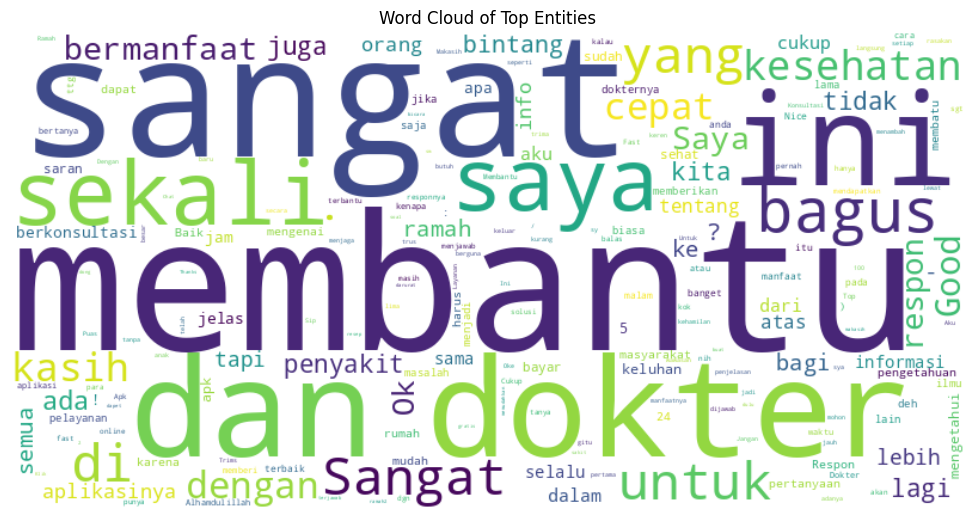

In [30]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have already created the top_entities DataFrame

# Create a dictionary of word frequencies
word_freq = dict(zip(top_entities['Word'], top_entities['Frequency']))

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top Entities')
plt.tight_layout(pad=0)

# Save the word cloud image
plt.savefig('word_cloud_top_entities.png', dpi=300, bbox_inches='tight')

# Show the plot (optional if you're working in a Jupyter notebook)
plt.show()